# libraries and functions

In [25]:
# Import libraries for image processing, data handling, and machine learning
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import feature
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Import machine learning models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

# Import metrics for evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Set seaborn theme for better plots
sns.set_theme(style="white", rc={'figure.figsize': (11.7, 8.27)})

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [2]:
def extract_hog_features(image_path):
    image = cv2.imread(image_path)
    
    # Check if the image is loaded correctly
    if image is None:
        print(f"Error loading image: {image_path}")
        return None
    
    # Resize image and convert to grayscale
    resized_image = cv2.resize(image, (128, 128))
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    # Extract HOG features
    hog_features = feature.hog(gray_image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)
    
    return hog_features


In [3]:
def display_images_with_folder_name(folder_path):
    images = []
    filenames = [filename for filename in os.listdir(folder_path) if filename.endswith(('.jpg', '.jpeg', '.png'))]
    
    for filename in filenames:
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is not None:
            images.append(image)
    
    plt.figure(figsize=(12, 12))
    for i in range(min(4, len(images))):
        plt.subplot(4, 4, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('on')
        plt.title(os.path.basename(folder_path))
    
    plt.tight_layout()
    plt.show()

In [4]:
def plot_boxplots(df):
    for i in range(0, 1764, 51):
        plt.figure(figsize=(20, 10))
        data_subset = df.iloc[:, i:i+51]
        data_subset.boxplot()
        plt.title(f'Box Plot of Columns {i} to {i+50}')
        plt.xlabel('Columns')
        plt.ylabel('Values')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

In [5]:
def replace_outliers_with_median(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound
        
        median = df[col].median()  
        
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])  # Replace outliers
    
    return df  

In [6]:
def plot_scatter(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='feature_0', y='feature_1', hue='target', palette='coolwarm')
    plt.title('Scatter Plot of Feature 0 vs Feature 1')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.show()

In [8]:
skin_list = []
skin_targets = []

folder_paths = [
    'C:\\Users\\user\\Downloads\\Cucumber plant diseases dataset\\training\\good_Cucumber',
    'C:\\Users\\user\\Downloads\\Cucumber plant diseases dataset\\training\\Ill_cucumber'
]
target_values = [0,1]  # 1 for good_Cucumber ,0 for benign

# Loop through each folder and corresponding target value
for folder_path, target in zip(folder_paths, target_values):
    for filename in os.listdir(folder_path):  # Loop through each file in the folder
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'): 
            image_path = os.path.join(folder_path, filename)  # Full path to the image
            try:
                # Extract HOG features and append to lists
                features = extract_hog_features(image_path)
                skin_list.append(features)
                skin_targets.append(target)  
            except FileNotFoundError as e:
                print(e)  # Handle file not found errors


In [9]:
for i, features in enumerate(skin_list):
    print(f"Feature {i} shape: {features.shape}")
    if i==10:
        break

Feature 0 shape: (1764,)
Feature 1 shape: (1764,)
Feature 2 shape: (1764,)
Feature 3 shape: (1764,)
Feature 4 shape: (1764,)
Feature 5 shape: (1764,)
Feature 6 shape: (1764,)
Feature 7 shape: (1764,)
Feature 8 shape: (1764,)
Feature 9 shape: (1764,)
Feature 10 shape: (1764,)


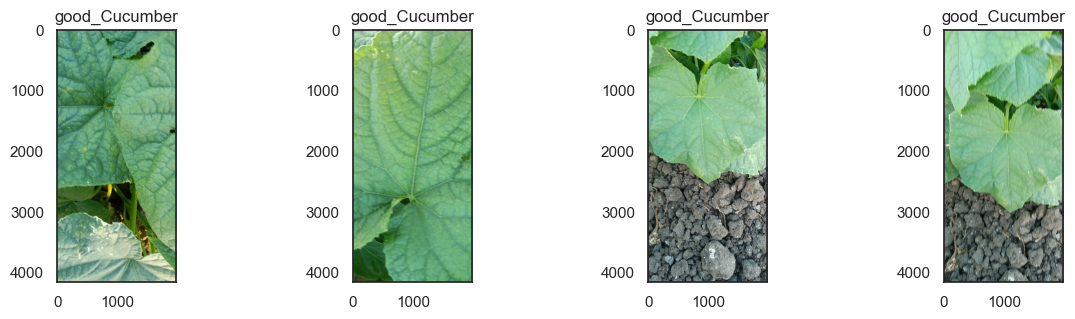

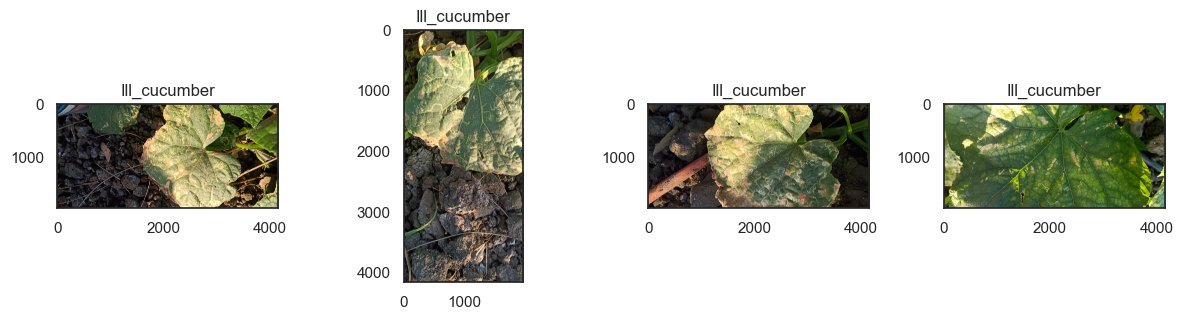

In [10]:
for i in folder_paths :
    display_images_with_folder_name(i)

In [11]:
X = np.array(skin_list)
y = np.array(skin_targets)
skin_data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1764)])
skin_data['target'] = y

In [12]:
skin_data.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.140636   0.077102   0.095992   0.074851   0.248540   0.248540   
1   0.226795   0.189752   0.191774   0.240317   0.240317   0.206337   
2   0.207159   0.235533   0.205187   0.247127   0.247127   0.159343   
3   0.223319   0.223319   0.223319   0.115344   0.086055   0.064132   
4   0.191339   0.225817   0.208300   0.121575   0.159484   0.114844   

   feature_6  feature_7  feature_8  feature_9  ...  feature_1755  \
0   0.178265   0.174823   0.093653   0.208521  ...      0.123271   
1   0.170685   0.102645   0.126360   0.240317  ...      0.158117   
2   0.110446   0.160596   0.091713   0.106704  ...      0.211116   
3   0.090894   0.089230   0.155840   0.223319  ...      0.213190   
4   0.085014   0.155729   0.169514   0.225817  ...      0.188778   

   feature_1756  feature_1757  feature_1758  feature_1759  feature_1760  \
0      0.014235      0.058381      0.208019      0.267113      0.267113   
1      0.063784      0.080861      0.184006      0.230052      0.218896   
2      0.176637      0.179887      0.211116      0.211116      0.126538   
3      0.158989      0.166120      0.162820      0.213190      0.205929   
4      0.153269      0.217296      0.215781      0.224196      0.170610   

   feature_1761  feature_1762  feature_1763  target  
0      0.267113      0.081838      0.035523       0  
1      0.181143      0.171227      0.087288       0  
2      0.155189      0.160089      0.083133       0  
3      0.130313      0.132603      0.160665       0  
4      0.178649      0.077578      0.163180       0  

[5 rows x 1765 columns]

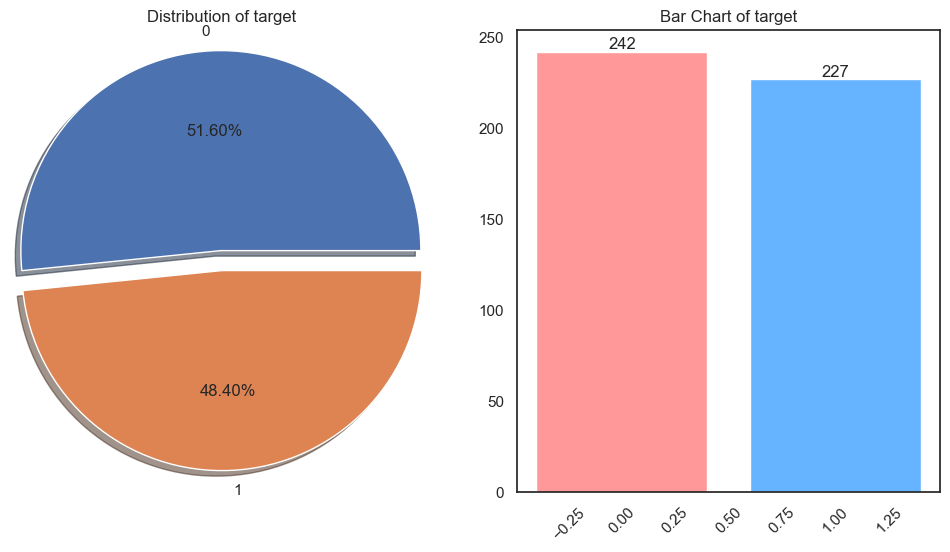

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(
    x=skin_data.target.value_counts().values, 
    labels=skin_data.target.value_counts().index, 
    shadow=True, 
    explode=[0, 0.1], 
    autopct="%.2f%%"
)
plt.title('Distribution of target')
plt.axis('equal')

plt.subplot(1, 2, 2)
counts = skin_data.target.value_counts()
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
bars = plt.bar(height=counts.values, x=counts.index, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

plt.title('Bar Chart of target')
plt.xticks(rotation=45)
plt.show()

In [14]:
skin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Columns: 1765 entries, feature_0 to target
dtypes: float64(1764), int32(1)
memory usage: 6.3 MB


In [15]:
data_missing=pd.DataFrame(skin_data.isnull().sum())
data_missing.max()

0    0
dtype: int64

In [16]:
skin_data.duplicated().sum()

22

In [17]:
skin_data.drop_duplicates(inplace=True)
skin_data.duplicated().sum()

0

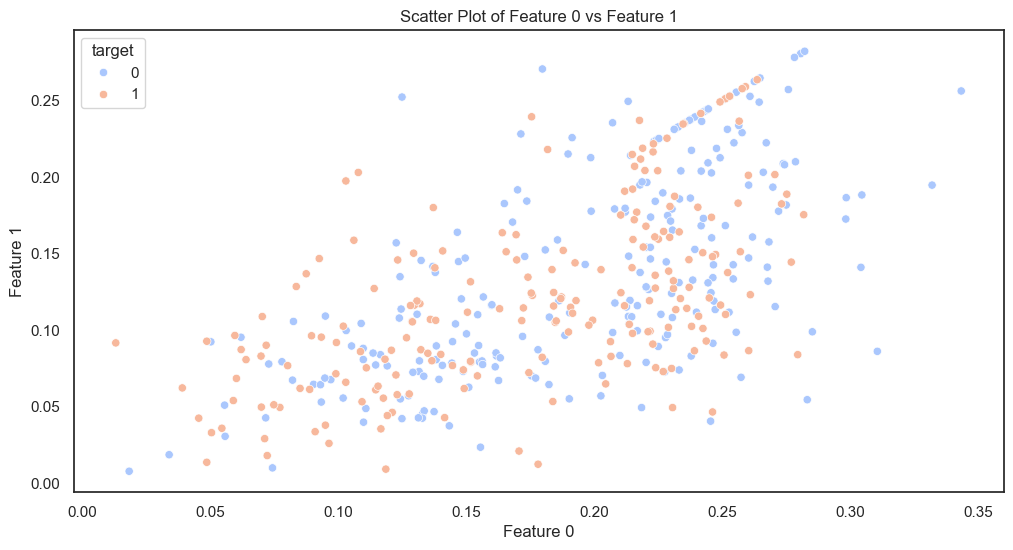

In [18]:
plot_scatter(skin_data)

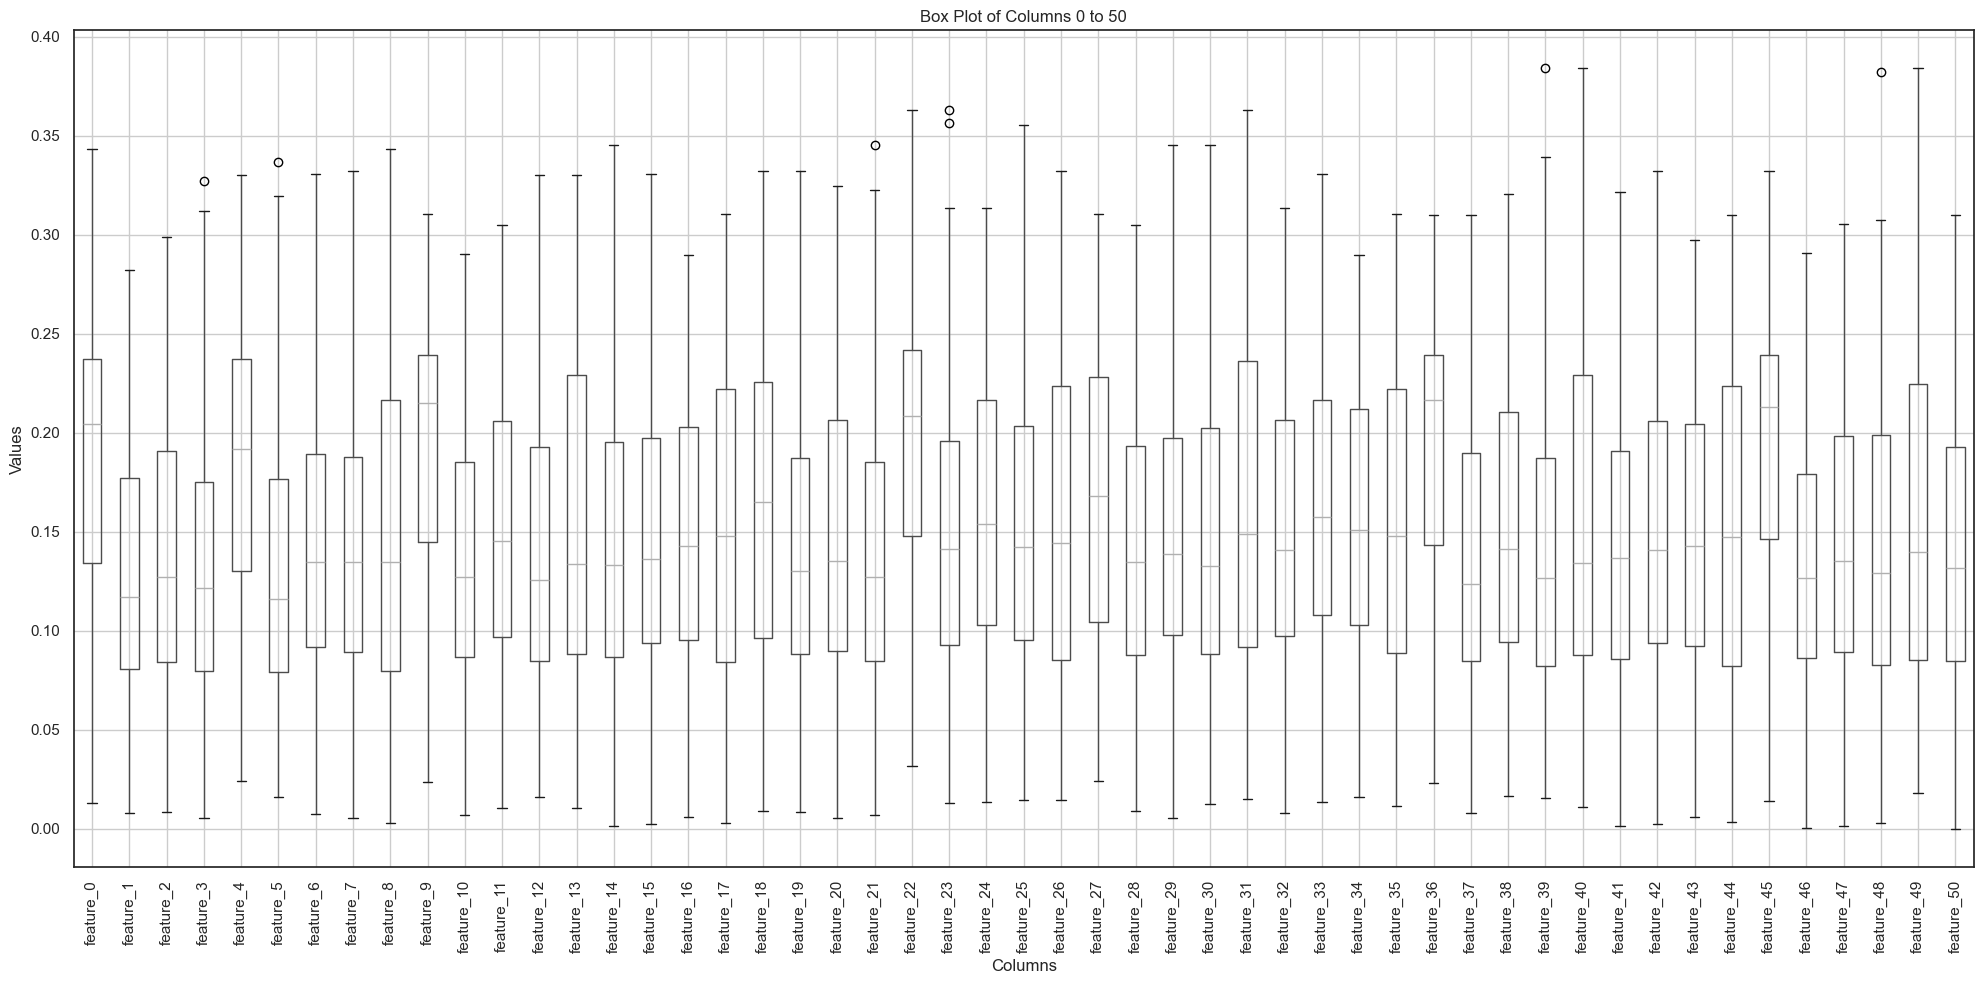

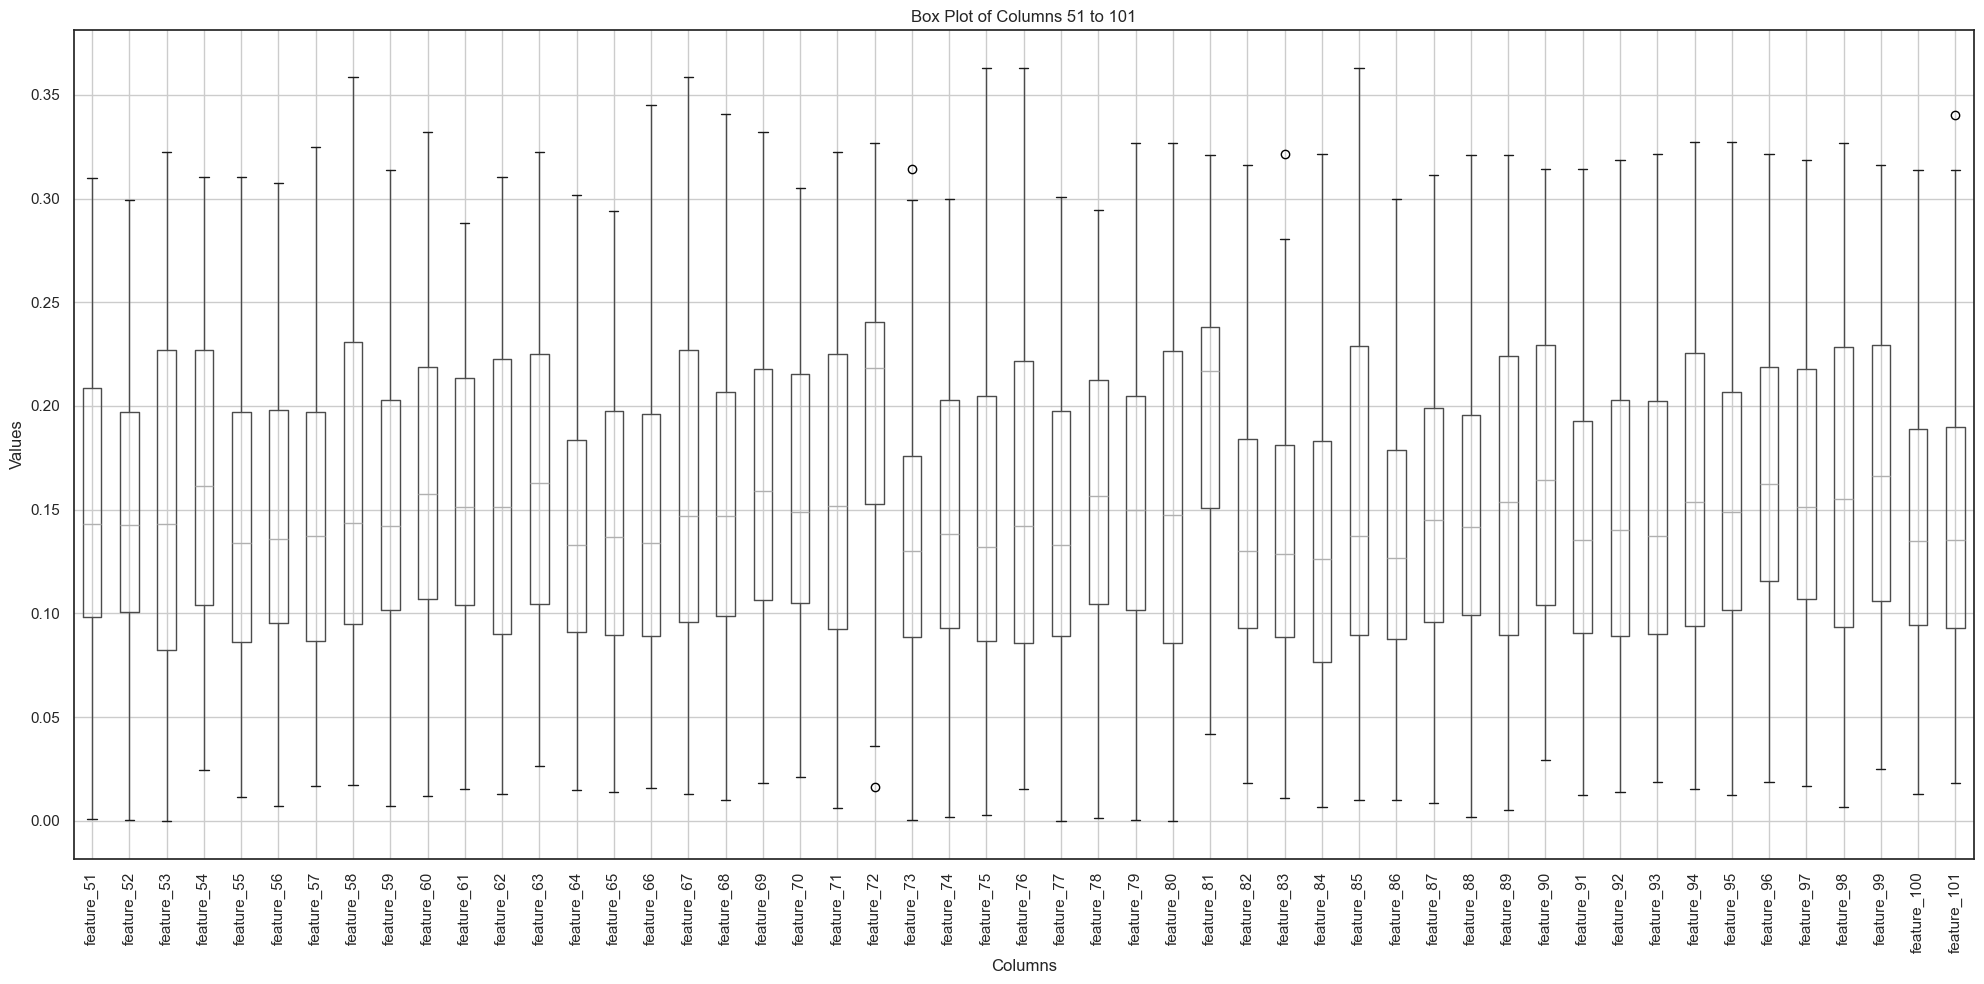

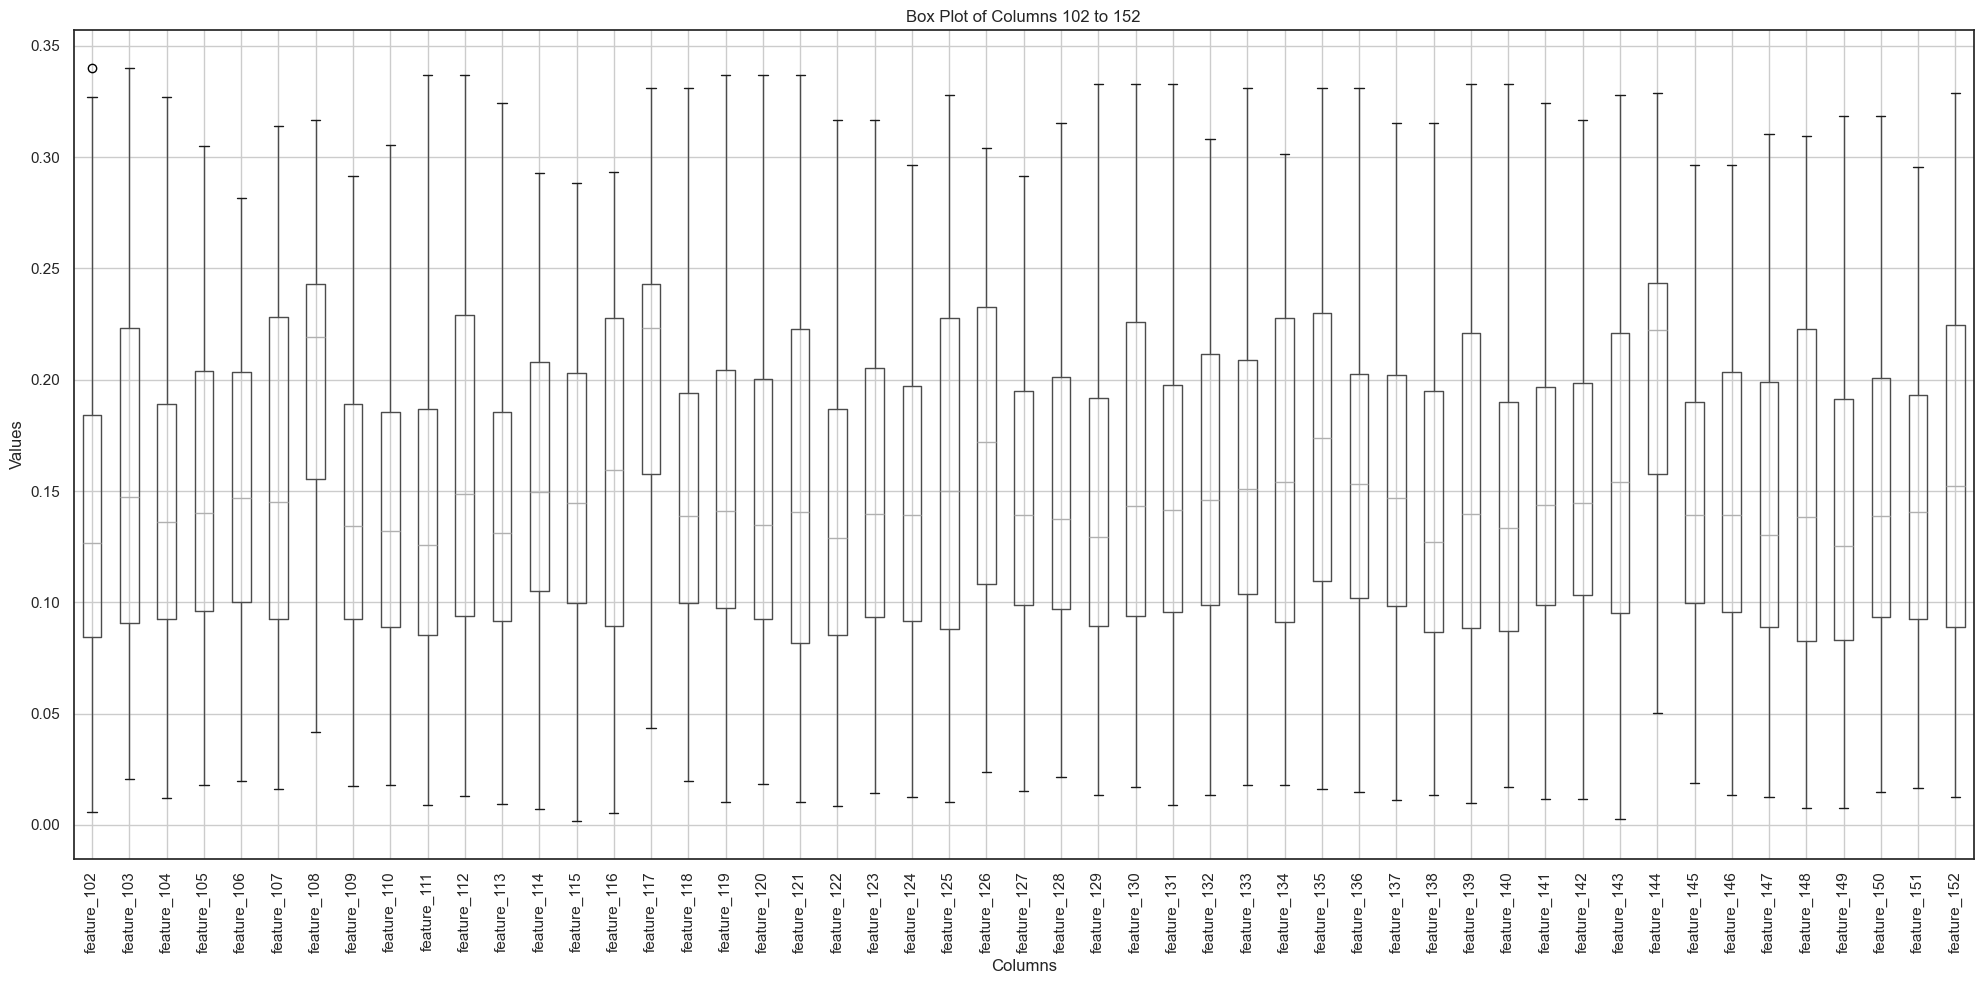

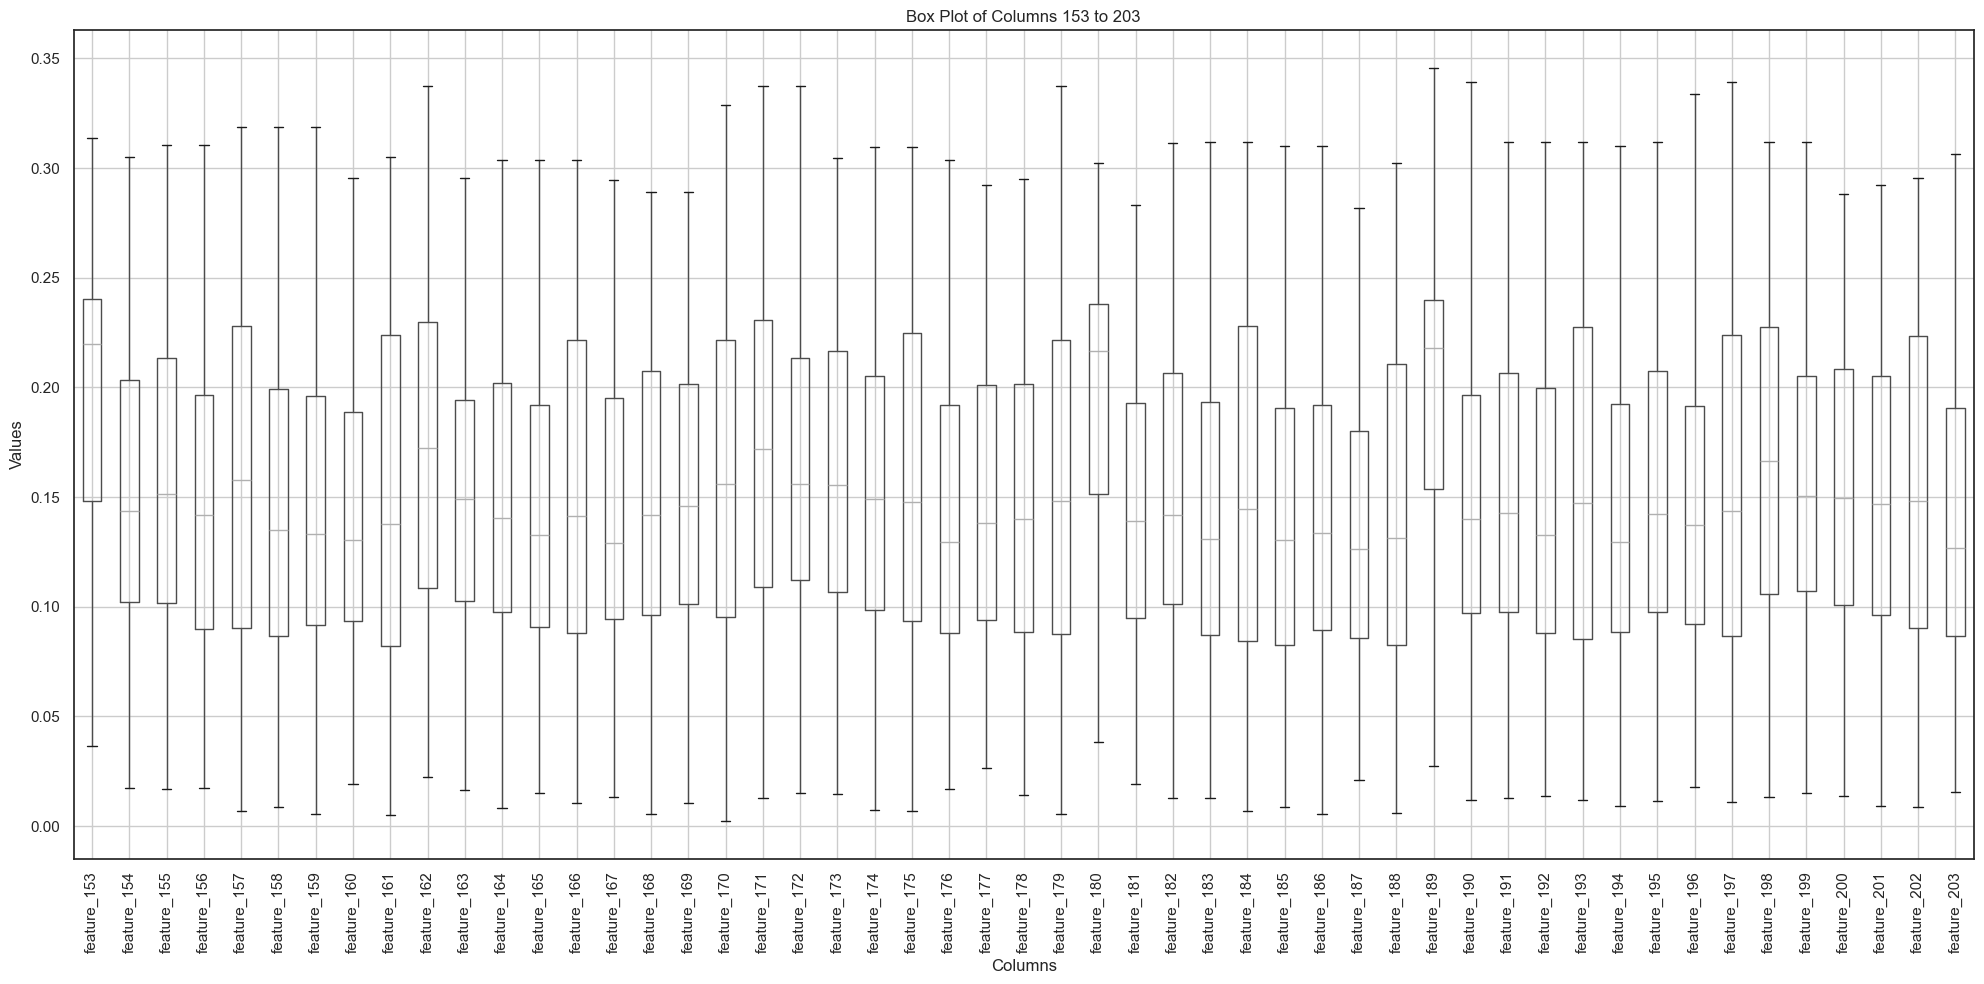

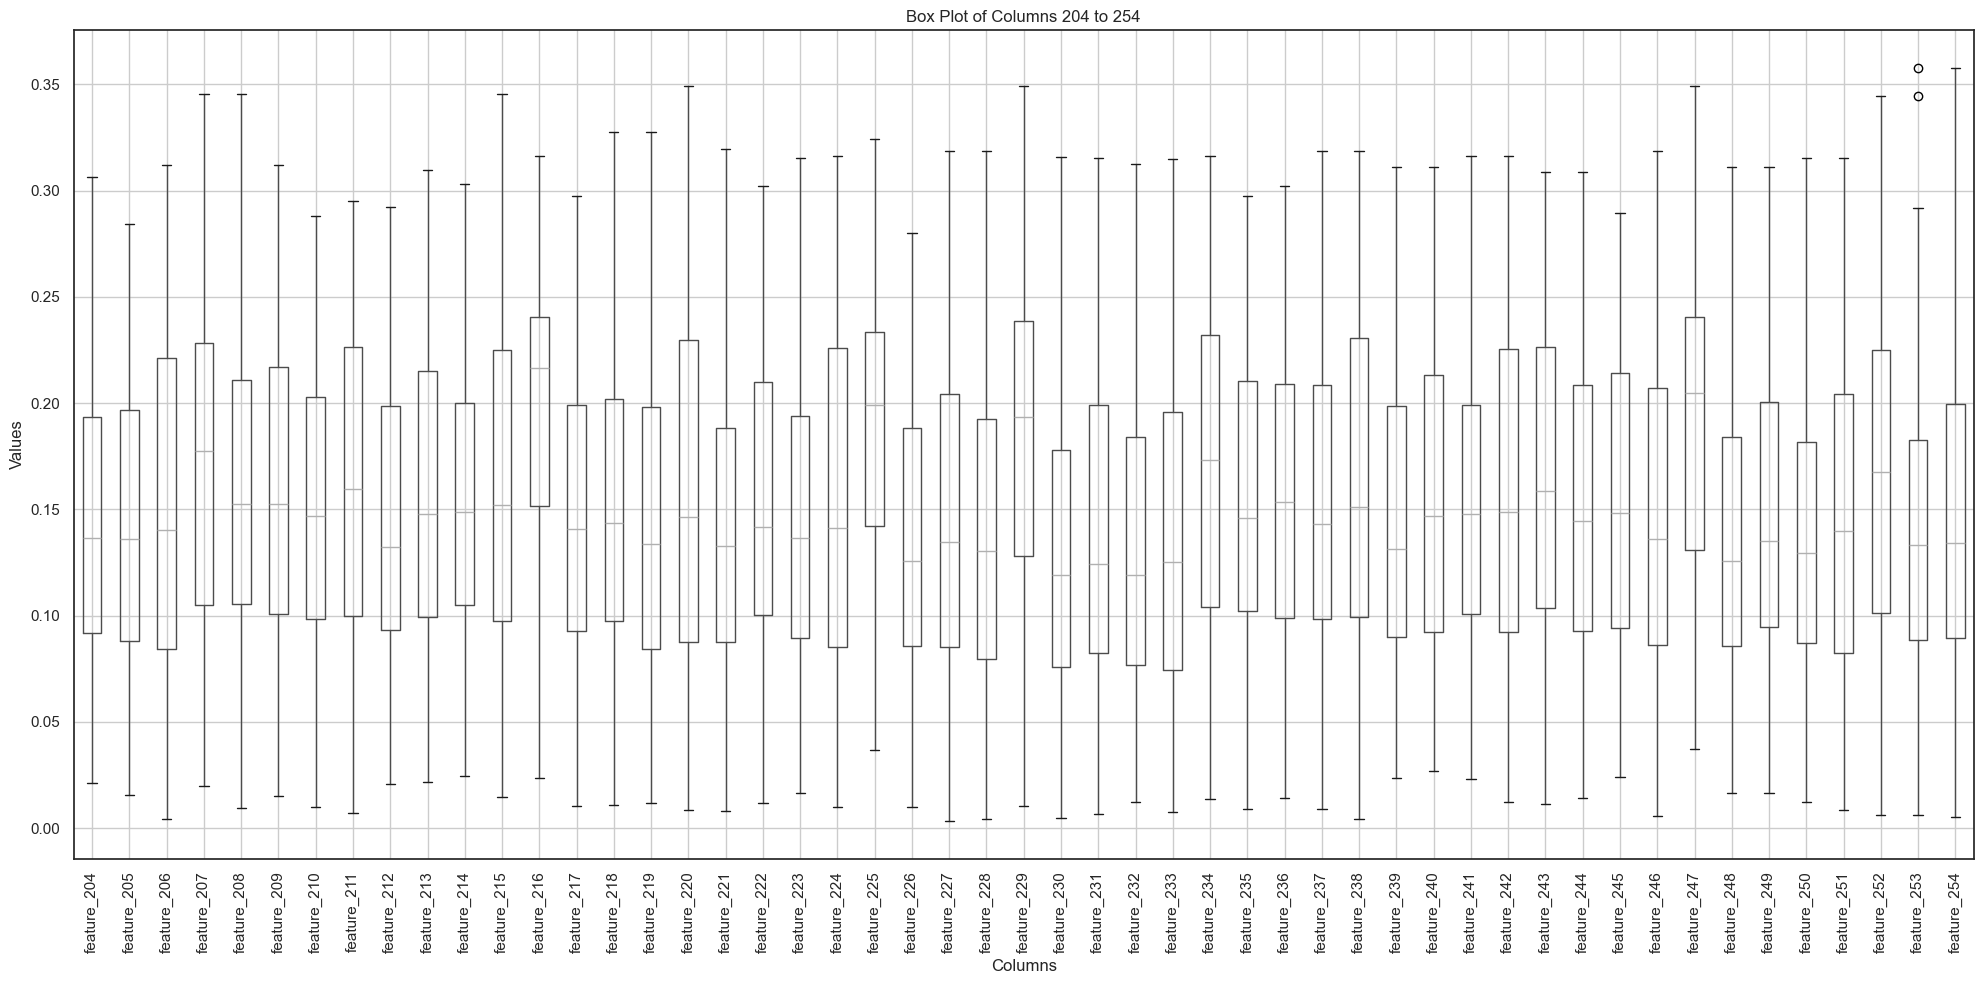

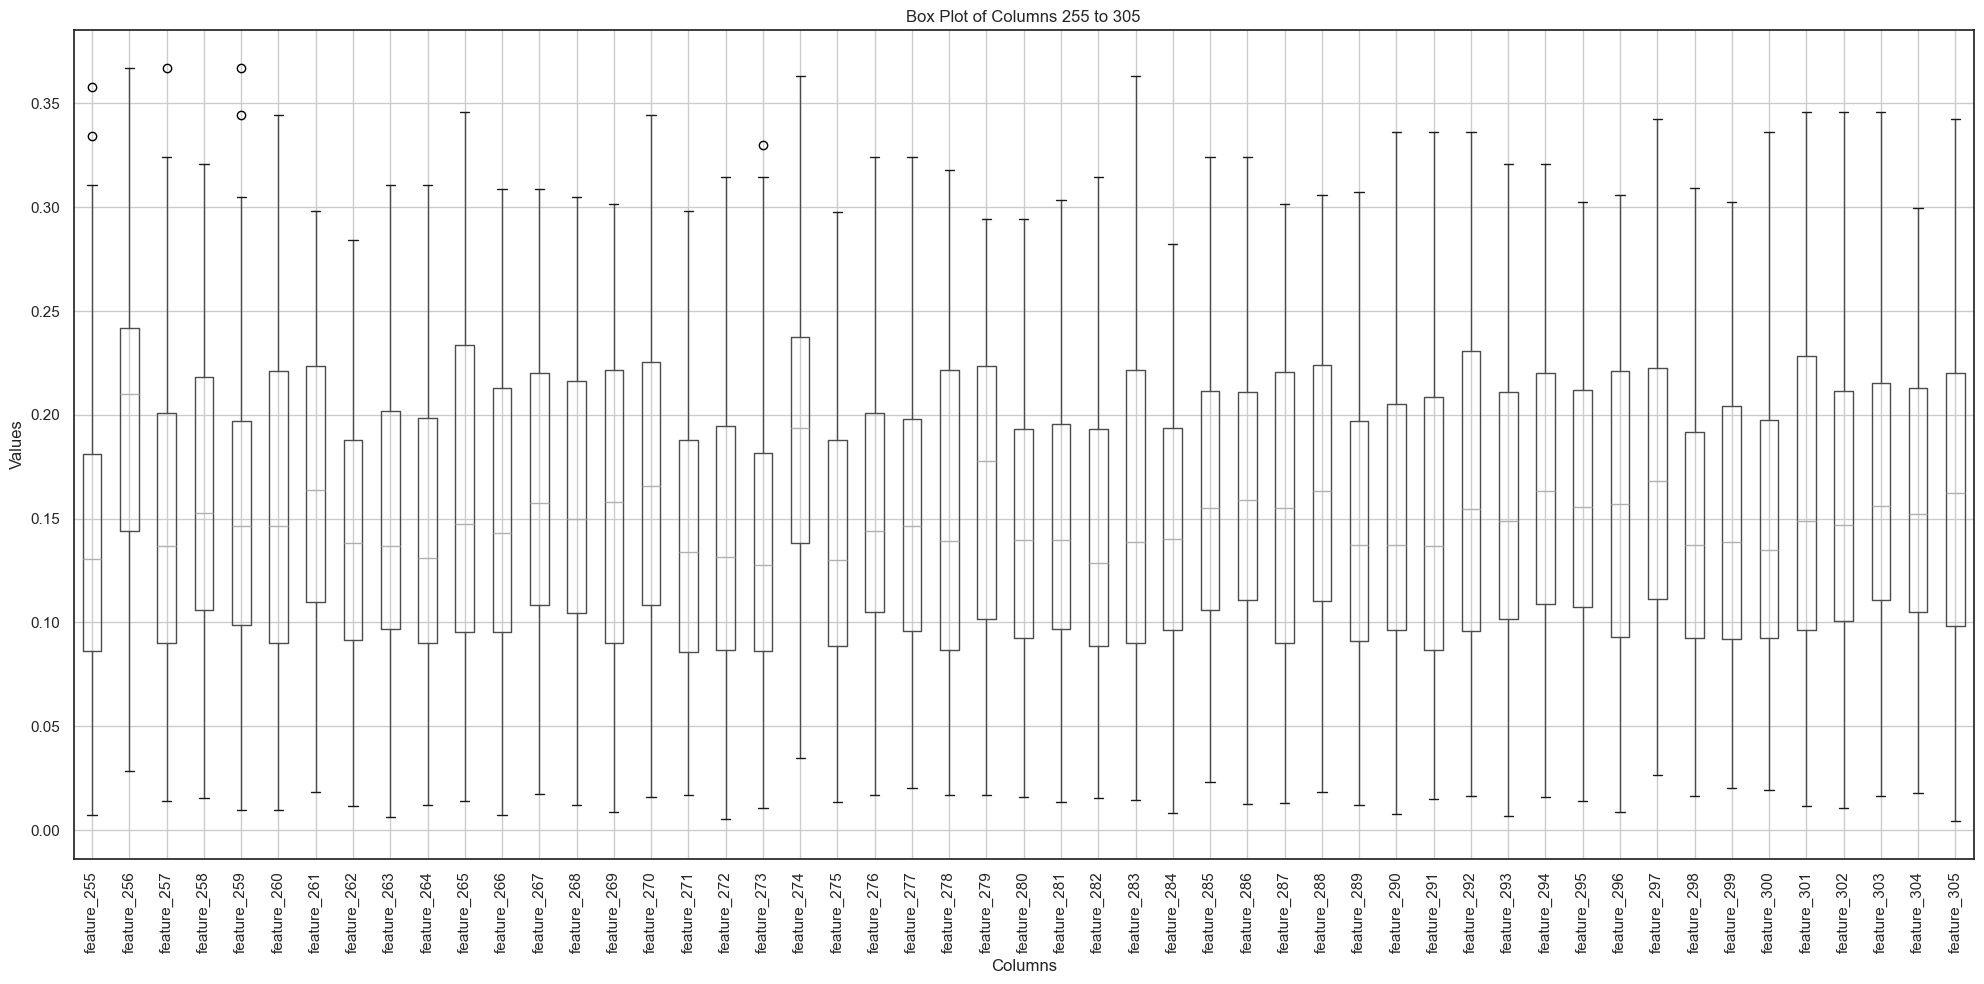

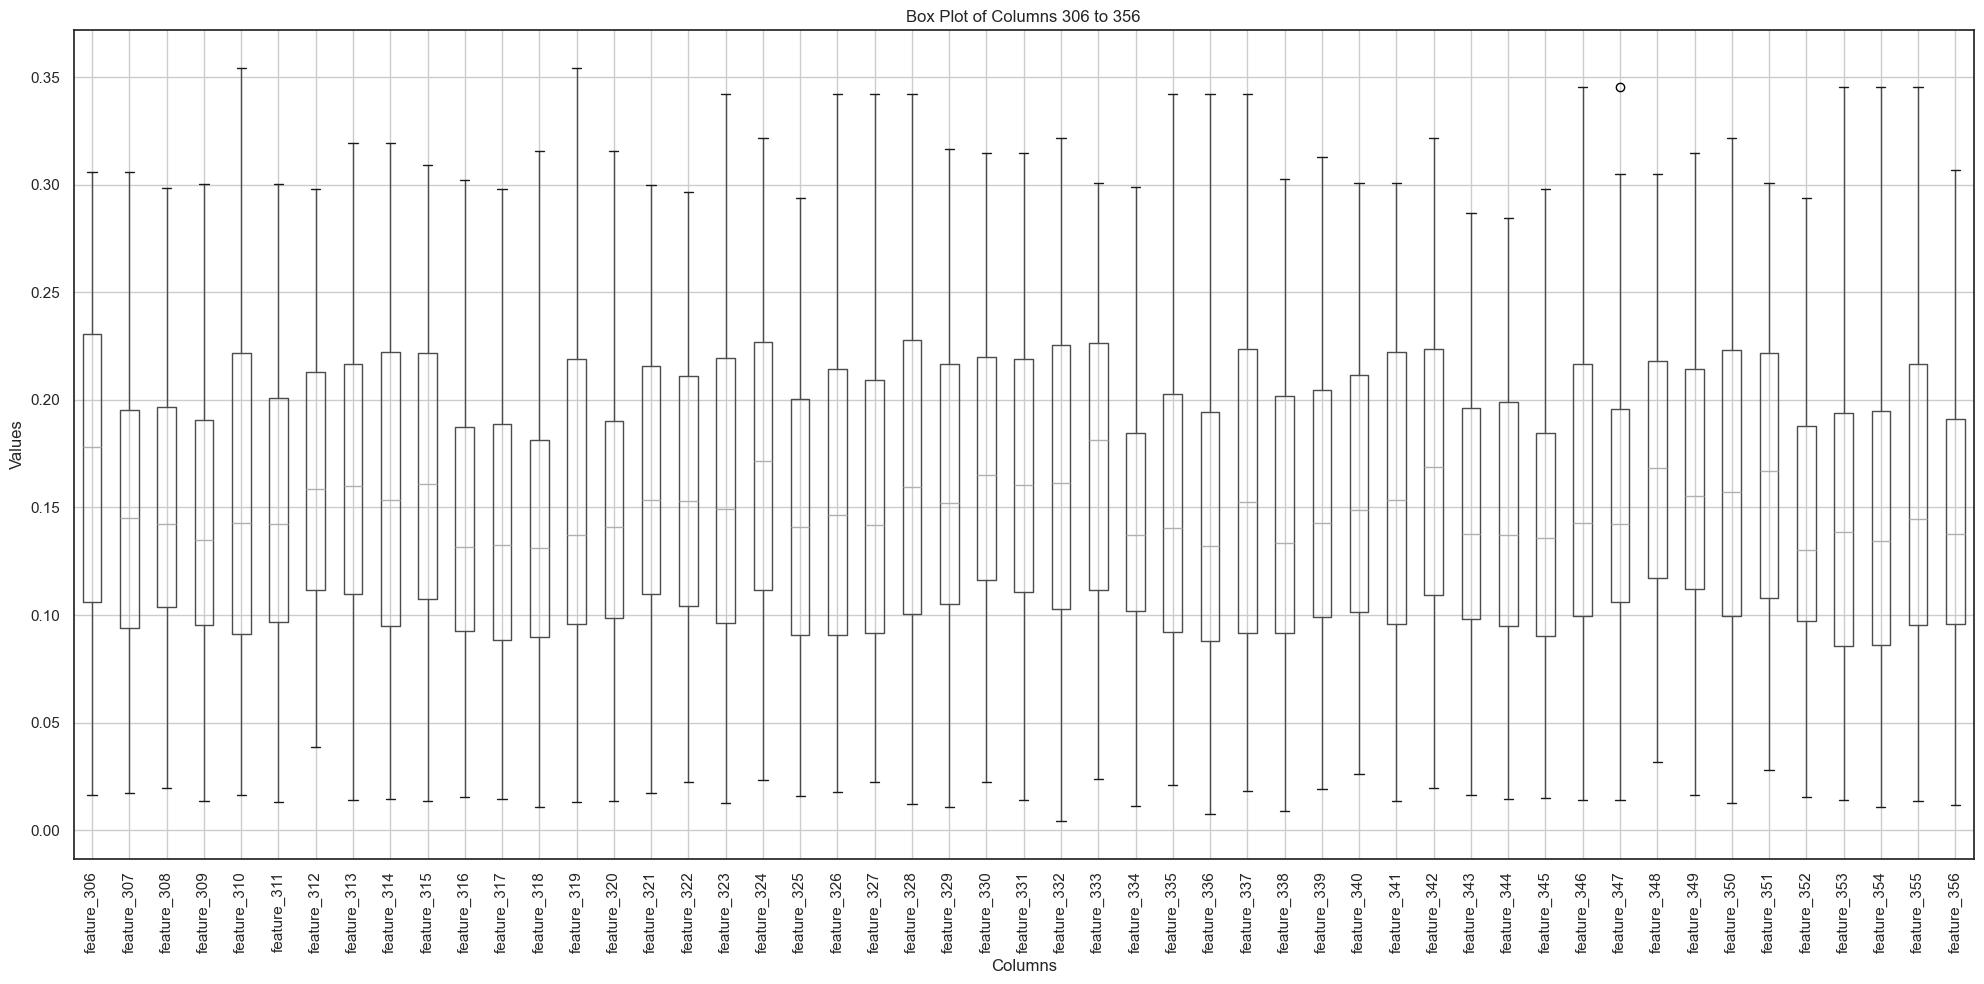

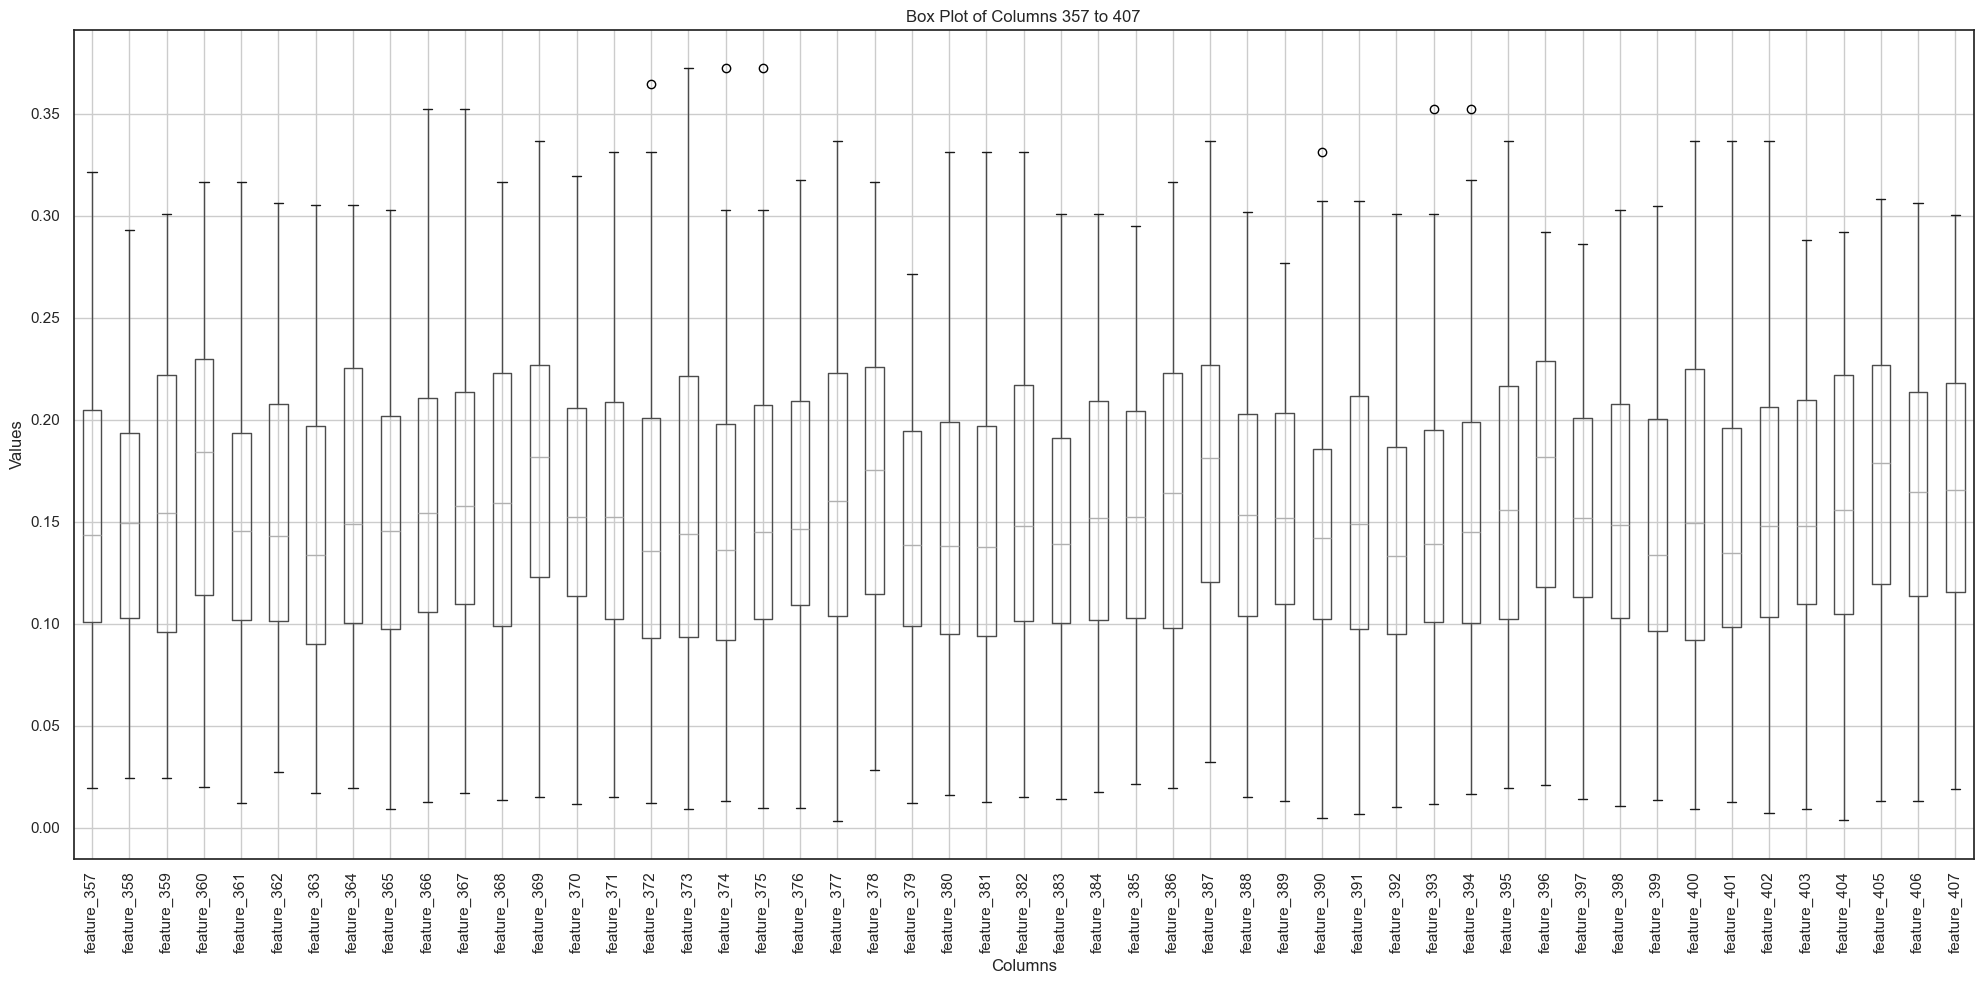

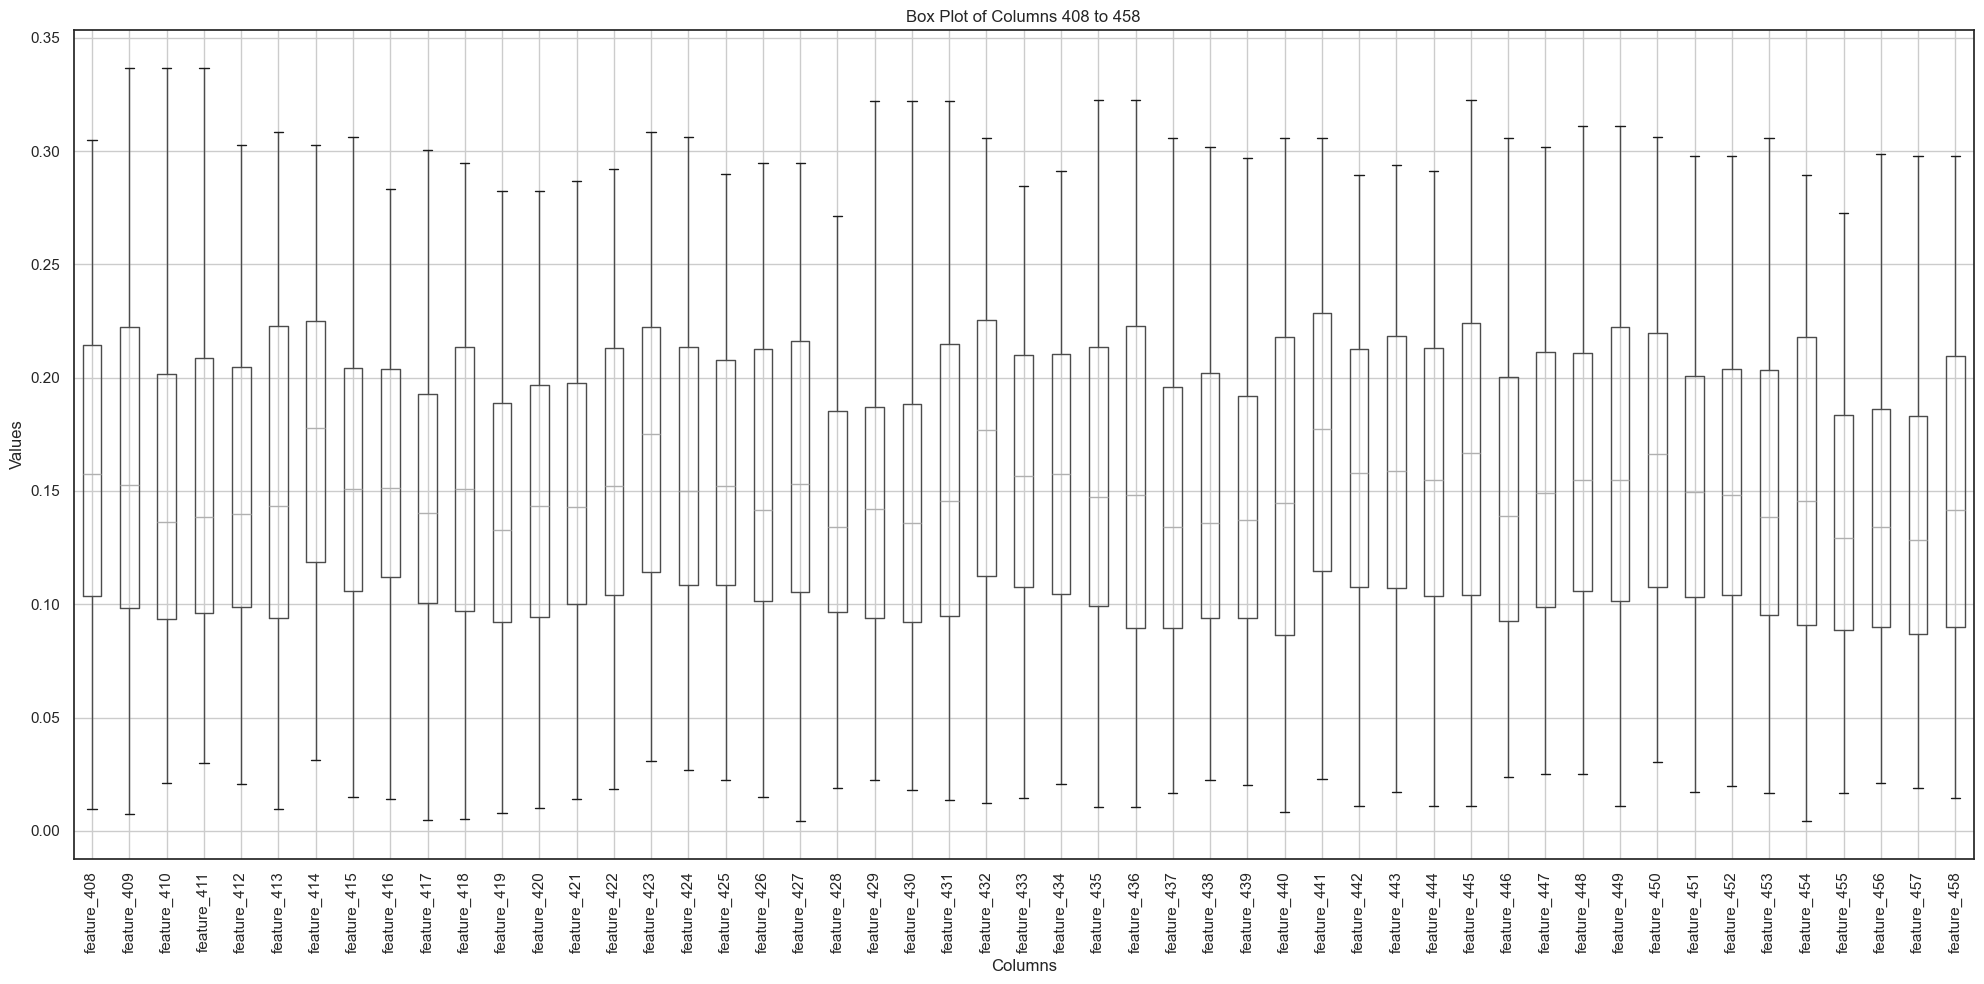

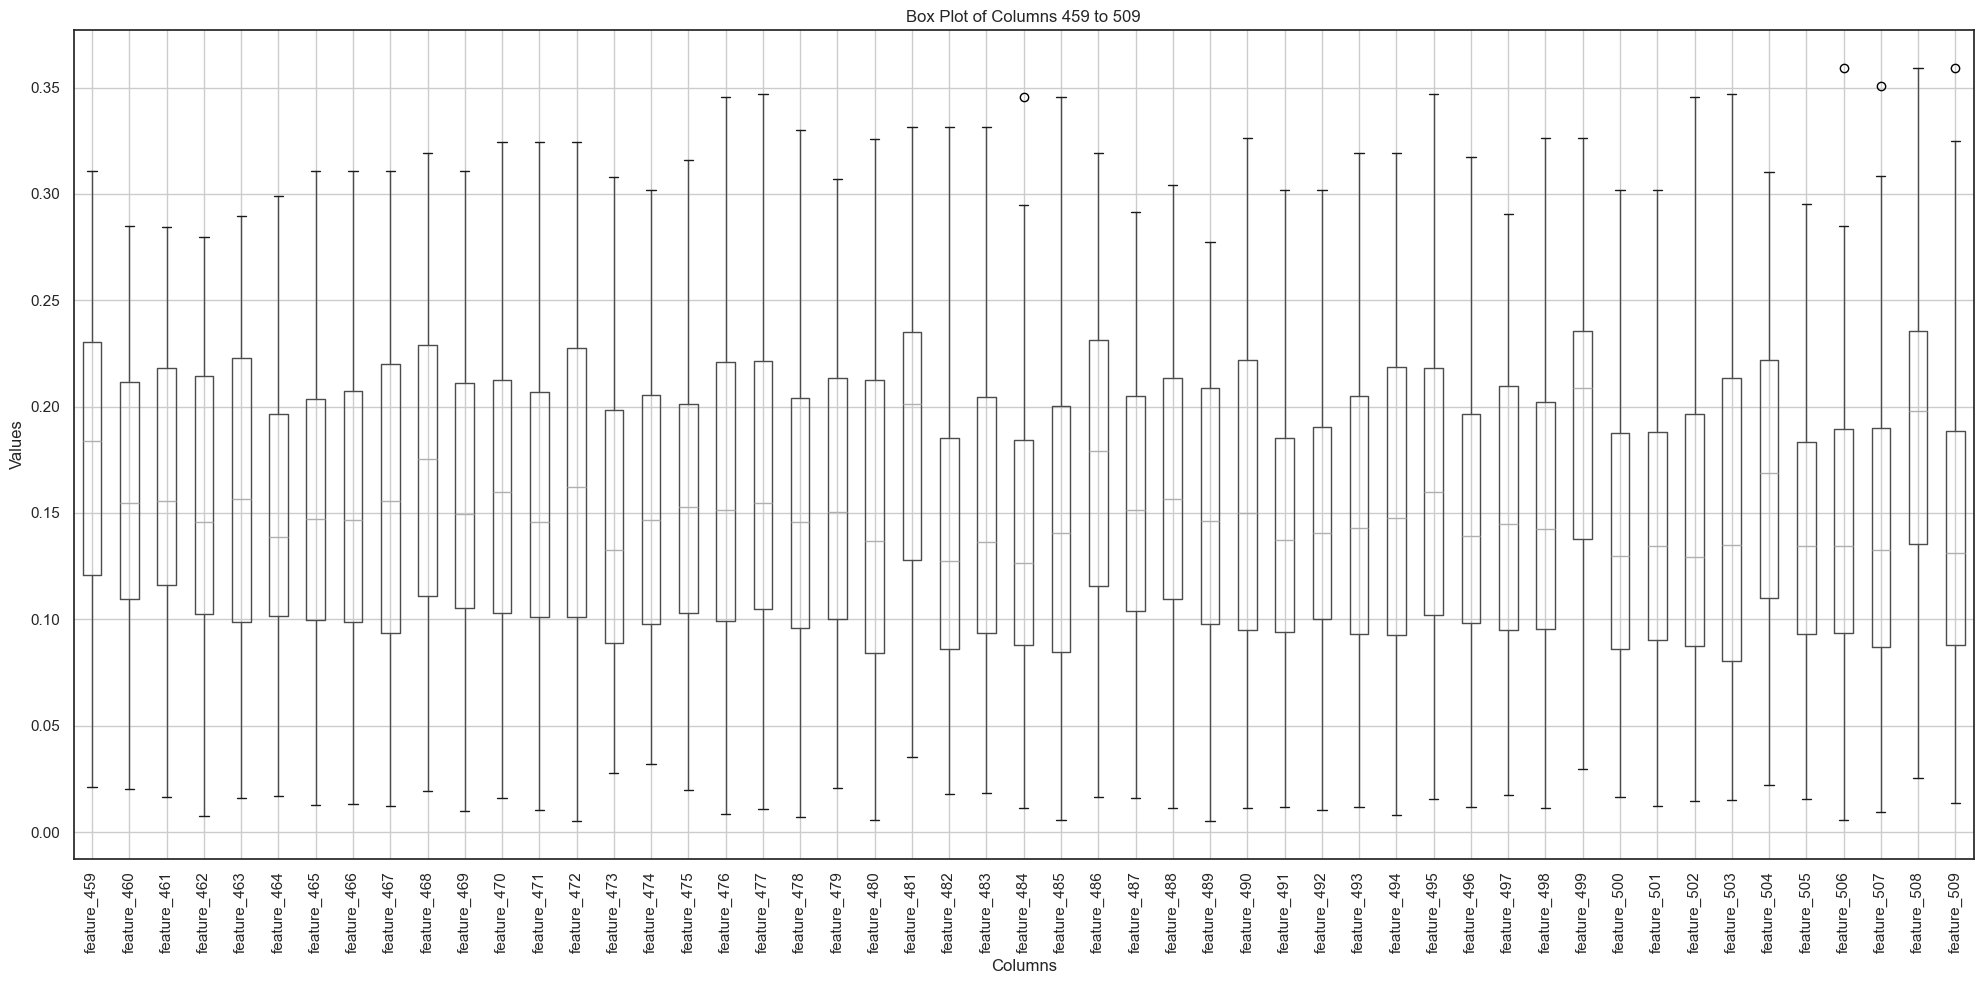

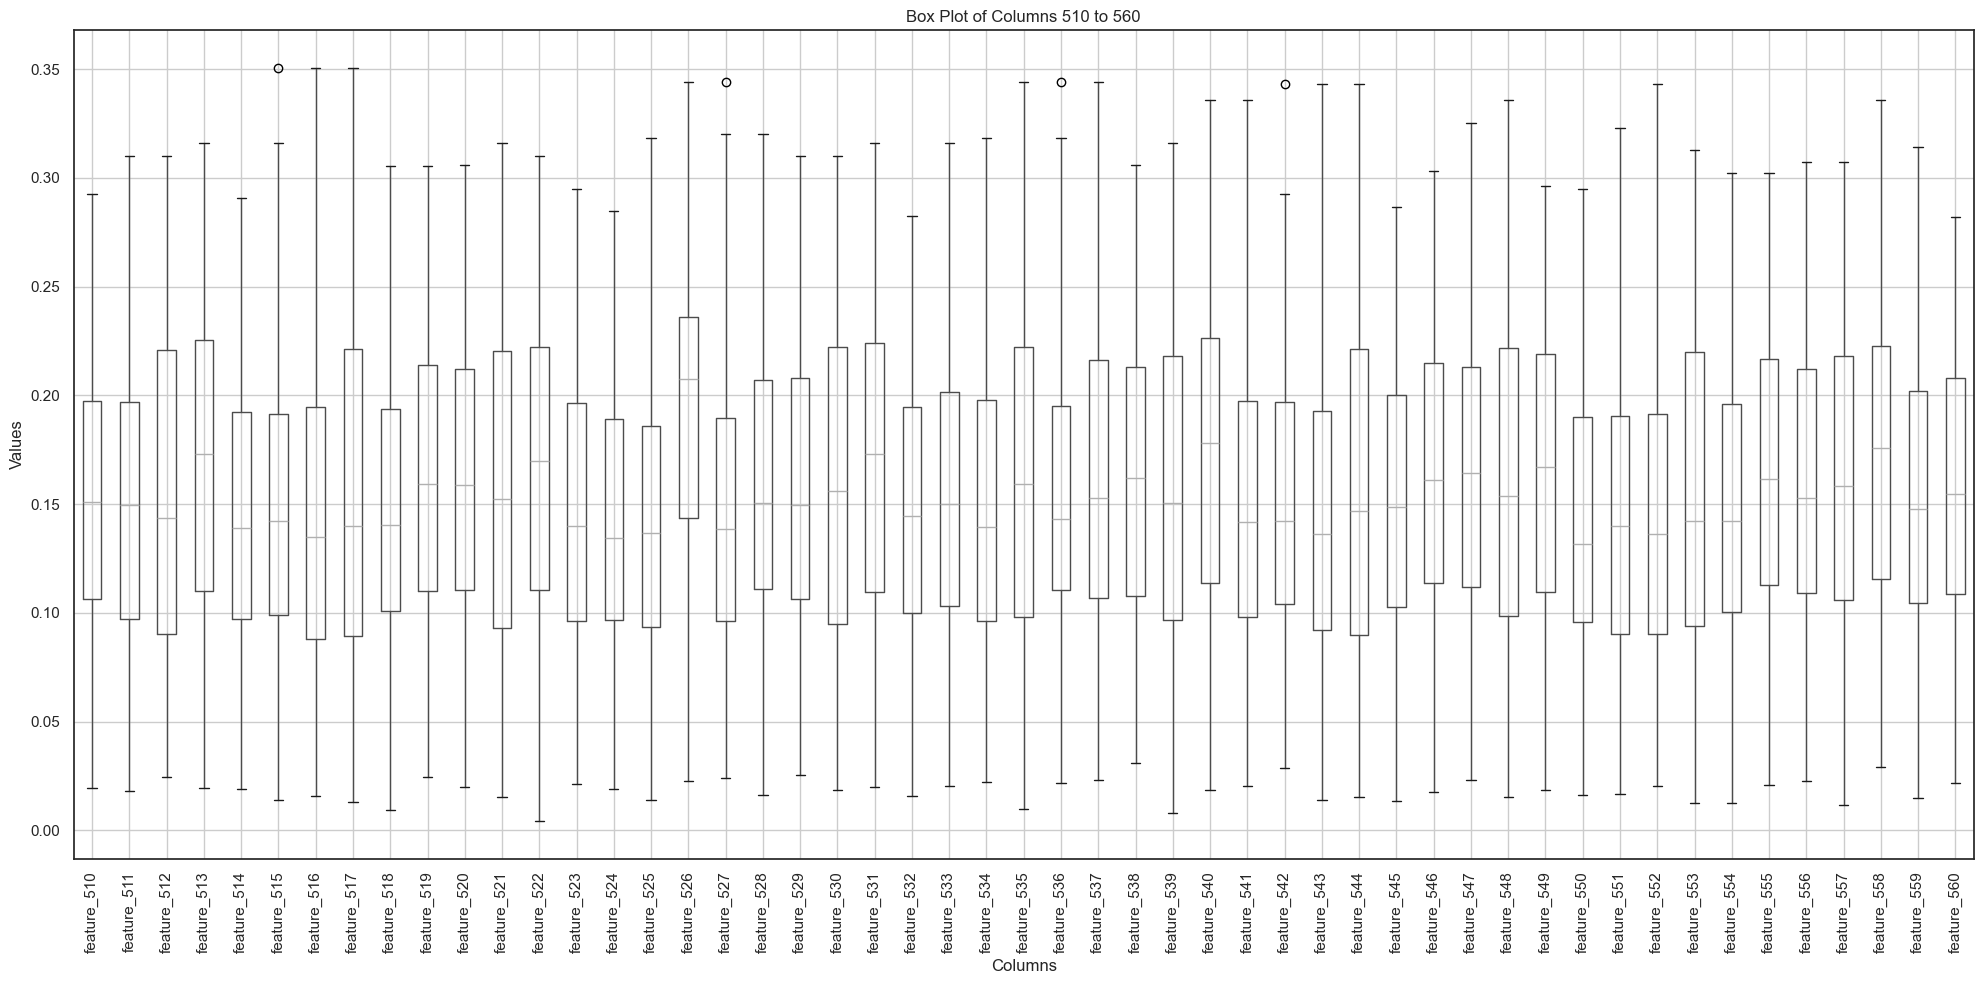

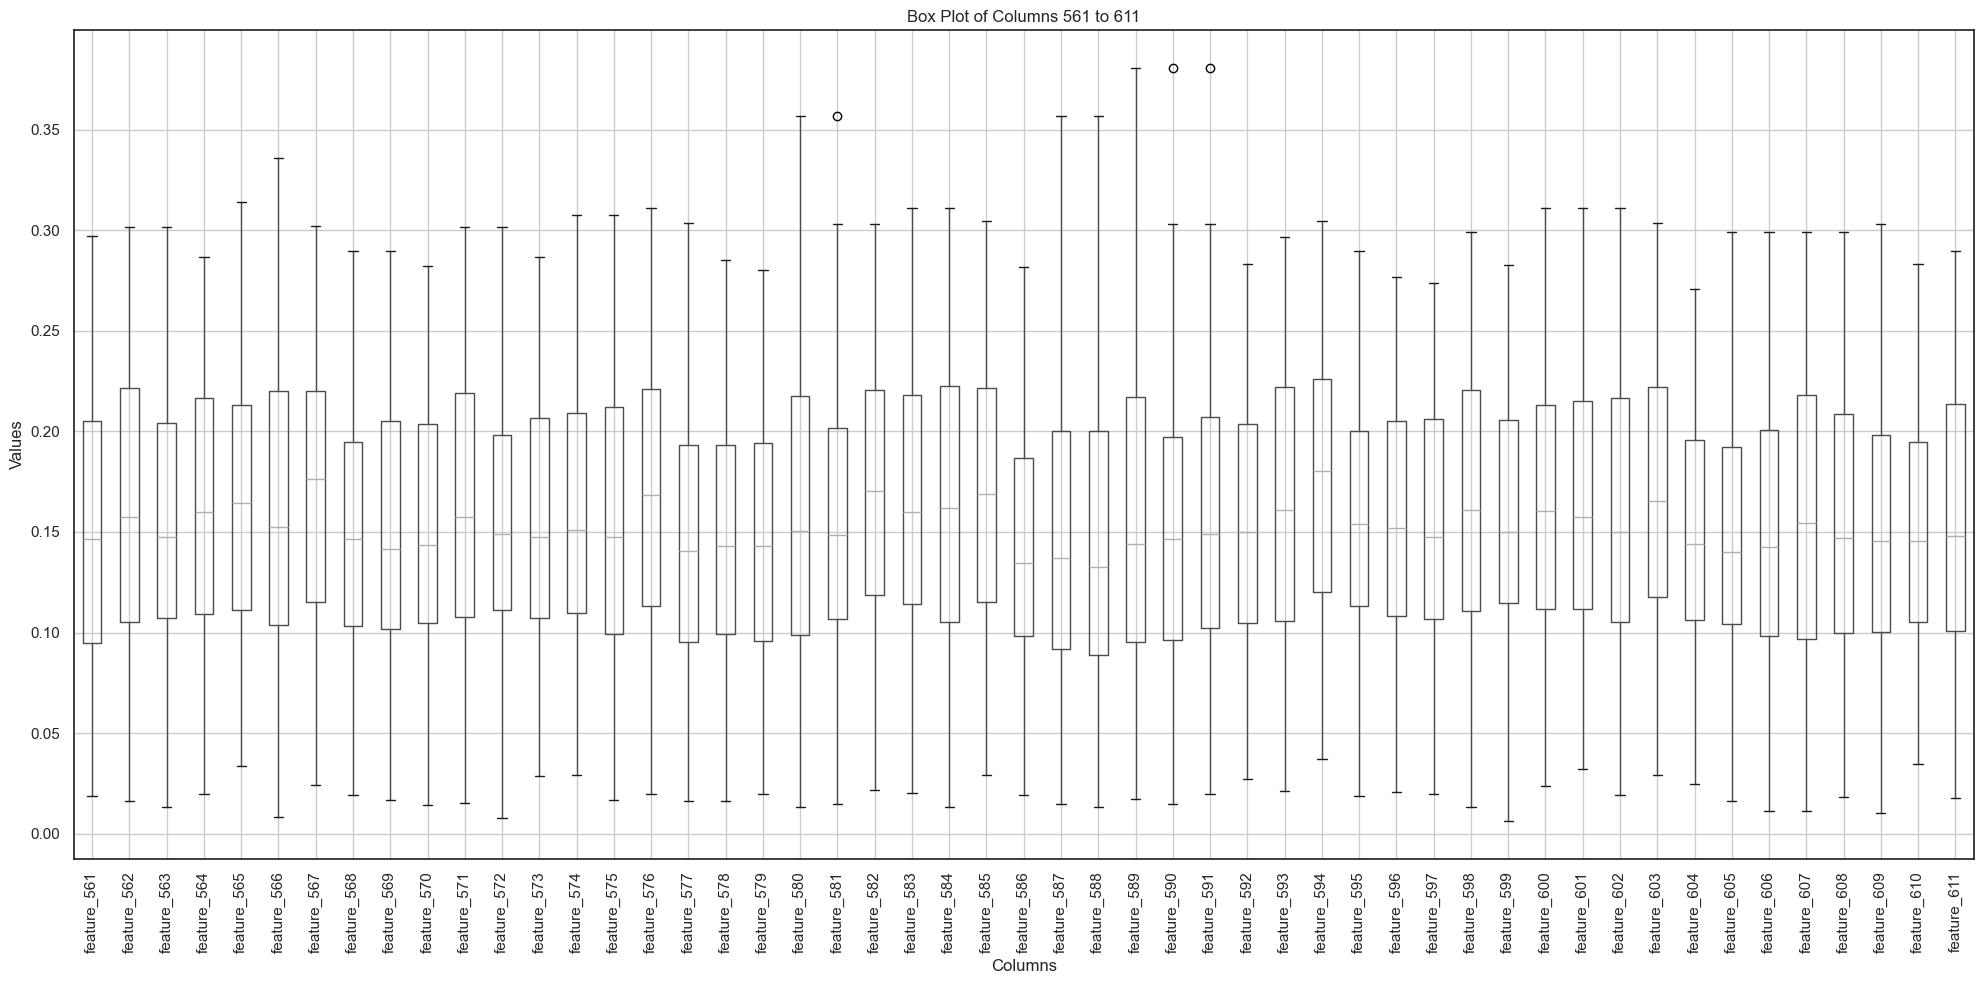

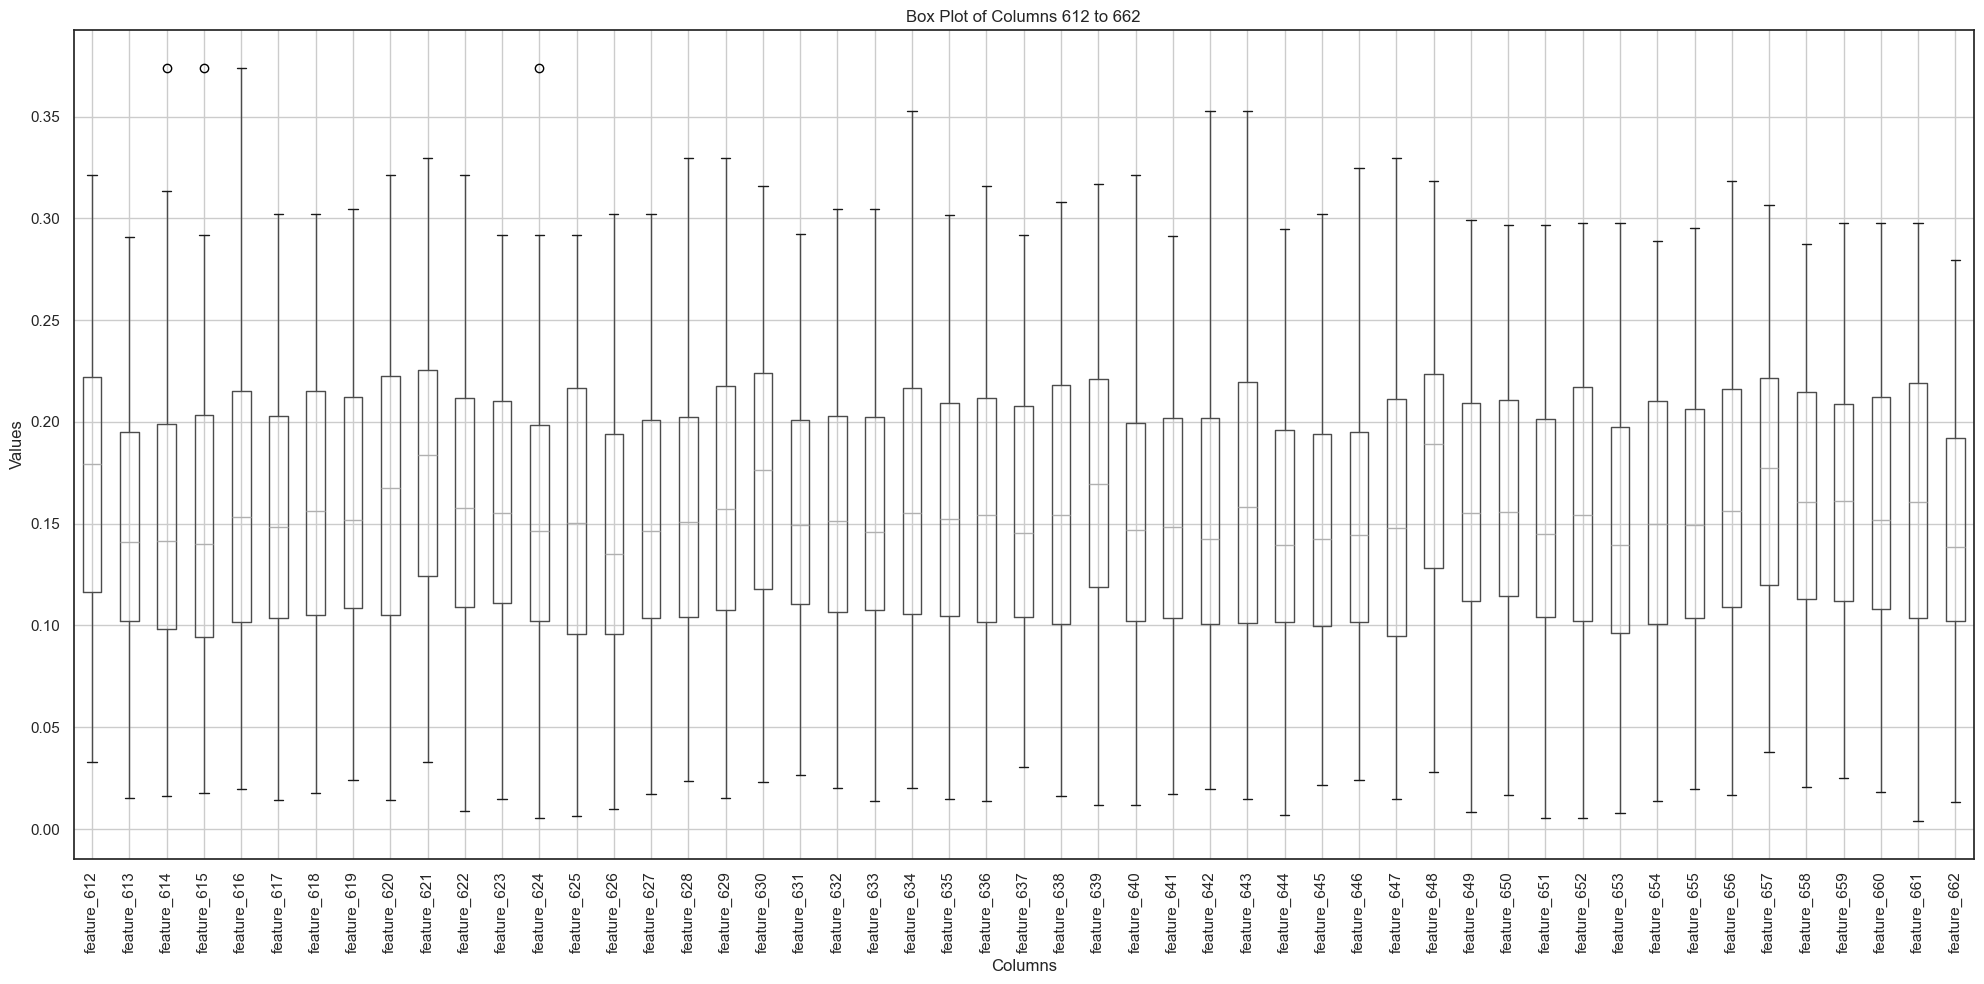

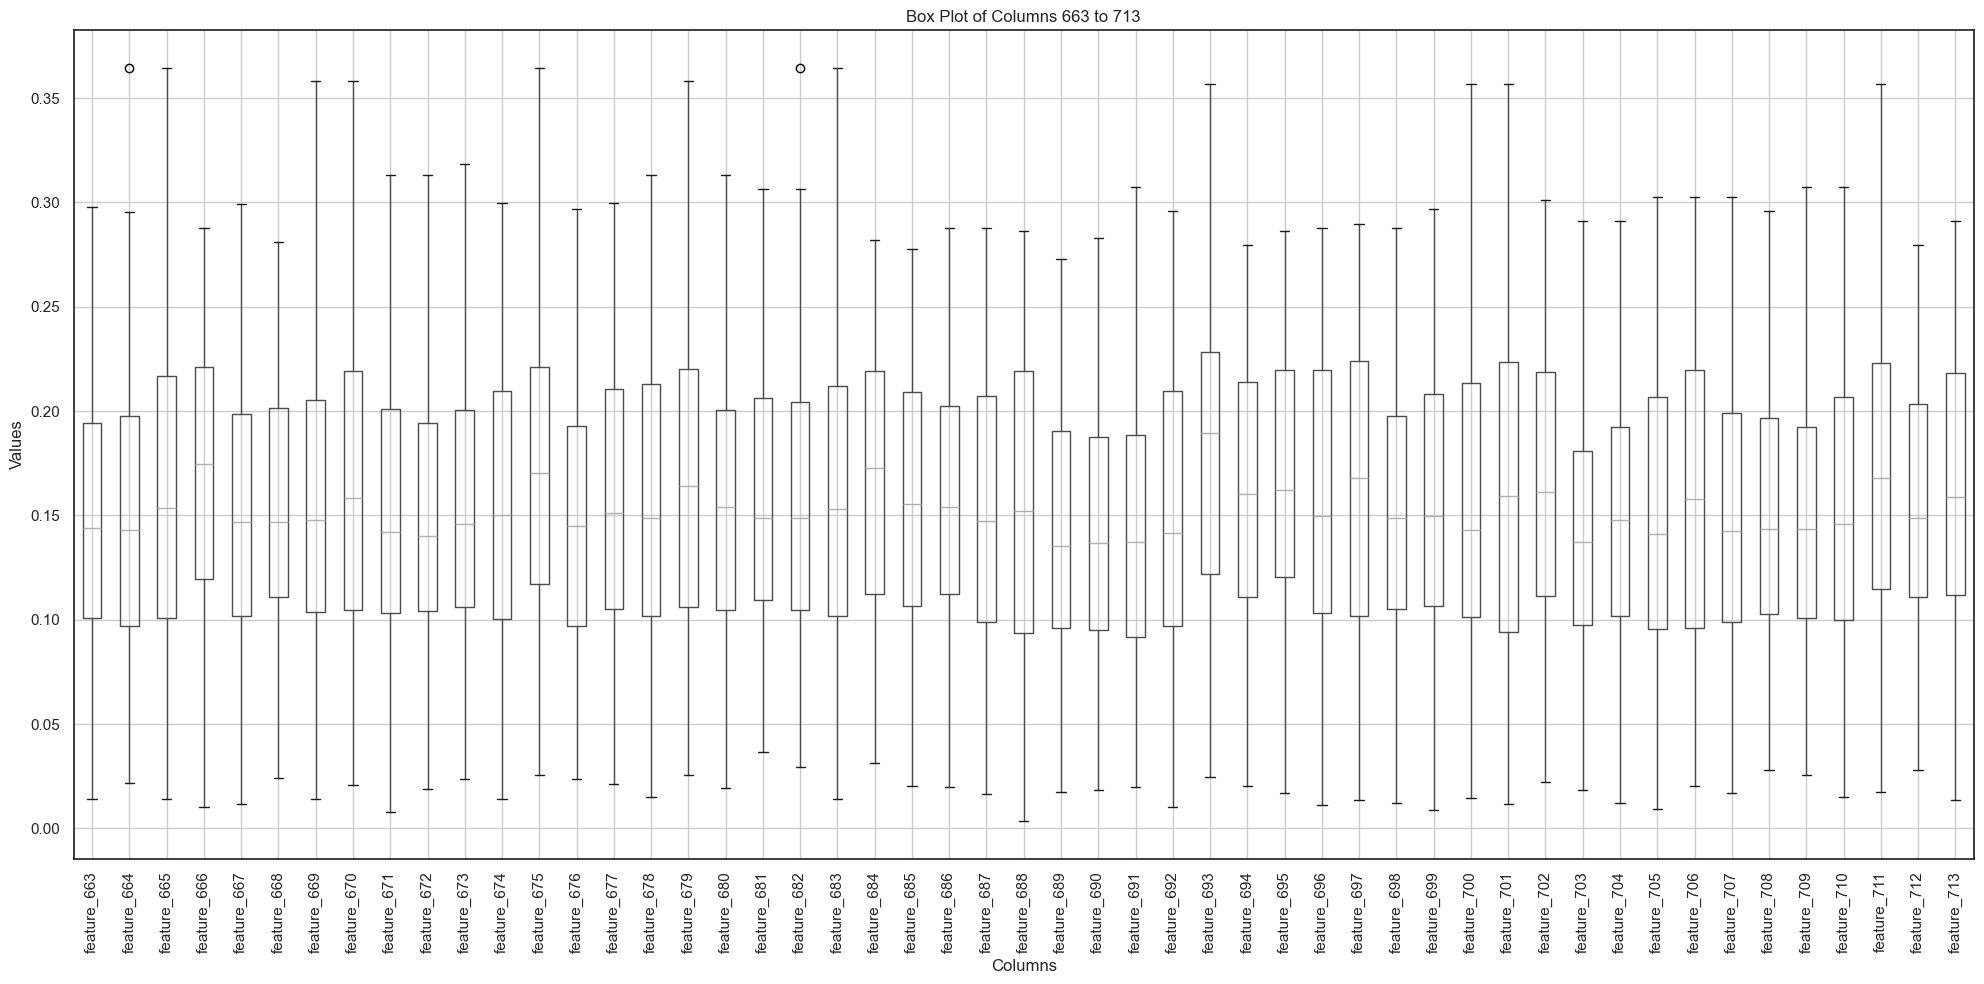

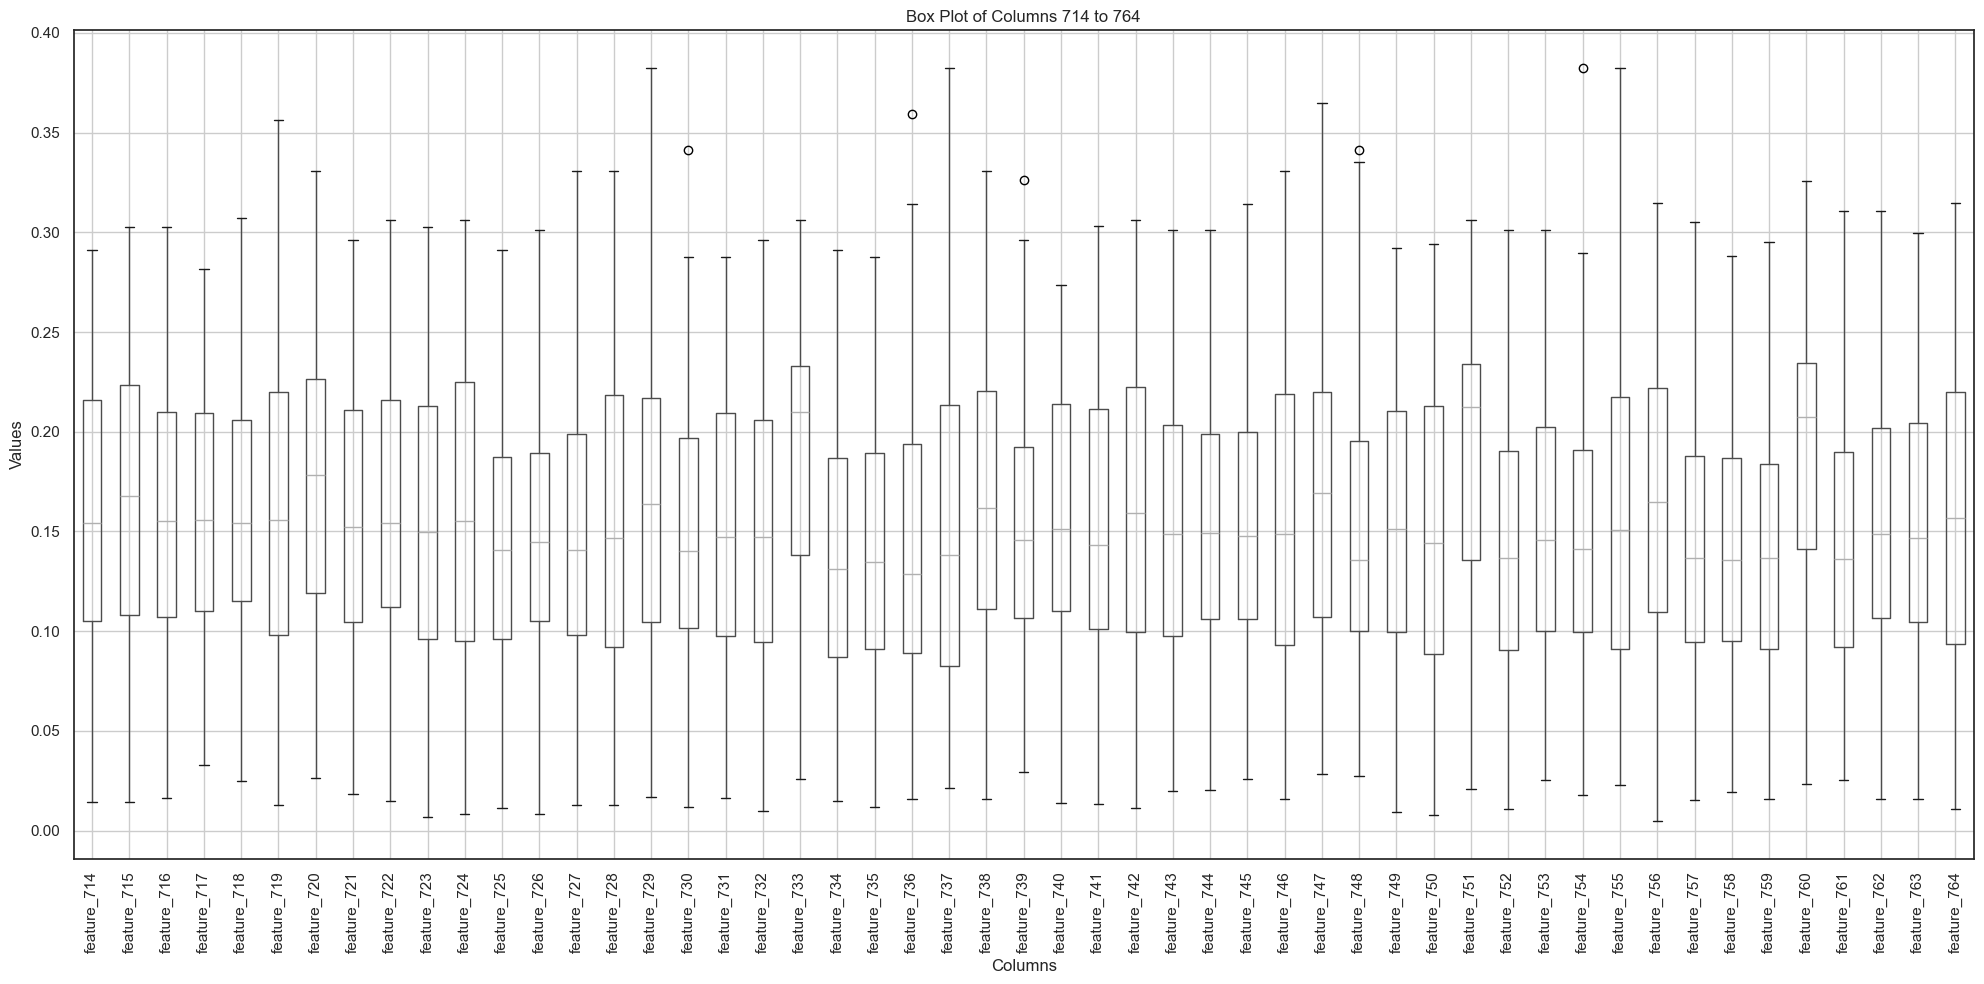

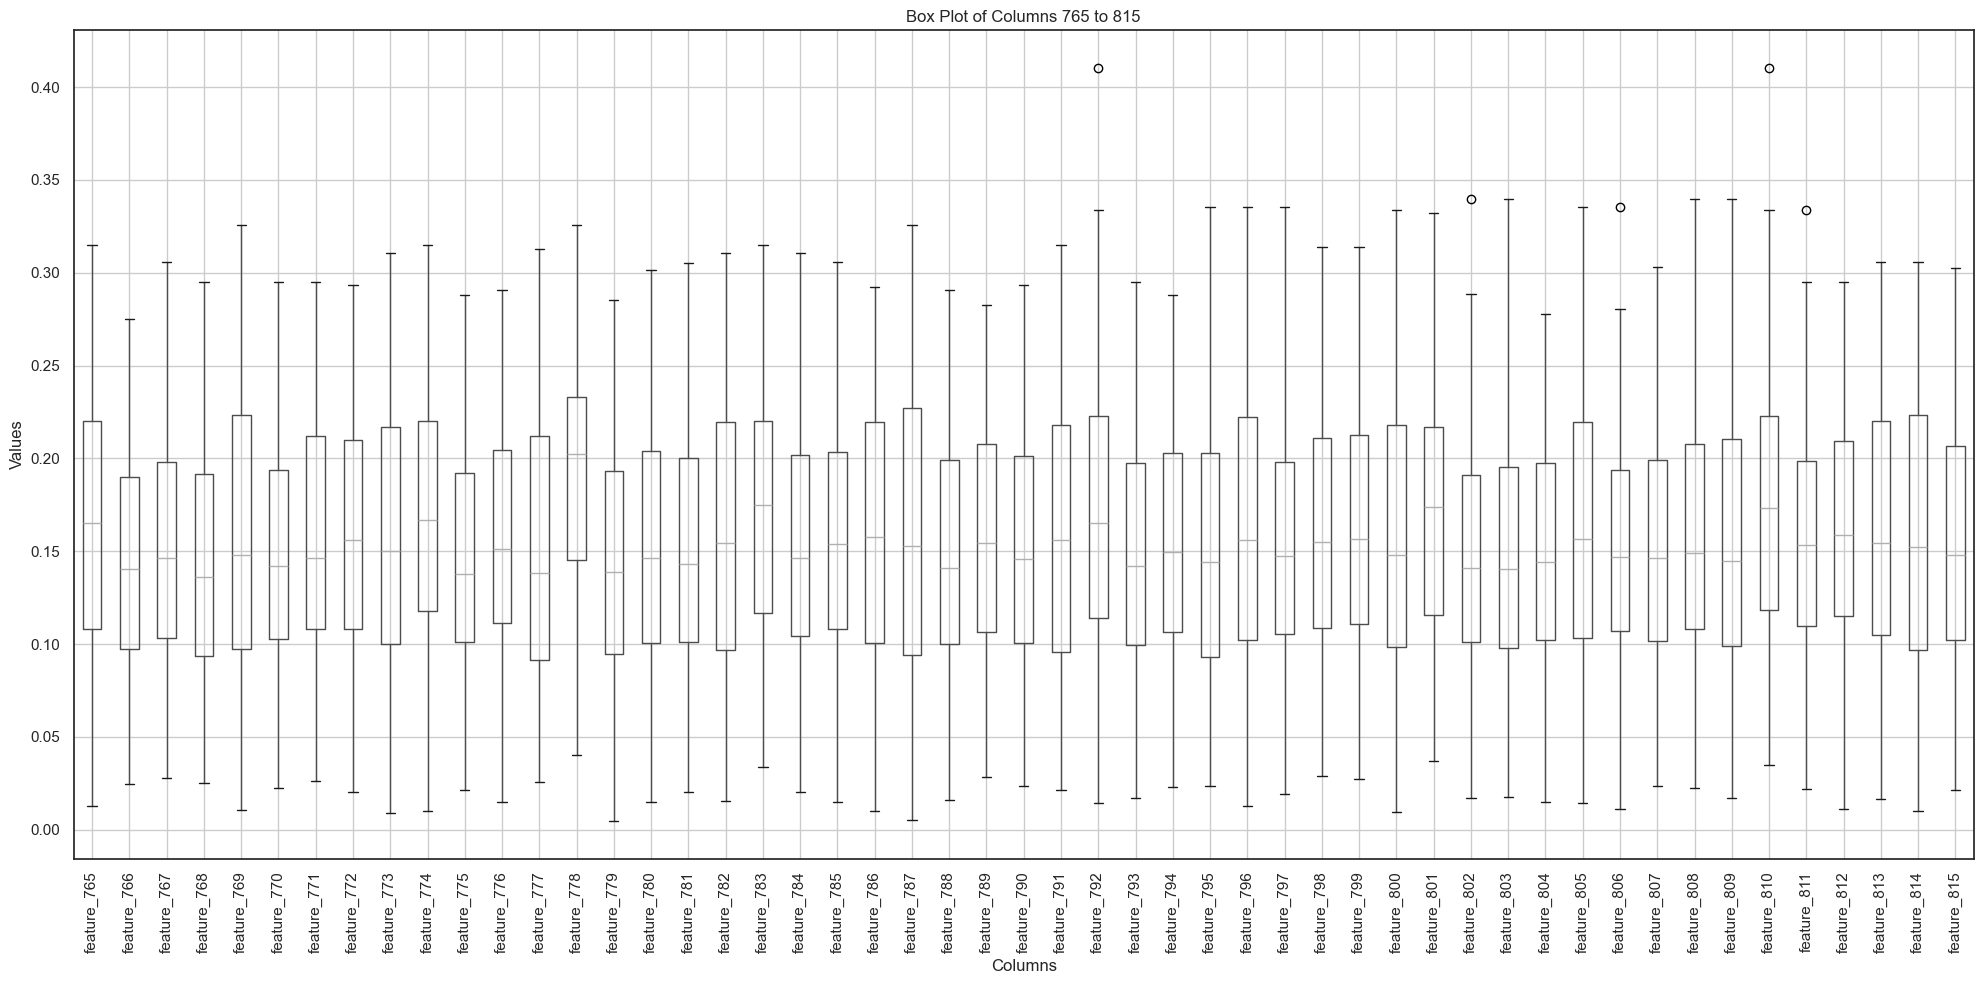

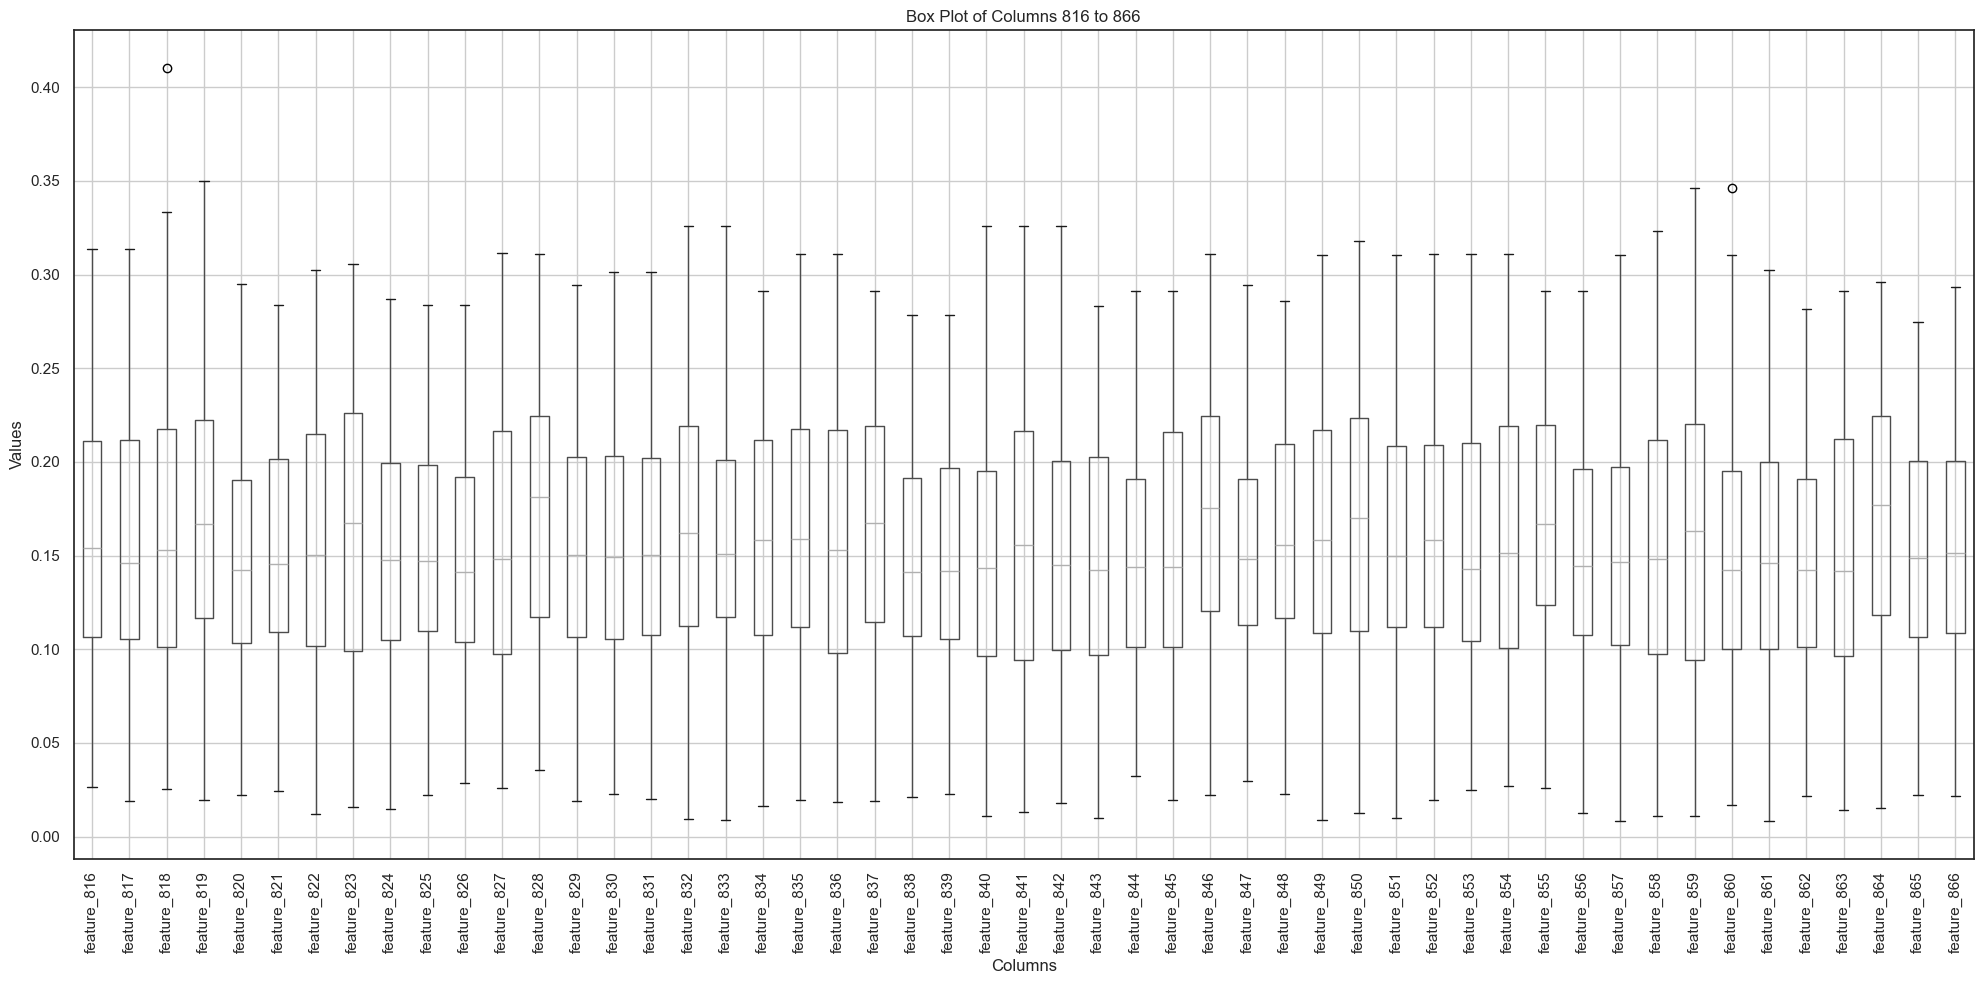

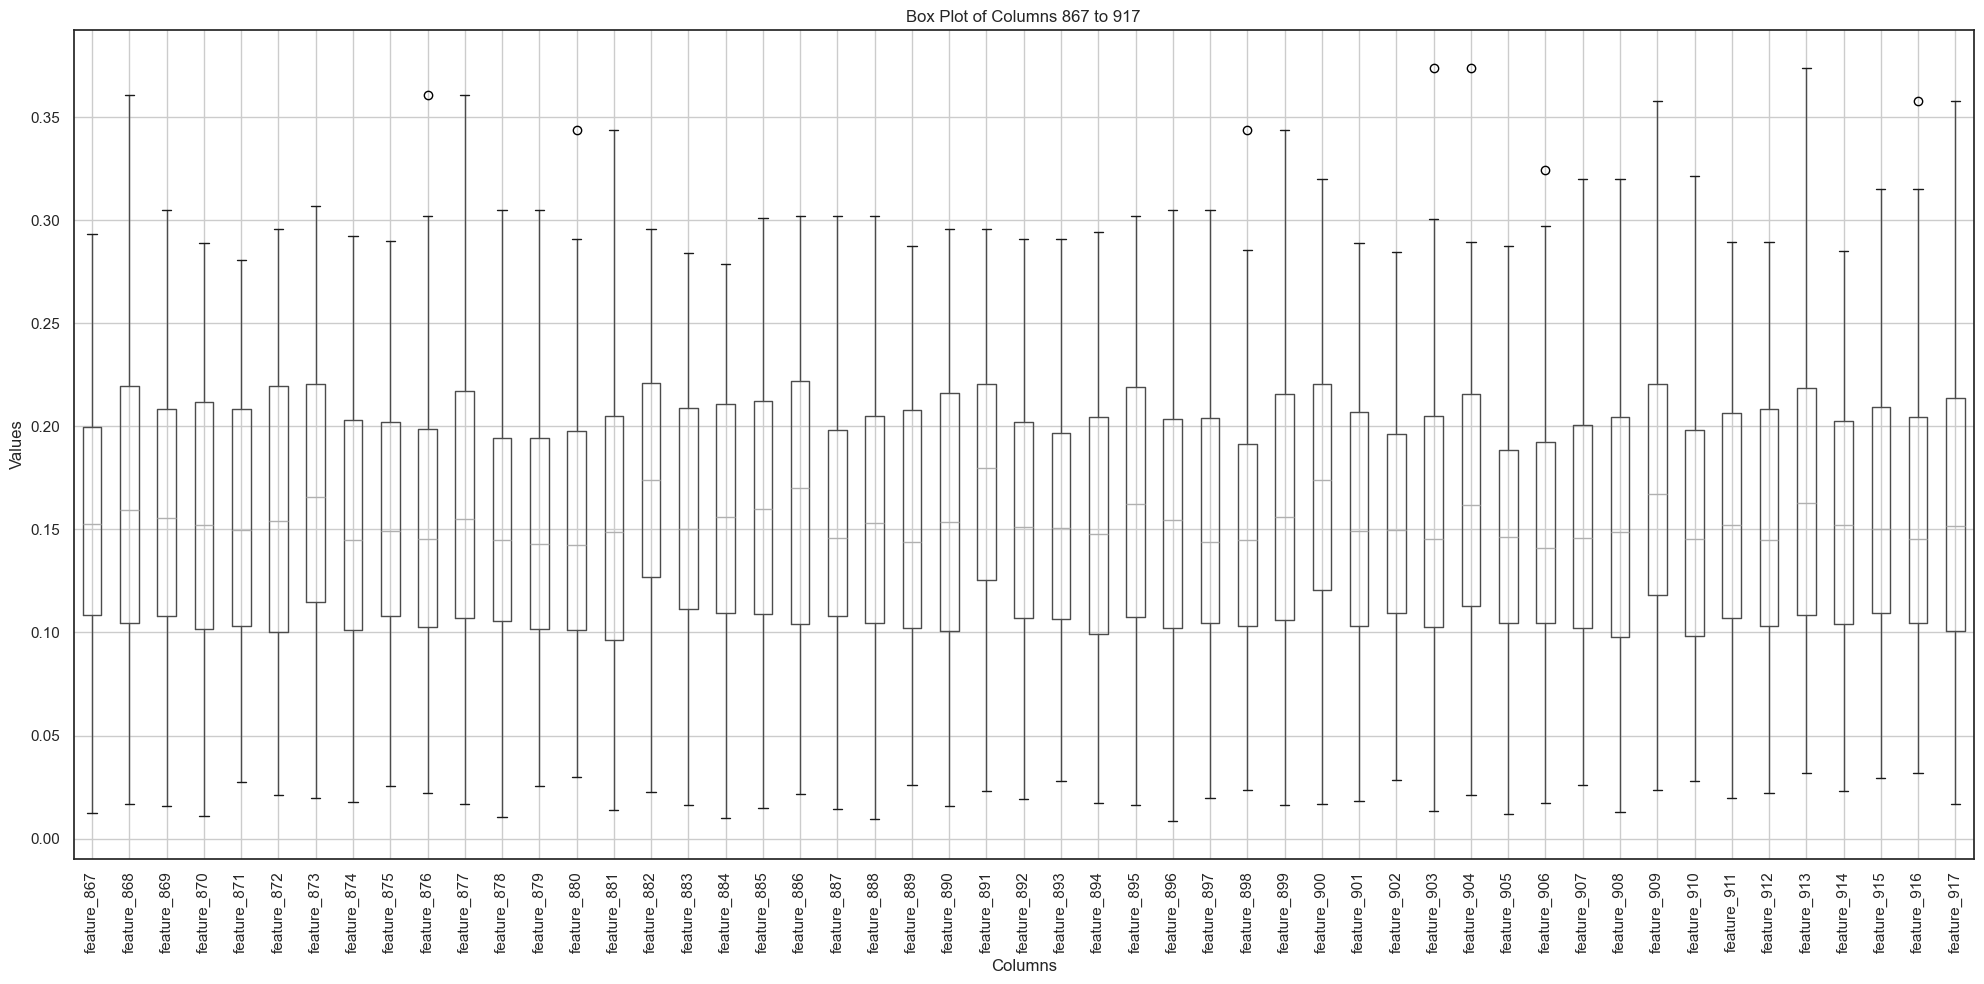

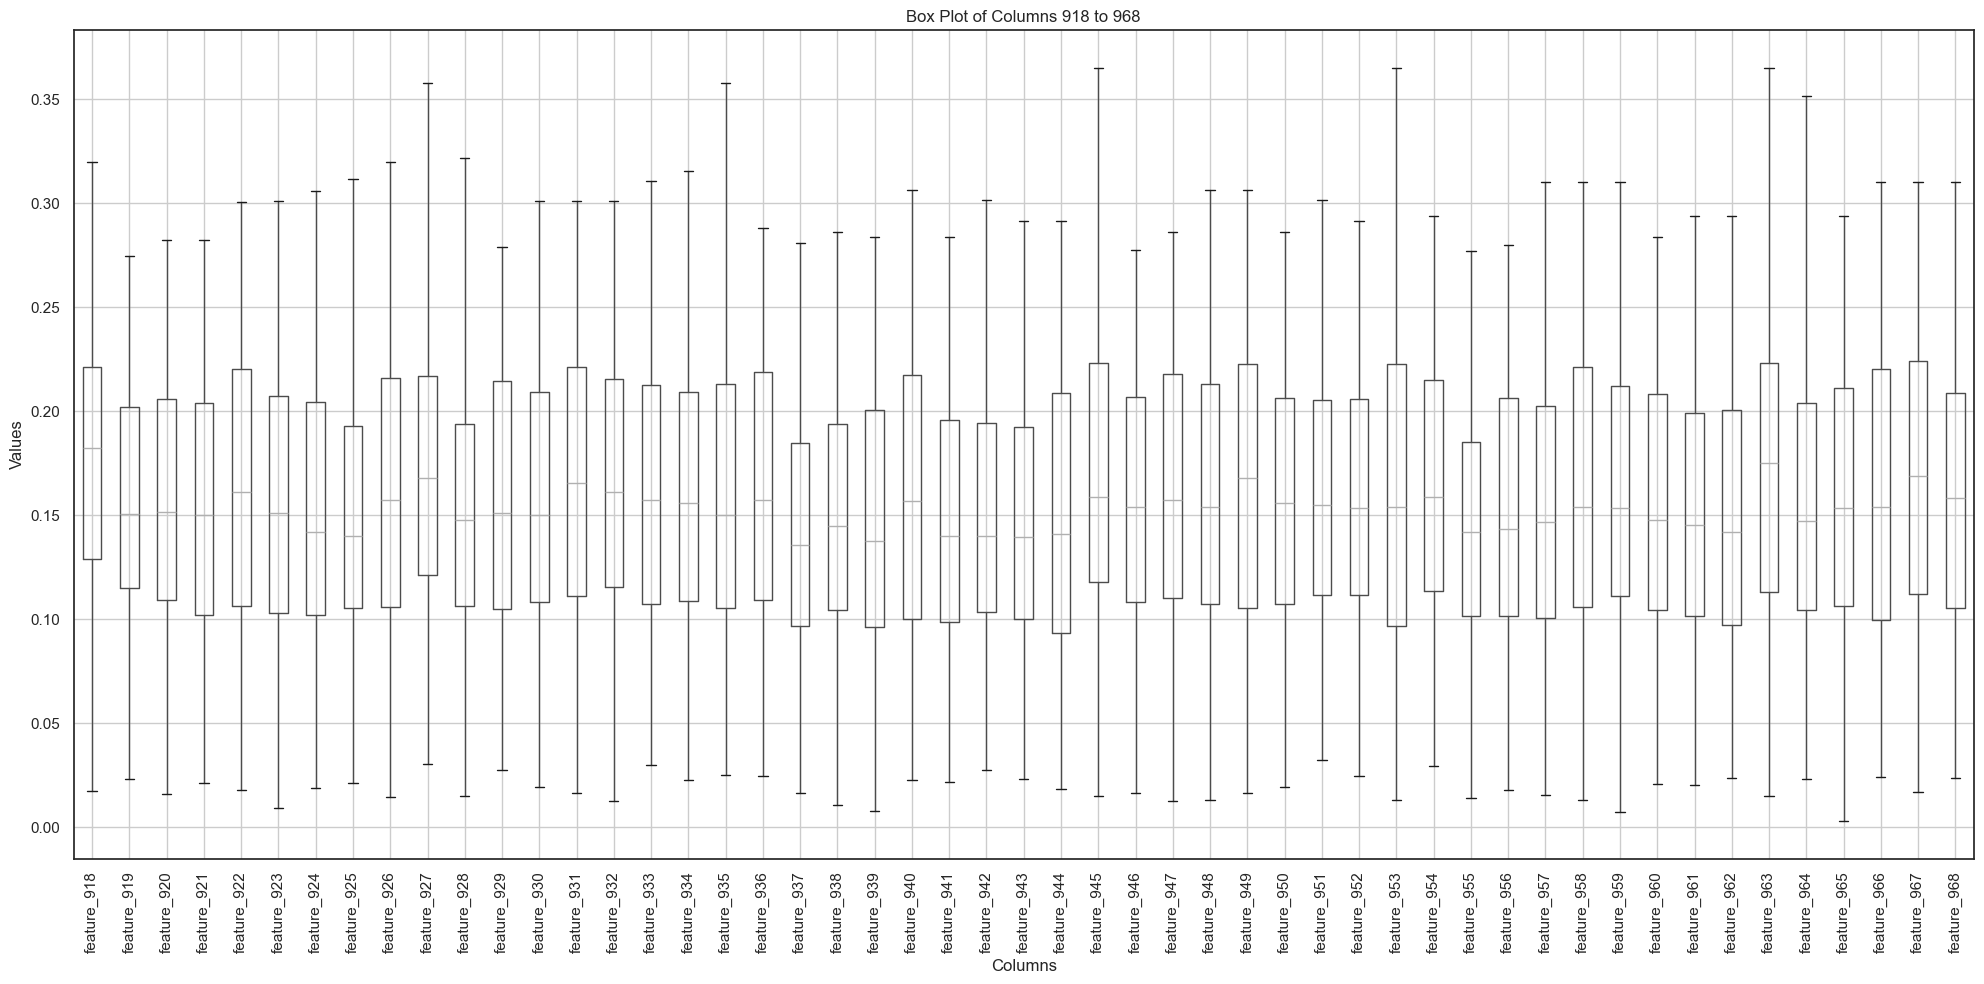

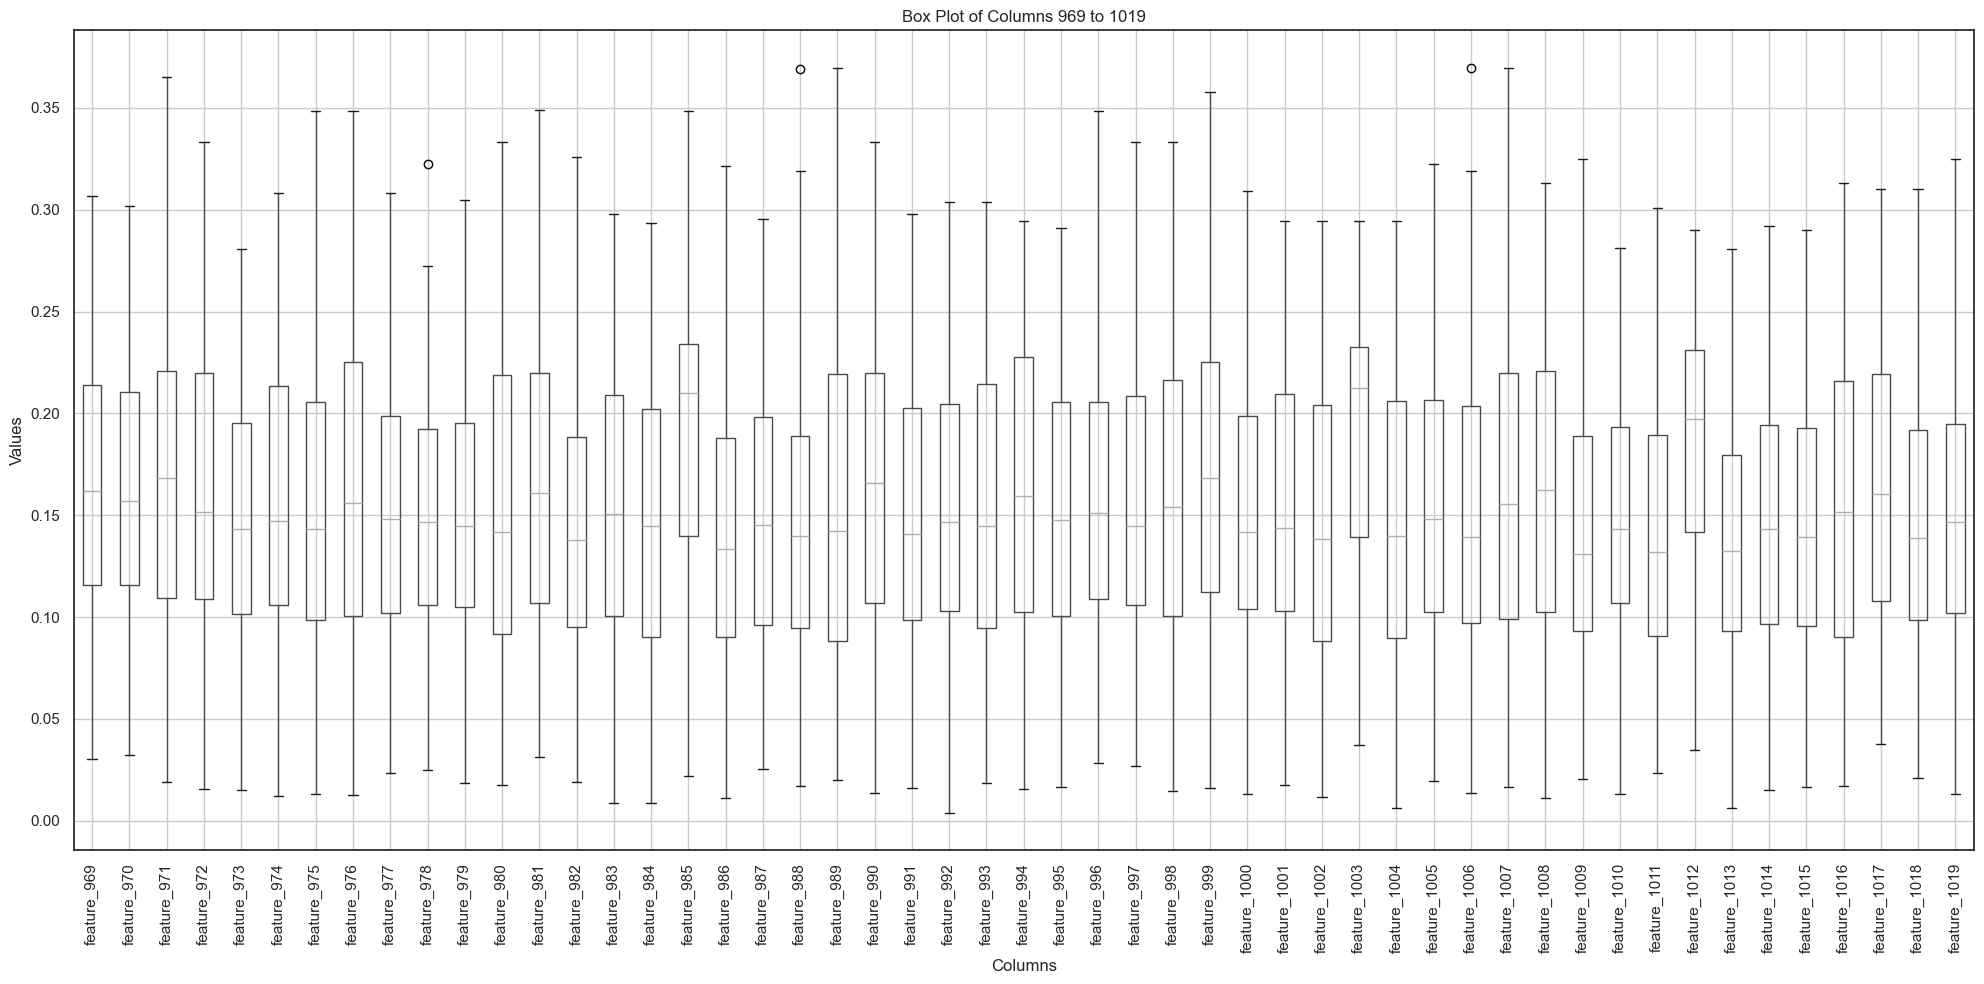

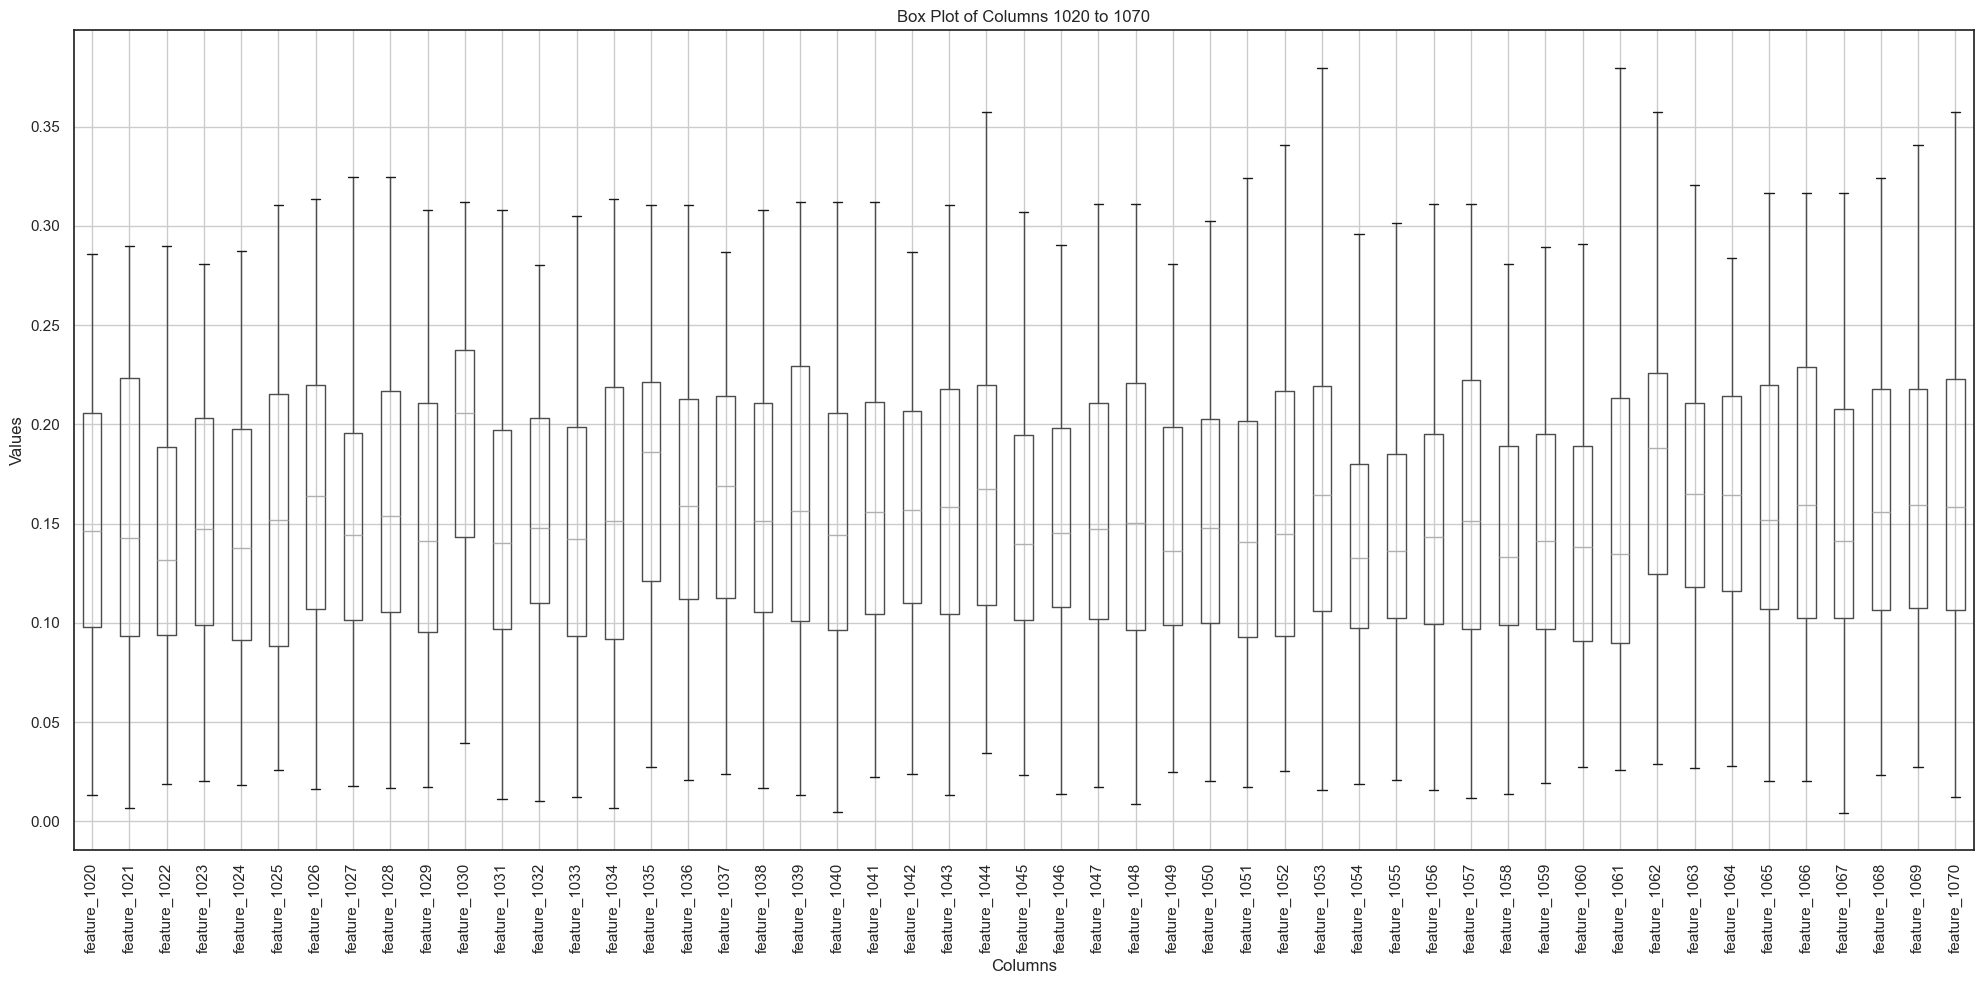

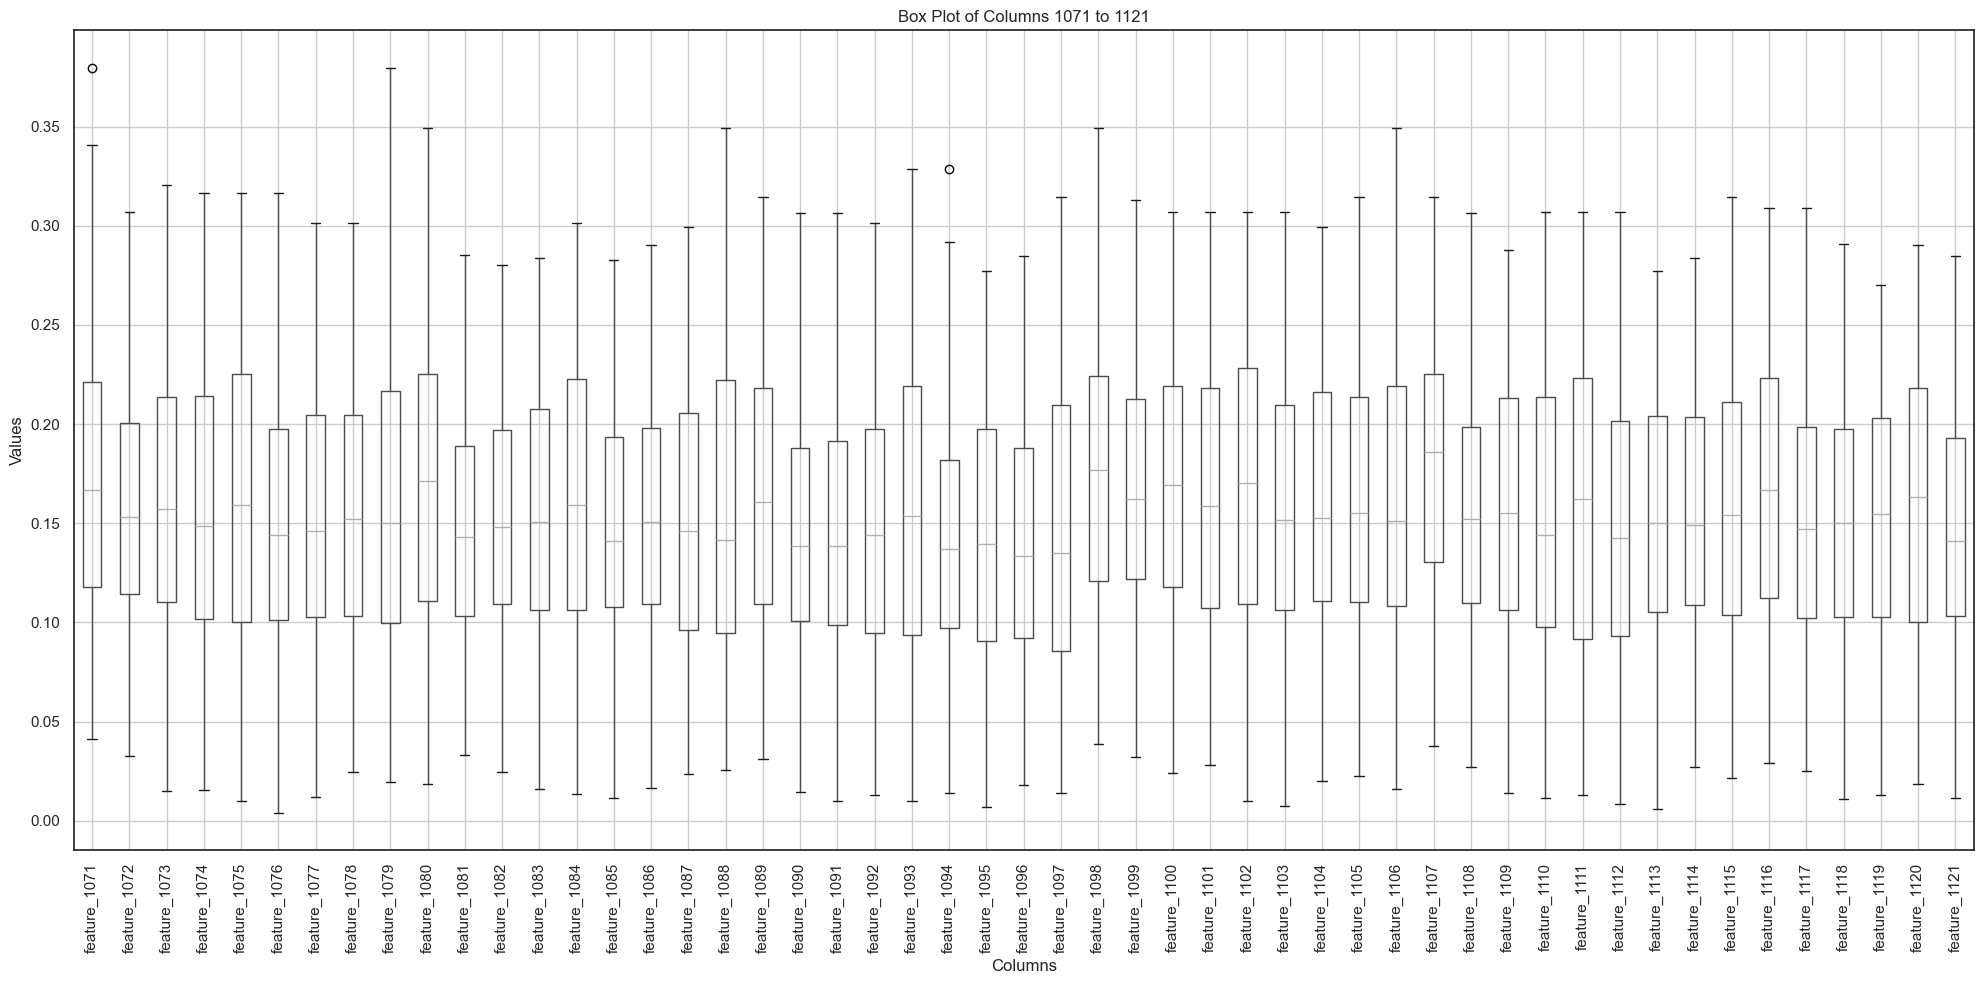

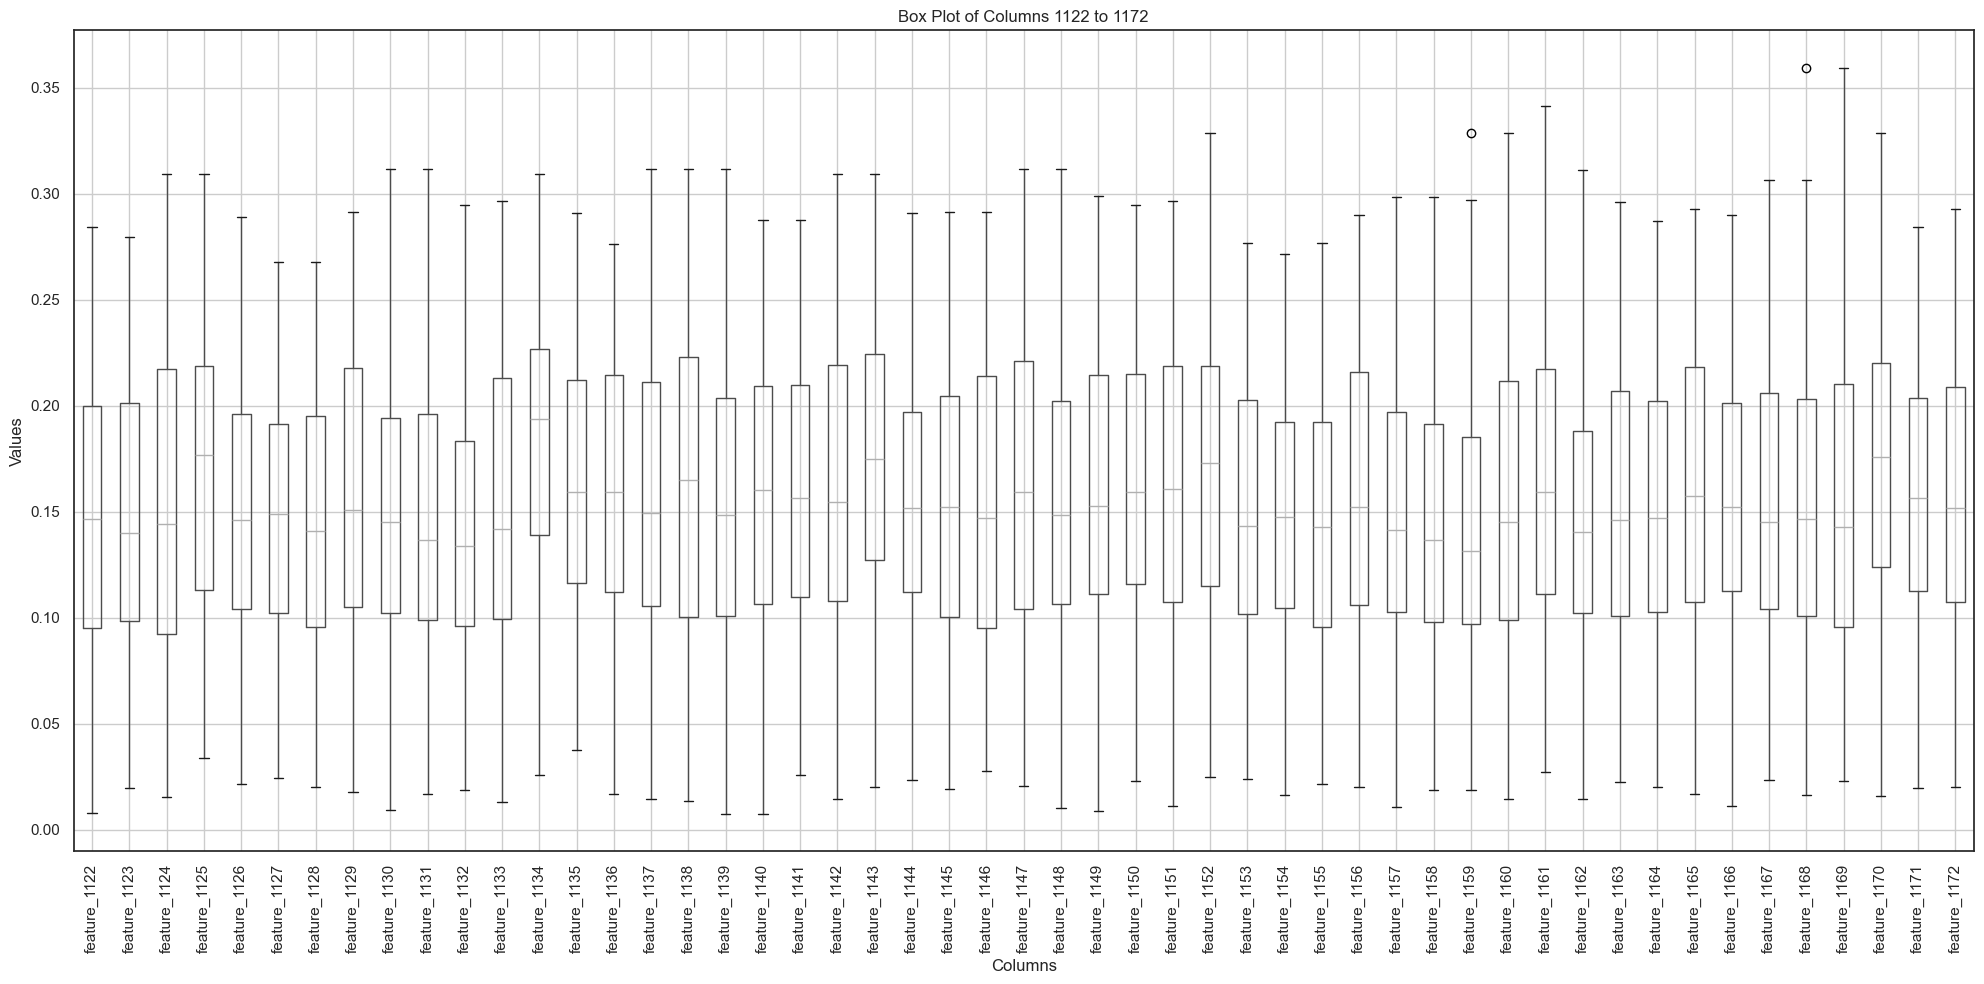

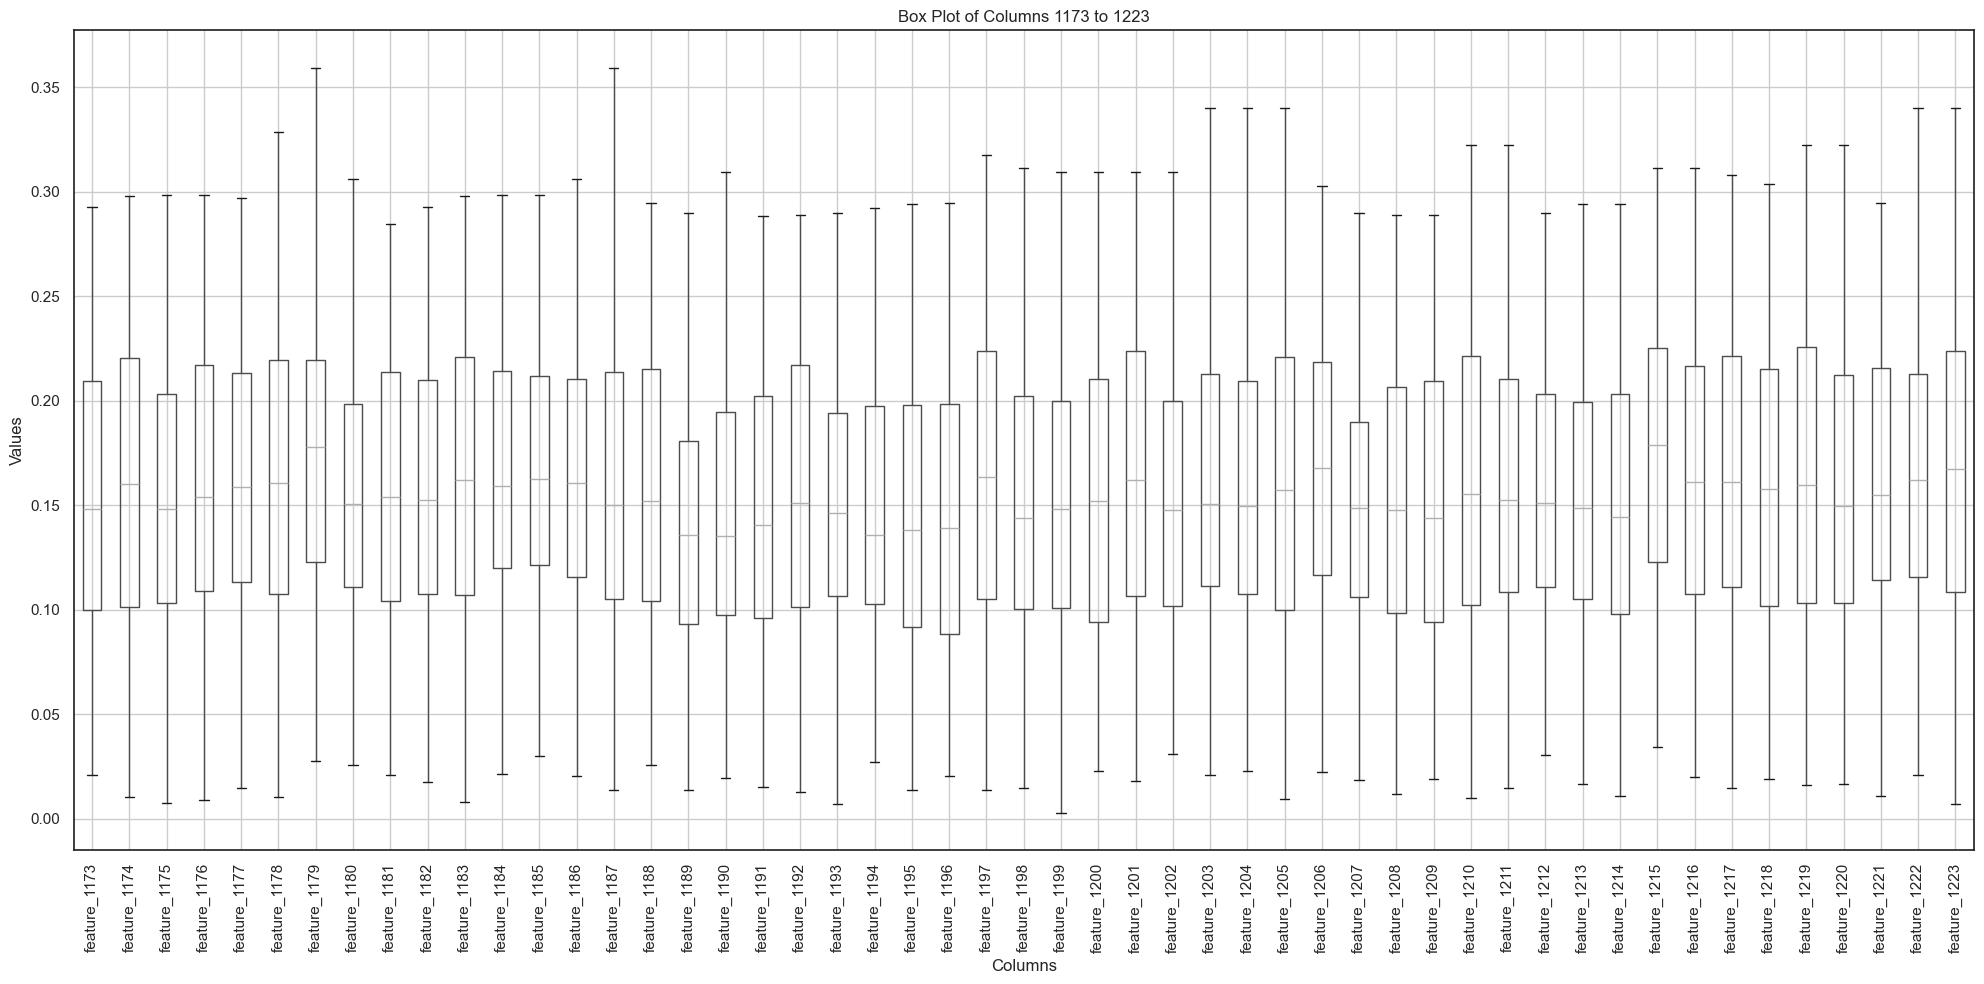

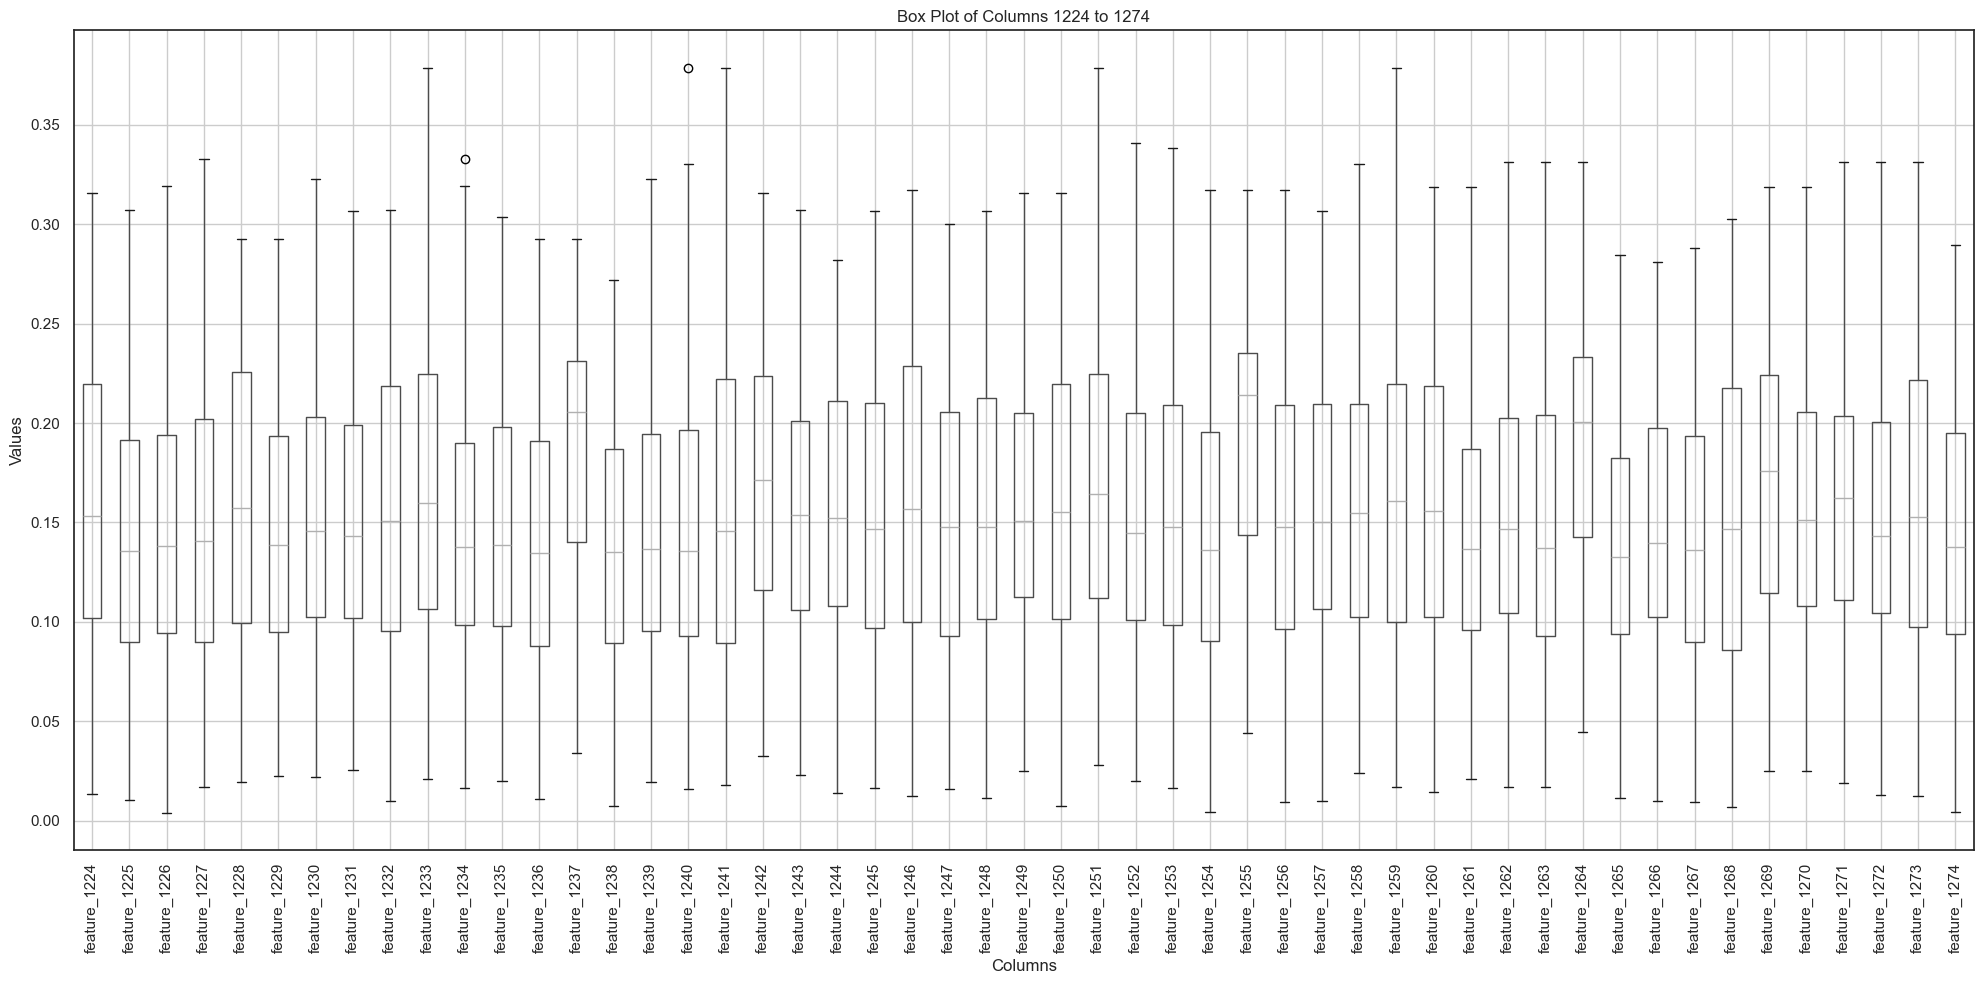

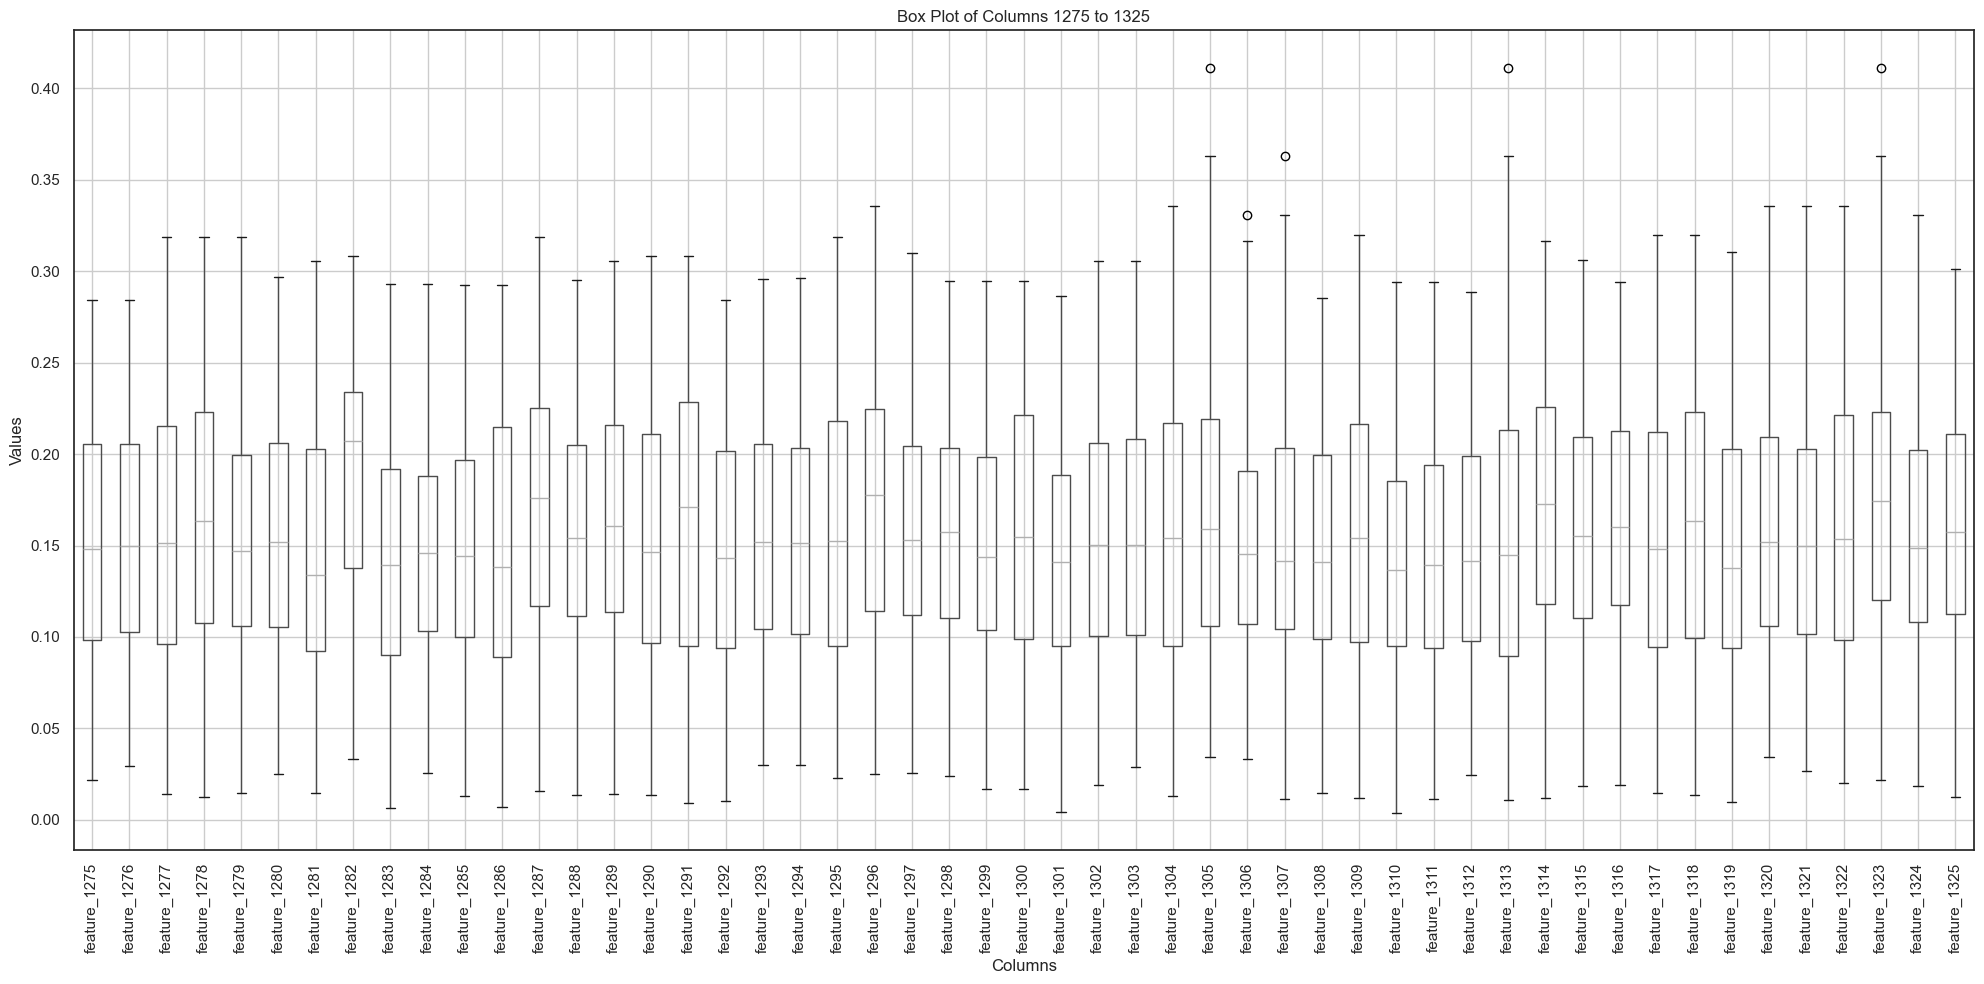

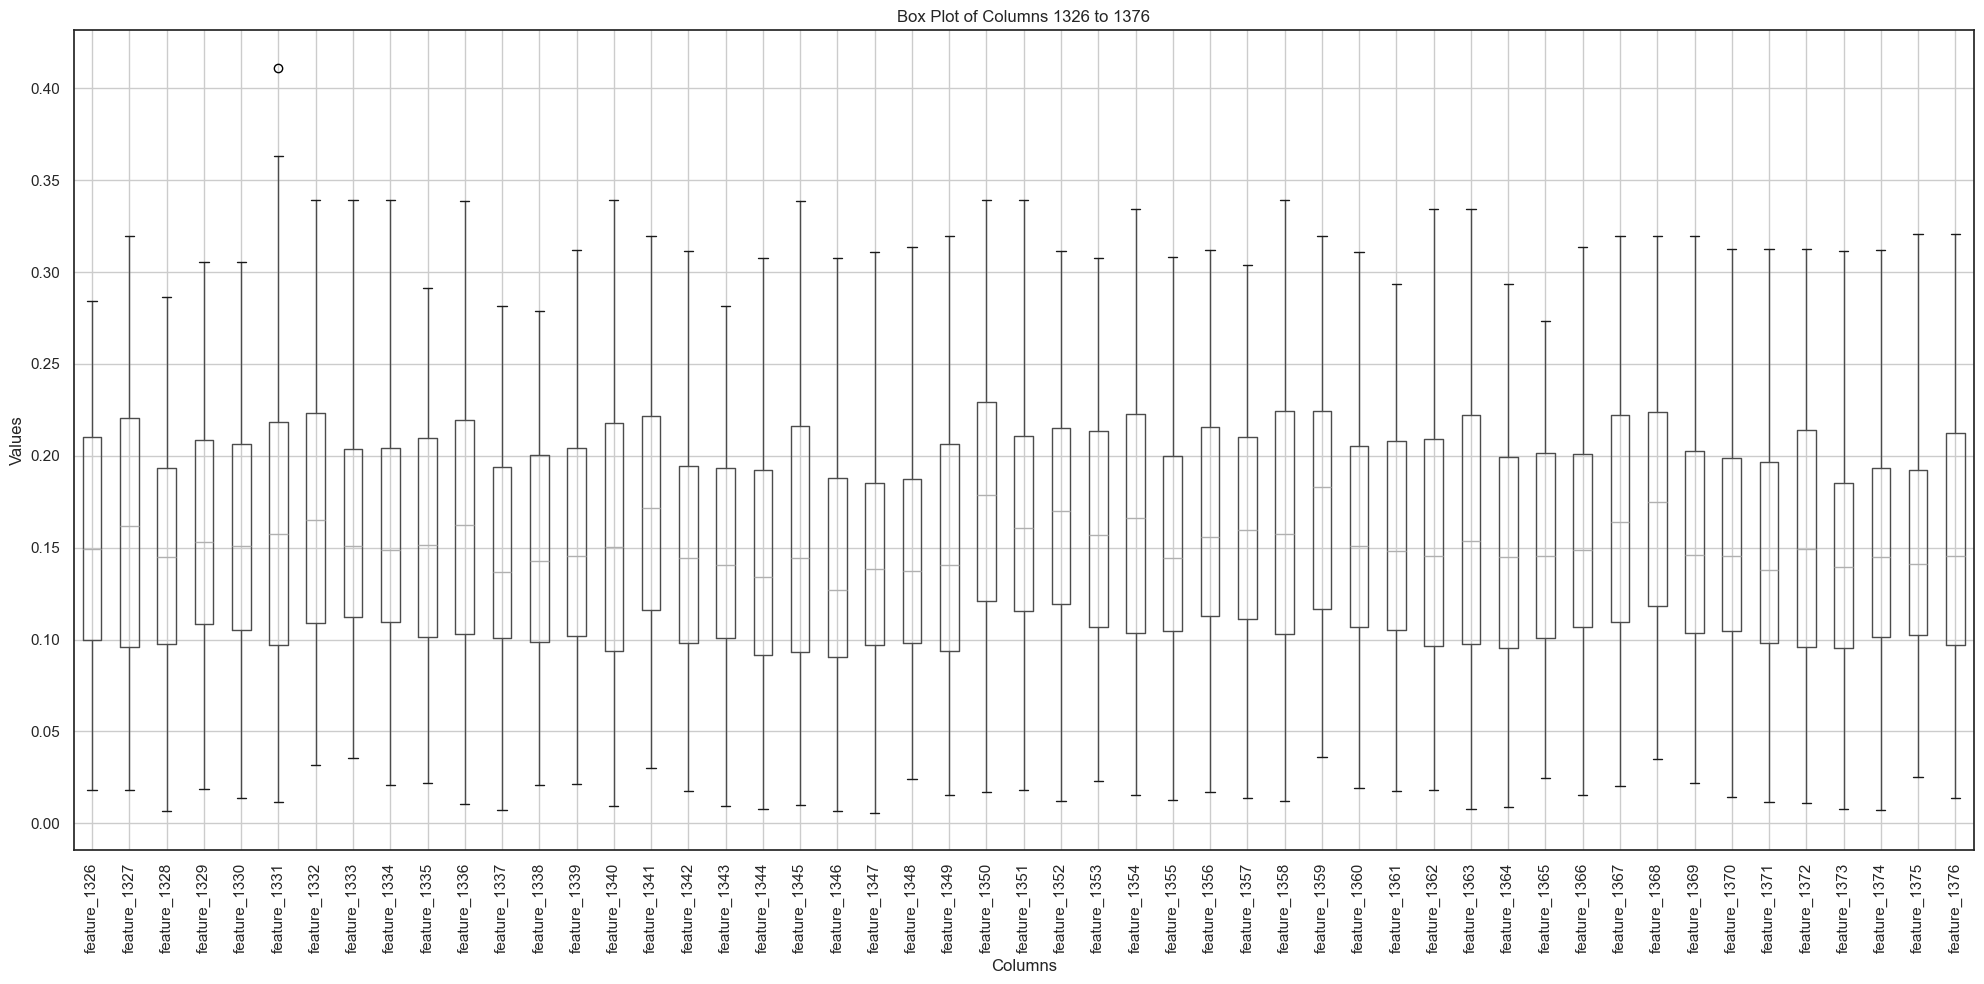

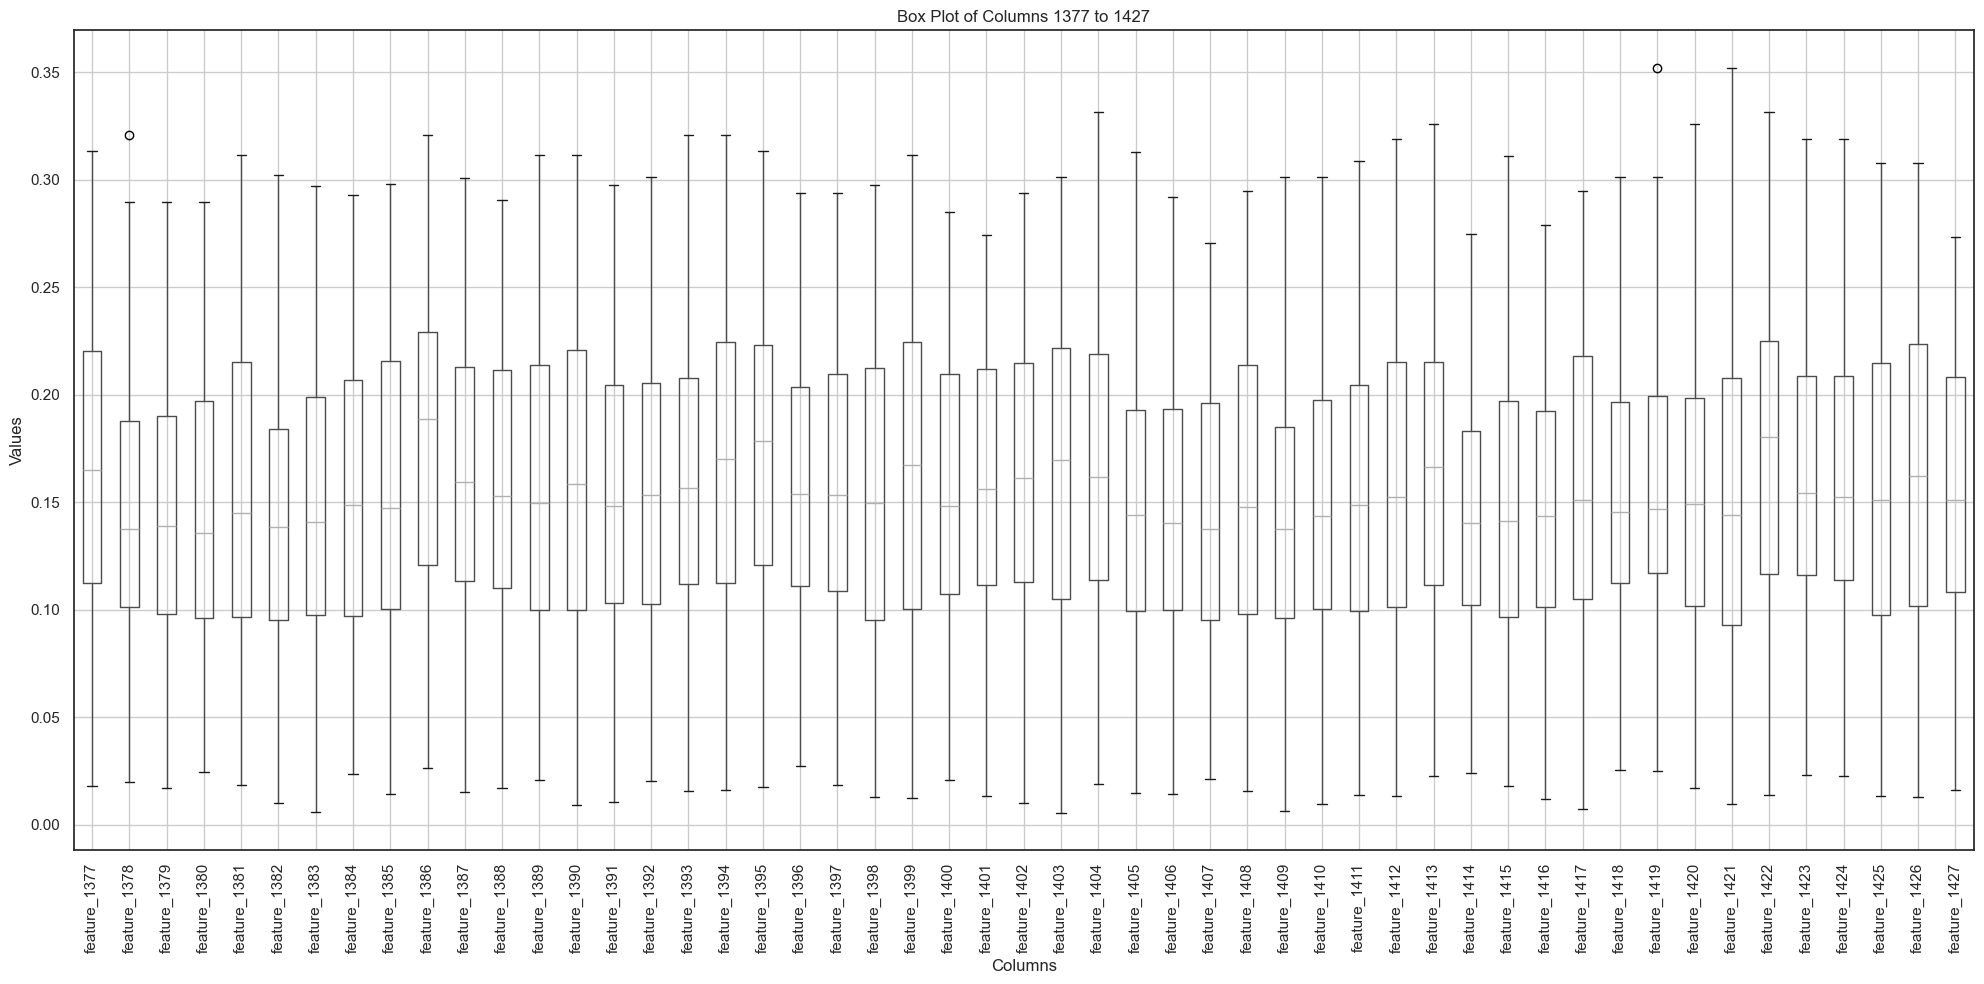

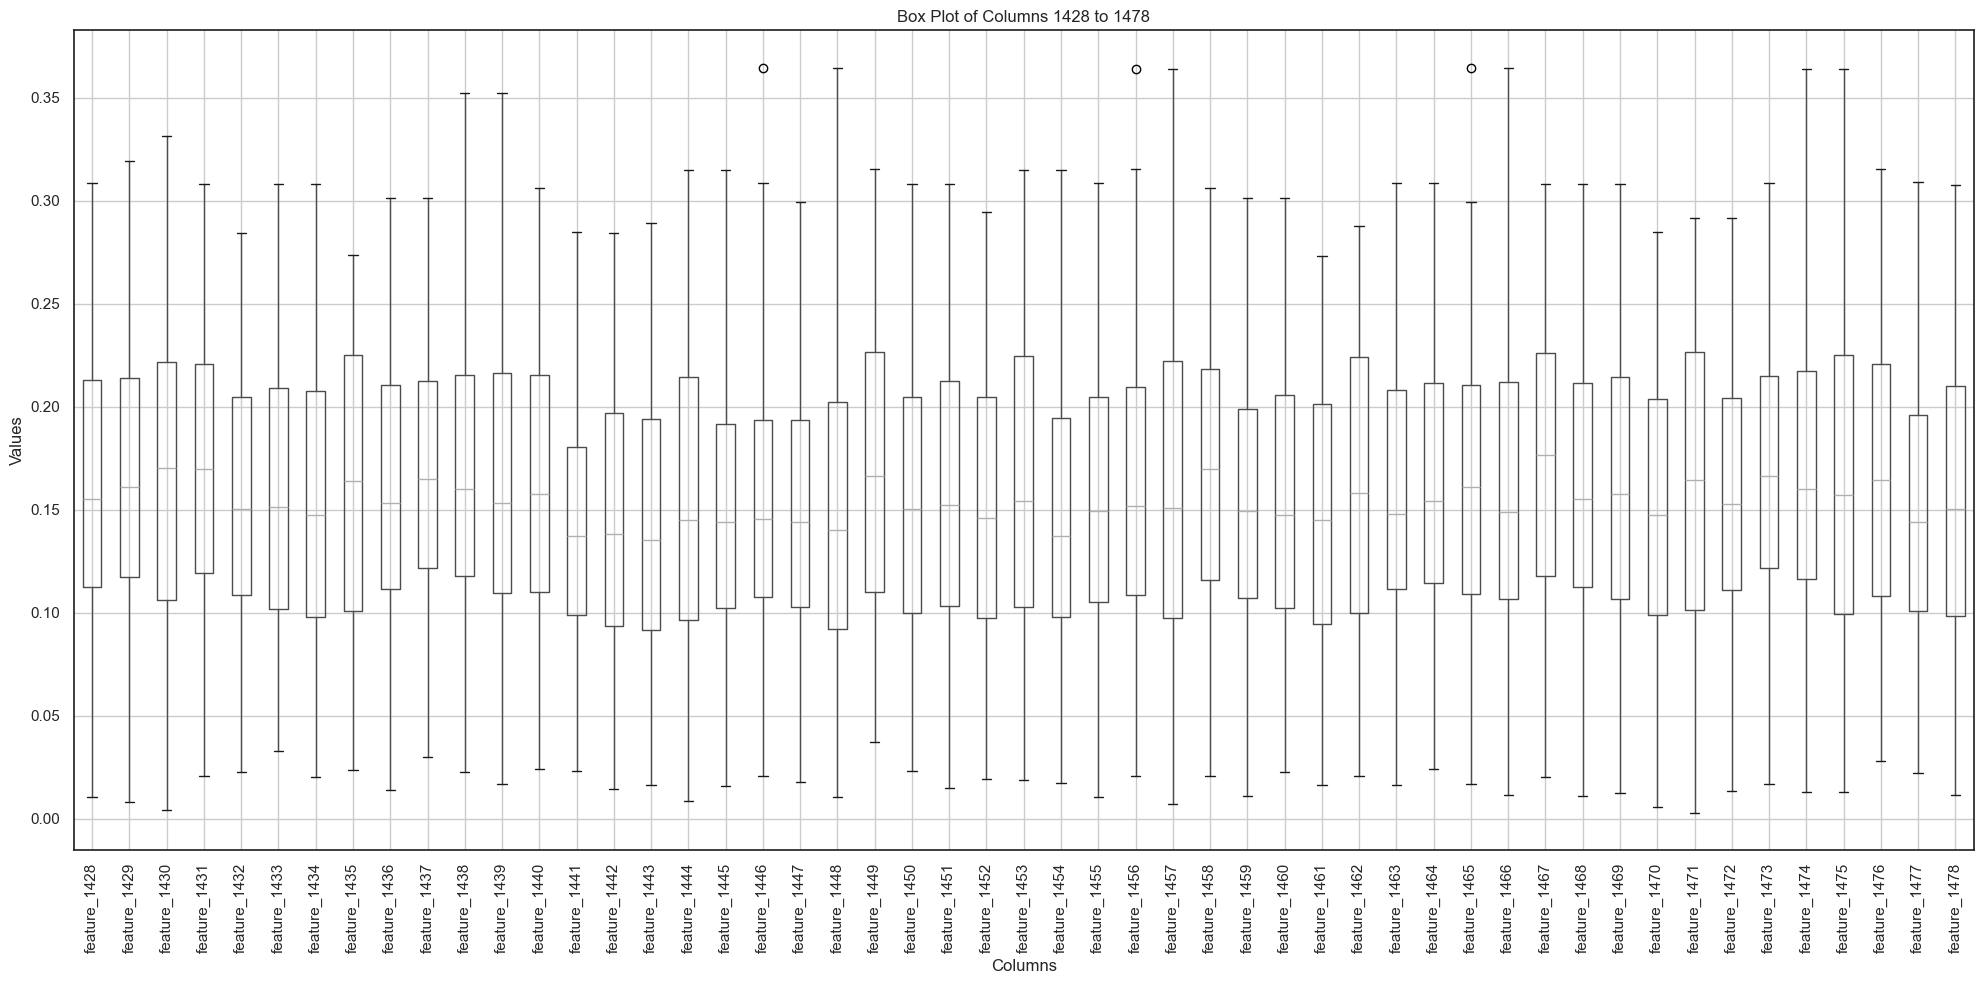

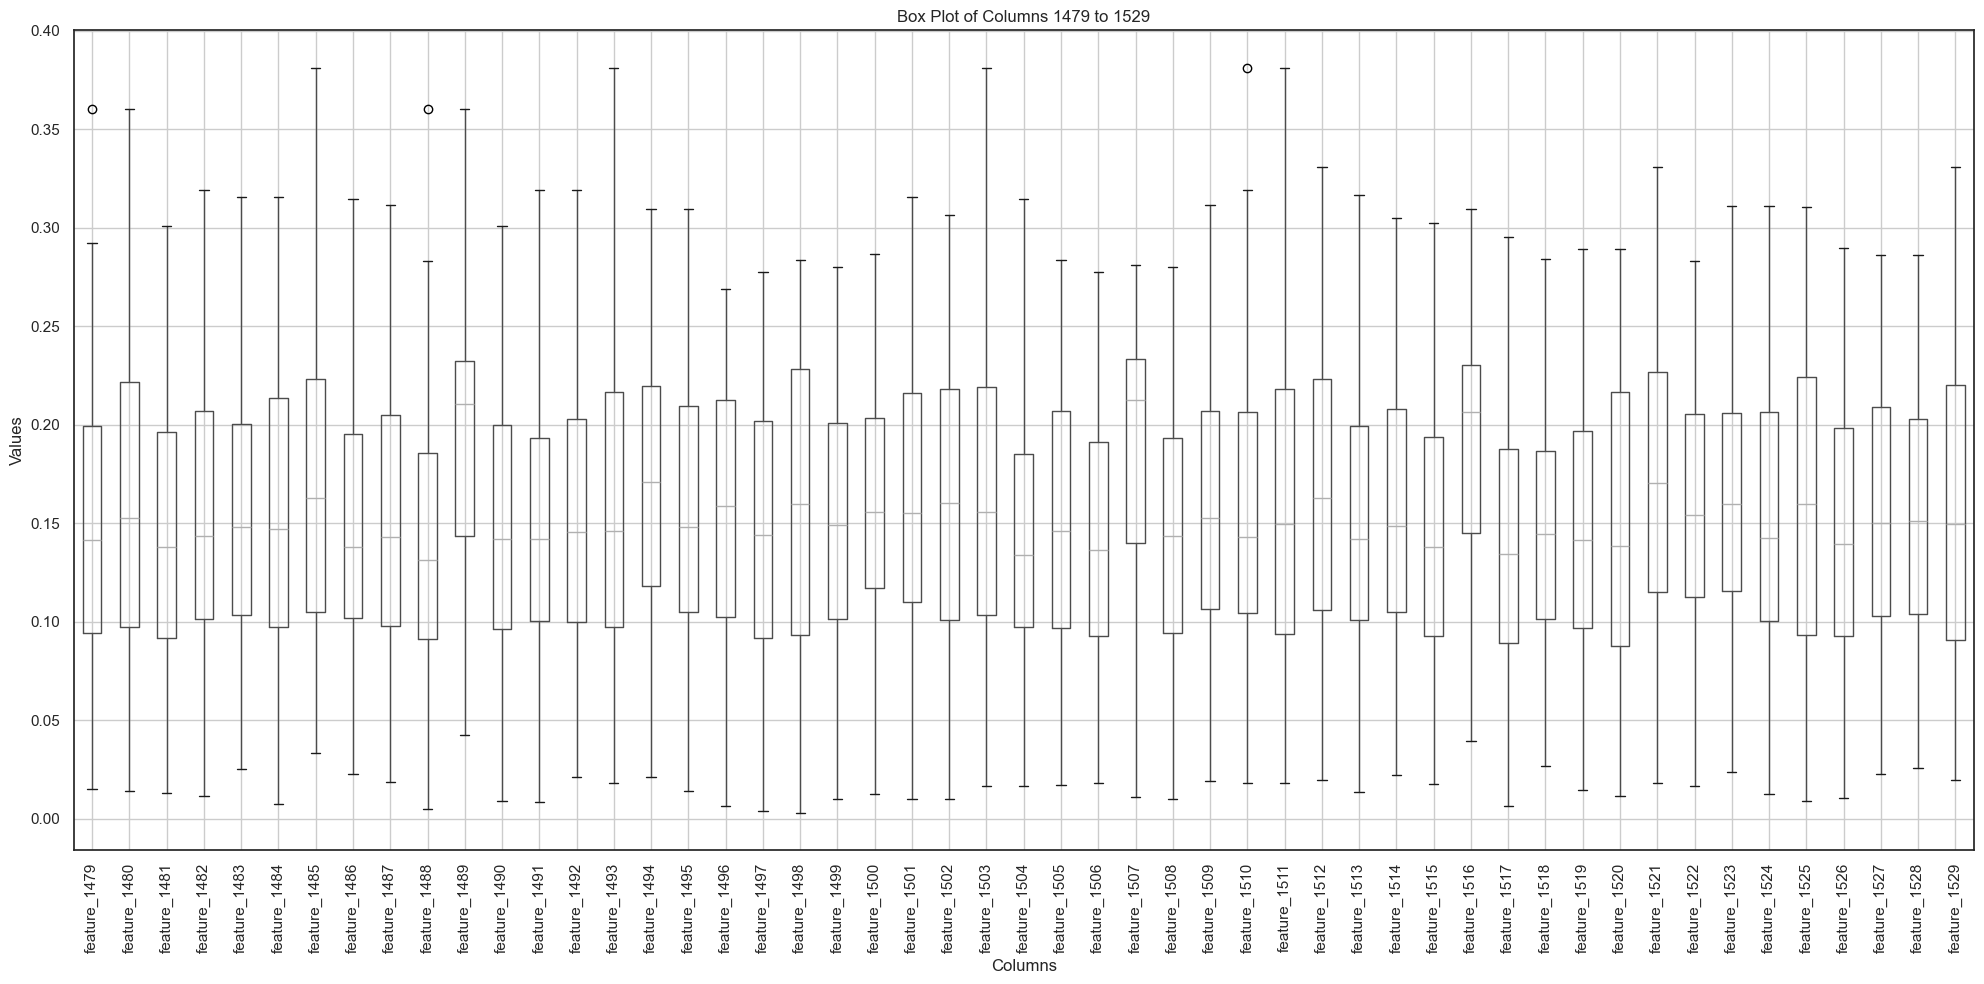

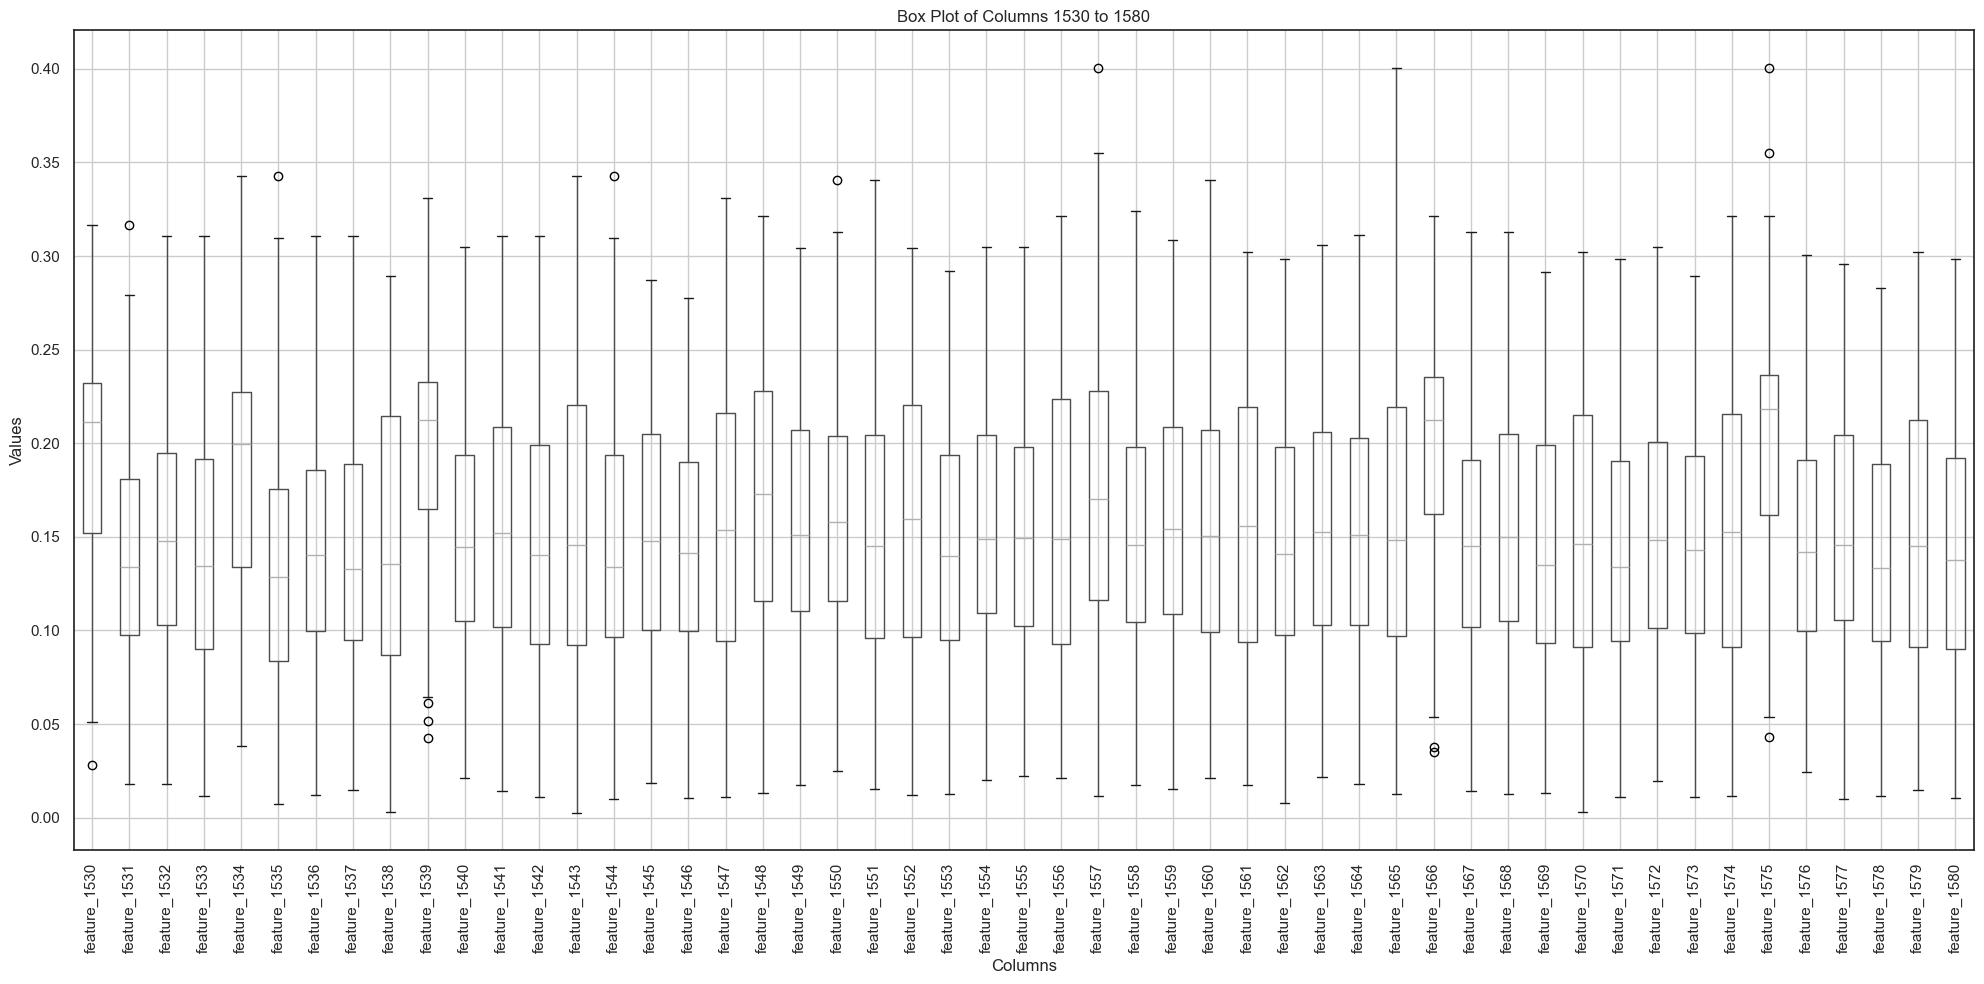

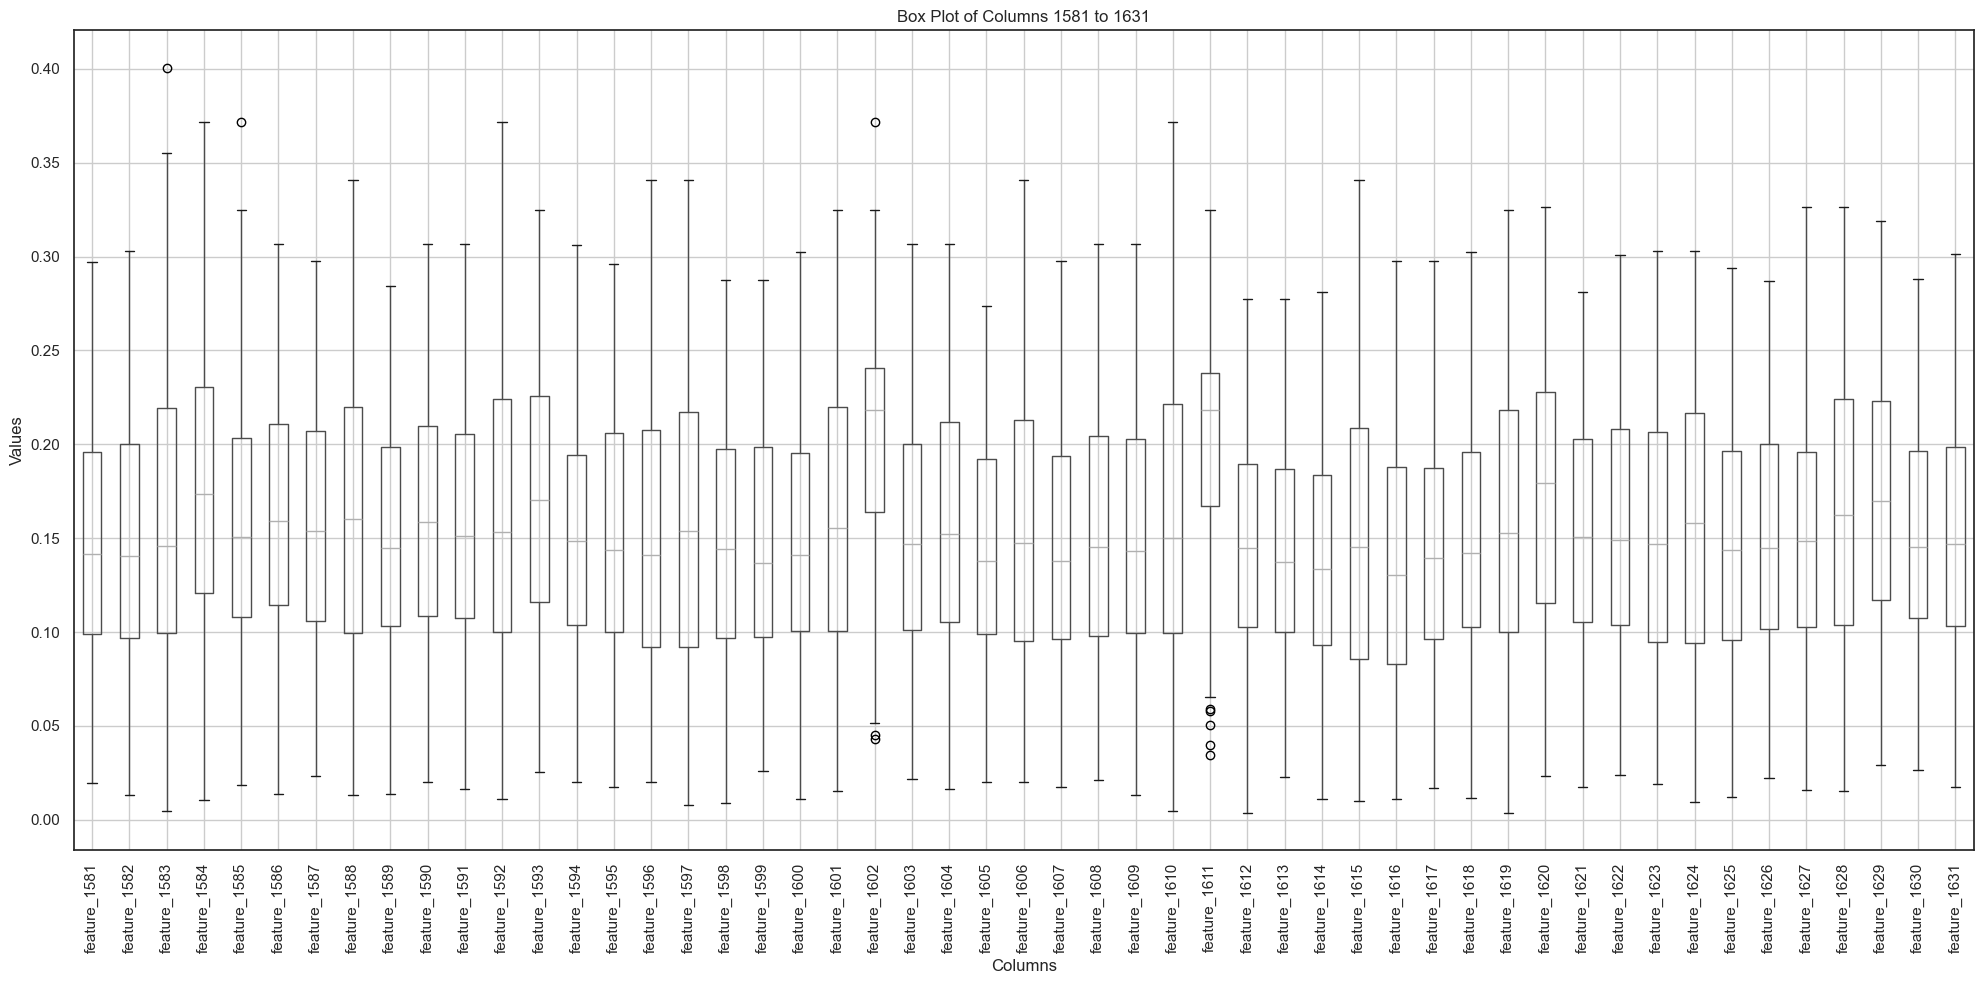

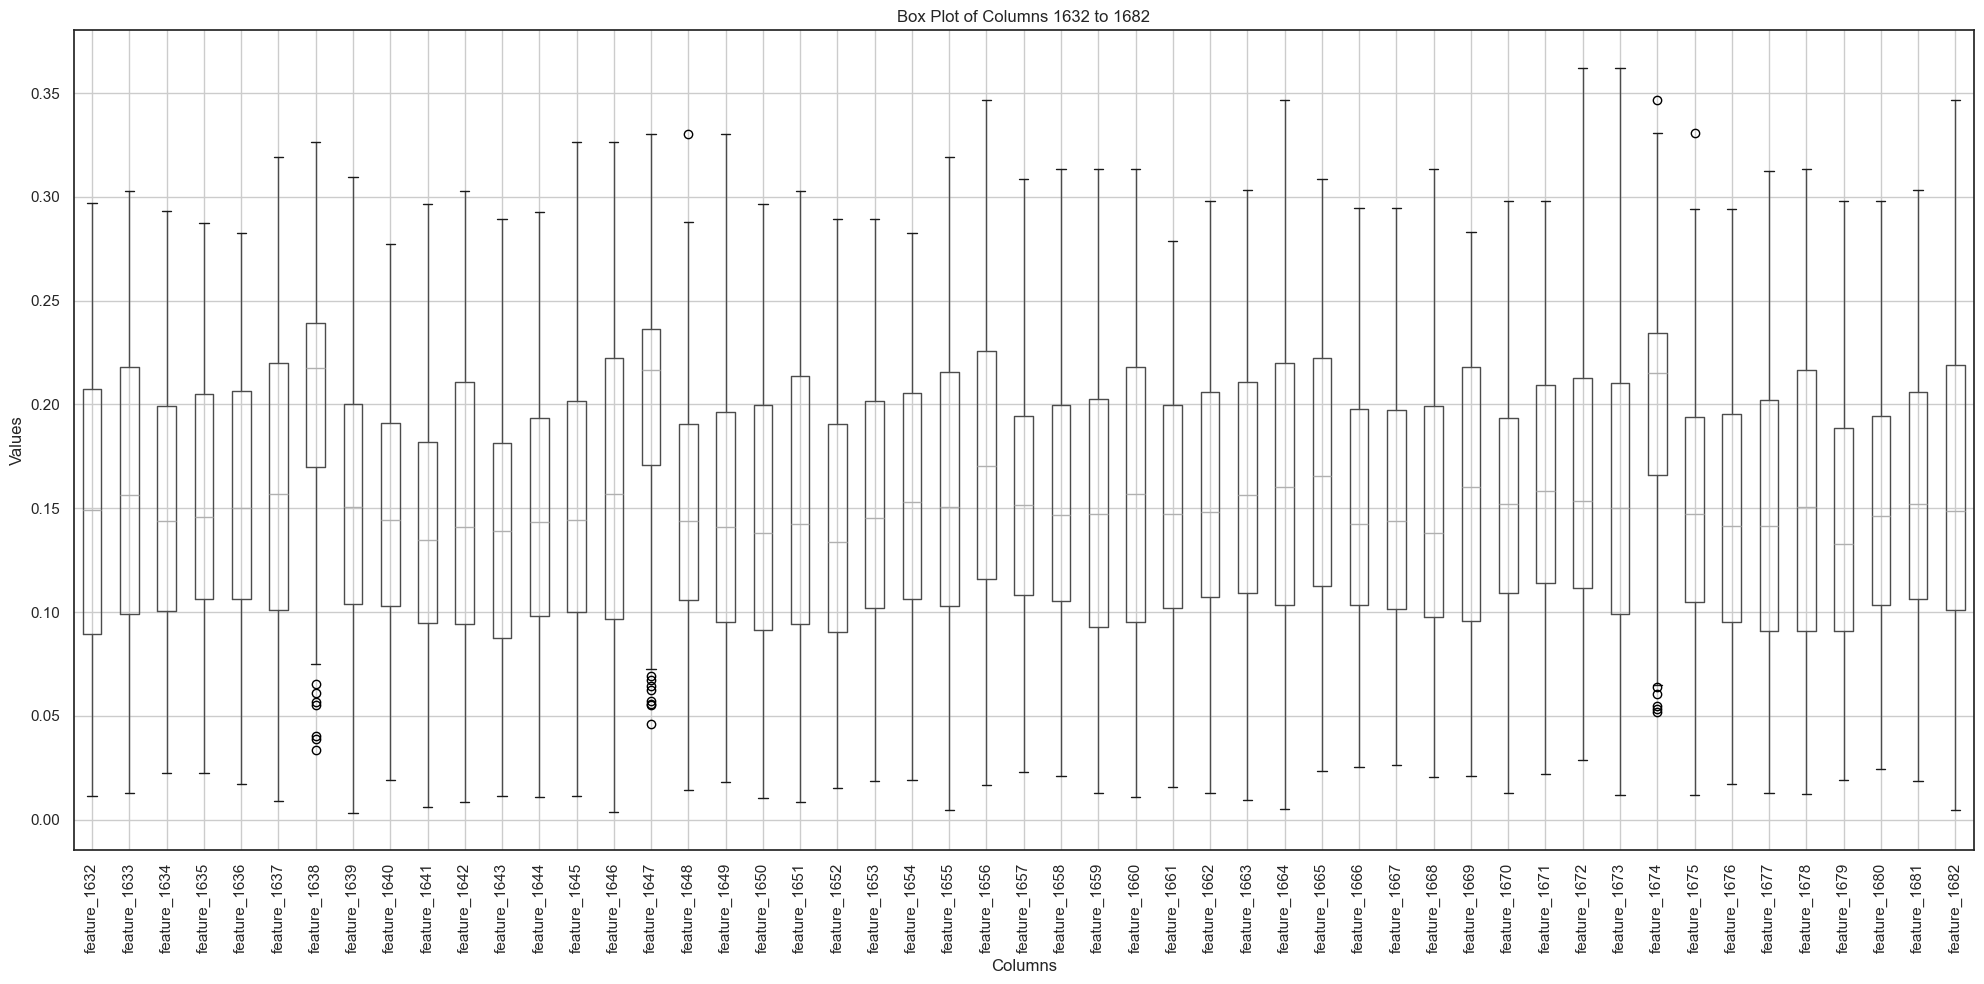

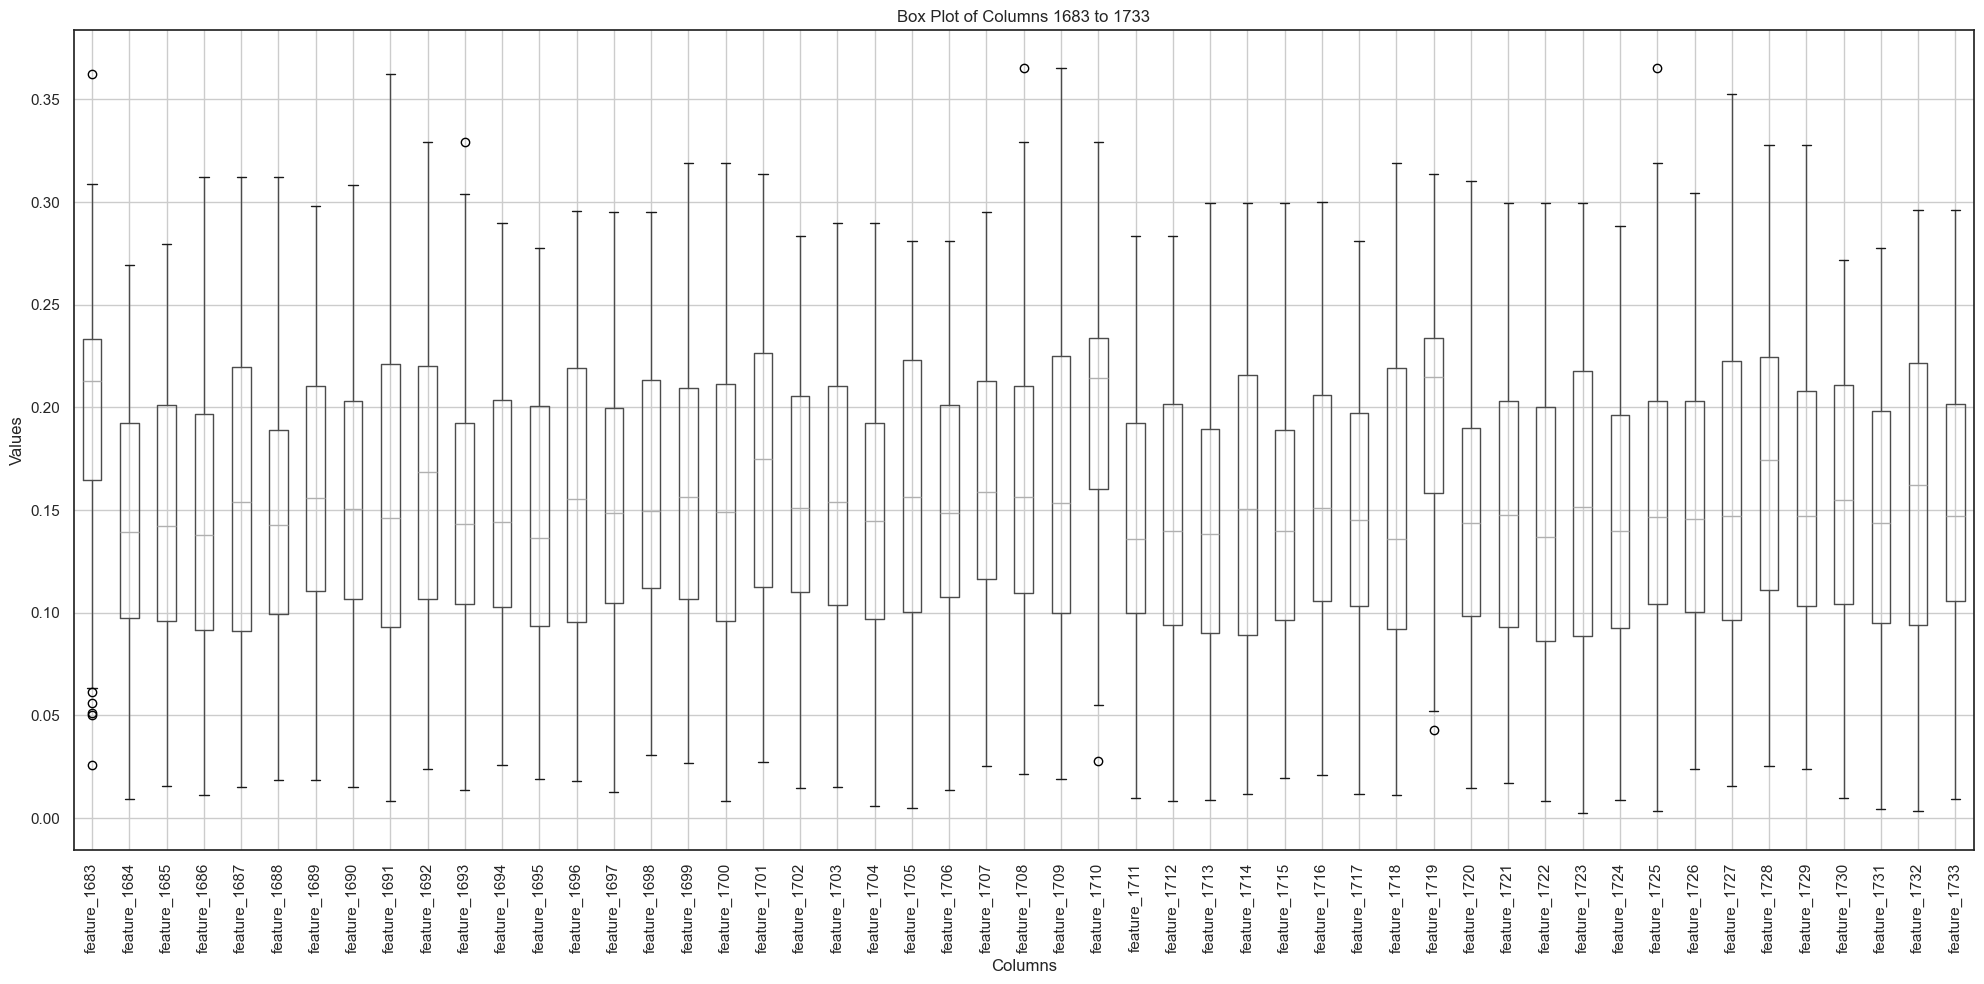

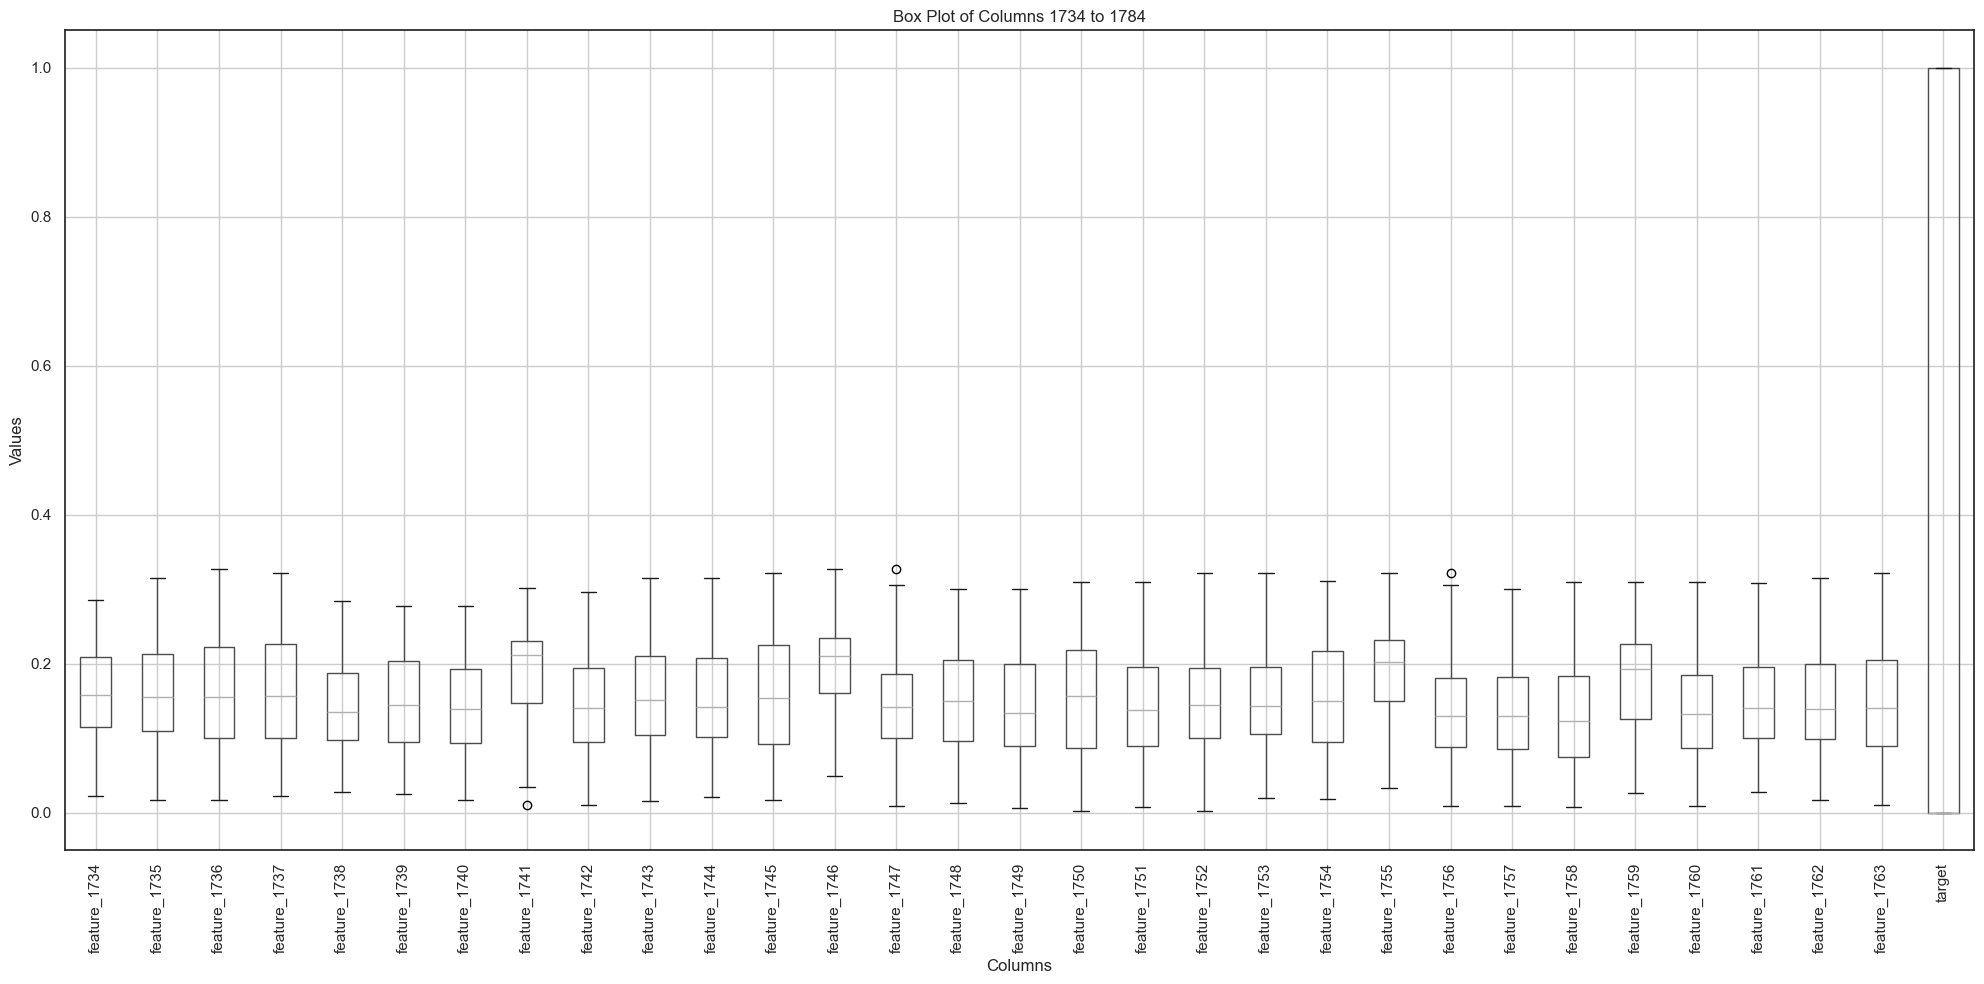

In [19]:
plot_boxplots(skin_data)

In [20]:
replace_outliers_with_median(skin_data)

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0     0.140636   0.077102   0.095992   0.074851   0.248540   0.248540   
1     0.226795   0.189752   0.191774   0.240317   0.240317   0.206337   
2     0.207159   0.235533   0.205187   0.247127   0.247127   0.159343   
3     0.223319   0.223319   0.223319   0.115344   0.086055   0.064132   
4     0.191339   0.225817   0.208300   0.121575   0.159484   0.114844   
..         ...        ...        ...        ...        ...        ...   
444   0.134946   0.084983   0.126417   0.125242   0.258902   0.258902   
445   0.115486   0.063501   0.196827   0.123368   0.195010   0.154677   
446   0.251313   0.110358   0.132768   0.163493   0.205338   0.130316   
447   0.256219   0.183045   0.173232   0.202038   0.234006   0.122400   
468   0.137701   0.140808   0.094779   0.116728   0.179153   0.160904   

     feature_6  feature_7  feature_8  feature_9  ...  feature_1755  \
0     0.178265   0.174823   0.093653   0.208521  ...      0.123271   
1     0.170685   0.102645   0.126360   0.240317  ...      0.158117   
2     0.110446   0.160596   0.091713   0.106704  ...      0.211116   
3     0.090894   0.089230   0.155840   0.223319  ...      0.213190   
4     0.085014   0.155729   0.169514   0.225817  ...      0.188778   
..         ...        ...        ...        ...  ...           ...   
444   0.119510   0.076445   0.095234   0.189242  ...      0.216942   
445   0.233677   0.163803   0.086893   0.182379  ...      0.240802   
446   0.120711   0.104763   0.170245   0.251313  ...      0.128641   
447   0.133897   0.143411   0.133358   0.230580  ...      0.091711   
468   0.243307   0.161995   0.109643   0.123606  ...      0.107375   

     feature_1756  feature_1757  feature_1758  feature_1759  feature_1760  \
0        0.014235      0.058381      0.208019      0.267113      0.267113   
1        0.063784      0.080861      0.184006      0.230052      0.218896   
2        0.176637      0.179887      0.211116      0.211116      0.126538   
3        0.158989      0.166120      0.162820      0.213190      0.205929   
4        0.153269      0.217296      0.215781      0.224196      0.170610   
..            ...           ...           ...           ...           ...   
444      0.192345      0.099331      0.134979      0.203005      0.114545   
445      0.145863      0.237239      0.226244      0.245930      0.115455   
446      0.008922      0.018496      0.044472      0.060814      0.119830   
447      0.096900      0.066726      0.161525      0.243760      0.243760   
468      0.126955      0.184112      0.164546      0.257423      0.230446   

     feature_1761  feature_1762  feature_1763  target  
0        0.267113      0.081838      0.035523     0.0  
1        0.181143      0.171227      0.087288     0.0  
2        0.155189      0.160089      0.083133     0.0  
3        0.130313      0.132603      0.160665     0.0  
4        0.178649      0.077578      0.163180     0.0  
..            ...           ...           ...     ...  
444      0.107371      0.087153      0.146708     1.0  
445      0.157607      0.103141      0.050940     1.0  
446      0.228532      0.228532      0.093046     1.0  
447      0.086714      0.079712      0.058829     1.0  
468      0.149078      0.071416      0.019029     1.0  

[447 rows x 1765 columns]

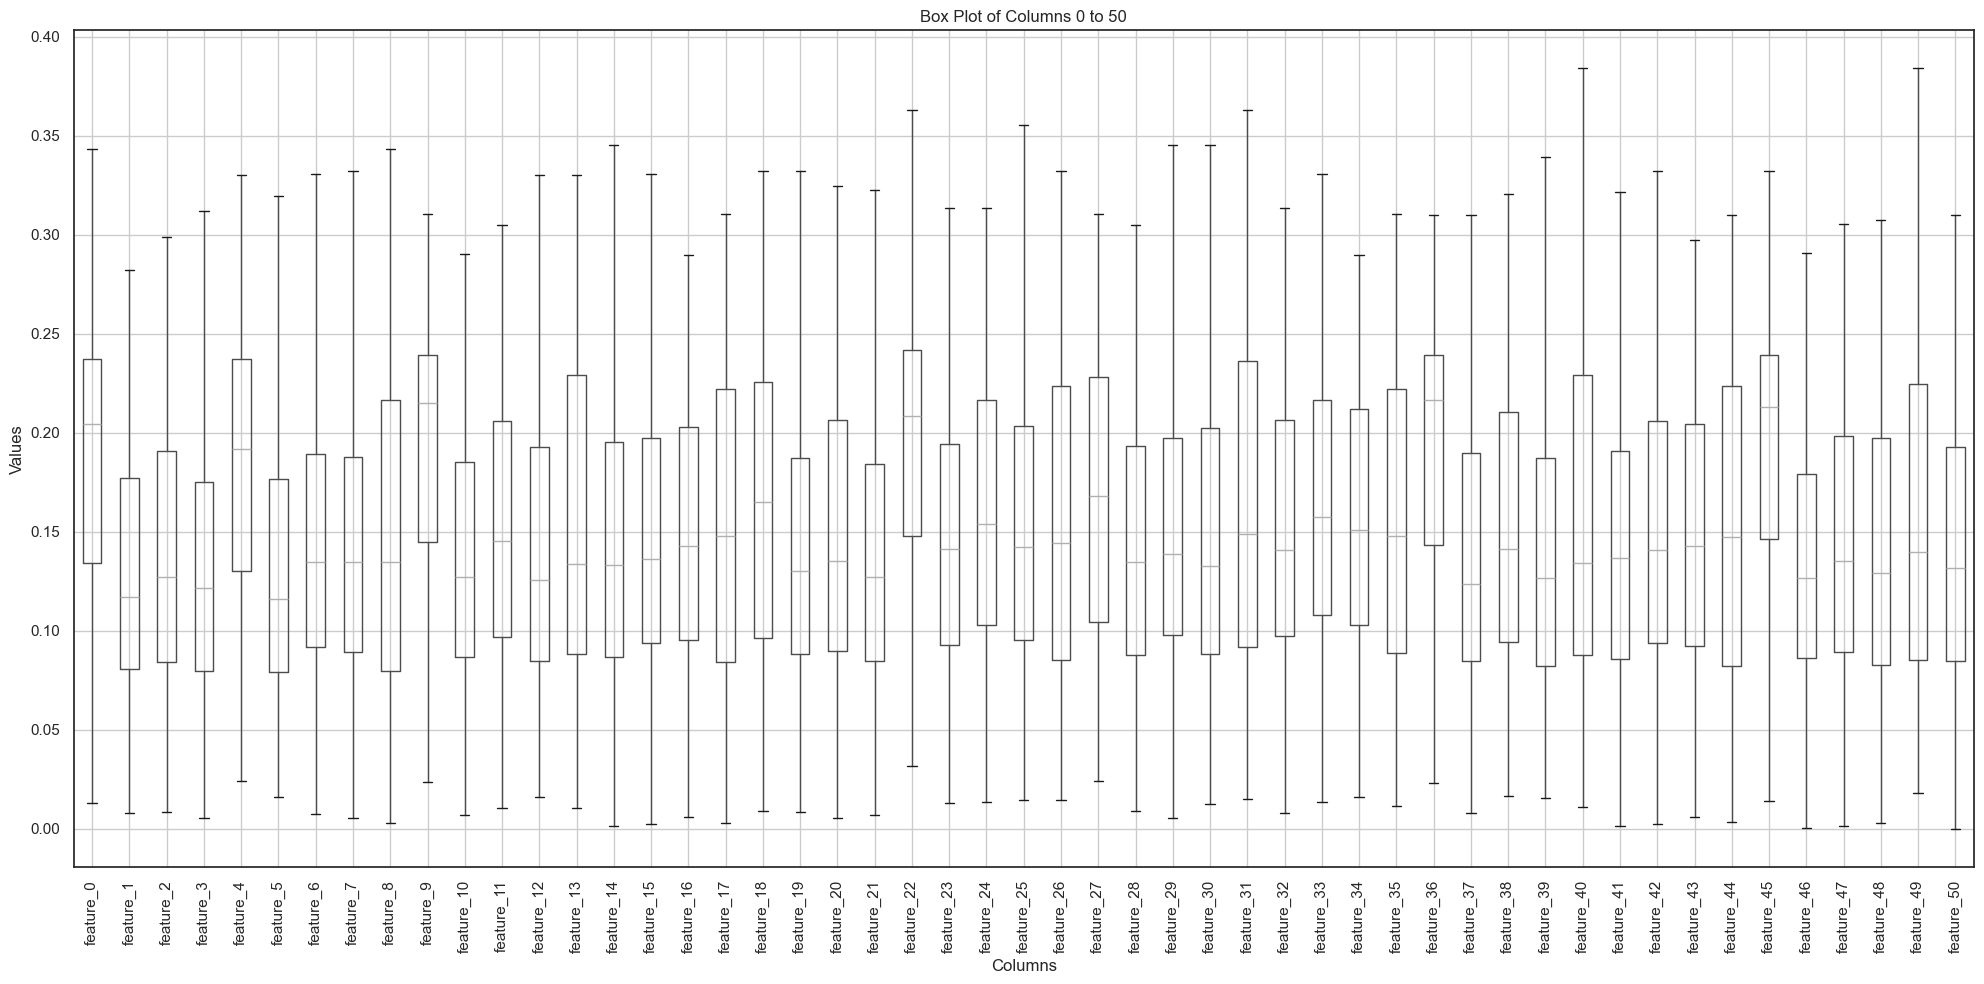

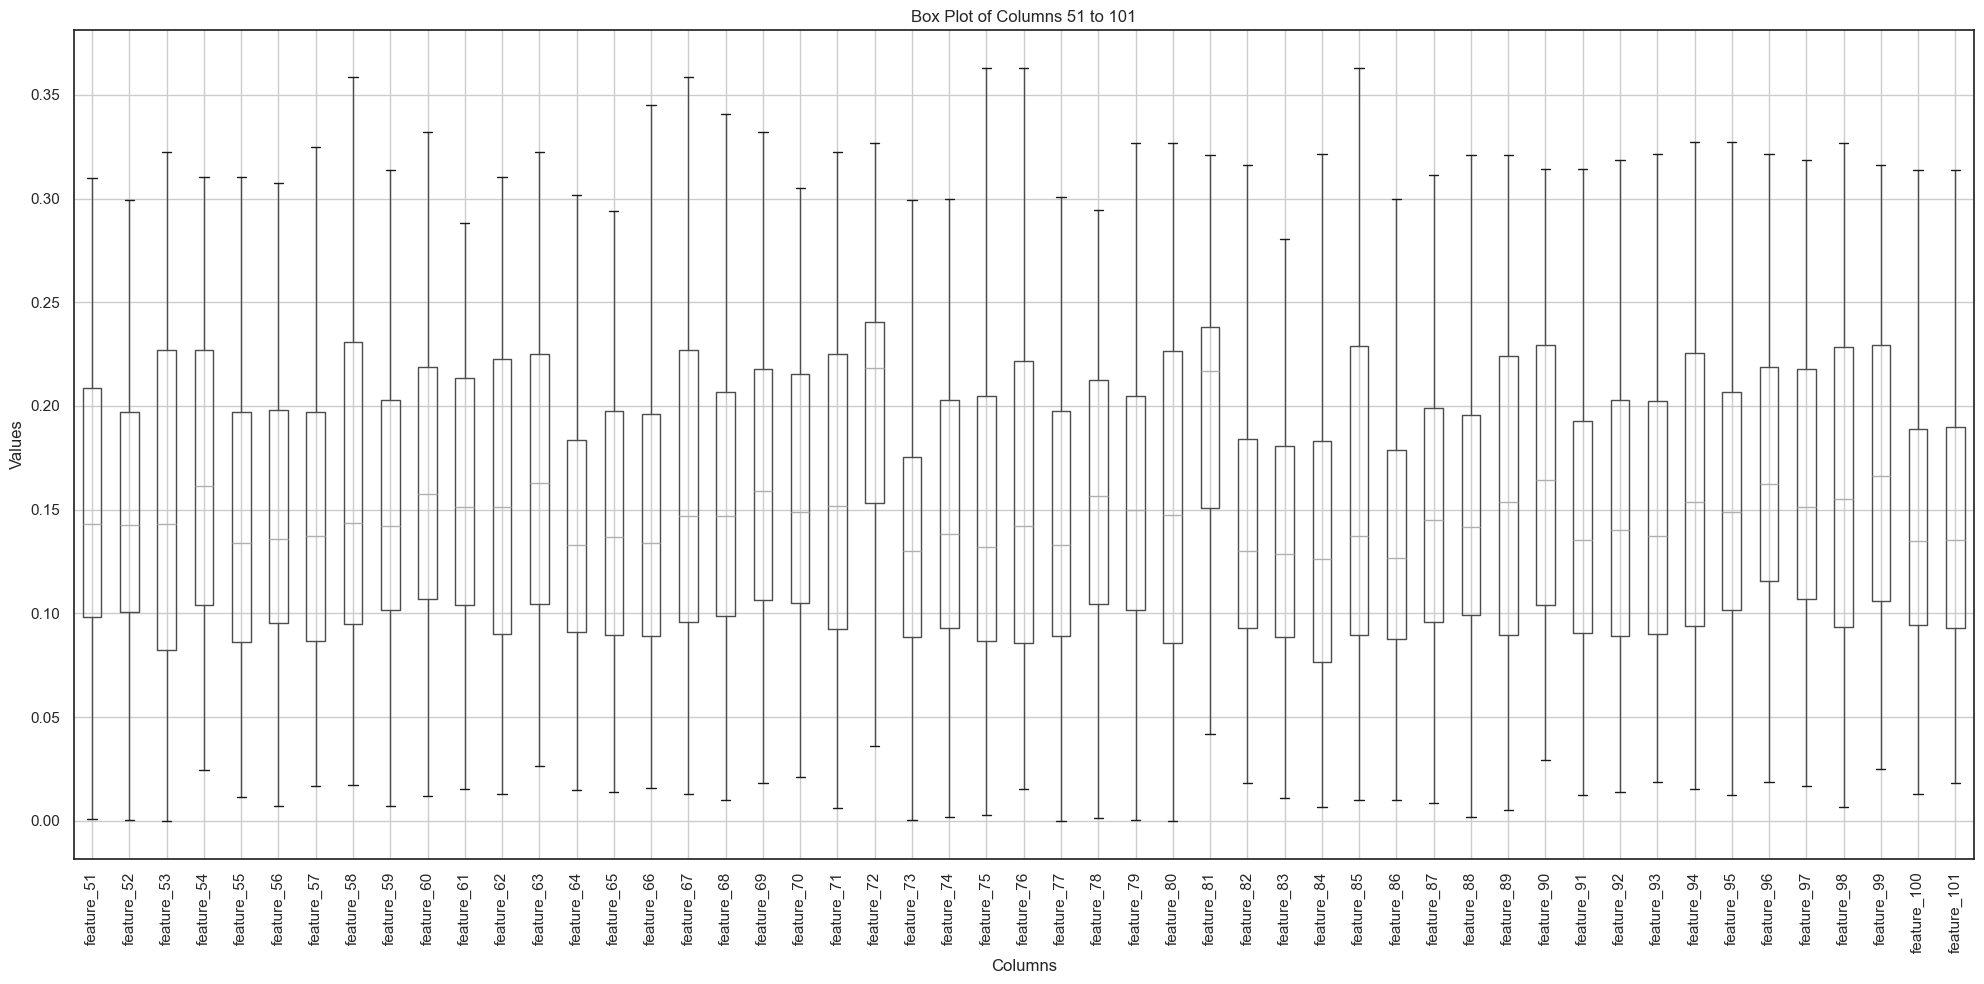

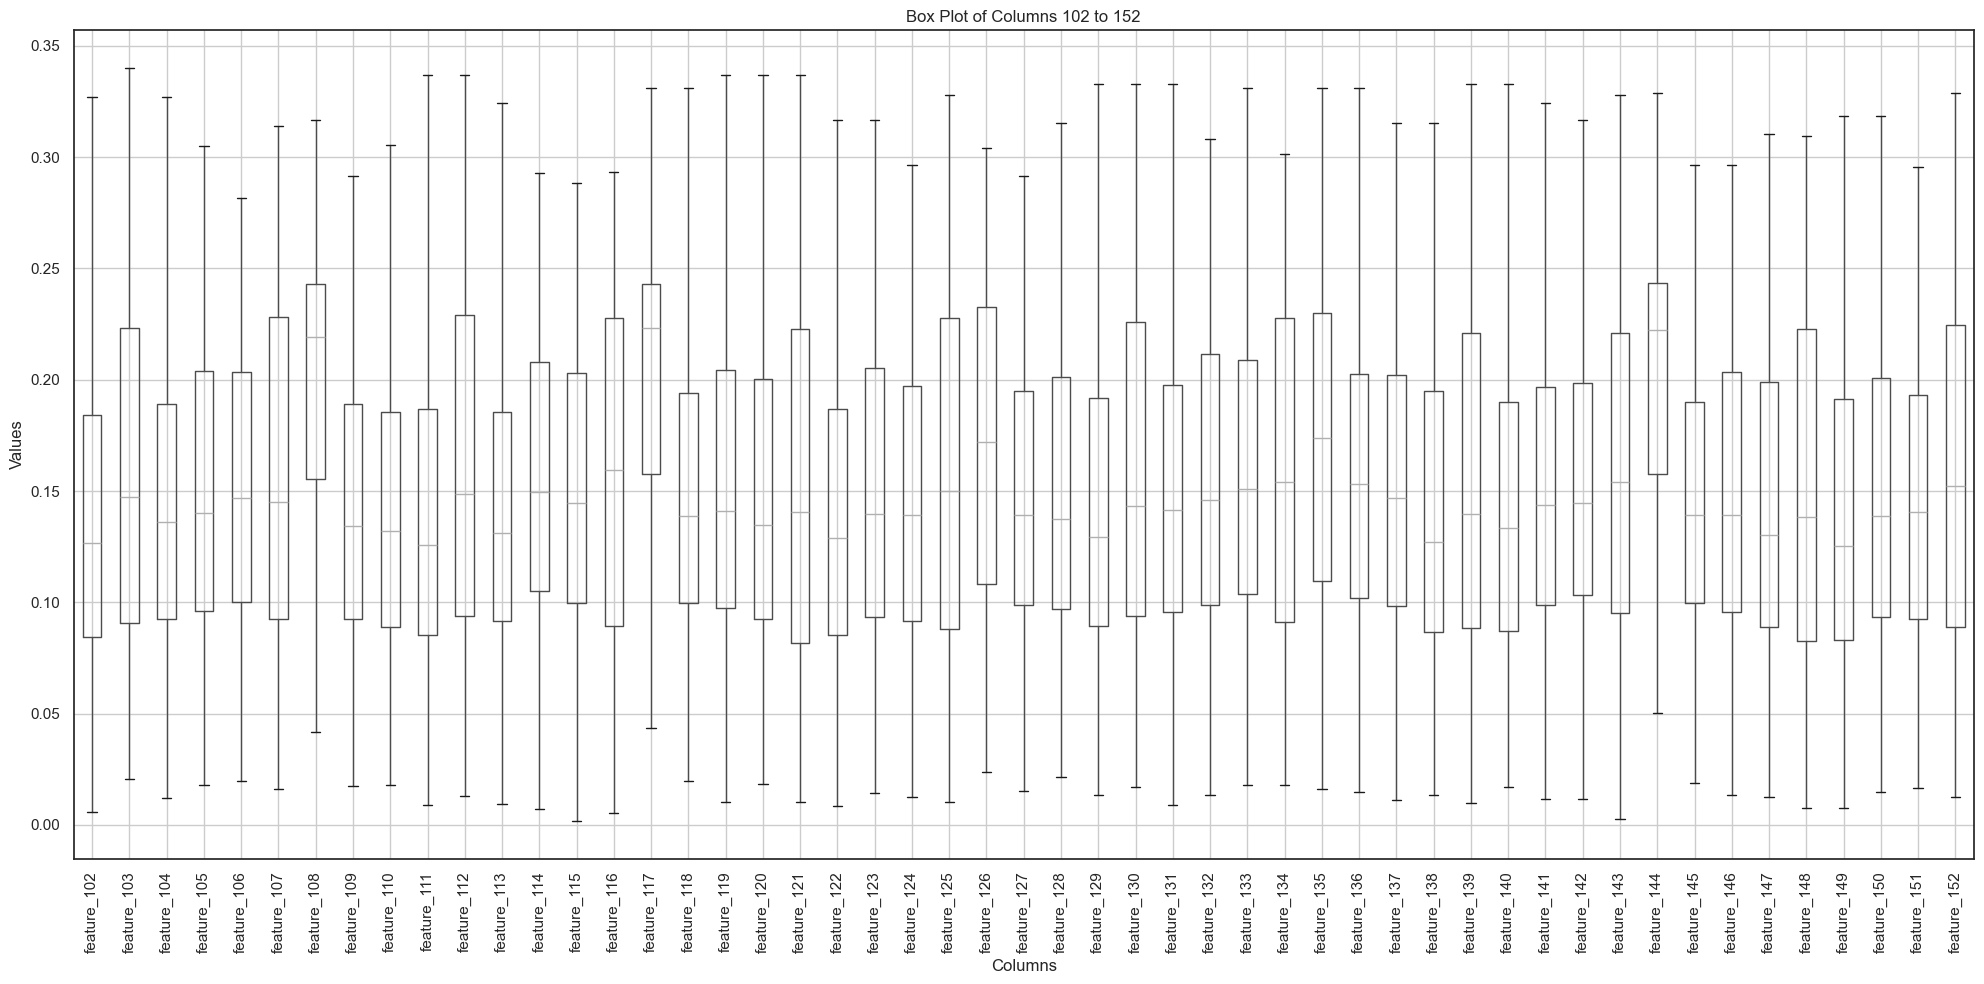

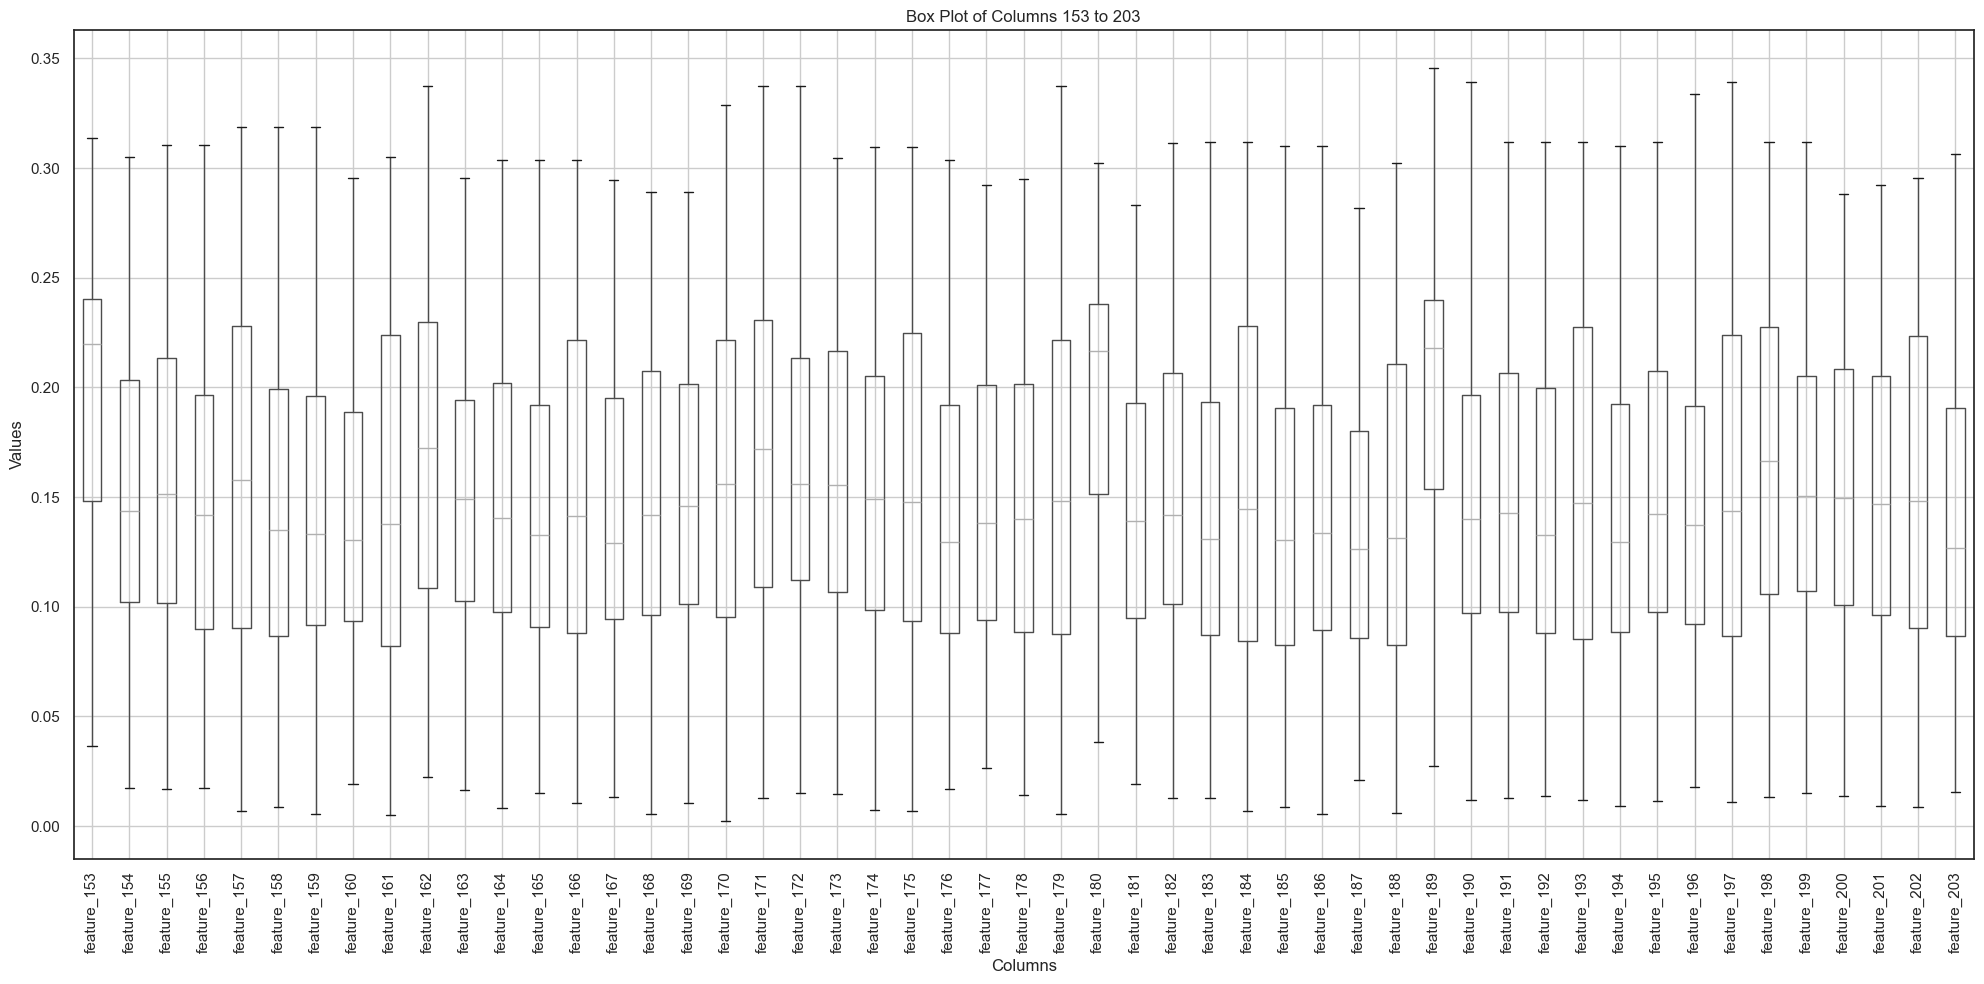

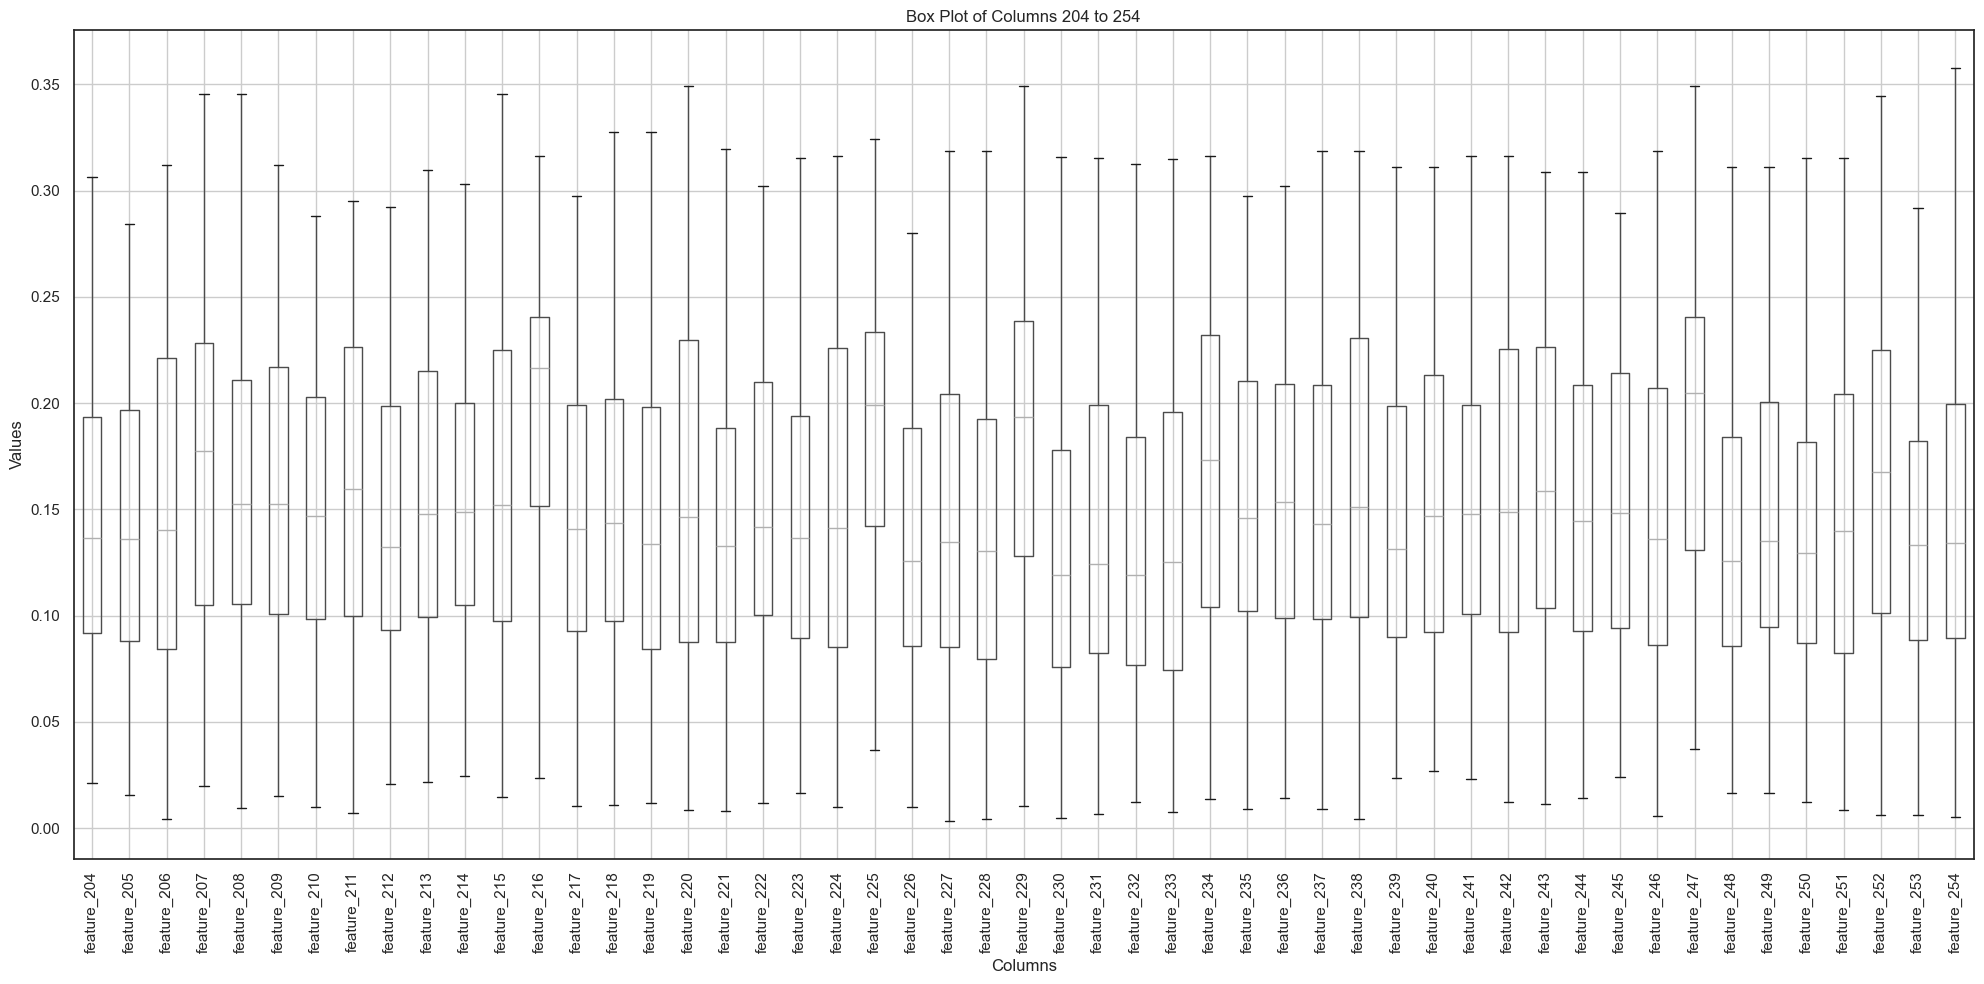

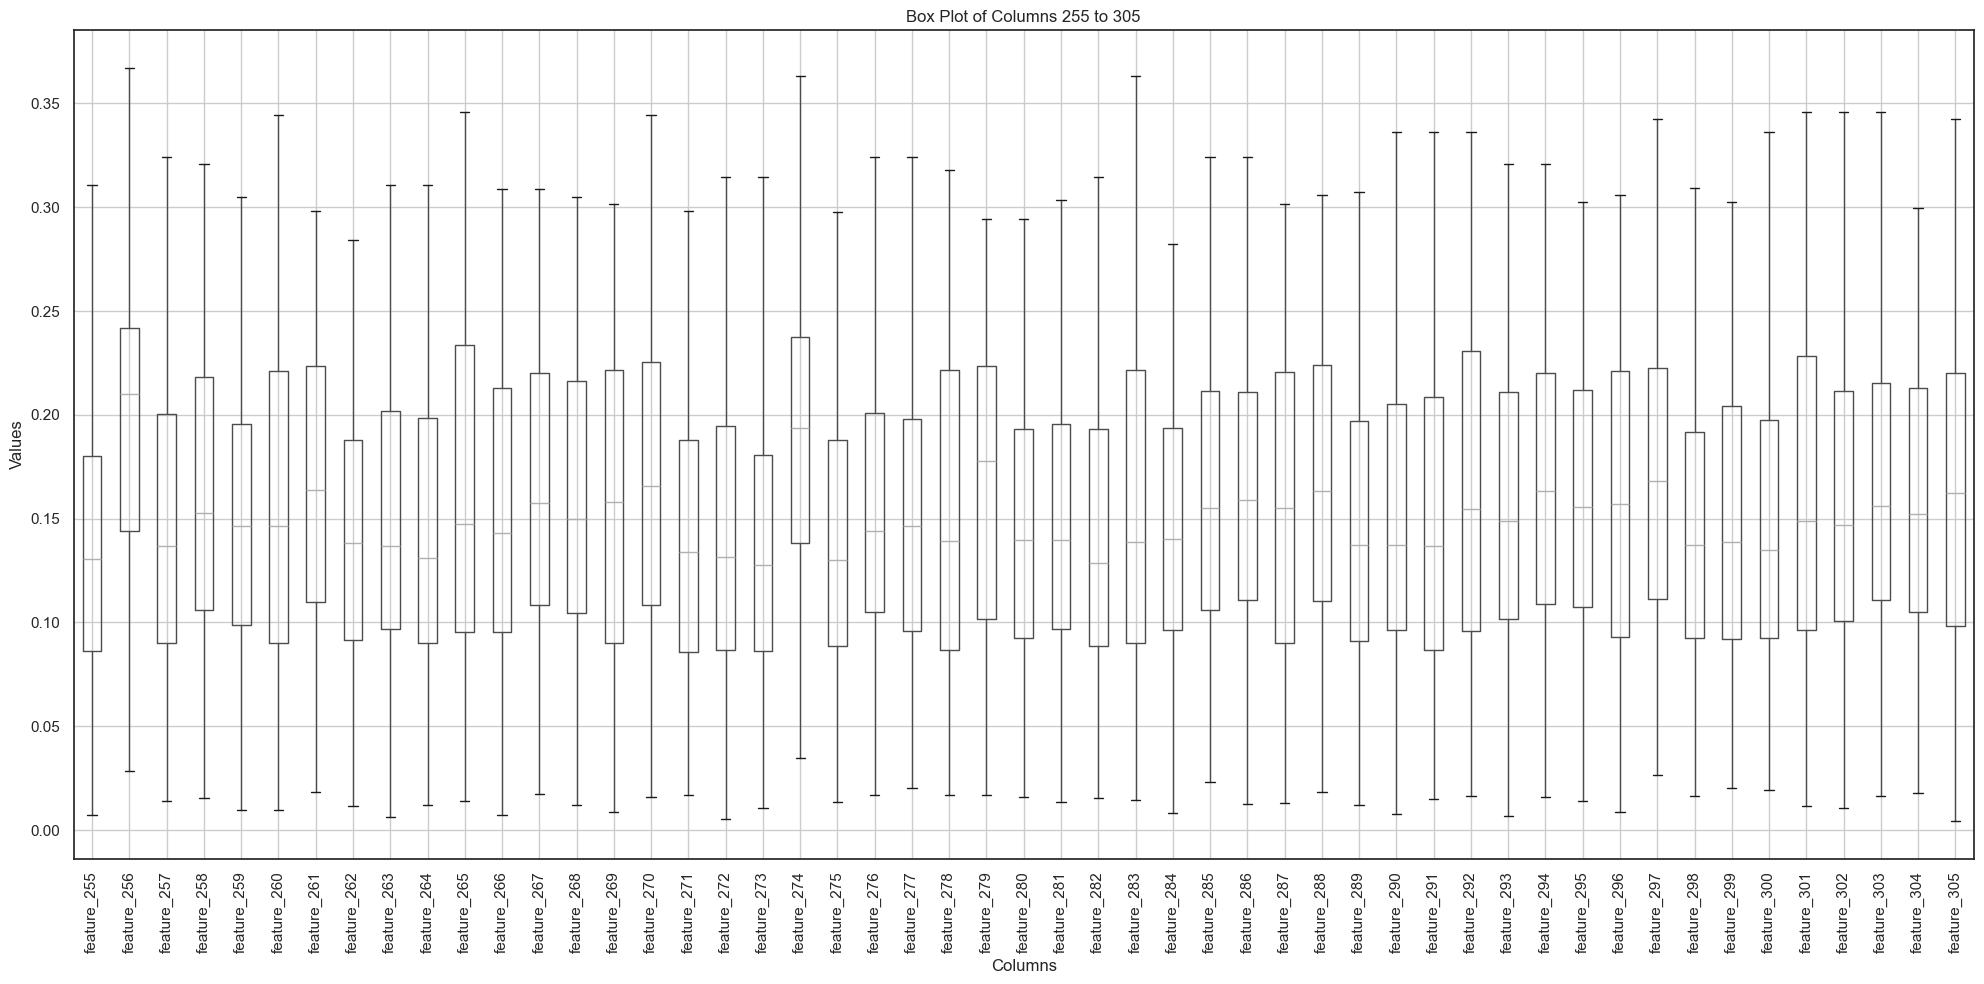

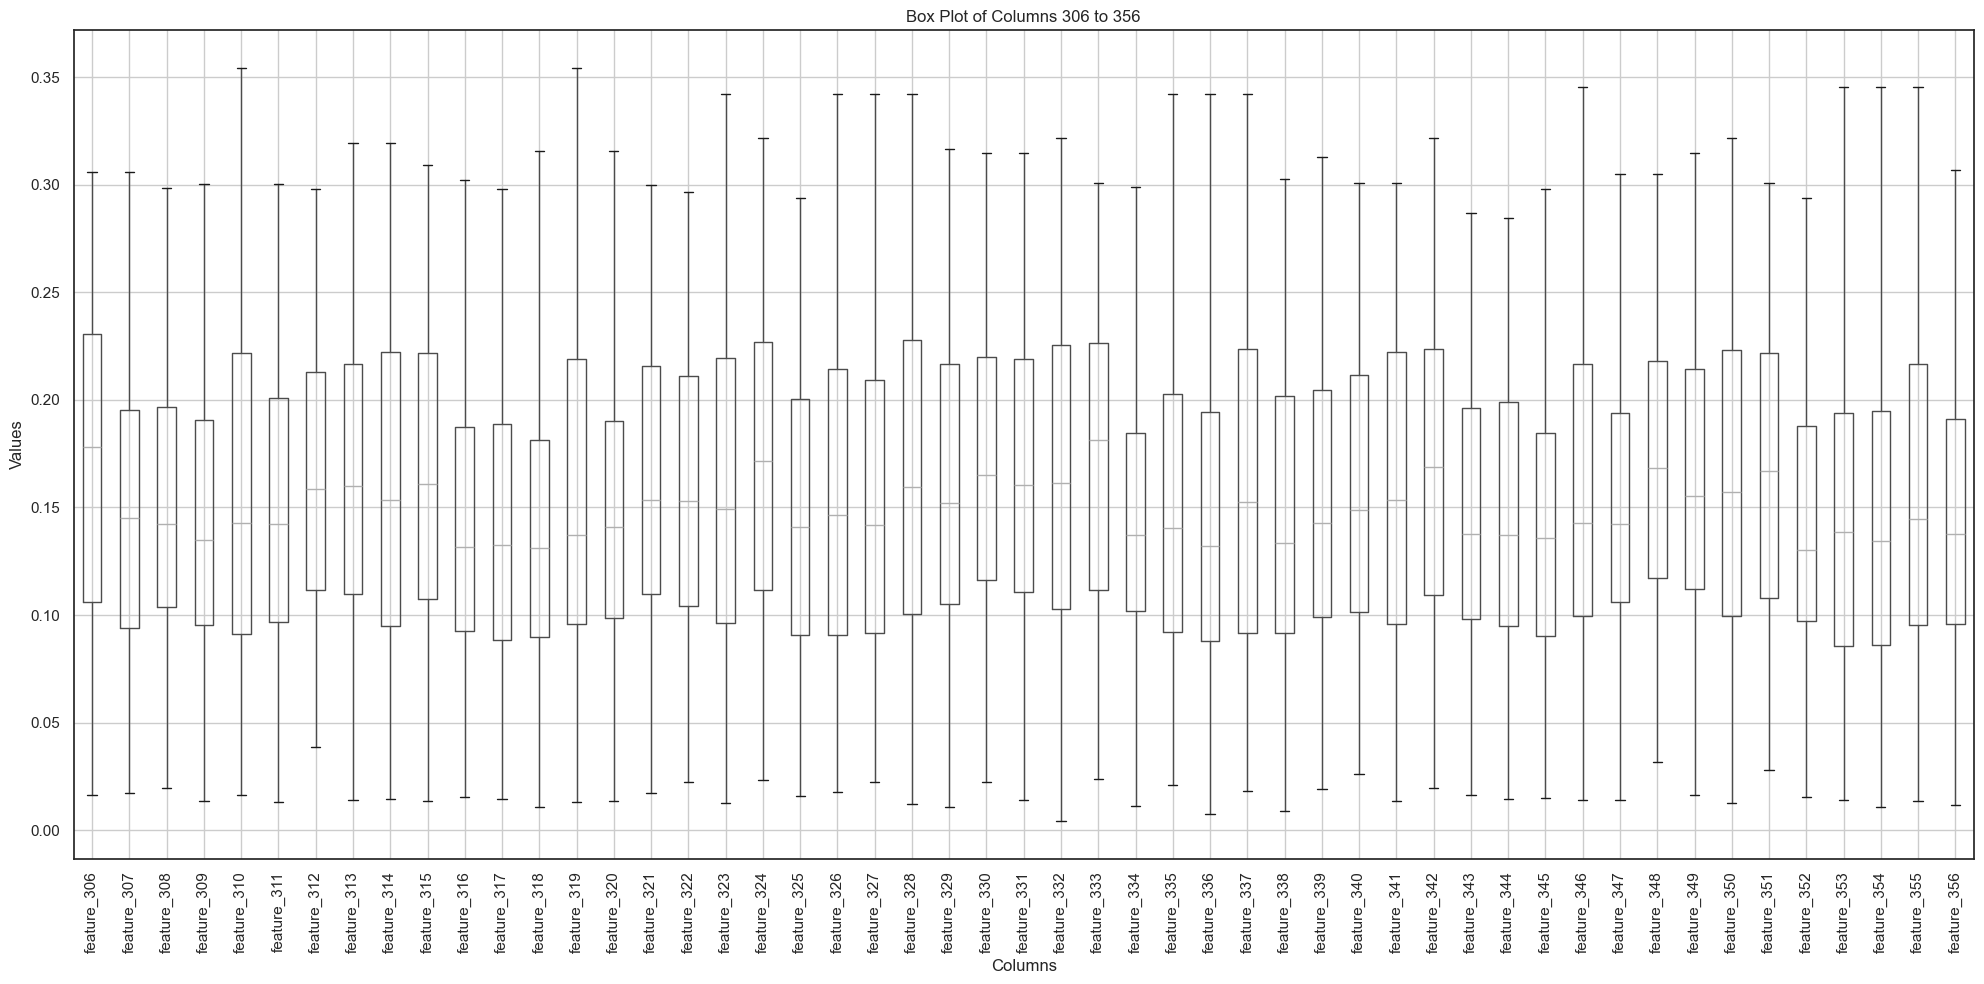

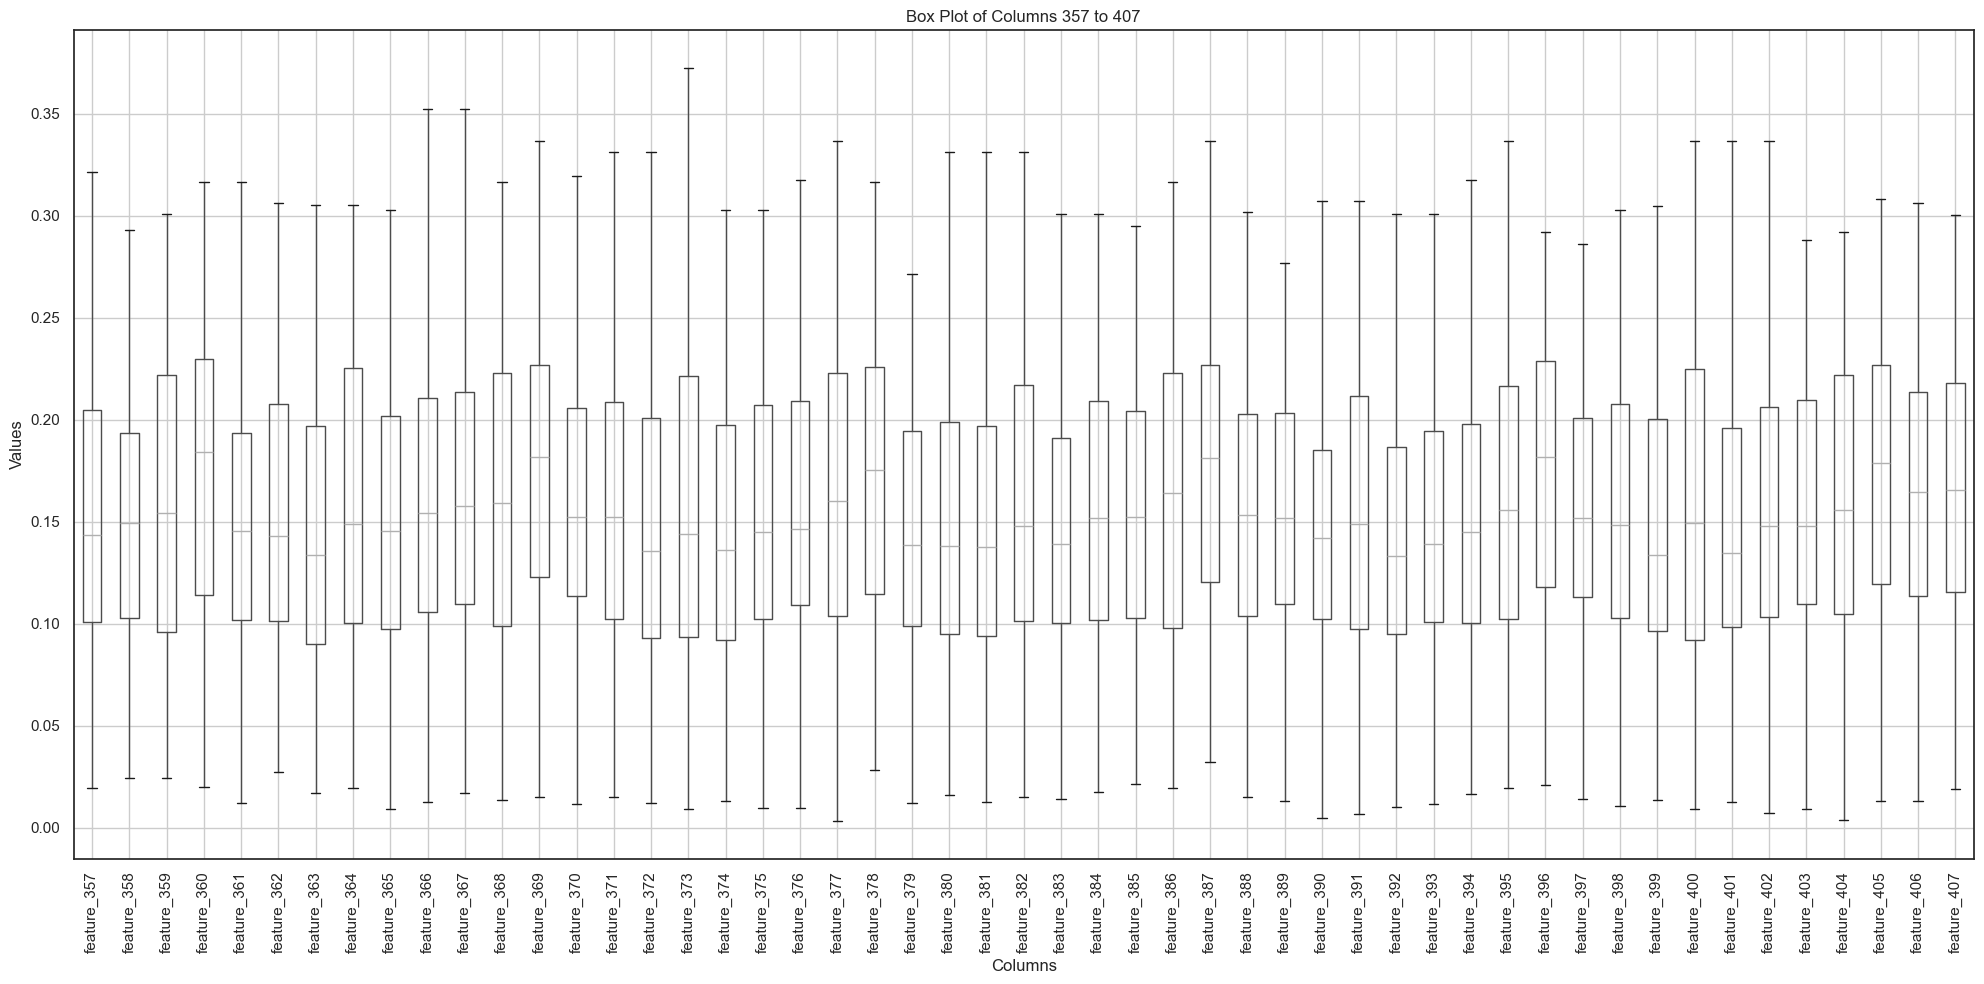

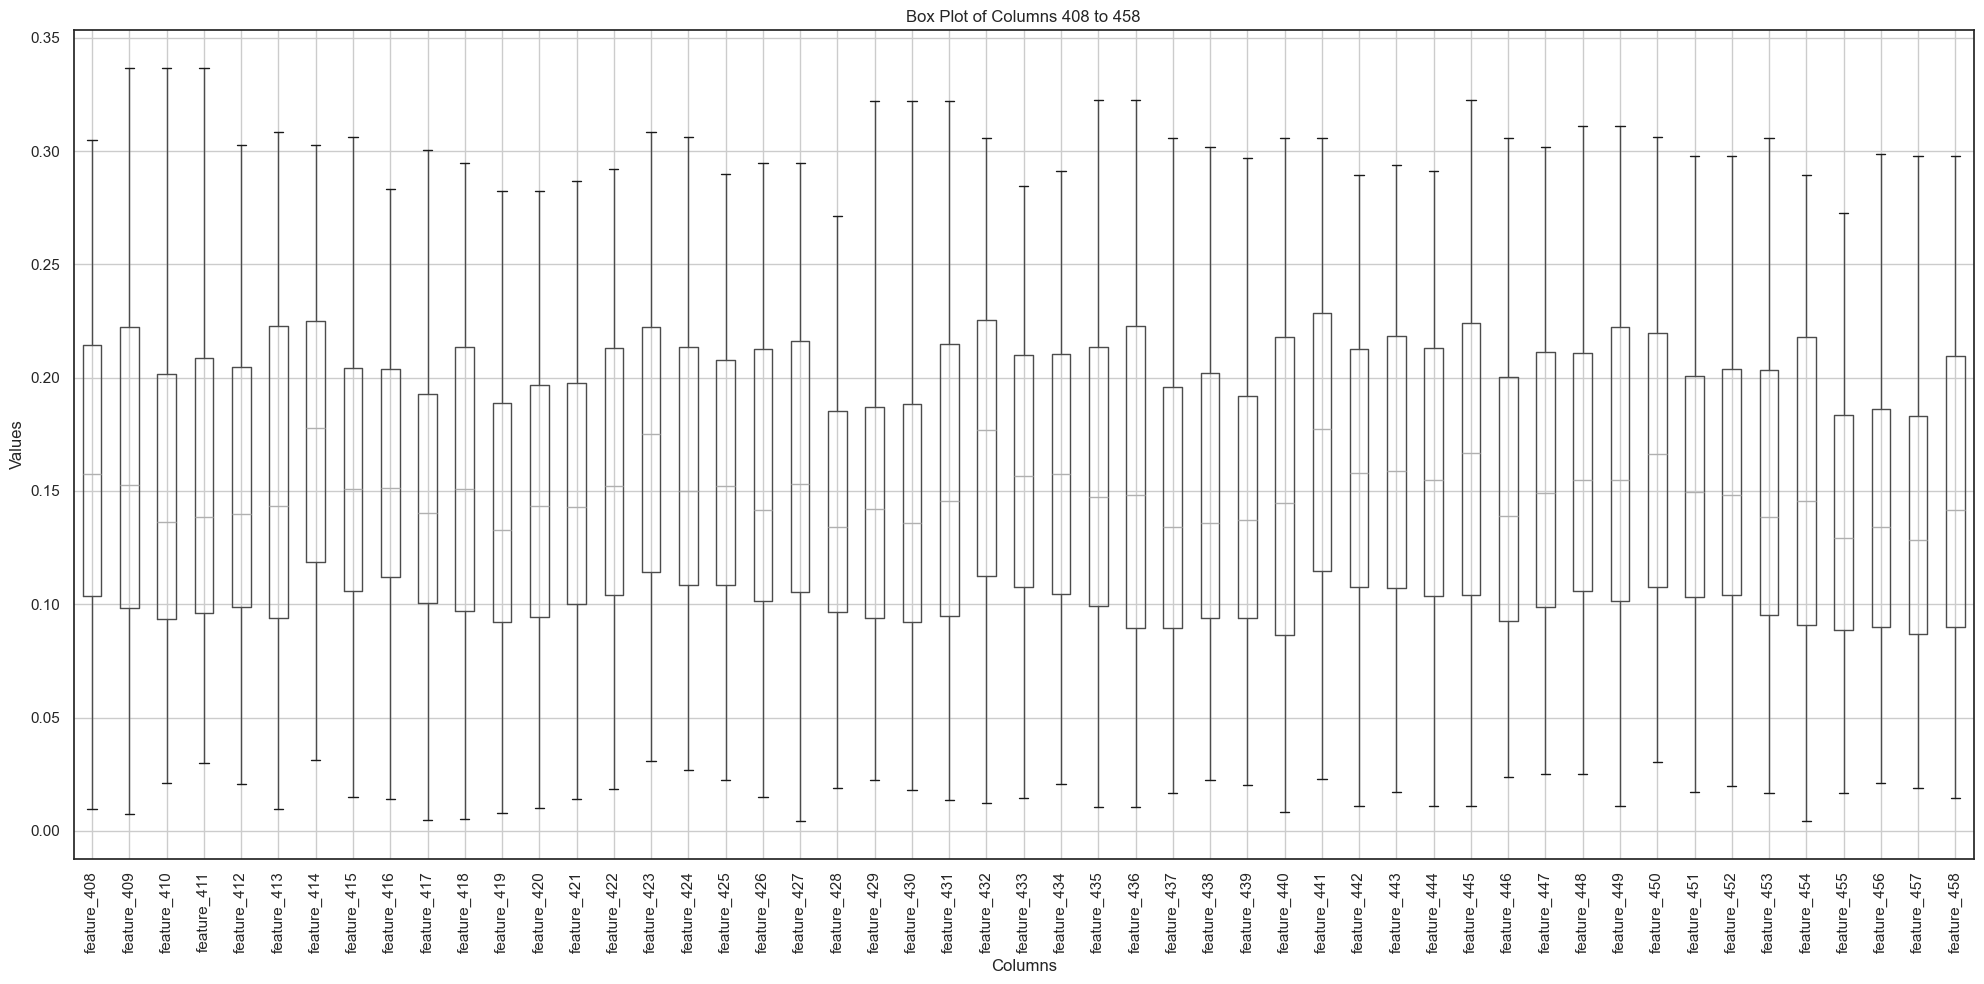

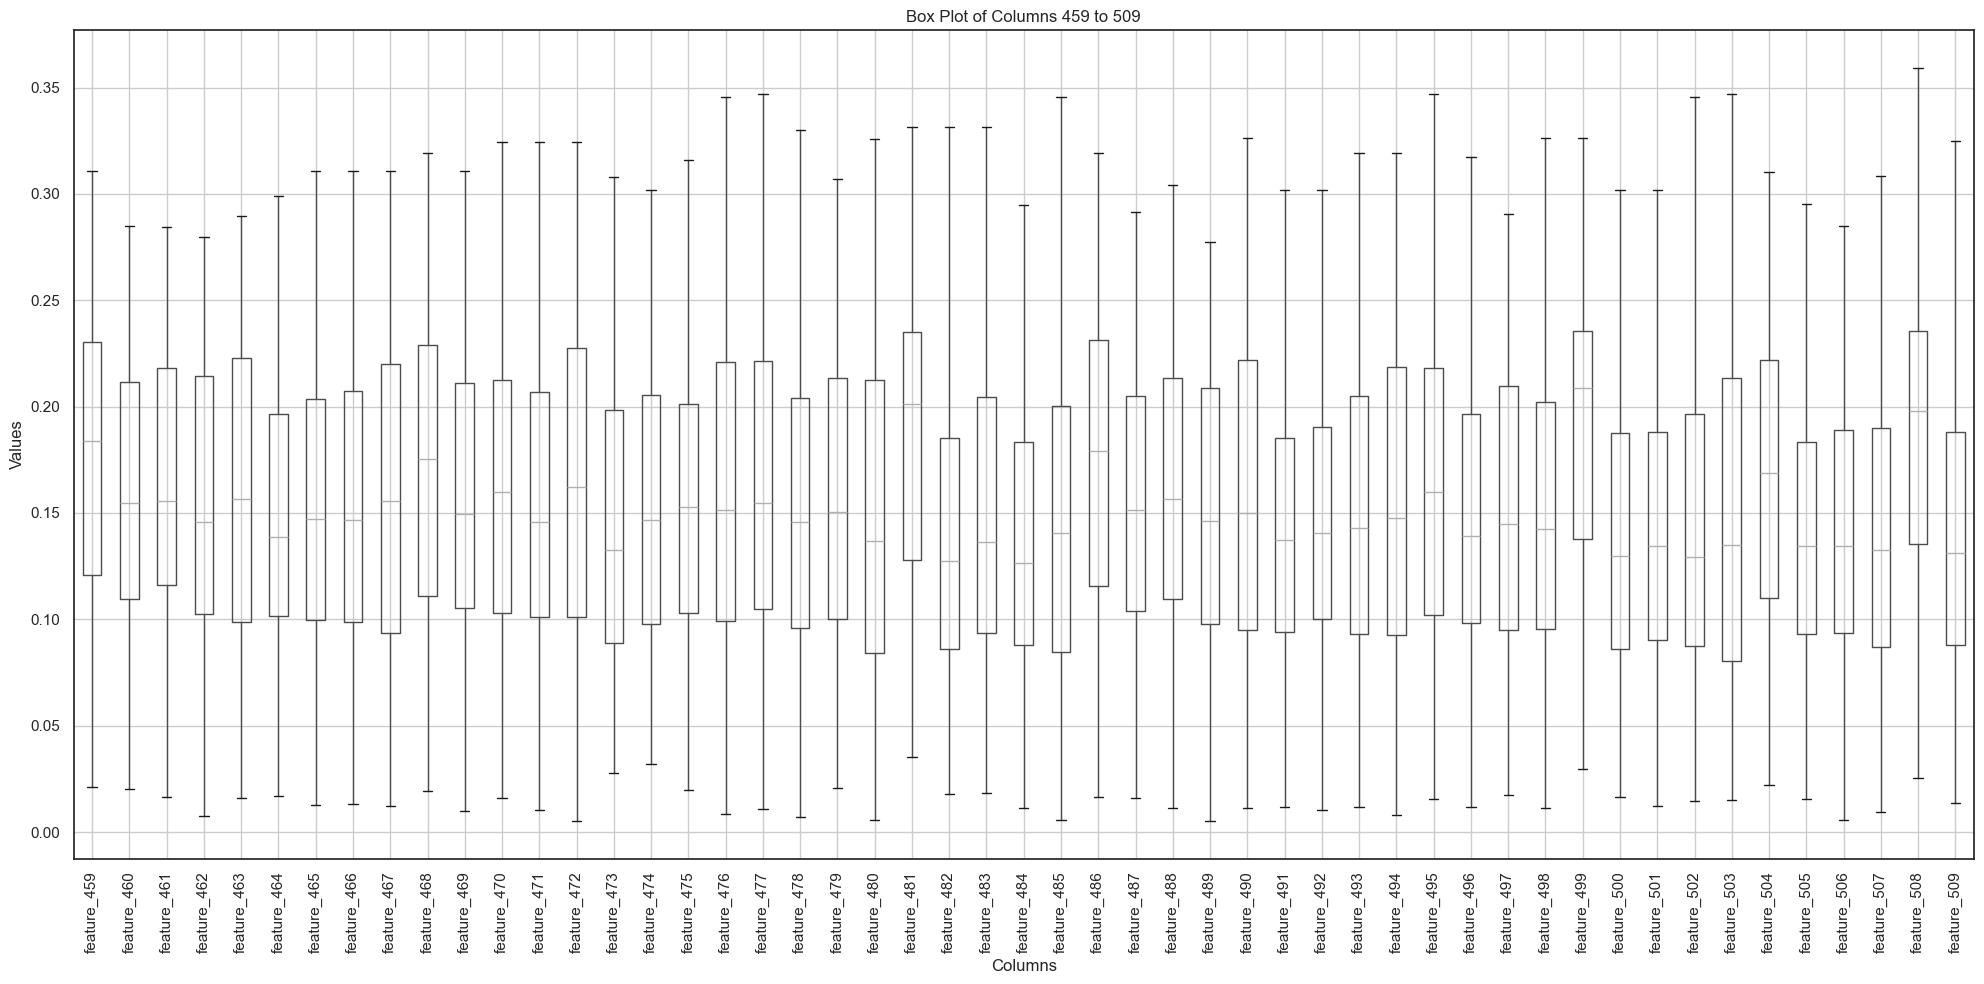

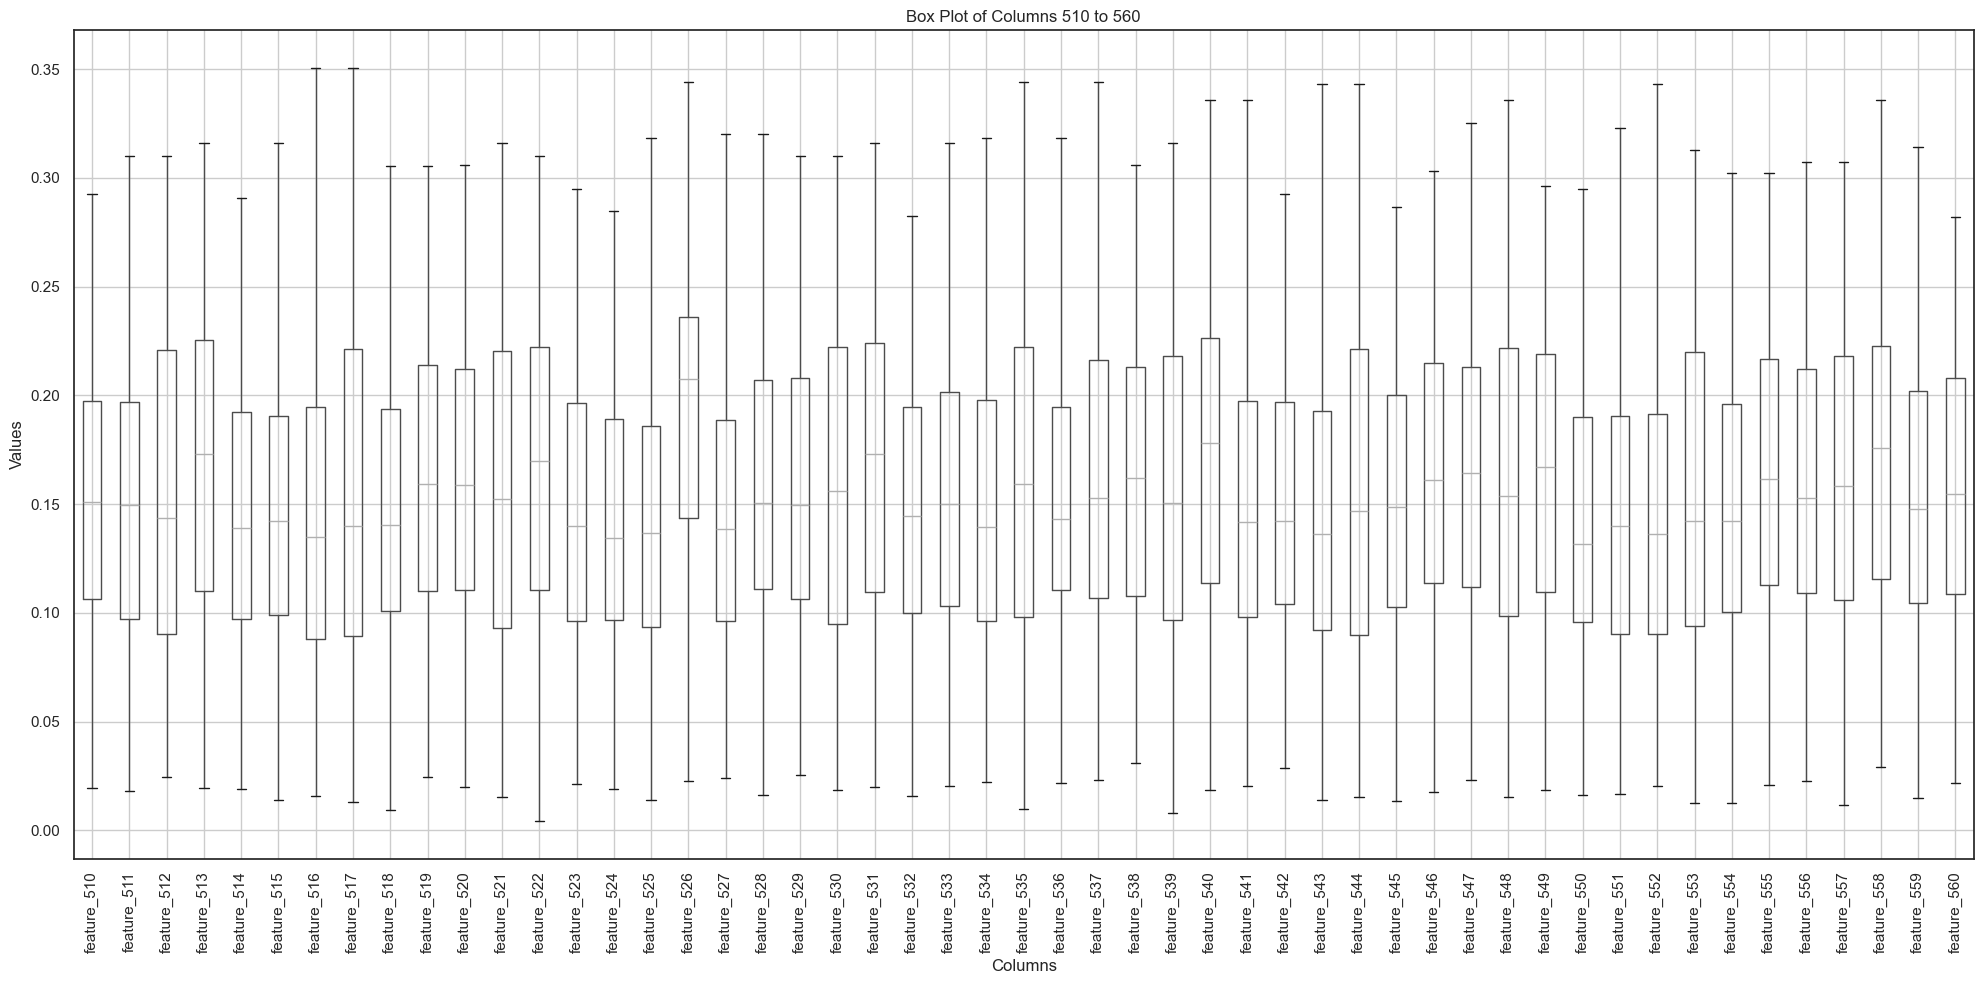

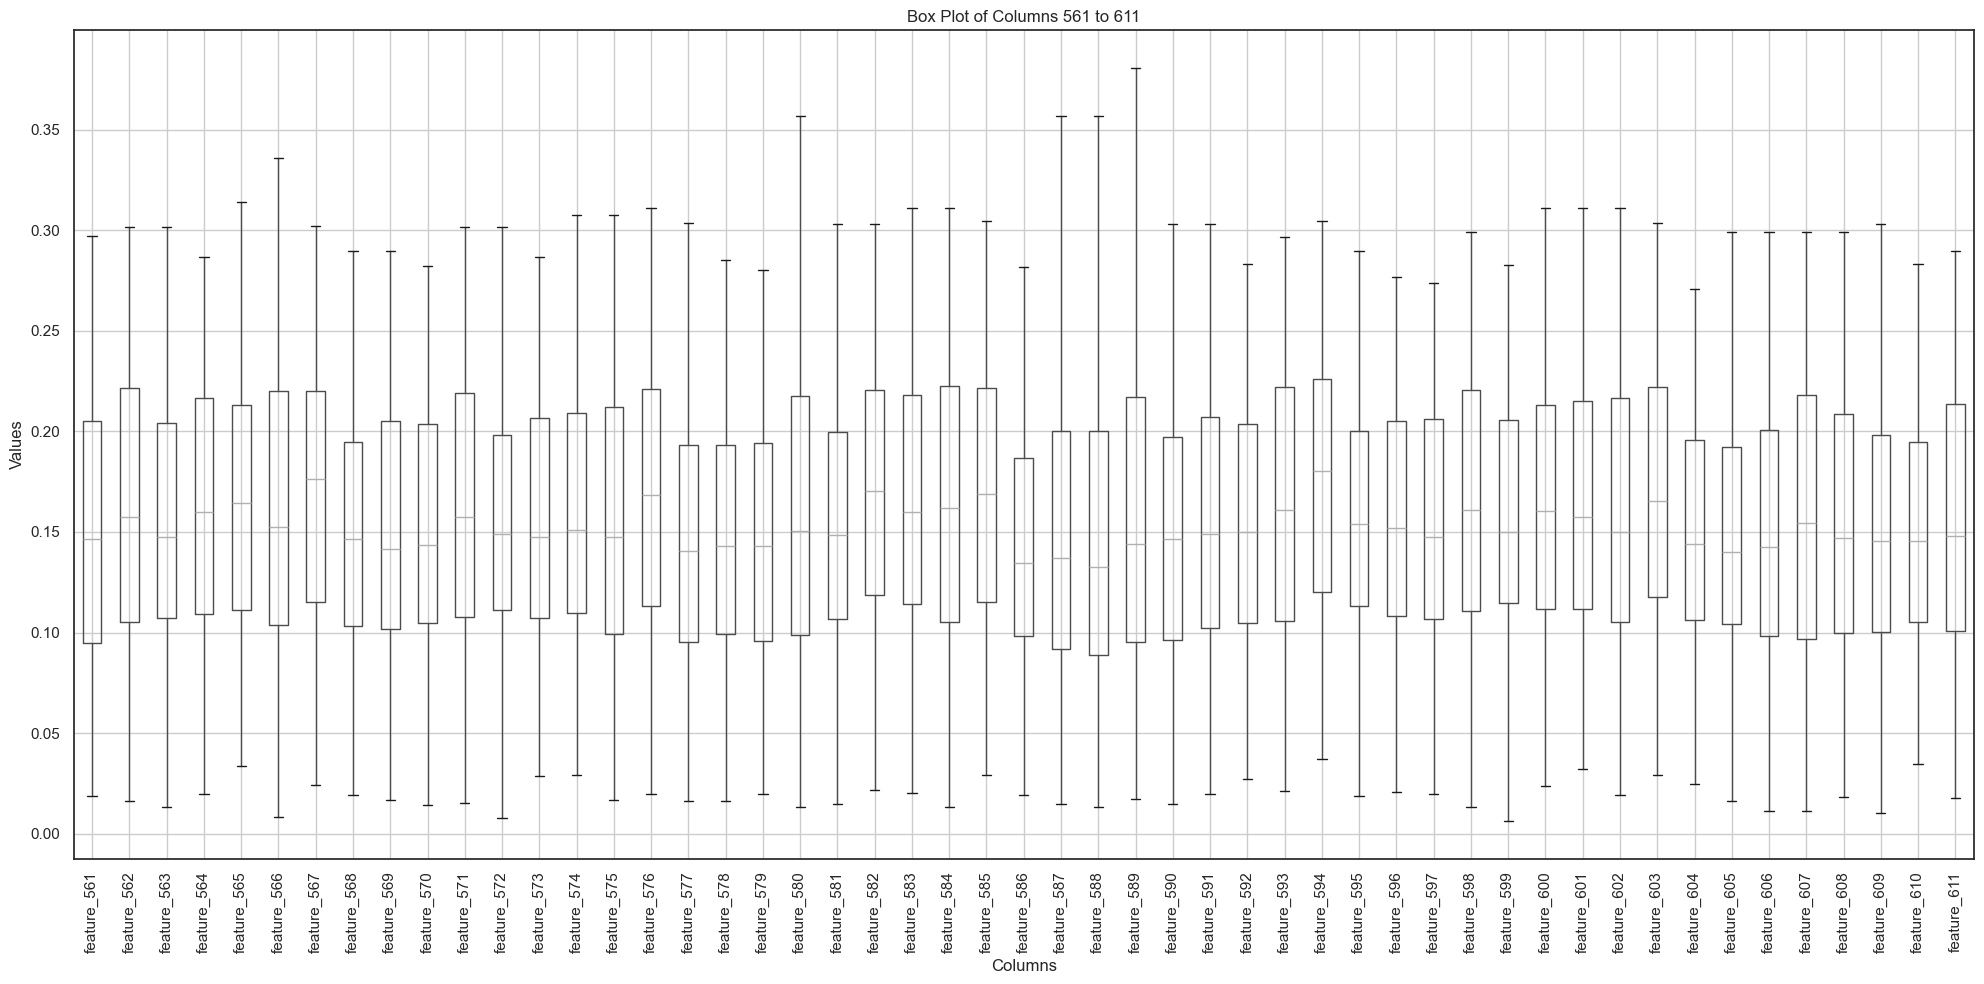

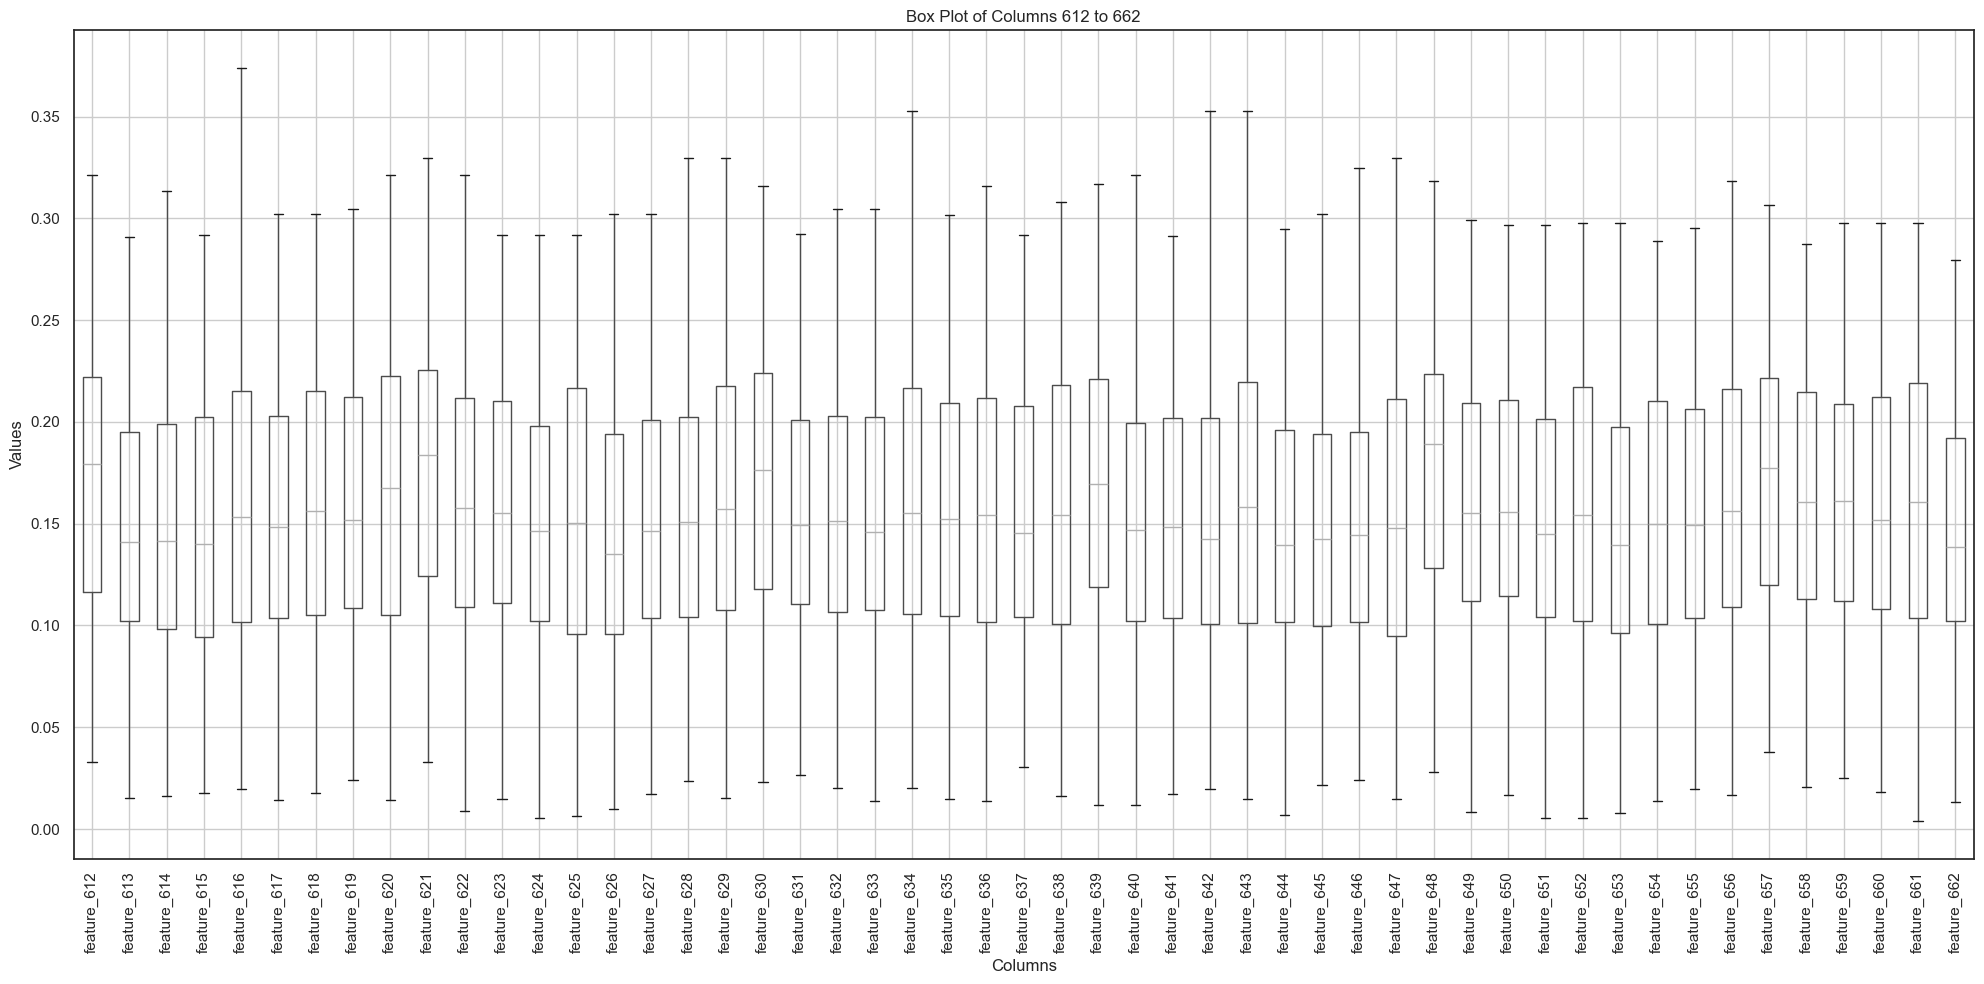

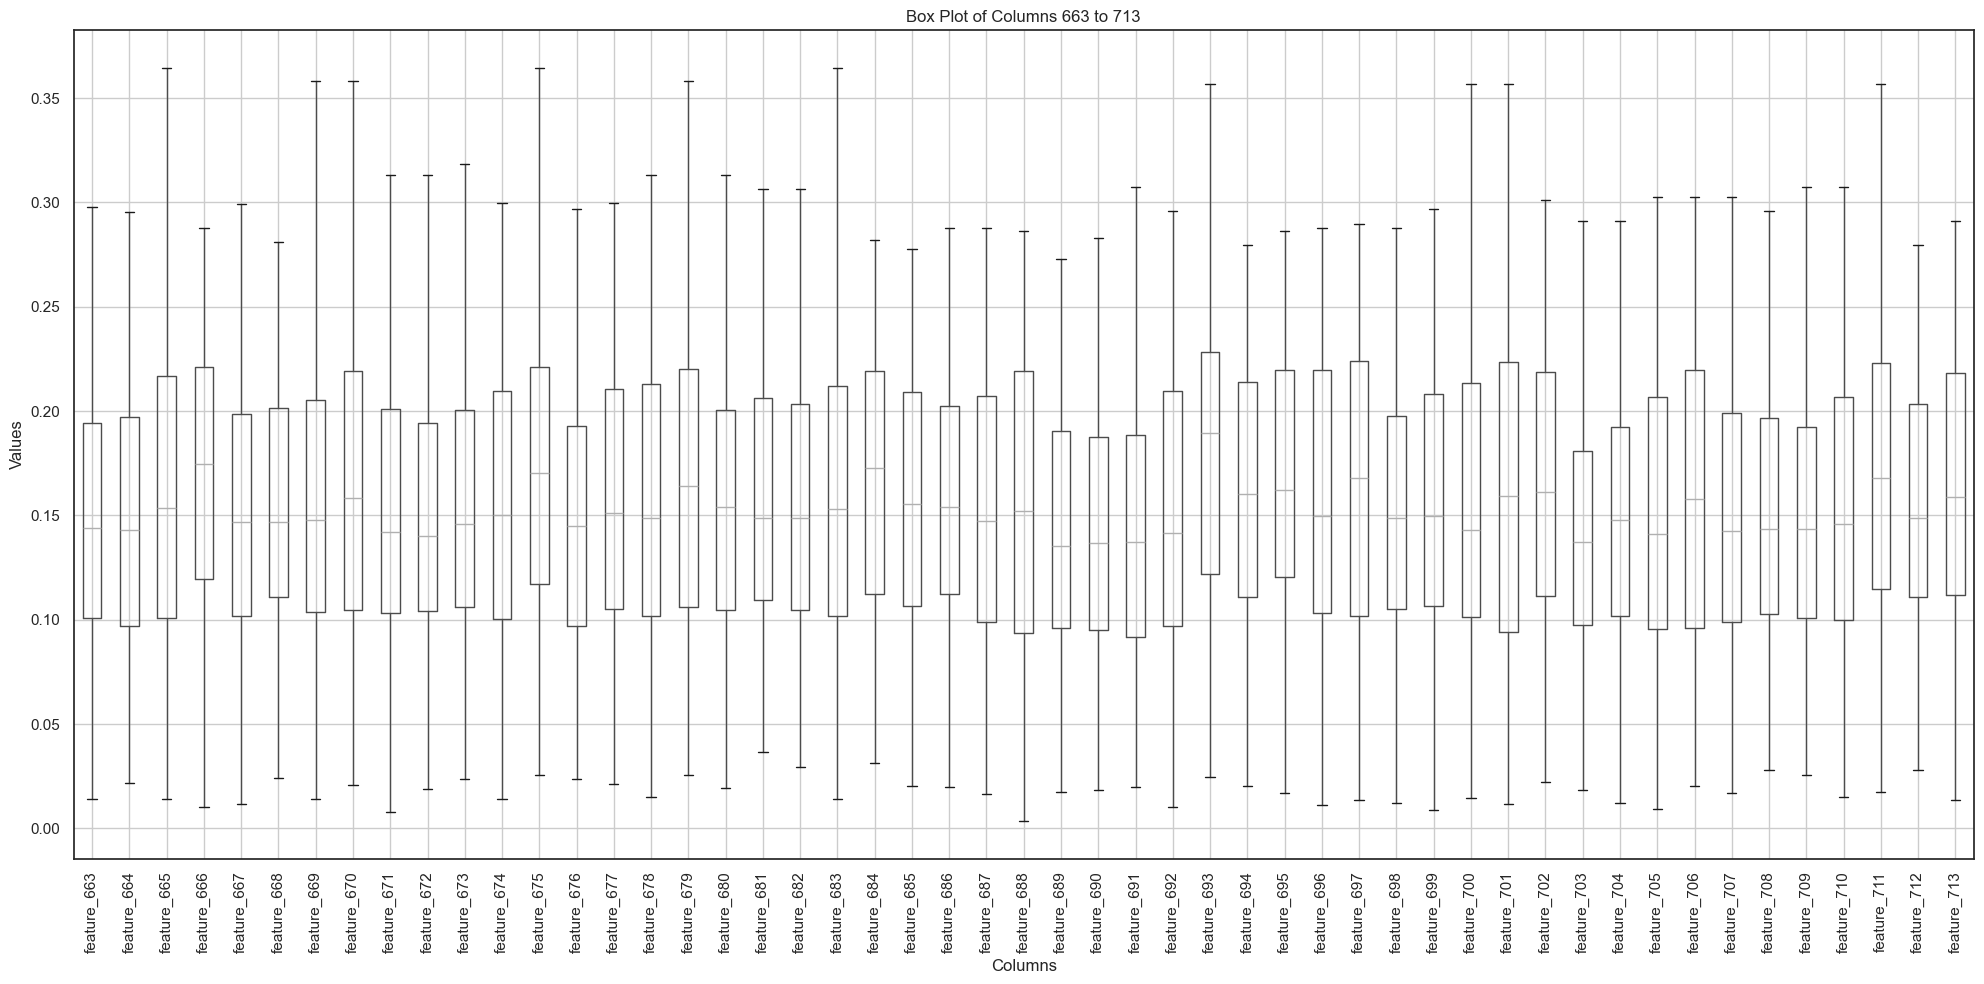

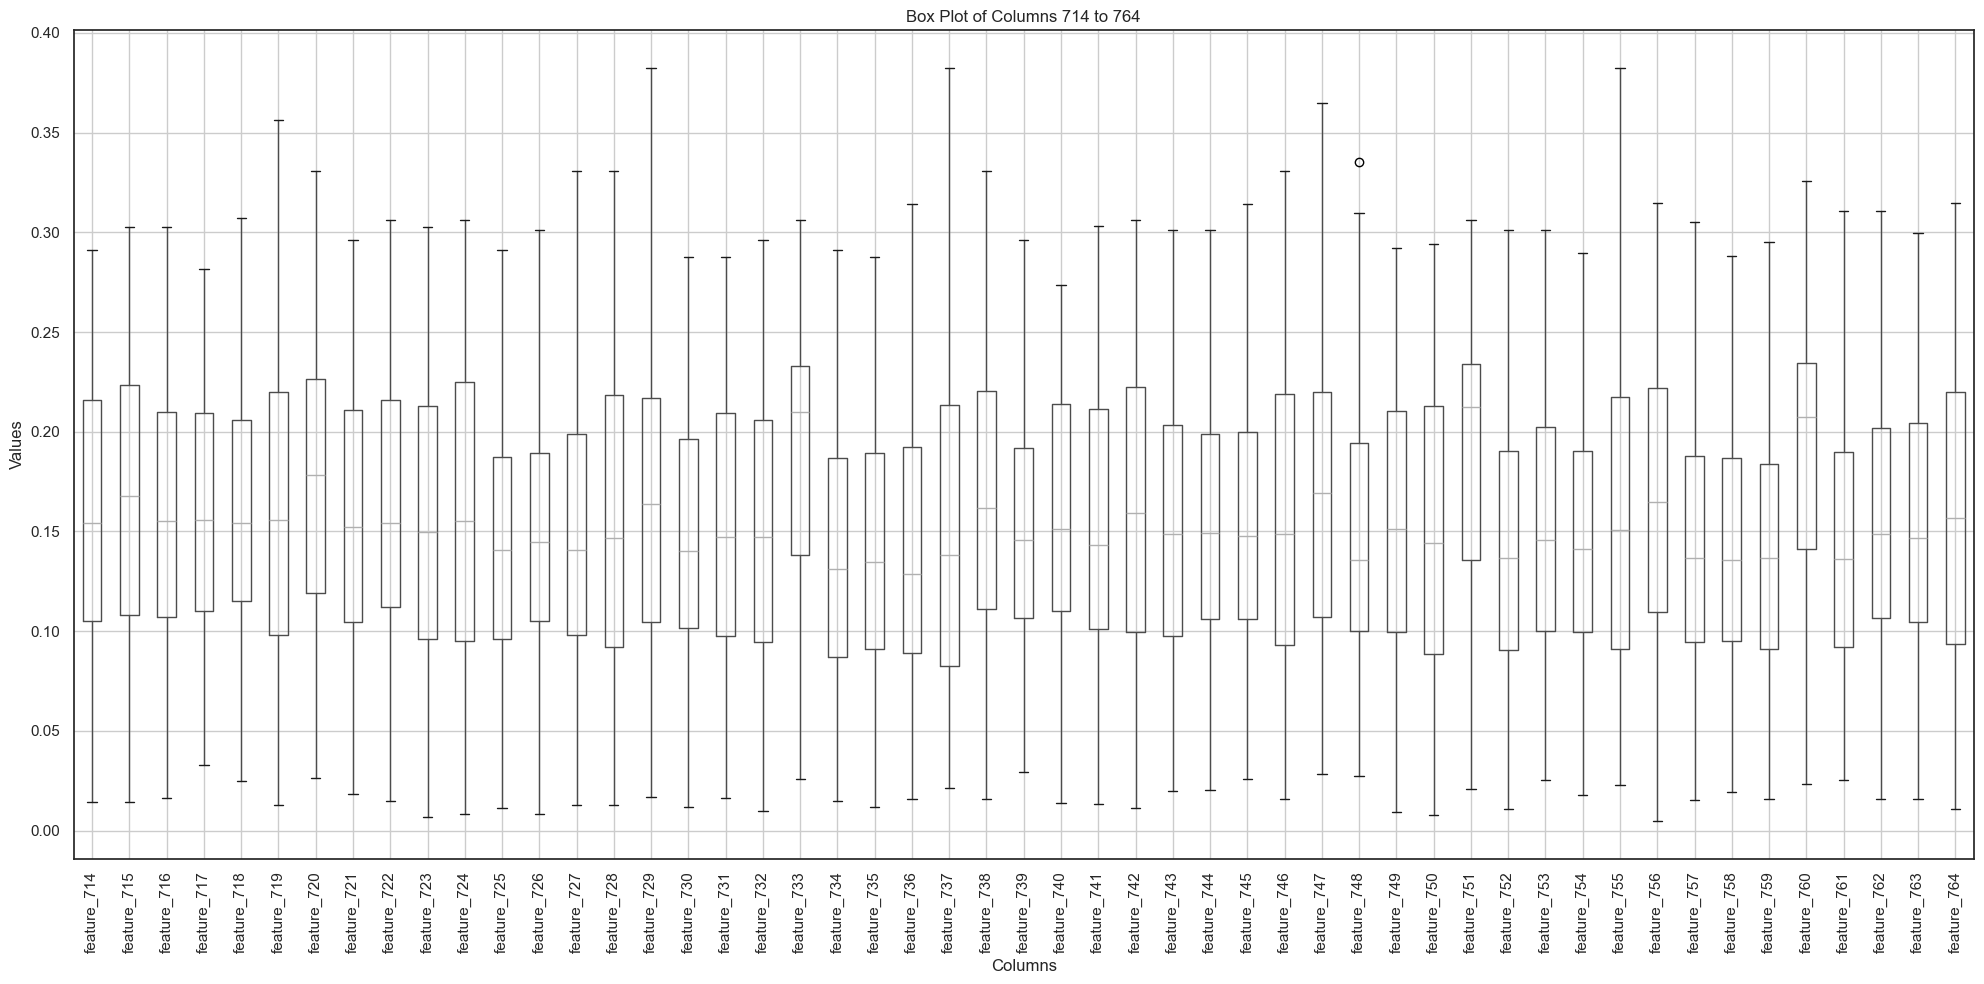

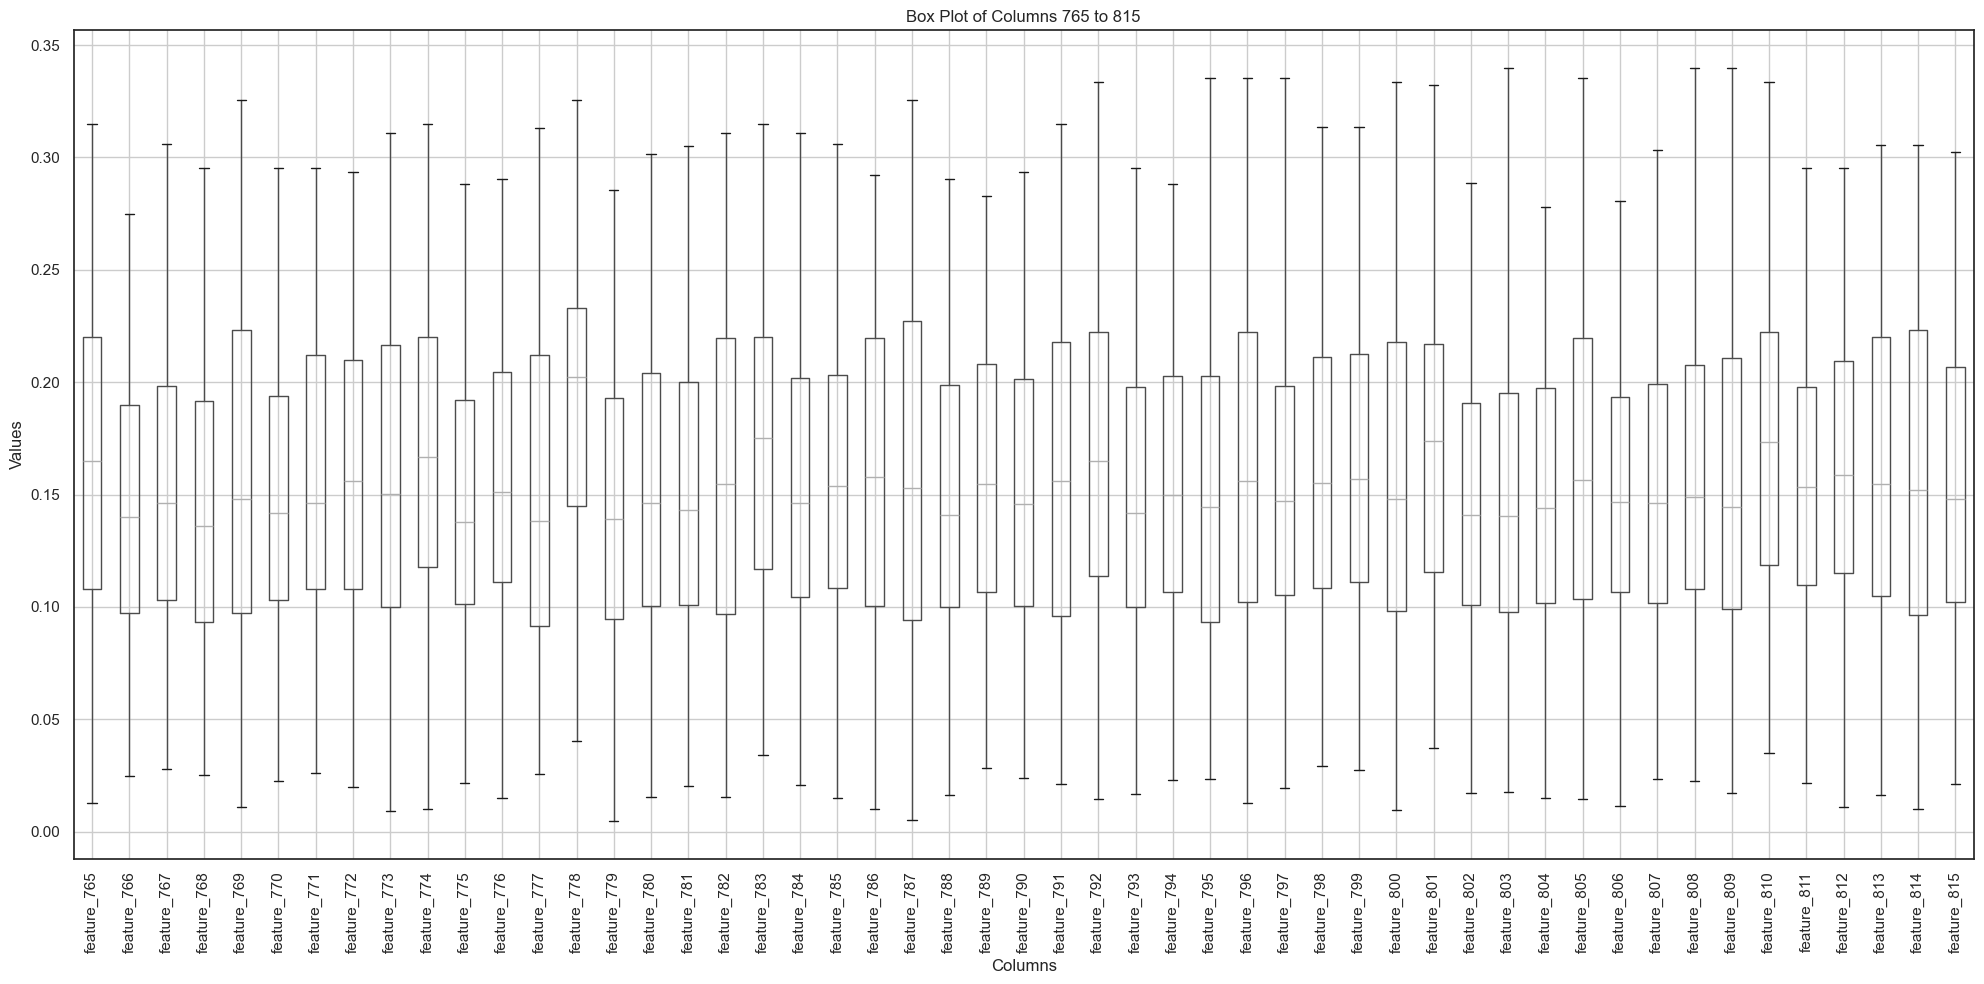

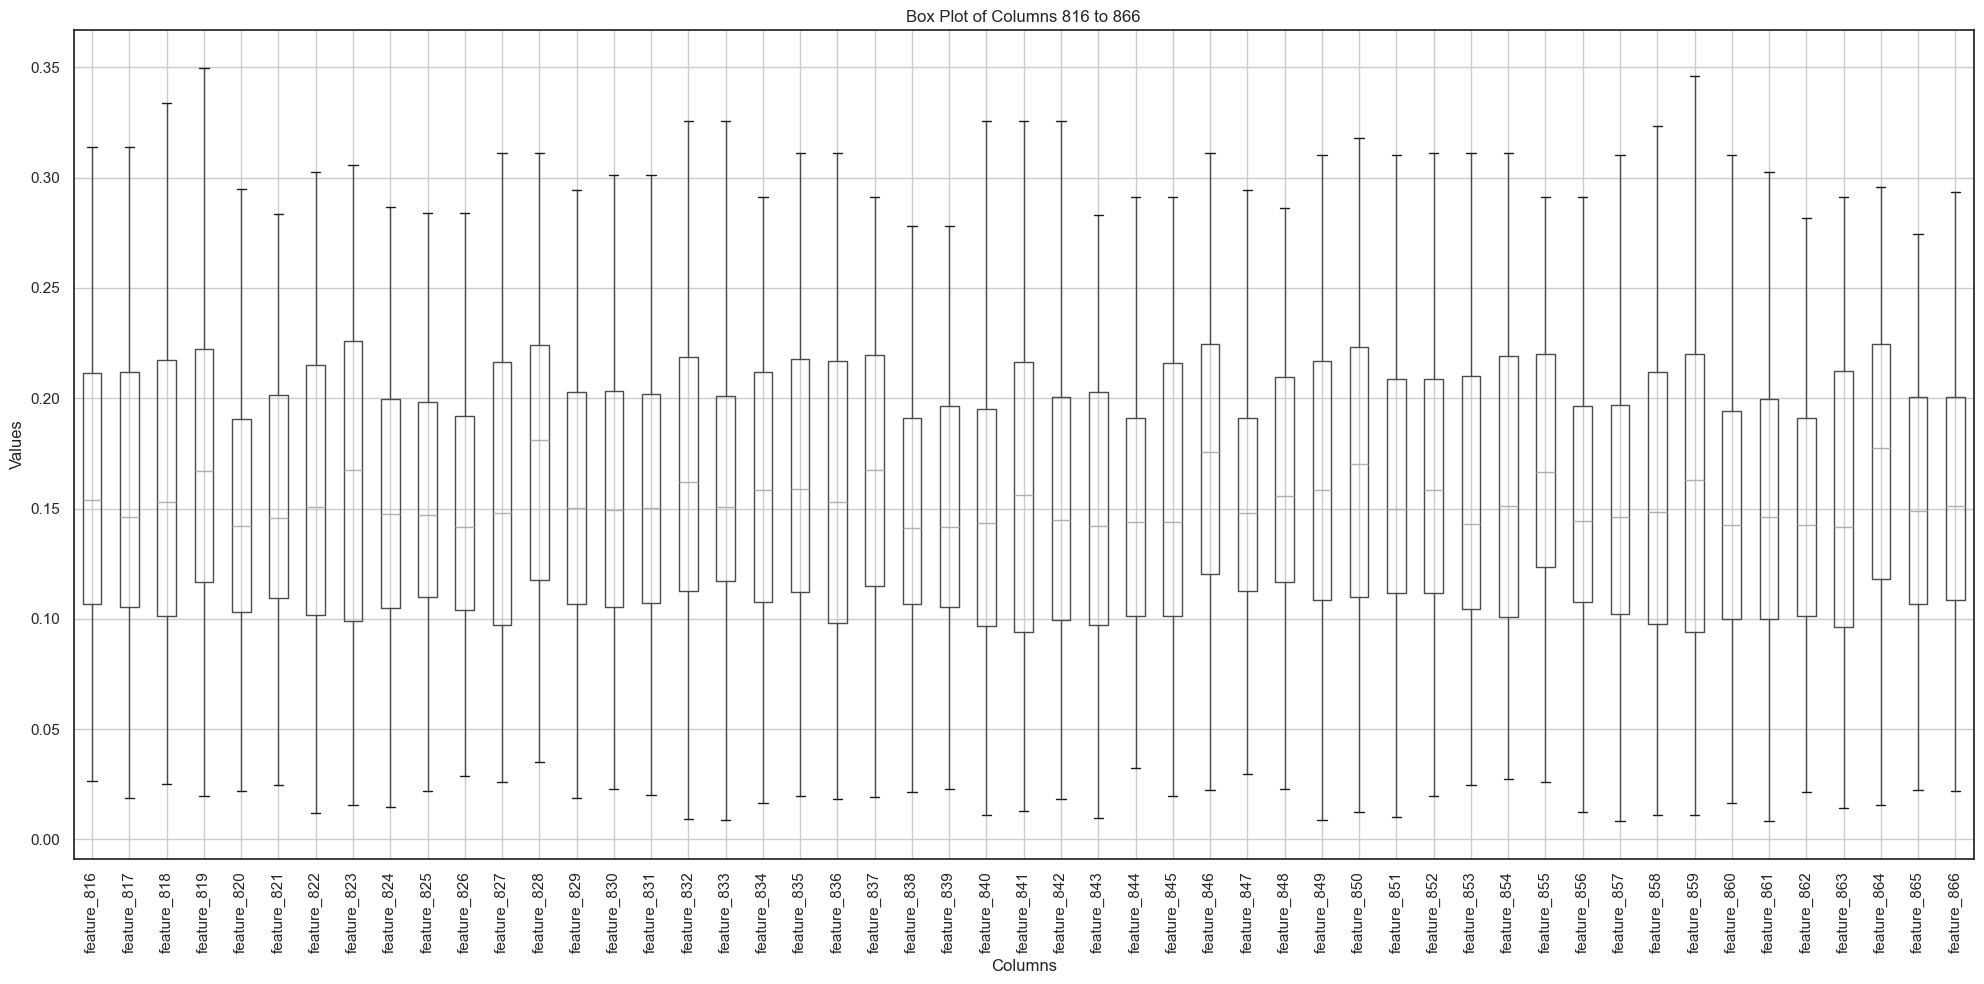

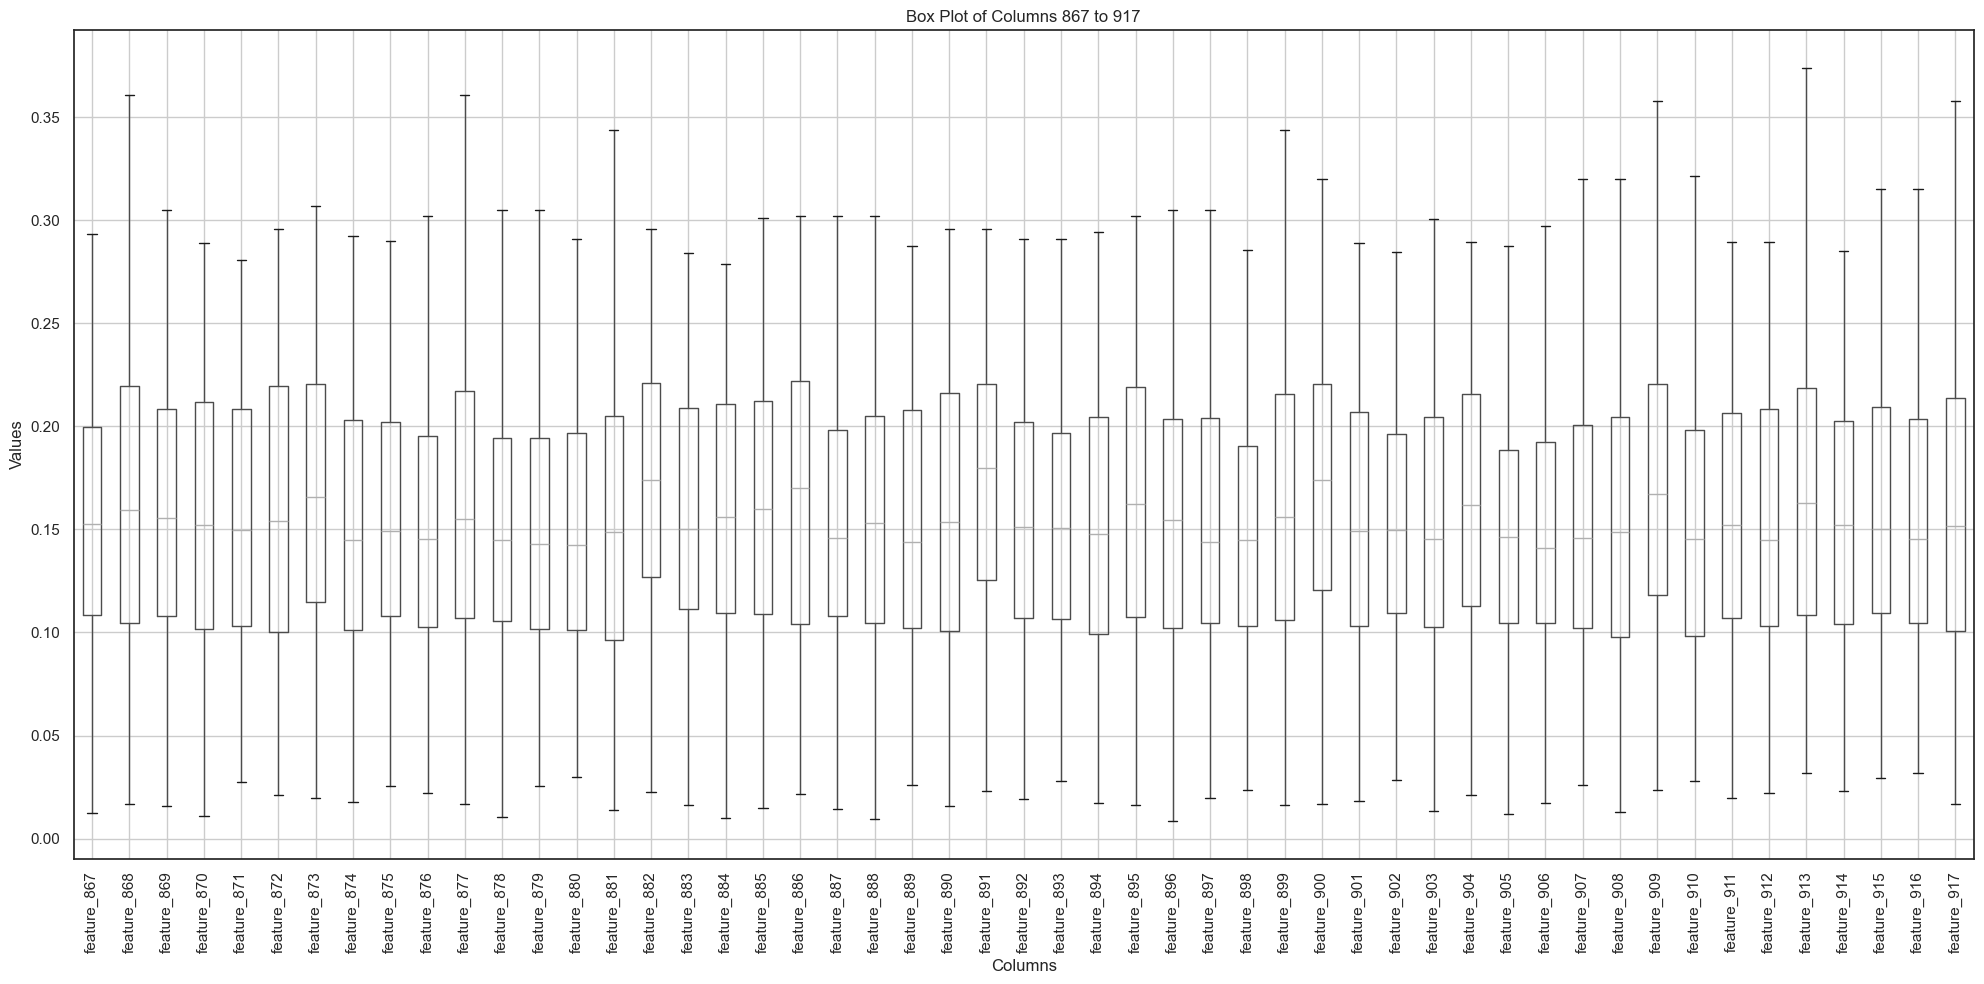

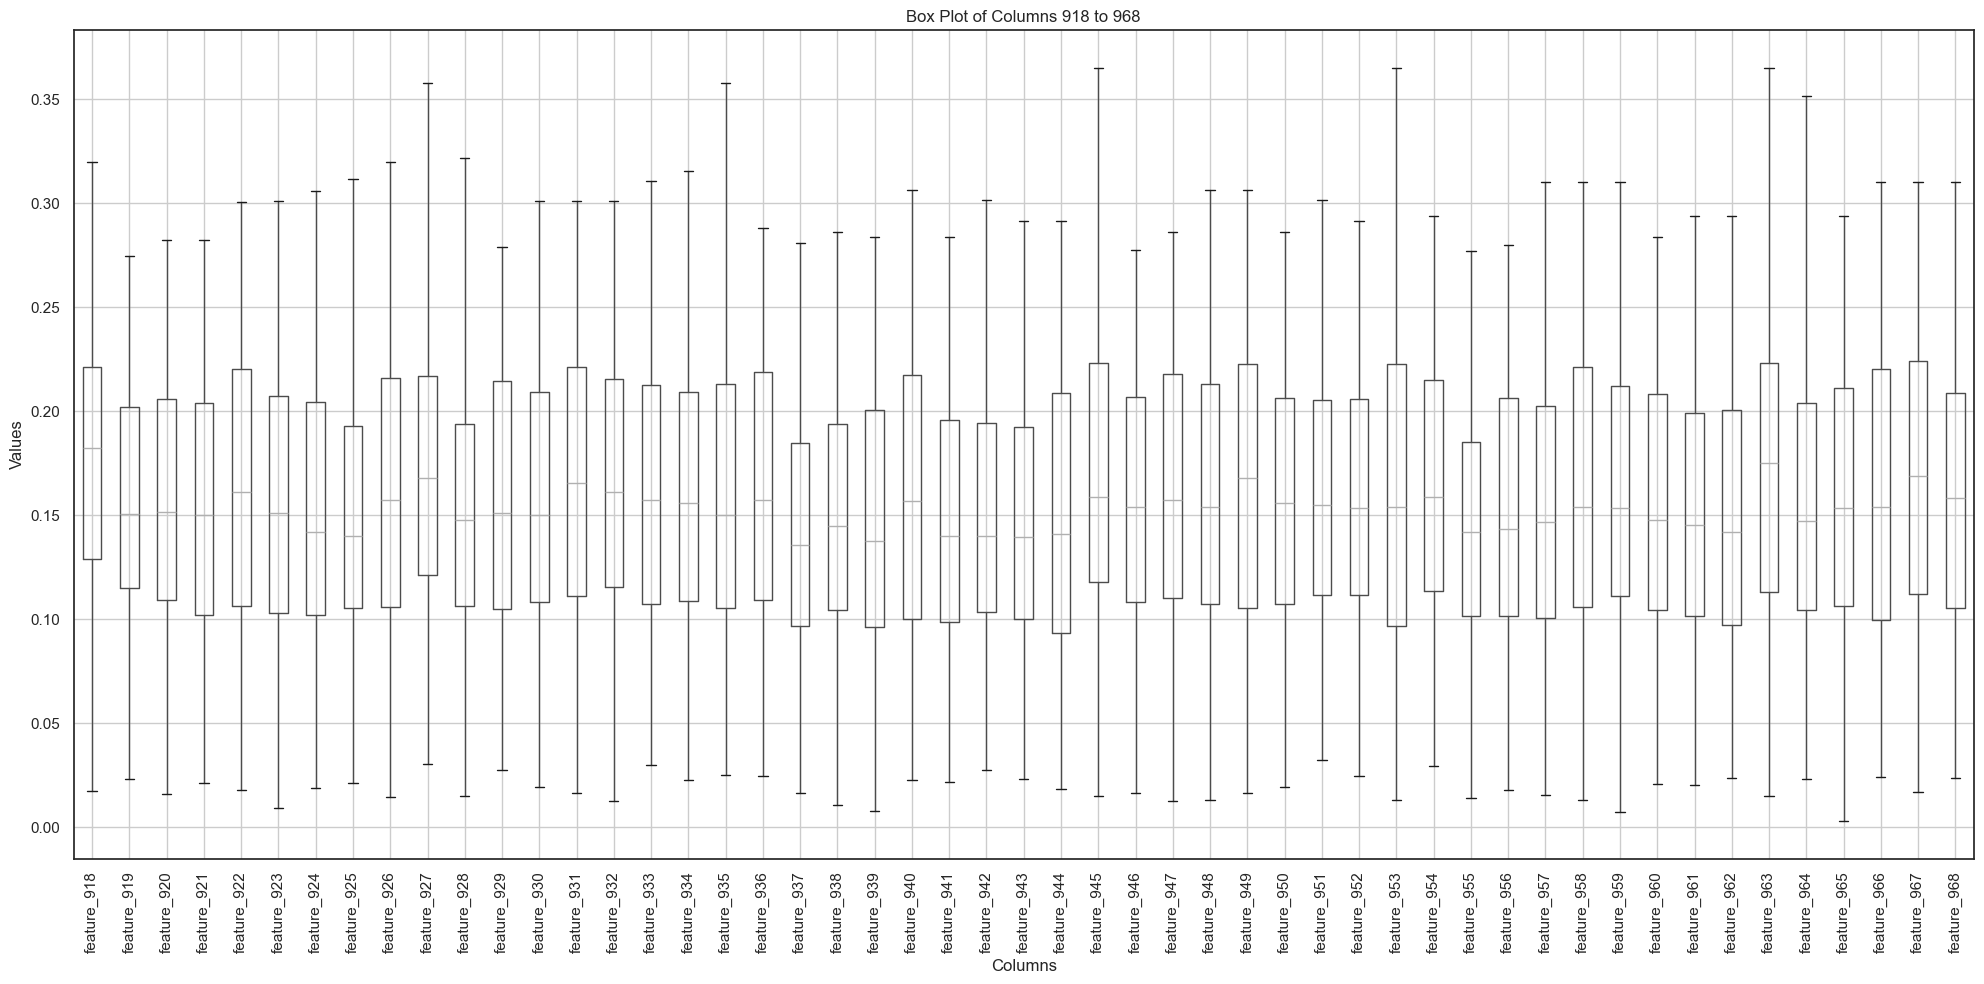

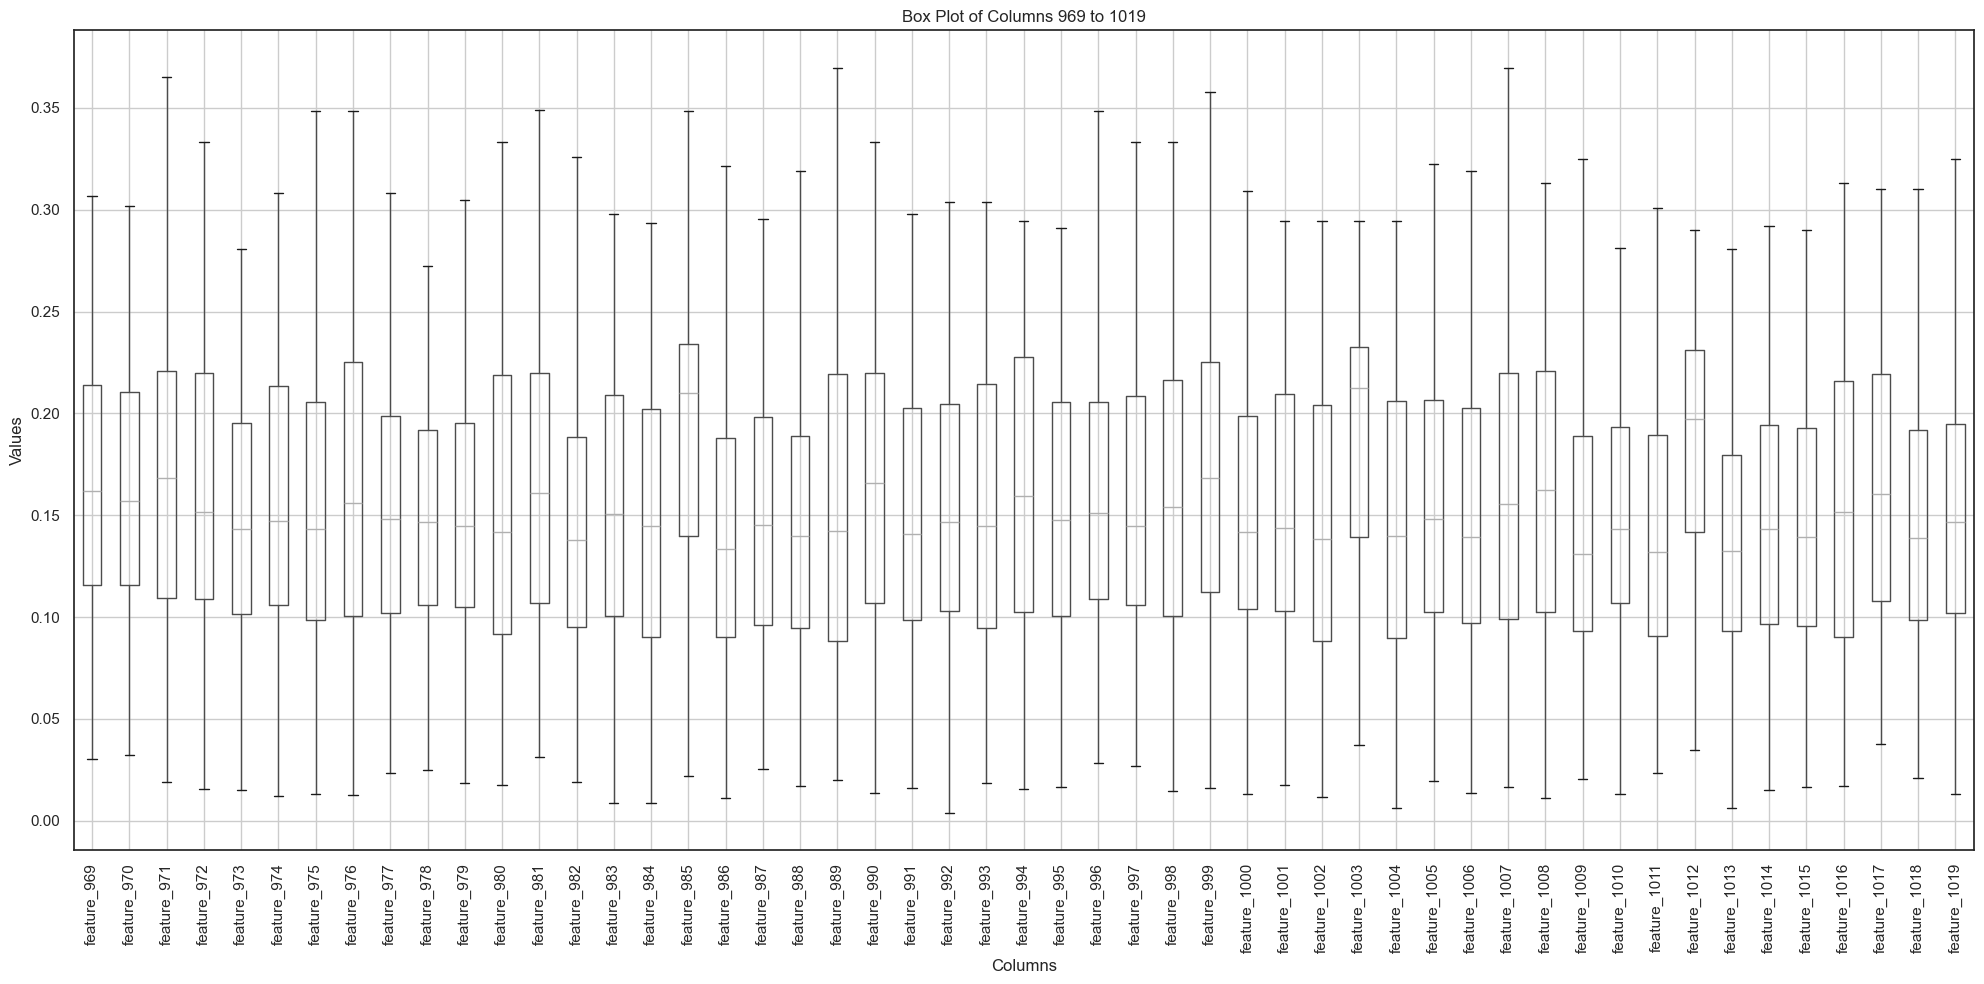

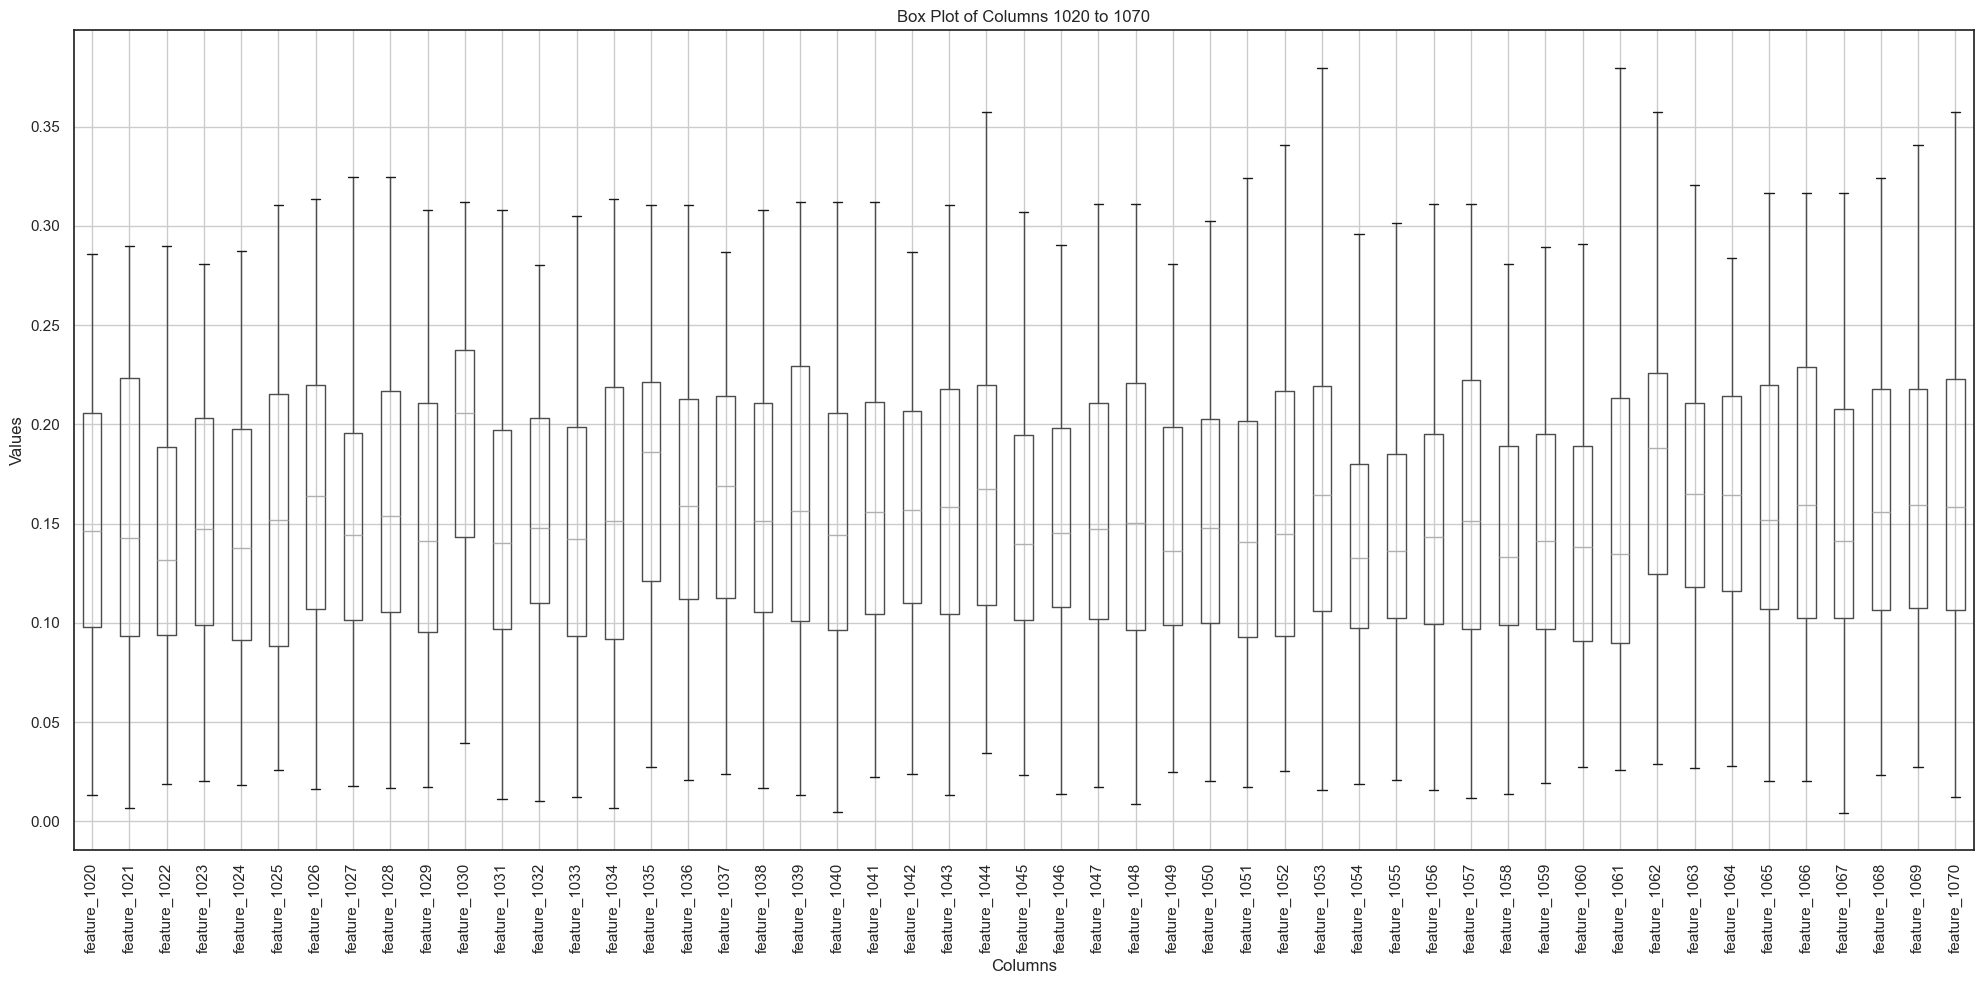

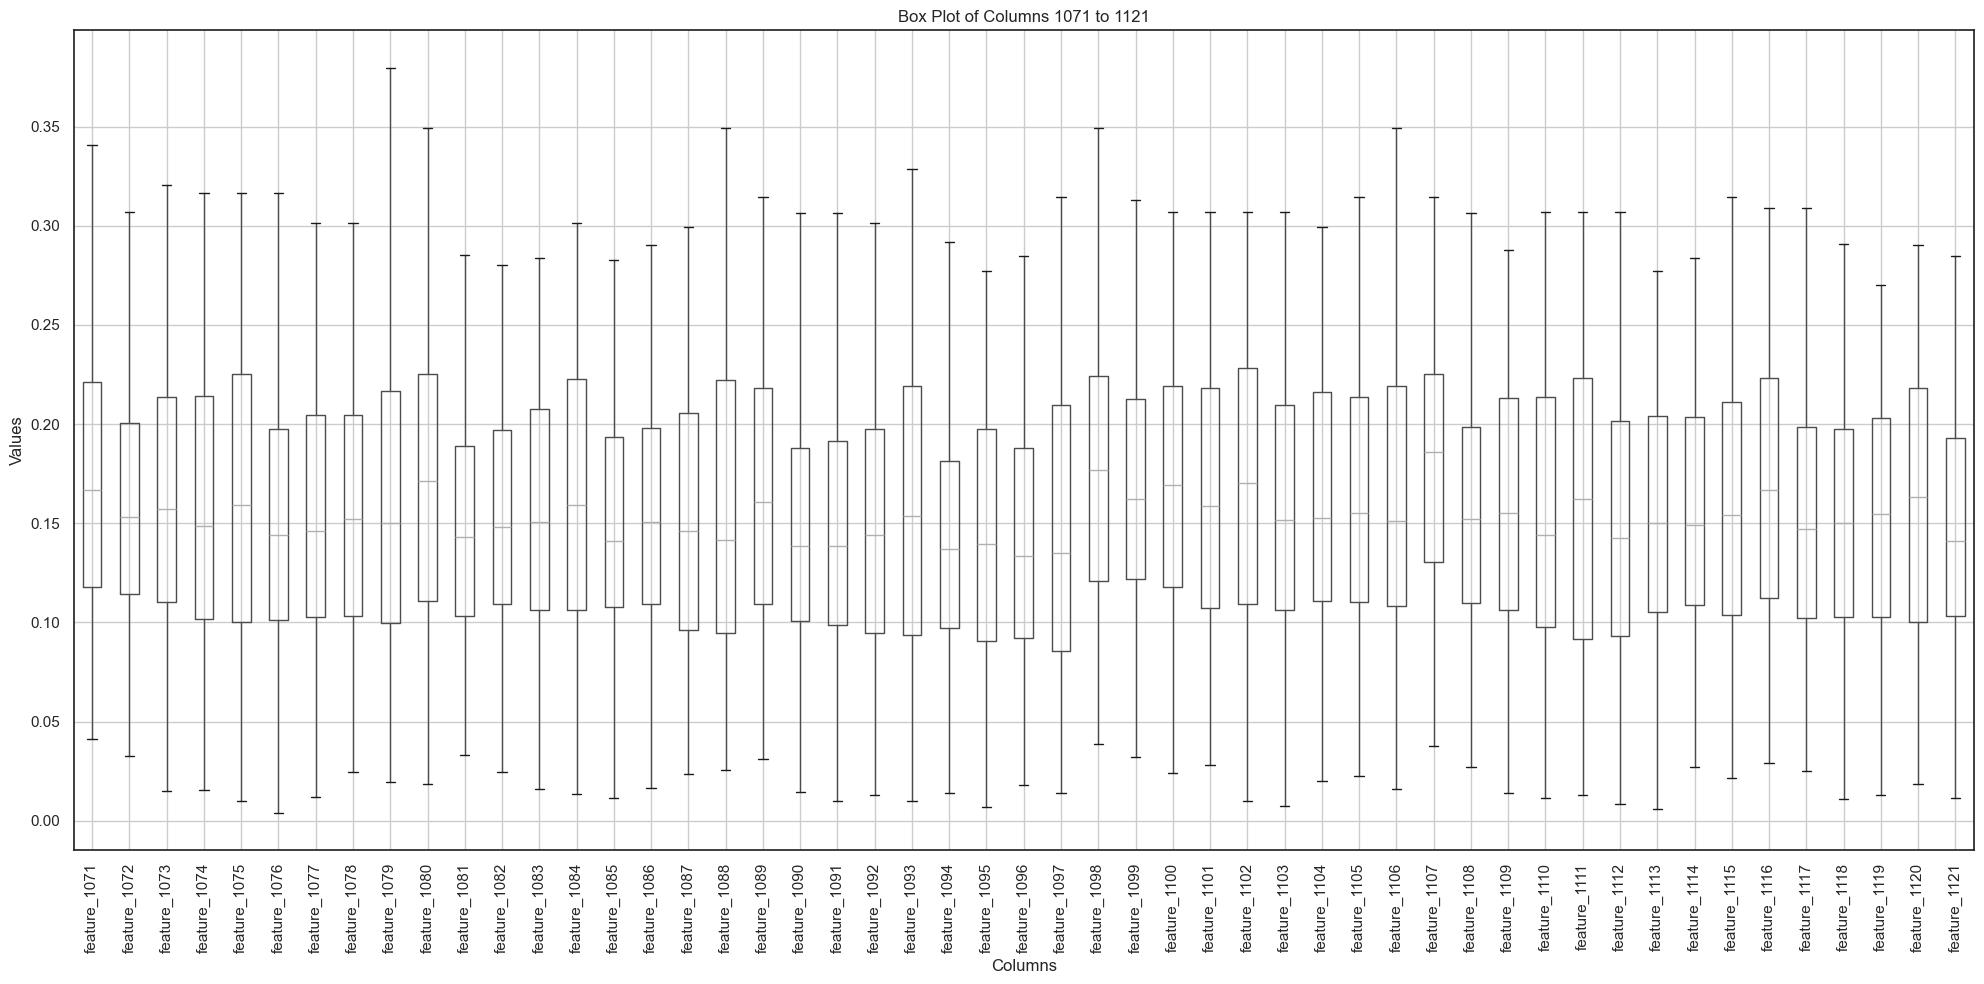

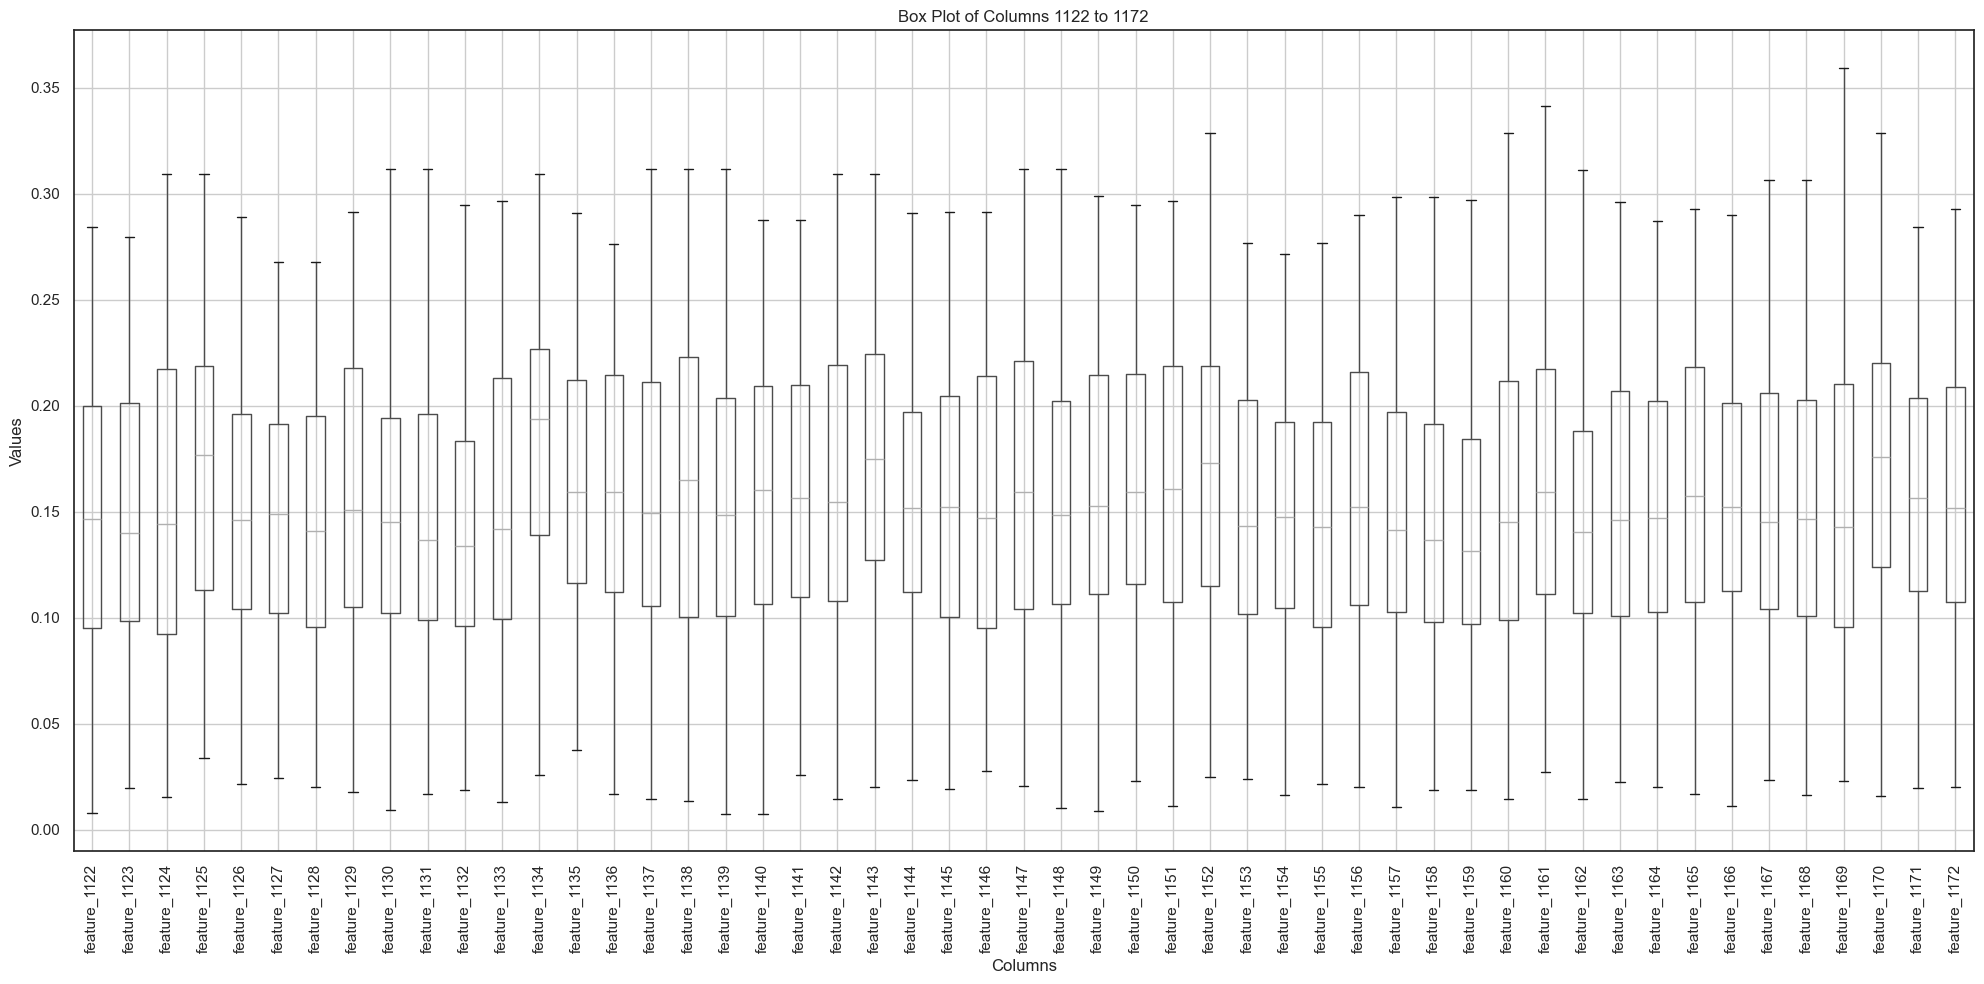

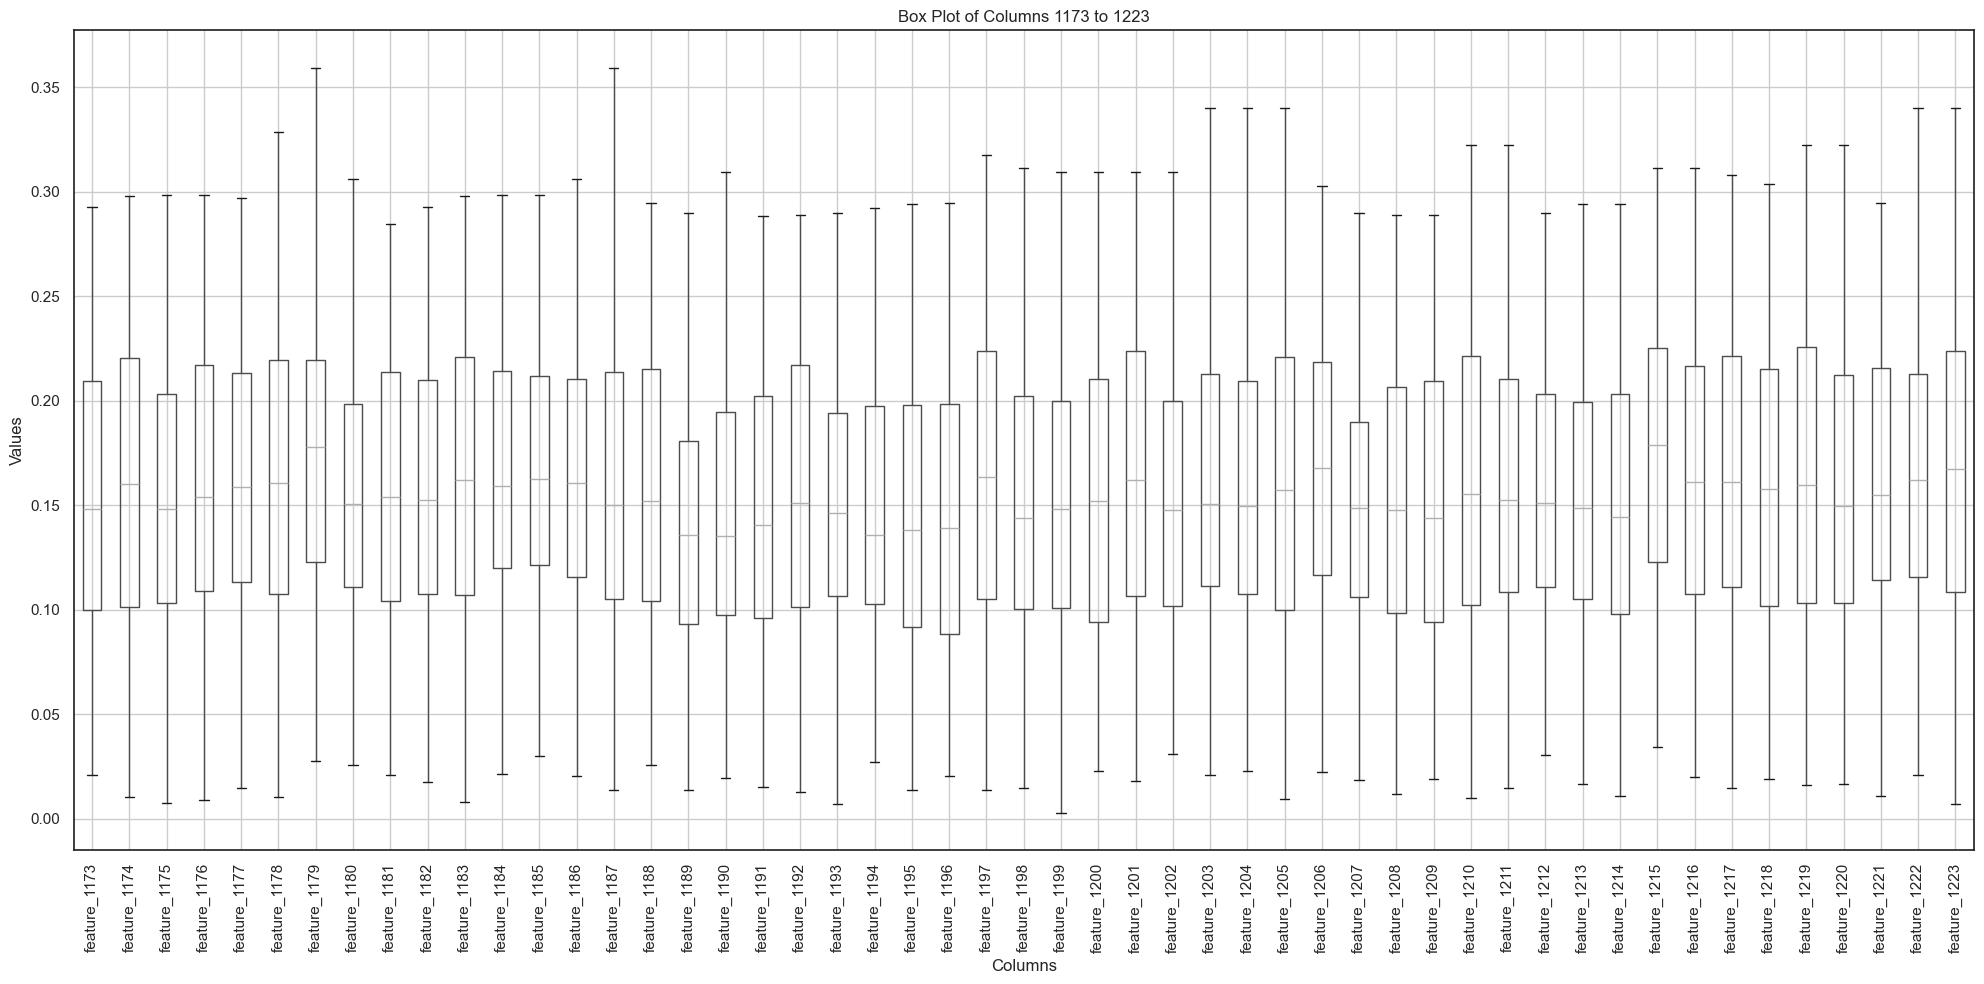

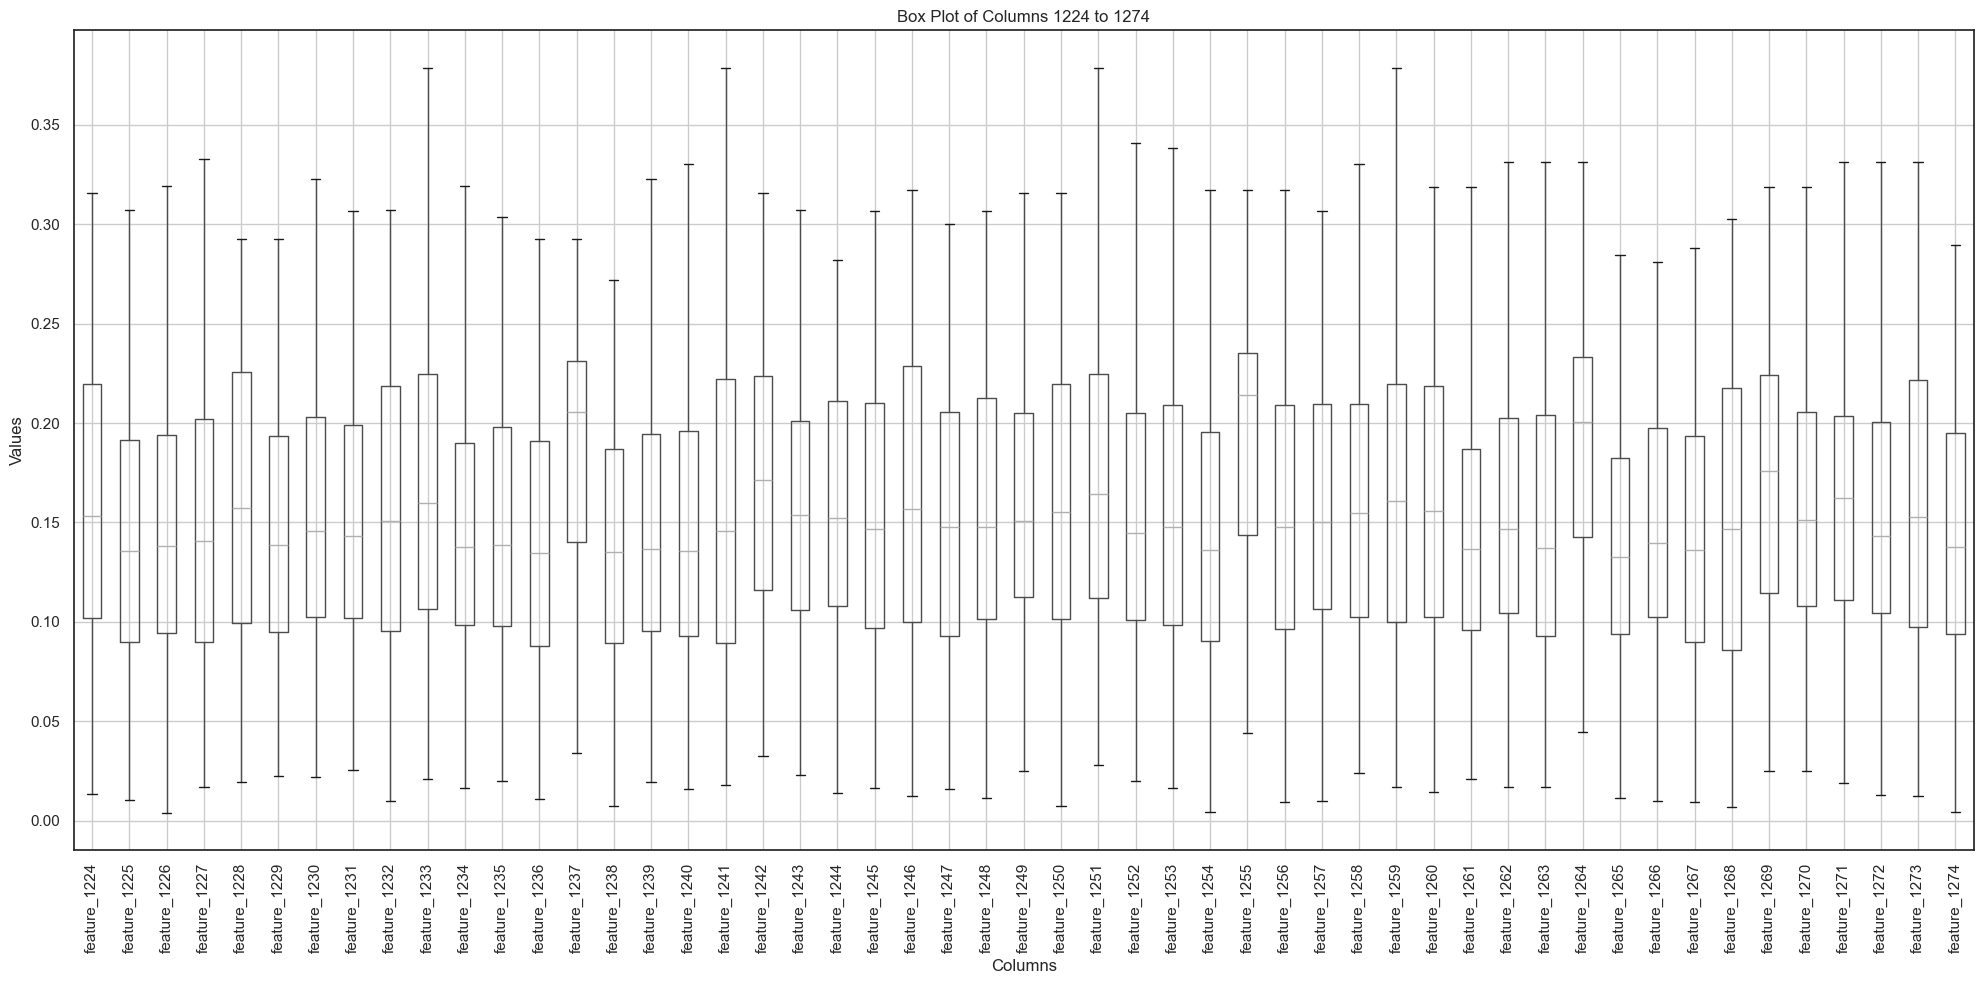

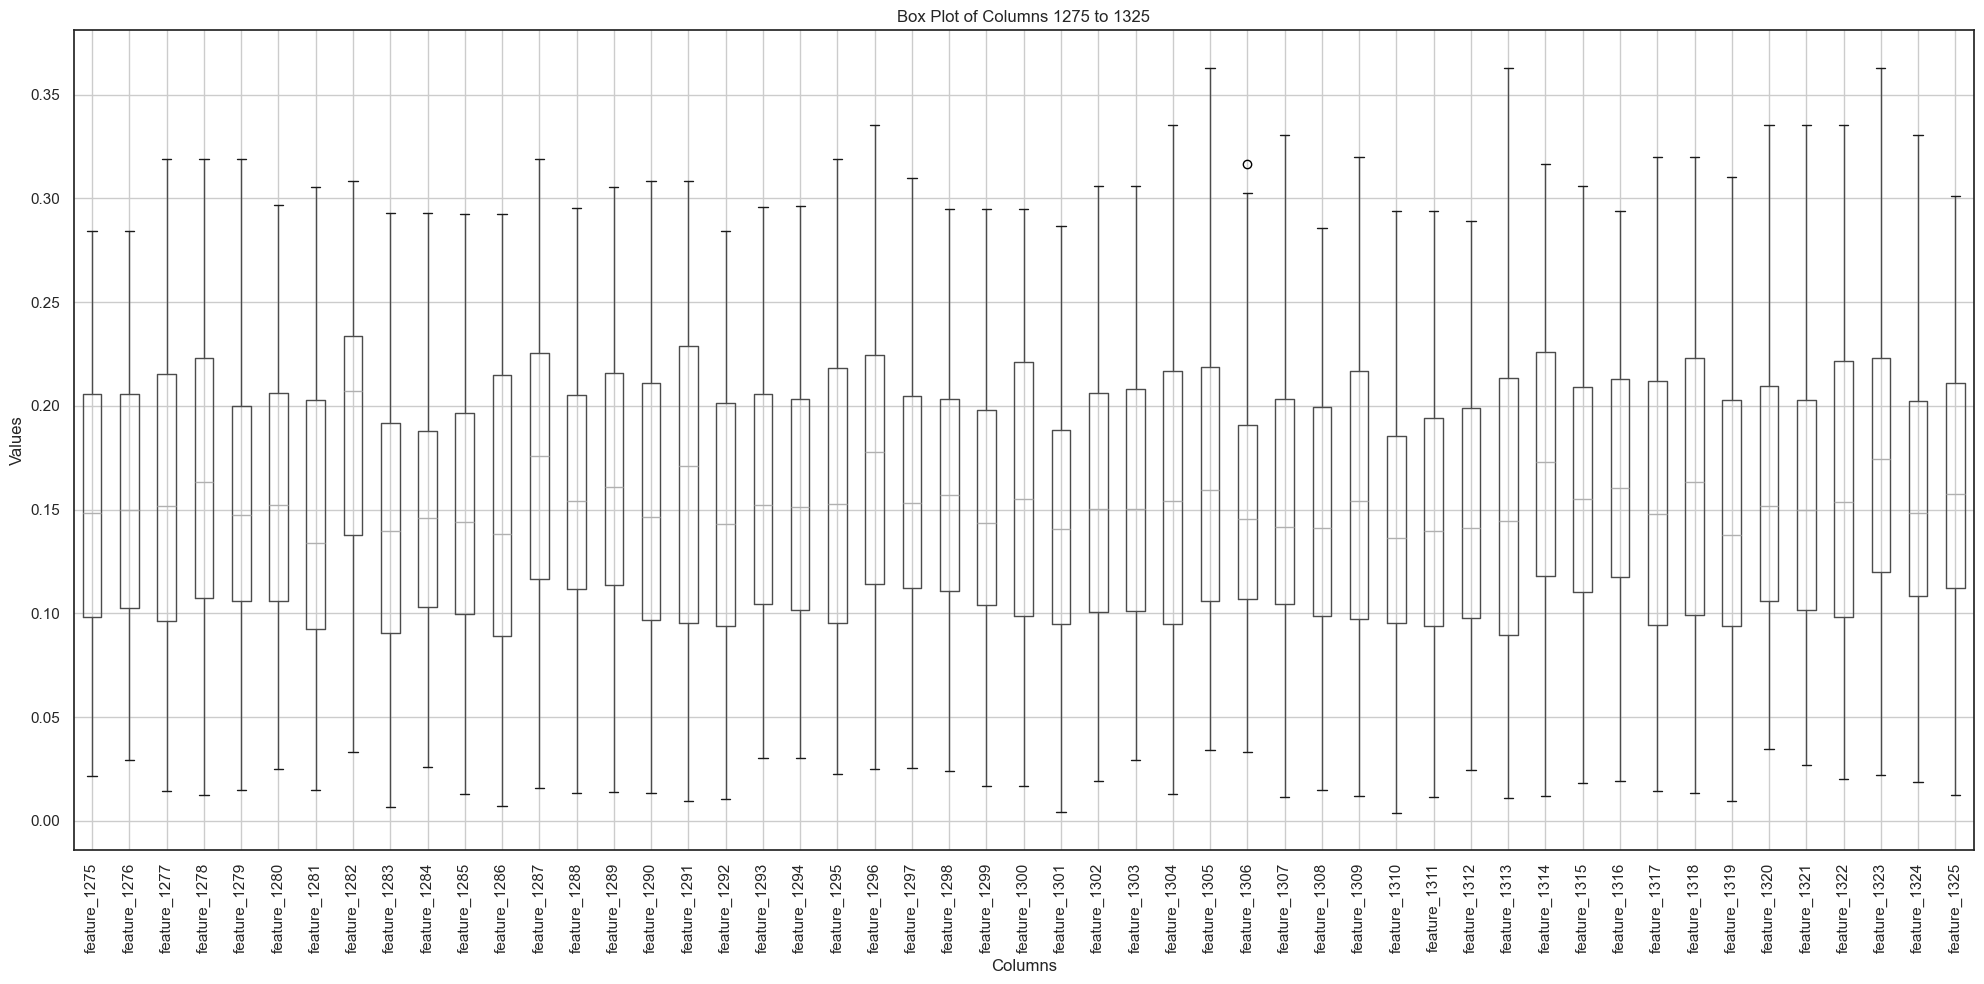

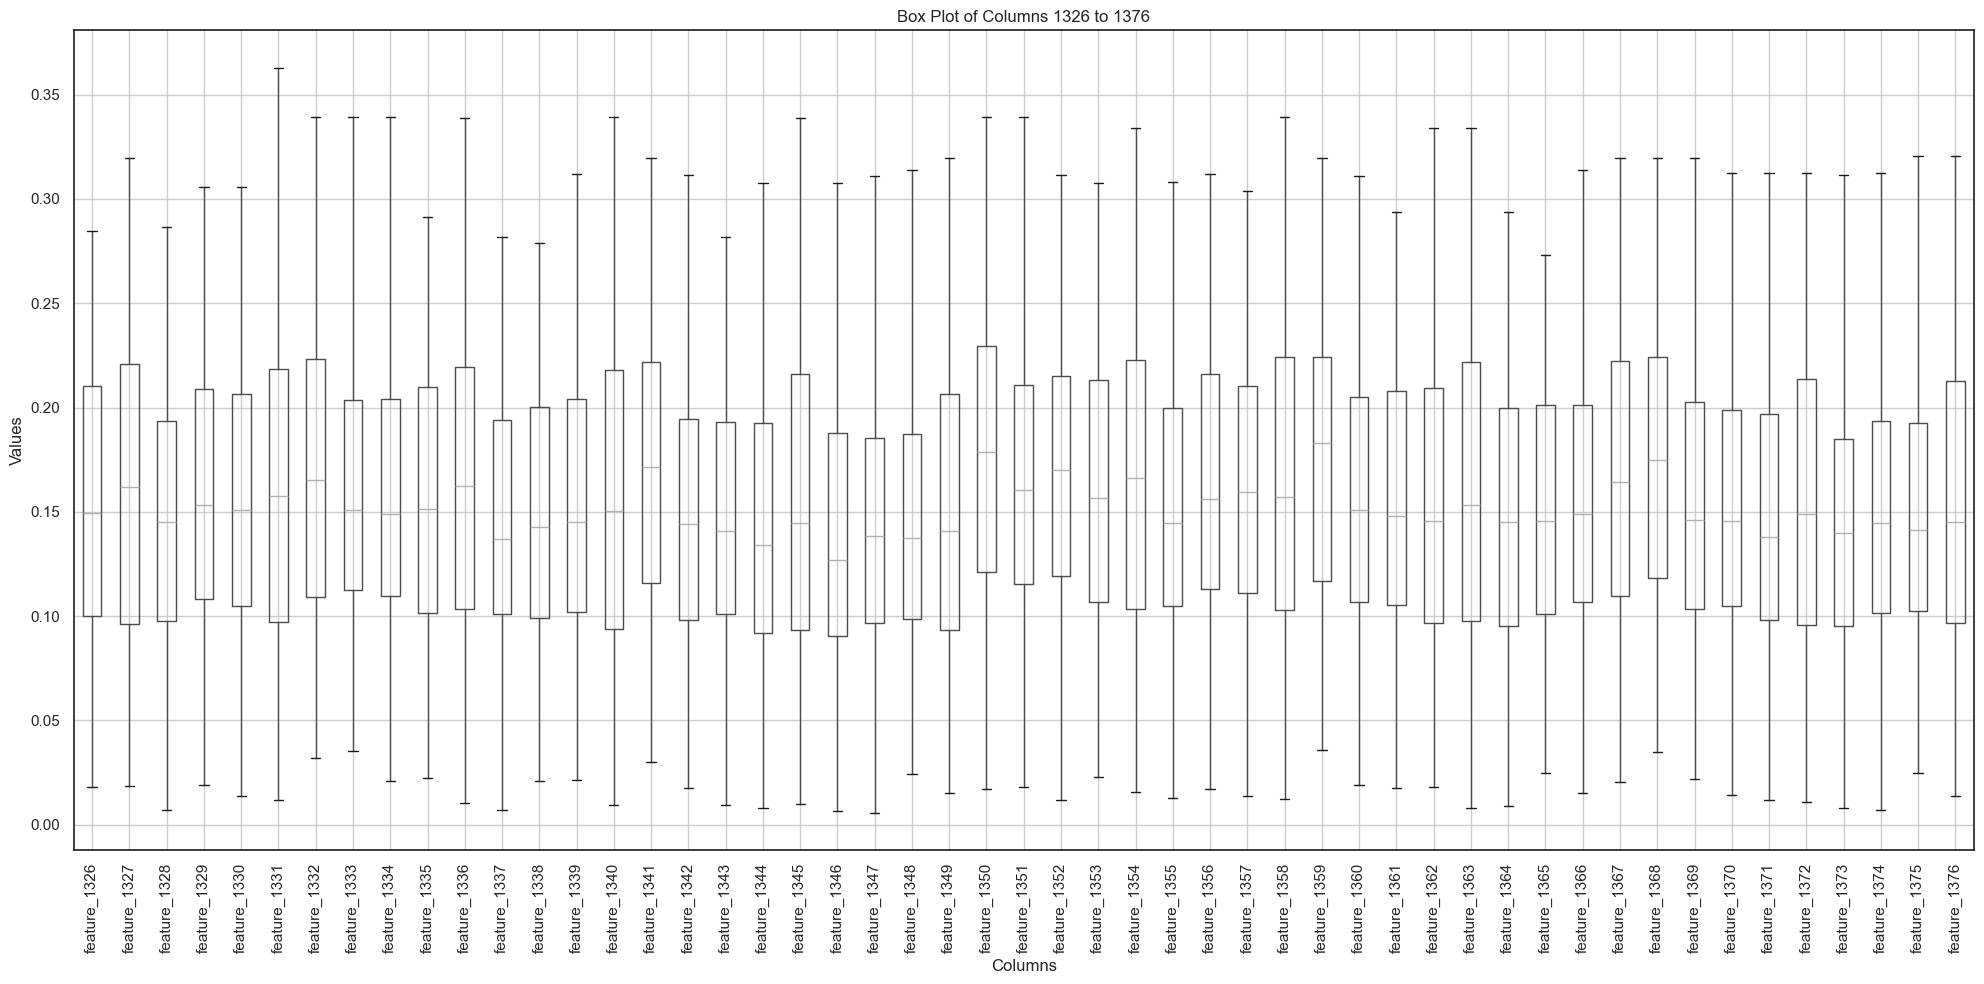

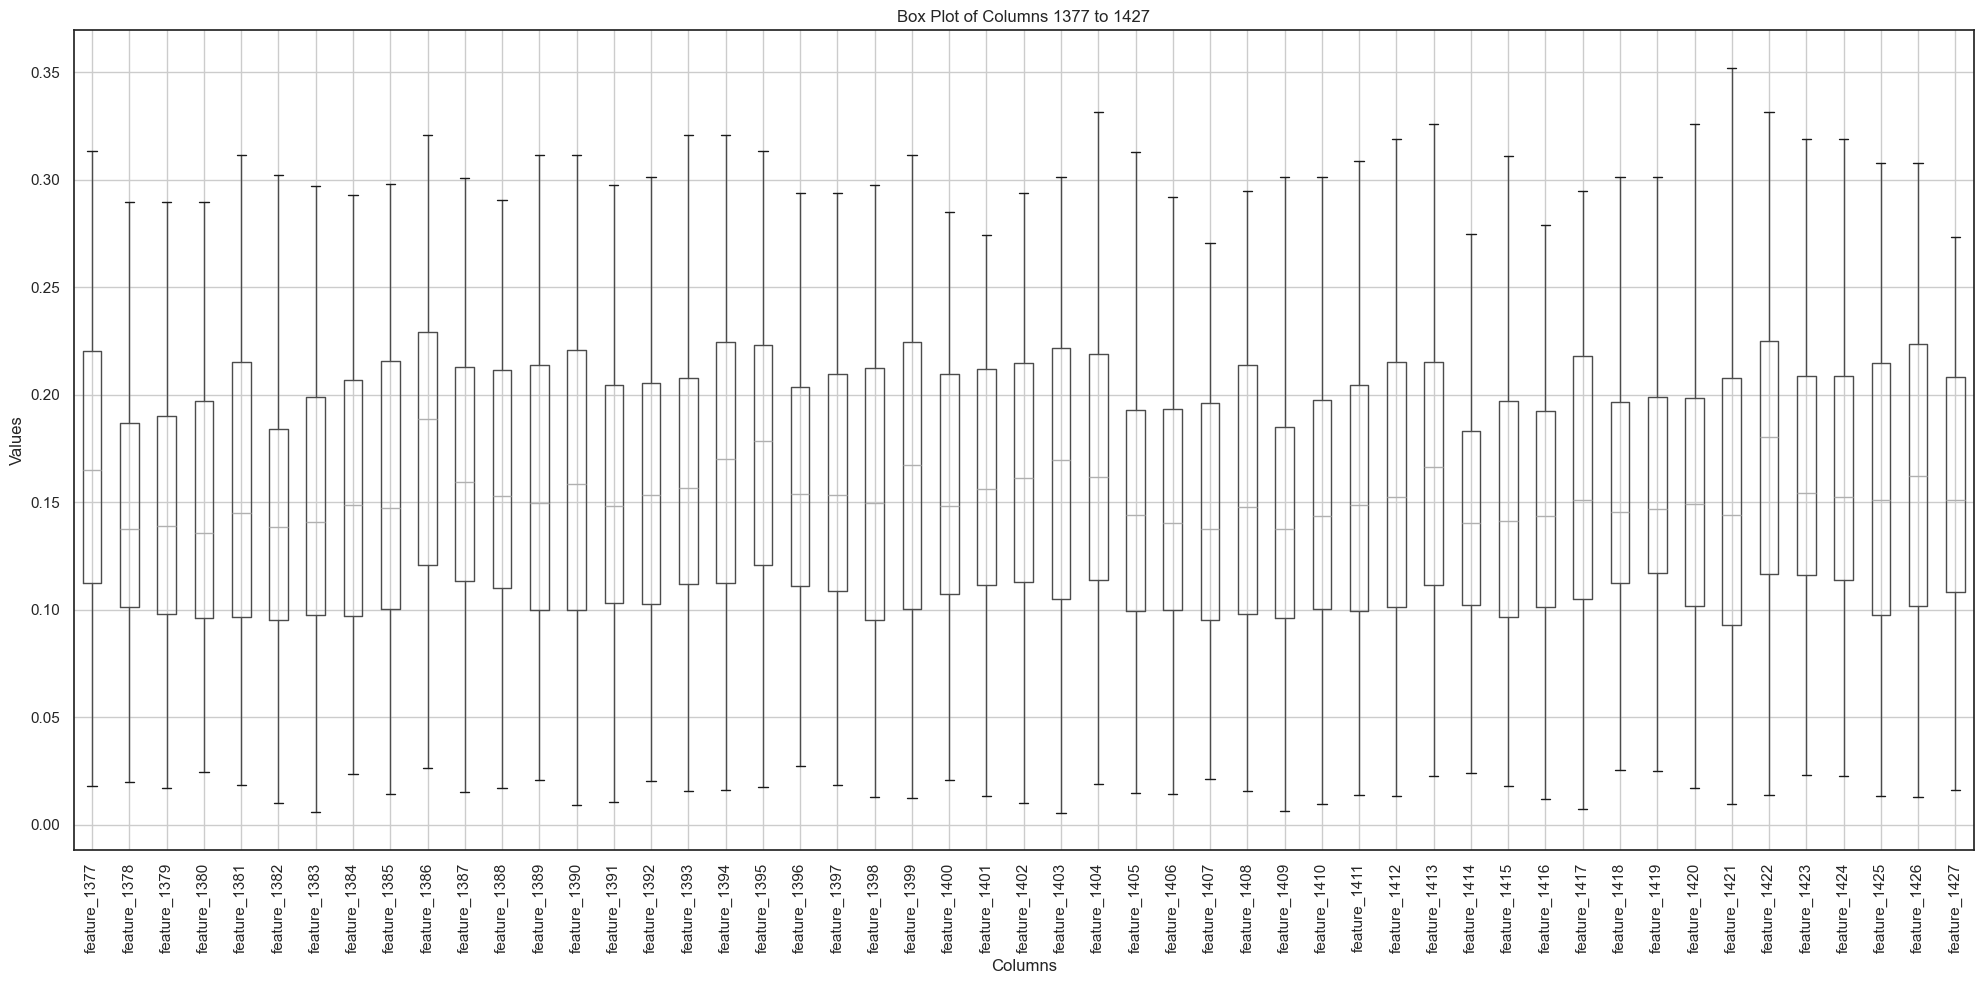

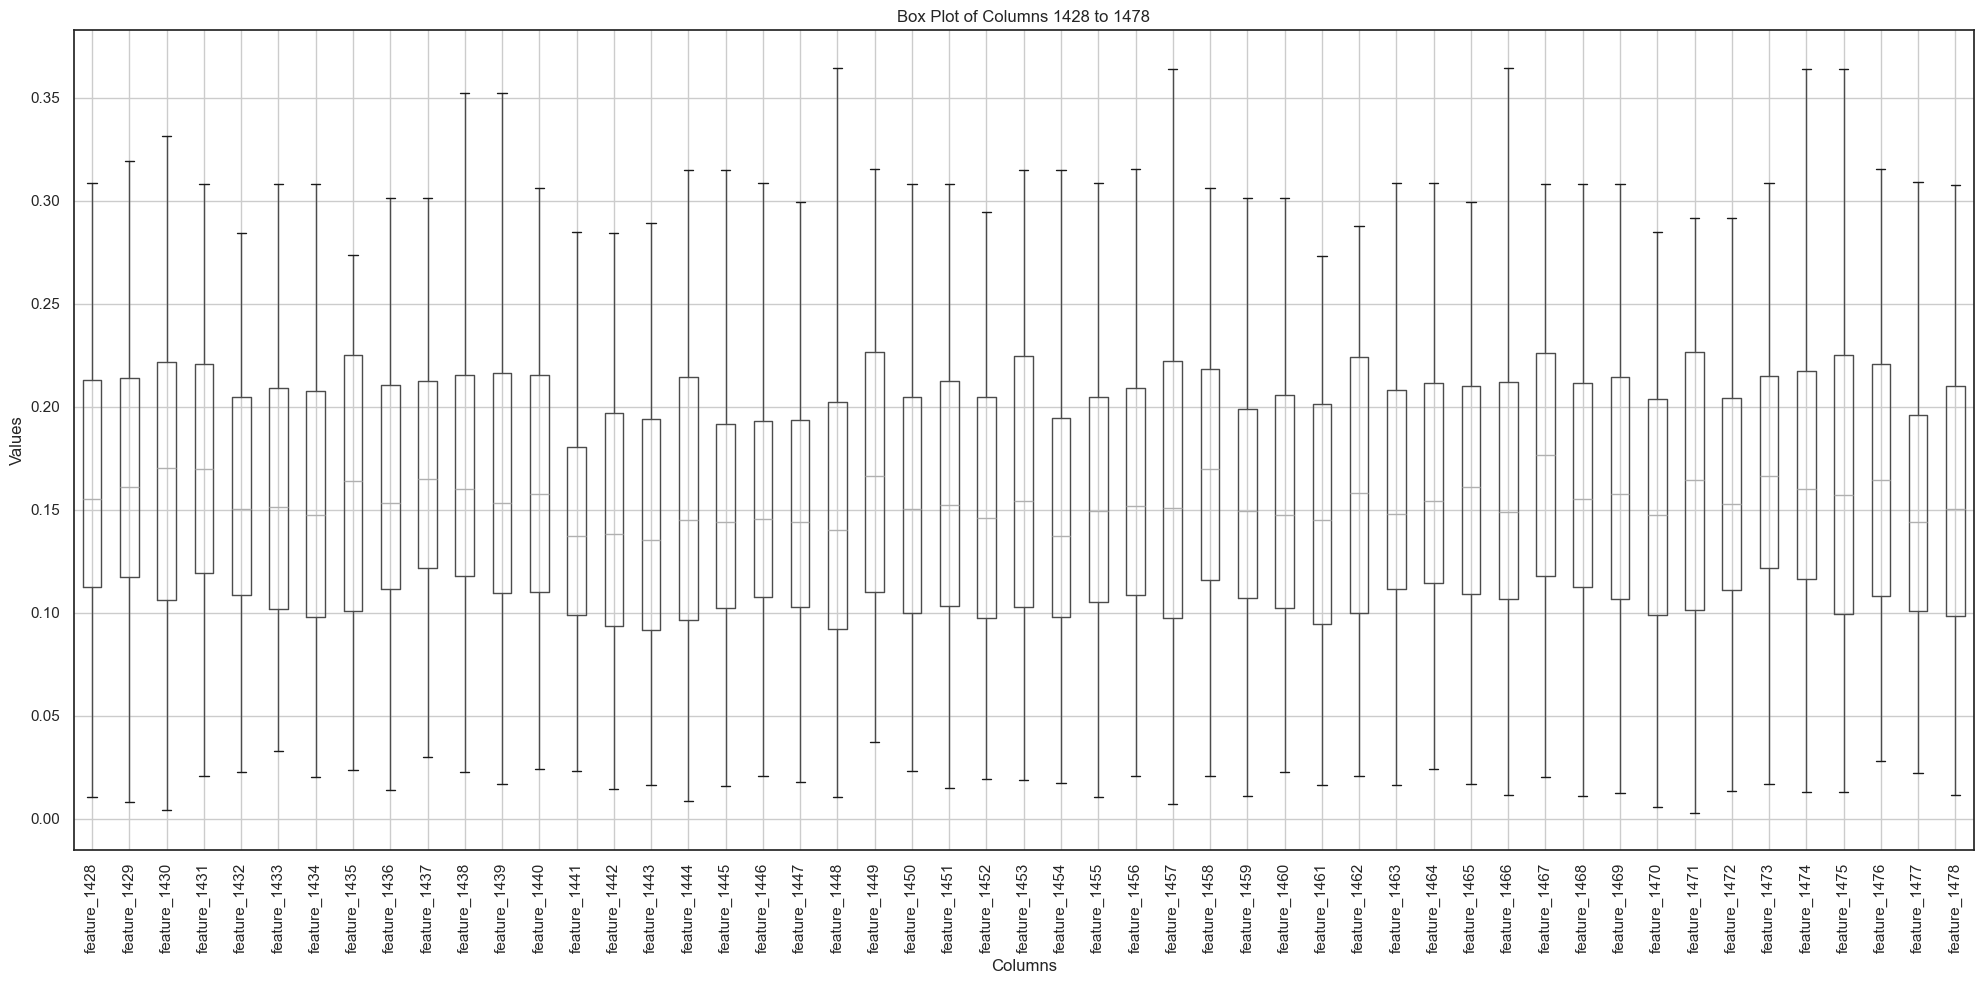

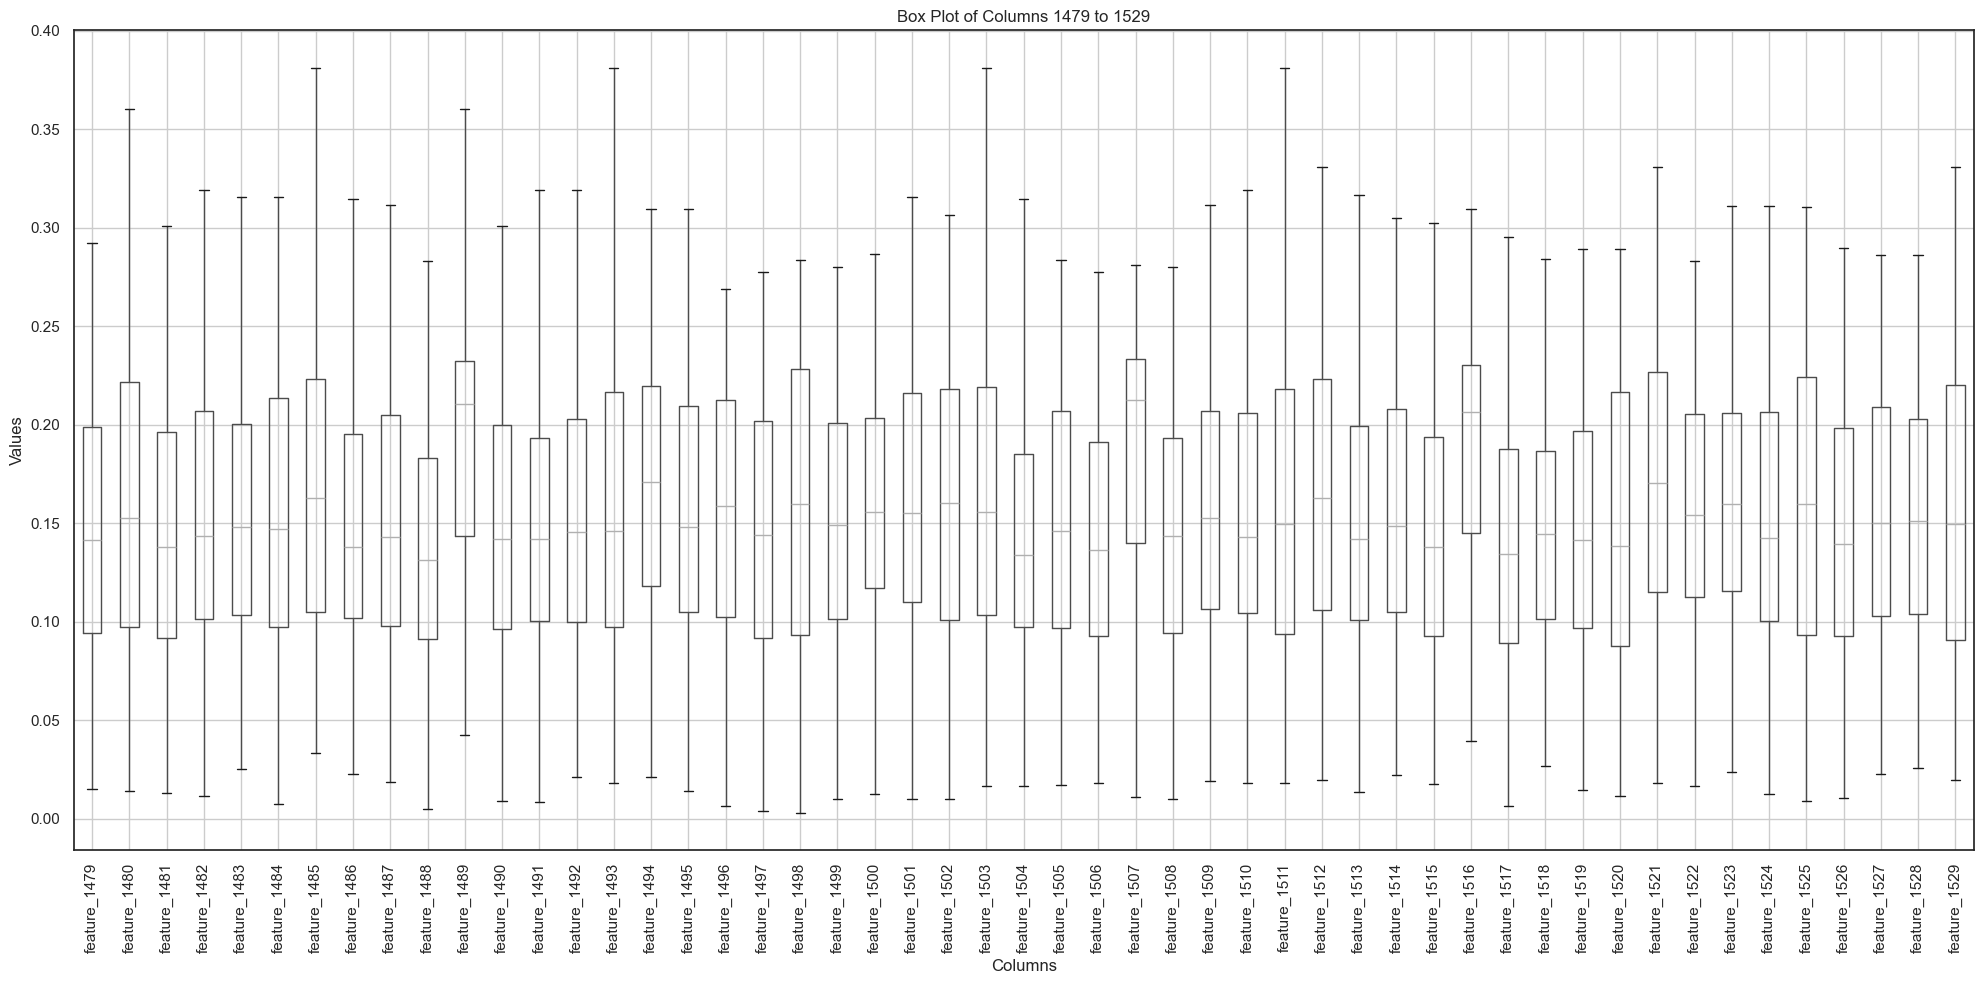

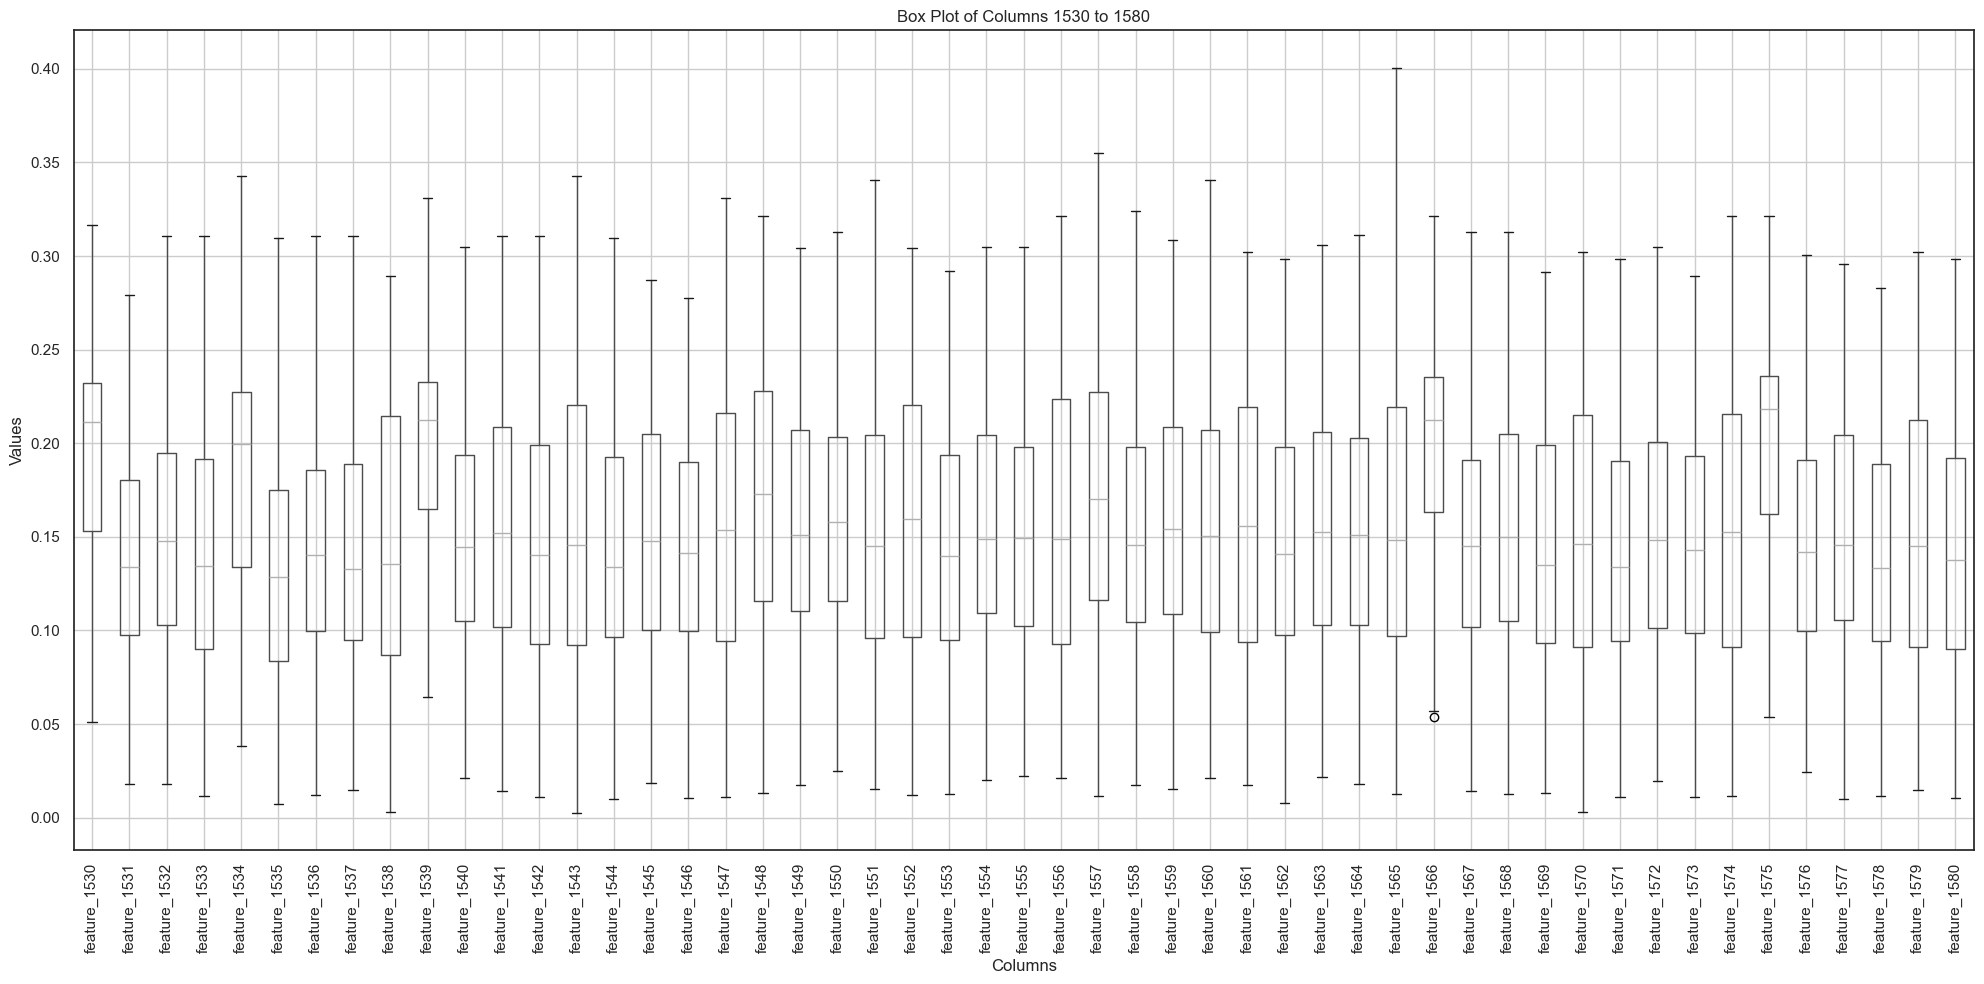

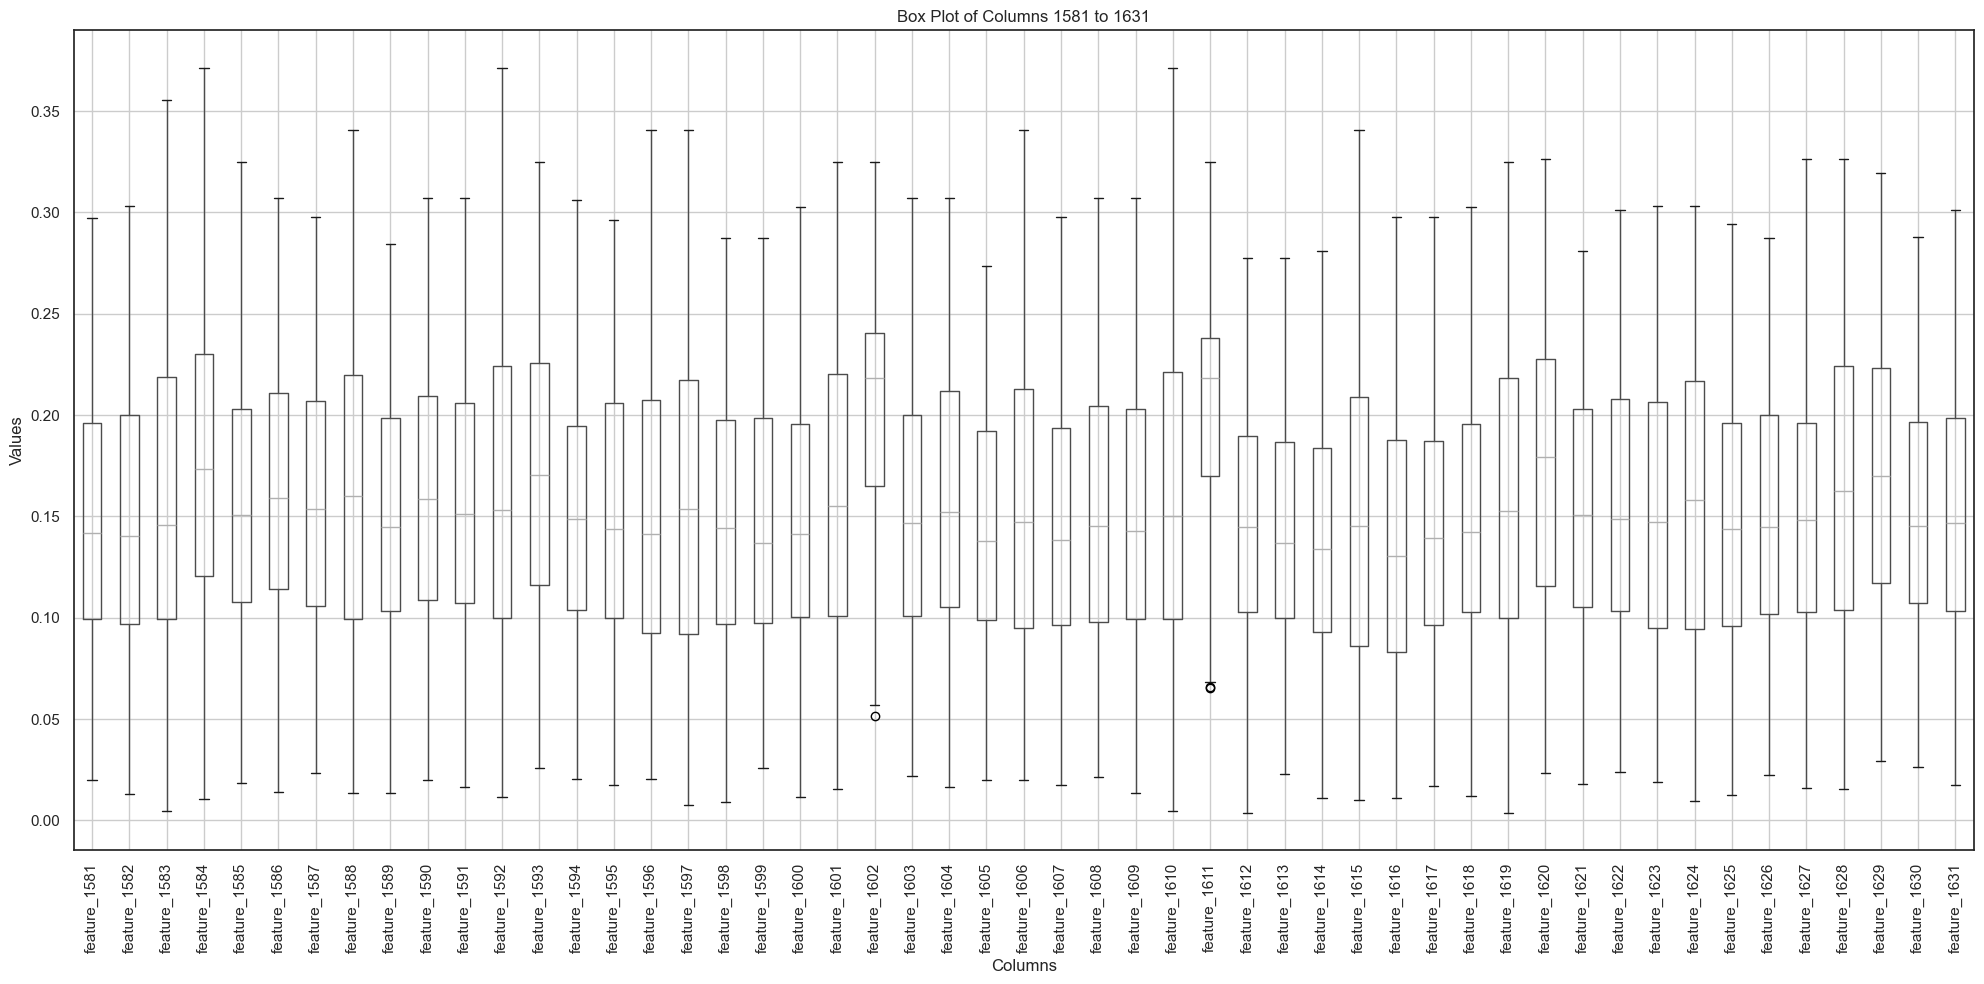

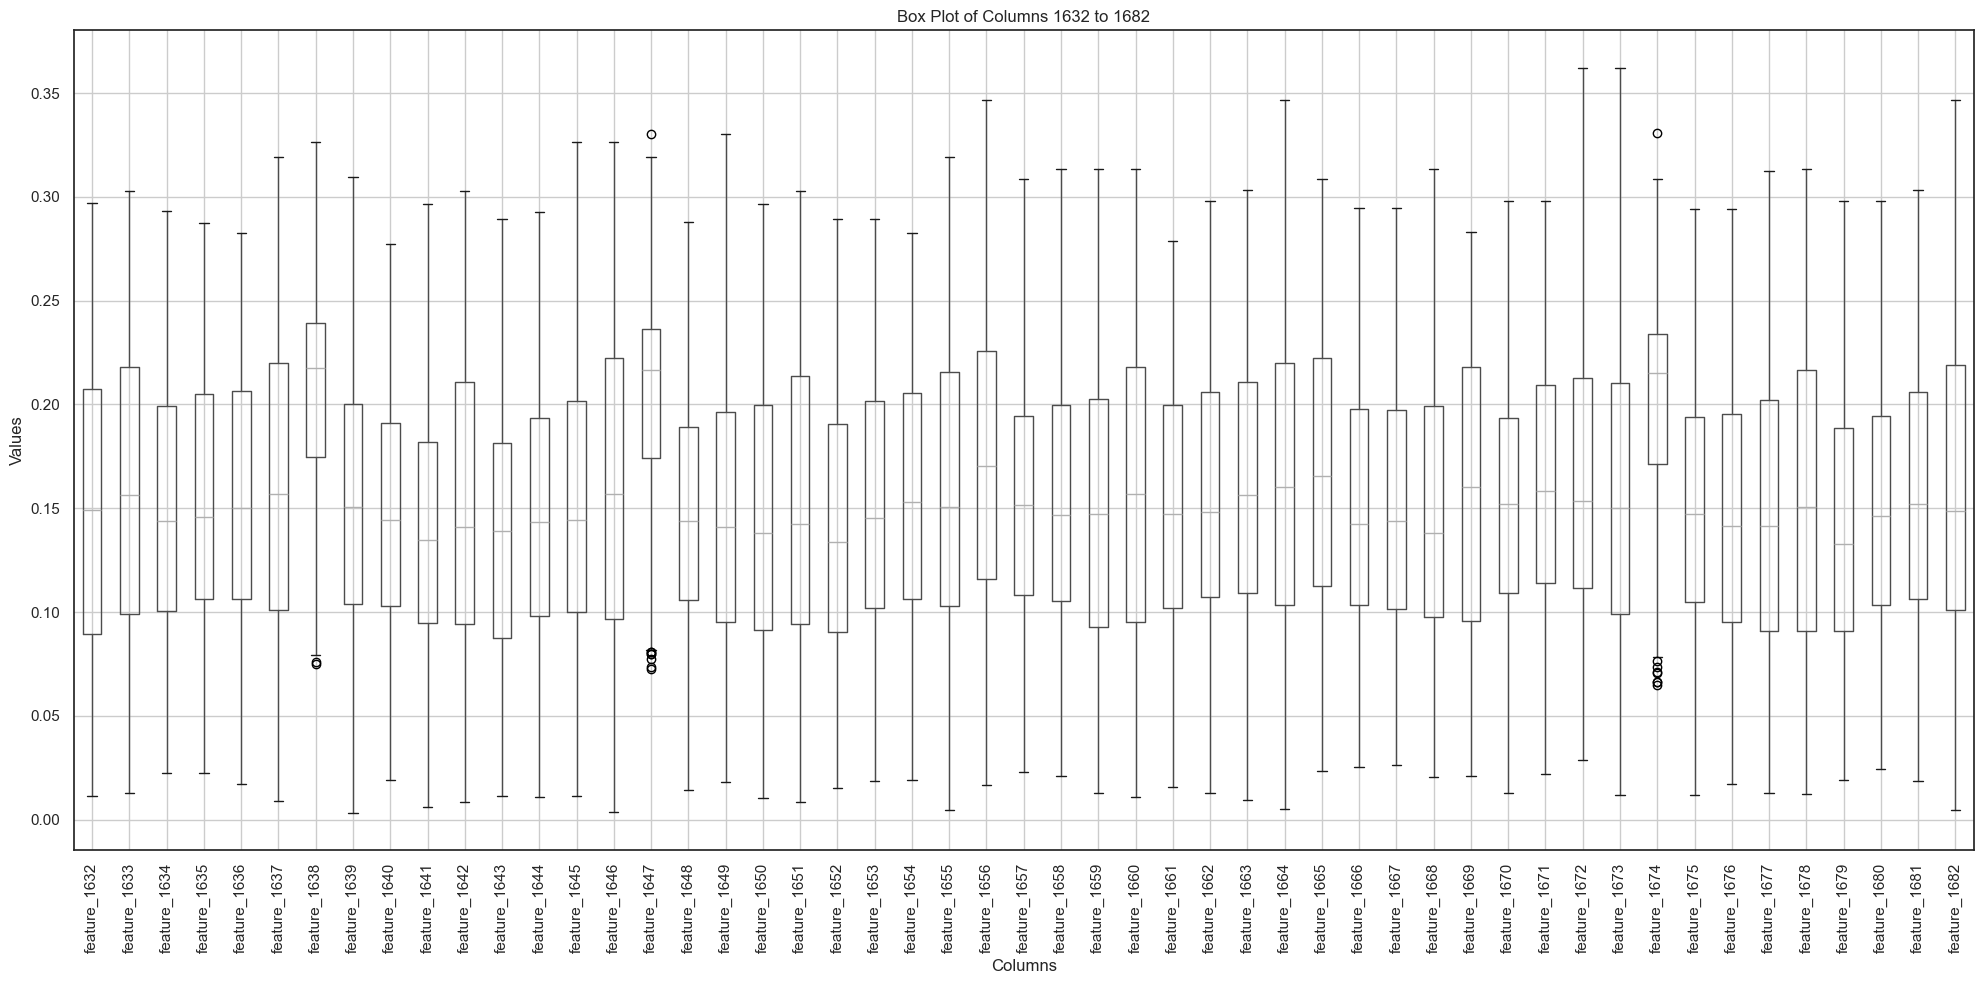

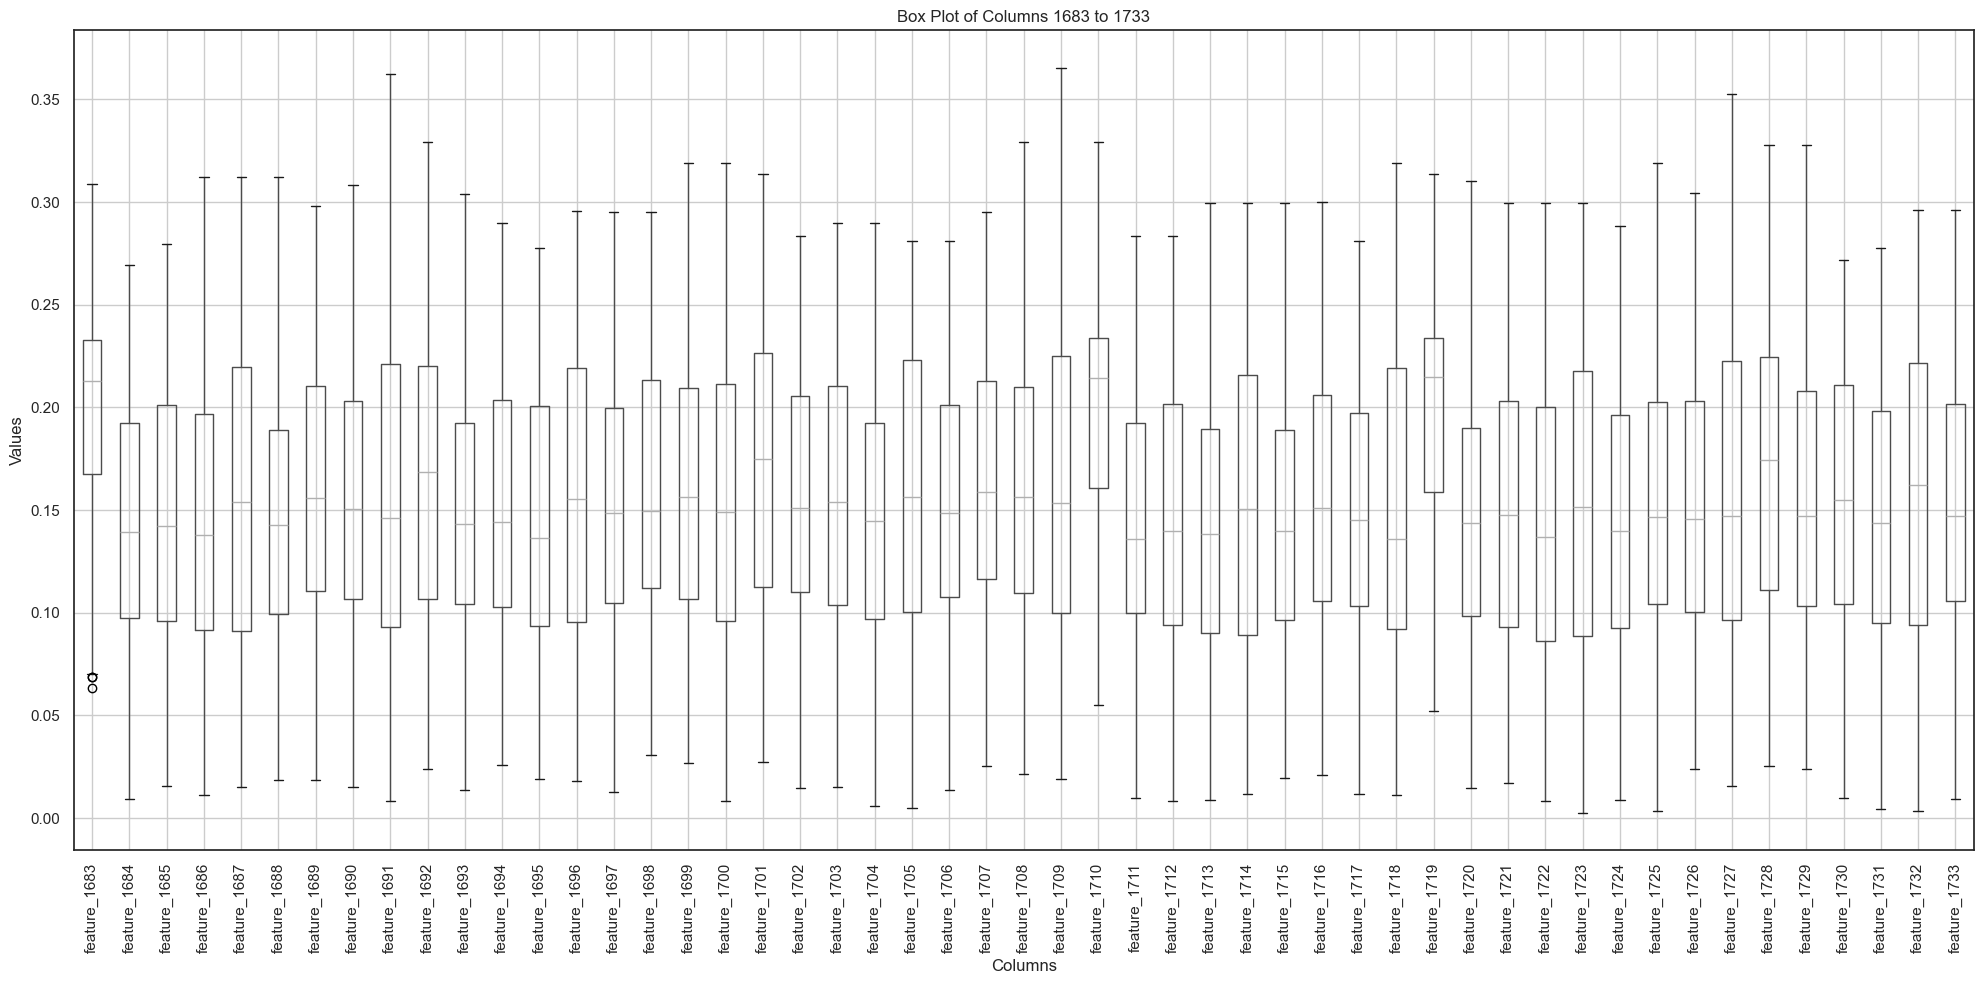

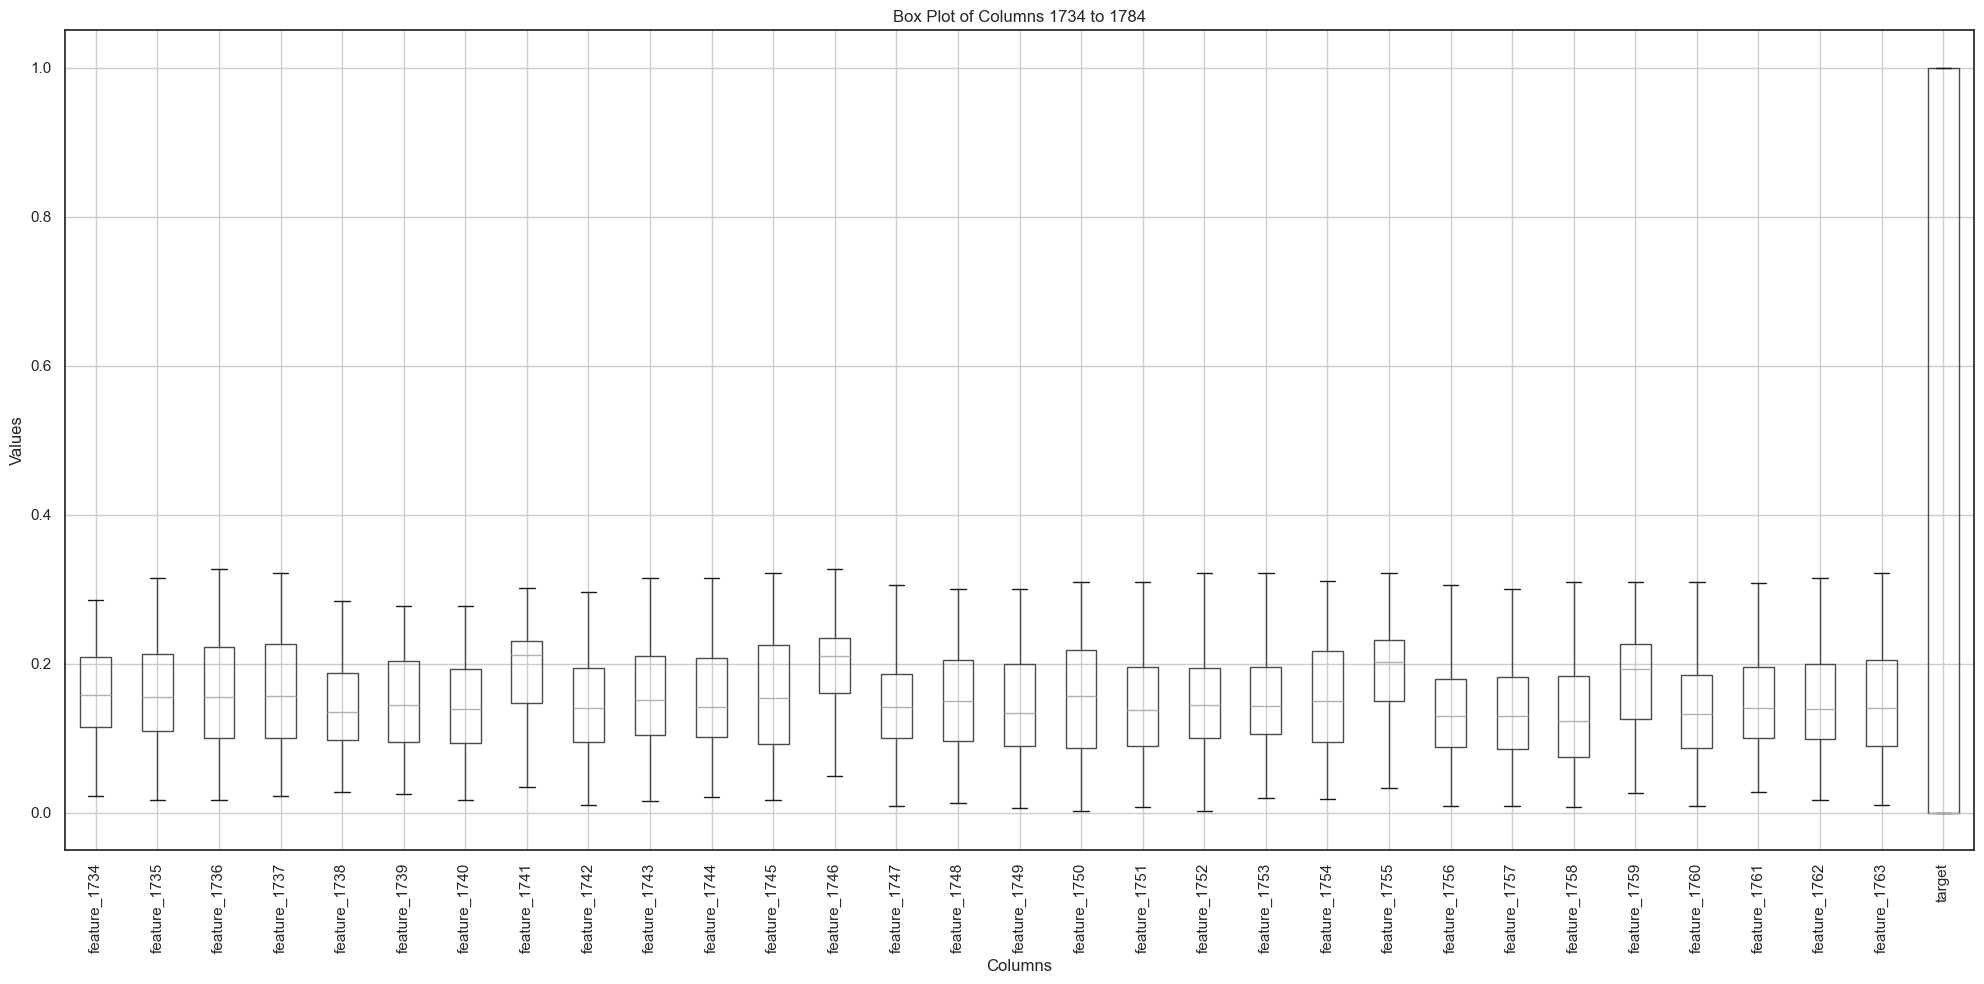

In [21]:
plot_boxplots(skin_data)

> model

KNN Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

         0.0       0.82      0.70      0.76        77
         1.0       0.67      0.79      0.72        58

    accuracy                           0.74       135
   macro avg       0.74      0.75      0.74       135
weighted avg       0.75      0.74      0.74       135



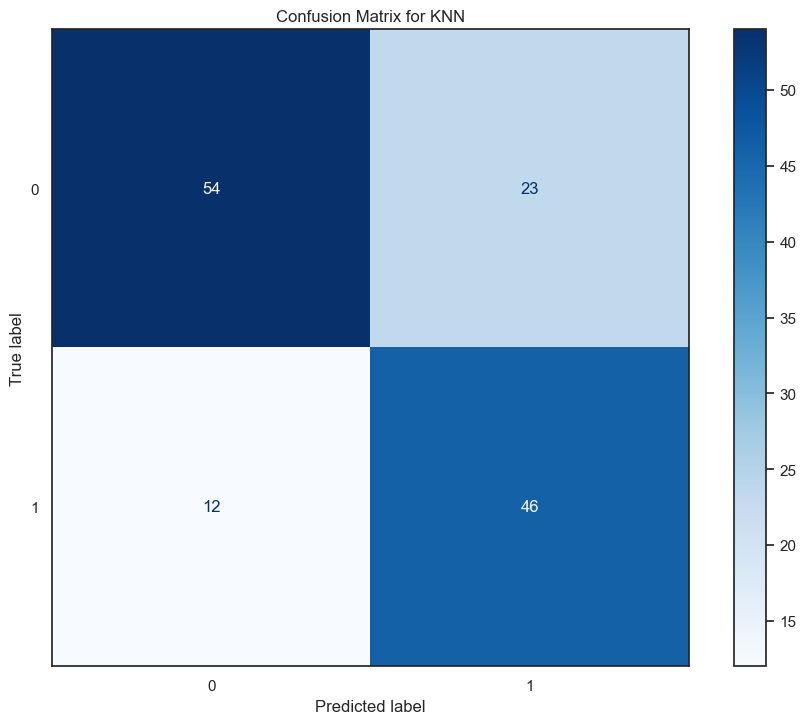

In [28]:
features_data = skin_data.drop(["target"], axis=1)
target_data = skin_data["target"]
x_train, x_test, y_train, y_test = train_test_split(features_data, target_data, test_size=0.3, random_state=42)
knn_model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'],        # Kernel coefficient
}
knn_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, n_jobs=-1)
knn_search.fit(x_train, y_train)
best_knn_model = knn_search.best_estimator_
y_pred_knn = best_knn_model.predict(x_test)

print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN')
plt.show()

# DL MODEL CNN

In [54]:
import os
import tkinter as tk
from tkinter import filedialog, messagebox
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

class CNNApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Disease Classification")
        self.root.geometry("500x400")
        
        # Model parameters
        self.img_width, self.img_height = 128, 128
        self.batch_size = 32
        self.epochs = 18
        self.train_dir = ""
        self.test_dir = ""

        # Widgets
        self.create_widgets()
    
    def create_widgets(self):
        # Dataset Selection
        tk.Label(self.root, text="Cucumber Disease Classification", font=("Arial", 16)).pack(pady=10)
        tk.Button(self.root, text="Select Training Dataset", command=self.select_train_dir).pack(pady=5)
        tk.Button(self.root, text="Select Testing Dataset", command=self.select_test_dir).pack(pady=5)

        # Model Training
        tk.Button(self.root, text="Train Model", command=self.train_model).pack(pady=10)

        # Evaluation
        tk.Button(self.root, text="Evaluate Model", command=self.evaluate_model).pack(pady=10)
        
        # Display Results
        self.result_label = tk.Label(self.root, text="", font=("Arial", 12))
        self.result_label.pack(pady=20)

    def select_train_dir(self):
        self.train_dir = filedialog.askdirectory(title="Select Training Dataset Directory")
        if self.train_dir:
            messagebox.showinfo("Directory Selected", f"Training Dataset: {self.train_dir}")
    
    def select_test_dir(self):
        self.test_dir = filedialog.askdirectory(title="Select Testing Dataset Directory")
        if self.test_dir:
            messagebox.showinfo("Directory Selected", f"Testing Dataset: {self.test_dir}")
    
    def train_model(self):
        if not self.train_dir:
            messagebox.showerror("Error", "Please select the training dataset directory.")
            return

        # Data Generators
        train_datagen = ImageDataGenerator(
            rescale=1.0/255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            validation_split=0.2
        )
        train_generator = train_datagen.flow_from_directory(
            self.train_dir,
            target_size=(self.img_width, self.img_height),
            batch_size=self.batch_size,
            class_mode='binary',
            subset='training'
        )
        validation_generator = train_datagen.flow_from_directory(
            self.train_dir,
            target_size=(self.img_width, self.img_height),
            batch_size=self.batch_size,
            class_mode='binary',
            subset='validation'
        )

        # Model Definition
        self.model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(self.img_width, self.img_height, 3)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train the model
        self.result_label.config(text="Training the model...")
        history = self.model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // self.batch_size,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // self.batch_size,
            epochs=self.epochs
        )
        self.result_label.config(text="Training Completed!")
        self.model.save("ps_classification_model.h5")
    
    def evaluate_model(self):
        if not self.test_dir:
            messagebox.showerror("Error", "Please select the testing dataset directory.")
            return

        # Data Generator for Testing
        test_datagen = ImageDataGenerator(rescale=1.0/255)
        test_generator = test_datagen.flow_from_directory(
            self.test_dir,
            target_size=(self.img_width, self.img_height),
            batch_size=self.batch_size,
            class_mode='binary'
        )

        # Evaluate the model
        self.result_label.config(text="Evaluating the model...")
        test_loss, test_accuracy = self.model.evaluate(test_generator)
        self.result_label.config(text=f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Run the GUI
if __name__ == "__main__":
    root = tk.Tk()
    app = CNNApp(root)
    root.mainloop()


Found 376 images belonging to 2 classes.
Found 93 images belonging to 2 classes.
Epoch 1/18
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.5415 - loss: 0.7587 - val_accuracy: 0.6562 - val_loss: 0.6262
Epoch 2/18
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 287ms/step - accuracy: 0.7812 - loss: 0.5586 - val_accuracy: 0.4138 - val_loss: 0.7929
Epoch 3/18
11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.6437 - loss: 0.6034 - val_accuracy: 0.7031 - val_loss: 0.5585
Epoch 4/18
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 0.8125 - loss: 0.3727 - val_accuracy: 0.6897 - val_loss: 0.5861
Epoch 5/18
11/11 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.7682 - loss: 0.5334 - val_accuracy: 0.8125 - val_loss: 0.4882
Epoch 6/18
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - accuracy: 0.8750 - loss: 0.3591 - val_accuracy: 0.7241 - val_loss: 0.5387
Epoch 7/18
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.7822 - loss: 0.4483 - val_accuracy: 0.7969 - val_loss: 0.4535
Epoch 8/18
11/11 ━━━━━━━━━━━━━━

Found 222 images belonging to 2 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.7847 - loss: 0.3861


In [62]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2
from PIL import Image, ImageTk

class ImagePredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Image Prediction")
        self.root.geometry("500x500")
        
        # Load the pre-trained model
        self.model = load_model('binary_classification_model.h5')
        
        # Class labels (update as needed)
        self.class_labels = ['Good Cucumber','Bad Cucumber']

        # Widgets
        self.create_widgets()

    def create_widgets(self):
        tk.Label(self.root, text="Upload an Image for Prediction", font=("Arial", 16)).pack(pady=10)
        
        self.image_label = tk.Label(self.root, text="No image selected", font=("Arial", 12))
        self.image_label.pack(pady=5)
        
        tk.Button(self.root, text="Select Image", command=self.select_image).pack(pady=5)
        tk.Button(self.root, text="Predict Image", command=self.predict_image).pack(pady=5)
        
        self.result_label = tk.Label(self.root, text="", font=("Arial", 14))
        self.result_label.pack(pady=20)

    def select_image(self):
        file_path = filedialog.askopenfilename(title="Select an Image",
                                               filetypes=[("Image Files", "*.jpg;*.jpeg;*.png")])
        if file_path:
            self.image_path = file_path
            img = cv2.imread(file_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (200, 200))
            img = Image.fromarray(img)
            img = ImageTk.PhotoImage(img)
            
            self.image_label.config(image=img, text="")
            self.image_label.image = img

    def predict_image(self):
        if not hasattr(self, 'image_path') or not self.image_path:
            messagebox.showerror("Error", "Please select an image first.")
            return
        
        # Load and preprocess the image
        image = load_img(self.image_path, target_size=(128, 128))
        image = img_to_array(image)
        image = image / 255.0  # Normalize the image
        image = np.expand_dims(image, axis=0)  # Add batch dimension

        # Predict the class
        prediction = self.model.predict(image)[0][0]  # Get the probability
        predicted_class = self.class_labels[int(prediction > 0.5)]

        # Display the result
        self.result_label.config(text=f"Prediction: {predicted_class}")

# Run the GUI
if __name__ == "__main__":
    root = tk.Tk()
    app = ImagePredictionApp(root)
    root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [64]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

# Load the pre-trained model
model = load_model('binary_classification_model.h5')

# Class labels (update as needed)
class_labels = ['Good Cucumber','Bad Cucumber']

# Initialize the webcam
cap = cv2.VideoCapture("C:\\Users\\user\\Downloads\\WhatsApp Video 2024-11-29 at 5.53.16 PM.mp4")  # Change to a video file path for video files (e.g., 'video.mp4')

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        break

    # Resize the frame to the input size of the model
    frame_resized = cv2.resize(frame, (128, 128))
    
    # Convert the frame to an array and normalize
    frame_array = img_to_array(frame_resized) / 255.0
    frame_array = np.expand_dims(frame_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(frame_array)[0][0]
    predicted_class = class_labels[int(prediction > 0.5)]
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Display prediction on the frame
    label = f"{predicted_class}: {confidence:.2f}"
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Show the frame
    cv2.imshow('Real-Time Image Classification', frame)

    # Press 'q' to quit the video stream
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━